#### Предобработка тестового массива данных

In [2]:
import pandas as pd

In [300]:
df_test = pd.read_csv('test.csv')

In [301]:
df_test.head(3)

bodyType  brand                                            car_url   color  \
0  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...   синий   
1  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/octavia/1...  чёрный   
2  лифтбек  SKODA  https://auto.ru/cars/used/sale/skoda/superb/11...   серый   

                                  complectation_dict  \
0                                                NaN   
1                                                NaN   
2  {"id":"20026336","name":"Ambition","available_...   

                                         description engineDisplacement  \
0  Все автомобили, представленные в продаже, прох...            1.2 LTR   
1  ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...            1.6 LTR   
2  Все автомобили, представленные в продаже, прох...            1.8 LTR   

  enginePower                                     equipment_dict fuelType  \
0     105 N12  {"engine-proof":true,"tinted-glass":true,"airb...   бензин   
1     110 N12  {"cruise-control":true,"asr":true,"esp":true,"...   бензин   
2     152 N12  {"cruise-control":true,"tinted-glass":true,"es...   бензин   

   ...     vehicleConfiguration  vehicleTransmission    vendor    Владельцы  \
0  ...       LIFTBACK ROBOT 1.2     роботизированная  EUROPEAN  3 или более   
1  ...  LIFTBACK MECHANICAL 1.6         механическая  EUROPEAN   1 владелец   
2  ...       LIFTBACK ROBOT 1.8     роботизированная  EUROPEAN   1 владелец   

  Владение       ПТС    Привод   Руль           Состояние     Таможня  
0      NaN  Оригинал  передний  Левый  Не требует ремонта  Растаможен  
1      NaN  Оригинал  передний  Левый  Не требует ремонта  Растаможен  
2      NaN  Оригинал  передний  Левый  Не требует ремонта  Растаможен  

[3 rows x 32 columns]

In [393]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

Удаляем бесполезные столбцы. Столбцы, под которые мы не смогли найти данные в скачанном json с сайта auto.ru

In [302]:
df_test.drop(['car_url', 'complectation_dict', 'description', 'equipment_dict', 'priceCurrency',
             'sell_id', 'image', 'color', 'Владение', 'model_info'], axis = 1, inplace = True )
df_test.head(1)

bodyType  brand engineDisplacement enginePower fuelType  mileage  modelDate  \
0  лифтбек  SKODA            1.2 LTR     105 N12   бензин    74000       2013   

  model_name                name  numberOfDoors  ...  \
0    OCTAVIA  1.2 AMT (105 л.с.)              5  ...   

                                           super_gen  vehicleConfiguration  \
0  {"id":"10373605","displacement":1197,"engine_t...    LIFTBACK ROBOT 1.2   

  vehicleTransmission    vendor    Владельцы       ПТС    Привод   Руль  \
0    роботизированная  EUROPEAN  3 или более  Оригинал  передний  Левый   

            Состояние     Таможня  
0  Не требует ремонта  Растаможен  

[1 rows x 22 columns]

выделим данные о мощности двигателя в л.с из тестовой выборки. после чего столбец enginePower удалим.

In [303]:
df_engine_temp = pd.DataFrame(df_test.enginePower.str.split(' ',1).tolist(),
                                 columns = ['power','else'])
df_test['car_Hpower'] = df_engine_temp.power
df_test.drop(['enginePower'], axis = 1, inplace = True)

выделим данные об объеме двигателя в л. из тестовой выборки. после чего столбец engineDisplacement удалим.

In [304]:
df_engine_vol_temp = pd.DataFrame(df_test.engineDisplacement.str.split(' ',1).tolist(),
                                 columns = ['vol','else'])
df_test['engine_vol'] = df_engine_vol_temp.vol
#df_test.head(1)
df_test.drop(['engineDisplacement'], axis = 1, inplace = True)

выделим данные количестве владельцев (в числовом виде) из тестовой выборки. после чего столбец Владельцы удалим.

In [305]:
df_test['num_owner'] = df_test['Владельцы'].str[0]
df_test.drop(['Владельцы'], axis = 1, inplace = True)

удалим столбец о дате модели (modelDate), так как он однозначно имеет сильную корреляцию с годом производства авто (productionDate)

In [306]:
df_test.drop(['modelDate'], axis = 1, inplace = True)

удалим столбец parsing_unixtime

In [307]:
df_test.drop(['parsing_unixtime'], axis = 1, inplace = True)

Из столбца vehicleConfiguration заберем данные об установленной на автомобиле трансмиссии (в соответствии со скачанным json) и англоязычном варианте наименования кузова (потенциально использовать будем его, а не русскоязычный вариант)

In [308]:
df_config_temp = pd.DataFrame(df_test.vehicleConfiguration.str.split(' ',2).tolist(),
                                 columns = ['body_eng','transm', 'eng_vol'])
#df_config_temp
df_test['body_eng'] = df_config_temp.body_eng
df_test['transm'] = df_config_temp.transm
df_test.drop(['vehicleConfiguration'], axis = 1, inplace = True)

Столбец name больше не несет доболнительной информации, удалим его

In [309]:
df_test.drop(['name'], axis = 1, inplace = True)

In [310]:
df_test.head(1)

bodyType  brand fuelType  mileage model_name  numberOfDoors  productionDate  \
0  лифтбек  SKODA   бензин    74000    OCTAVIA              5            2014   

                                           super_gen vehicleTransmission  \
0  {"id":"10373605","displacement":1197,"engine_t...    роботизированная   

     vendor       ПТС    Привод   Руль           Состояние     Таможня  \
0  EUROPEAN  Оригинал  передний  Левый  Не требует ремонта  Растаможен   

  car_Hpower engine_vol num_owner  body_eng transm  
0        105        1.2         3  LIFTBACK  ROBOT

#### Столбец super_gen содержит большое количество информации о характеристиках автомобиля, попробуем их выделить в отдельные признаки

Английский вариант наименования топлива (в структуре json auto.ru именно такой признак)

In [311]:
df_gen_temp = pd.DataFrame(df_test.super_gen.str.split('"engine_type":"').tolist(), columns = ['trash','dirt_info'])
df_gen_temp2 = pd.DataFrame(df_gen_temp.dirt_info.str.split('"',1).tolist(), 
                            columns = ['fuel_type','trash'])
df_test['fuel_type'] = df_gen_temp2.fuel_type

Английский вариант наименования типа привода авто (в структуре json auto.ru именно такой признак)

In [312]:
df_gear_temp = pd.DataFrame(df_test.super_gen.str.split('gear_type":"').tolist(), columns = ['trash','dirt_info'])
df_gear_temp2 = pd.DataFrame(df_gear_temp.dirt_info.str.split('"',1).tolist(), 
                            columns = ['gear_type','trash'])
#df_gear_temp2
df_test['gear_type'] = df_gear_temp2.gear_type

In [313]:
df_test.drop(['super_gen'], axis = 1, inplace = True)

Удалим столбцы с русским наименованием трансмиссии, наименования топлива авто, привода и типа кузова авто

In [314]:
df_test.drop(['bodyType', 'fuelType', 'vehicleTransmission'], axis = 1, inplace = True)

In [315]:
df_test.drop(['Привод'], axis = 1, inplace = True)

In [316]:
#df_test.car_Hpower.astype(int64)
df_test.astype({'car_Hpower': 'int64'}).dtypes

brand             object
mileage            int64
model_name        object
numberOfDoors      int64
productionDate     int64
vendor            object
ПТС               object
Руль              object
Состояние         object
Таможня           object
car_Hpower         int64
engine_vol        object
num_owner         object
body_eng          object
transm            object
fuel_type         object
gear_type         object
dtype: object

в машинах с электродвигателем двигателя внутреннего сгоряния нет(объем равен 0). произведем соответствующие замены и переведем столбец в числовой вид

In [317]:
df_test.engine_vol.replace('', 0, inplace = True)

In [318]:
df_test.astype({'engine_vol': 'float'}).dtypes

brand              object
mileage             int64
model_name         object
numberOfDoors       int64
productionDate      int64
vendor             object
ПТС                object
Руль               object
Состояние          object
Таможня            object
car_Hpower         object
engine_vol        float64
num_owner          object
body_eng           object
transm             object
fuel_type          object
gear_type          object
dtype: object

In [319]:
df_test.head(10)

brand  mileage  model_name  numberOfDoors  productionDate    vendor  \
0  SKODA    74000     OCTAVIA              5            2014  EUROPEAN   
1  SKODA    60563     OCTAVIA              5            2017  EUROPEAN   
2  SKODA    88000      SUPERB              5            2014  EUROPEAN   
3  SKODA    95000     OCTAVIA              5            2014  EUROPEAN   
4  SKODA    58536     OCTAVIA              5            2012  EUROPEAN   
5  SKODA   172000  OCTAVIA_RS              5            2012  EUROPEAN   
6  SKODA   107000        YETI              5            2012  EUROPEAN   
7  SKODA   226706     OCTAVIA              5            2011  EUROPEAN   
8  SKODA     9706      KODIAQ              5            2019  EUROPEAN   
9  SKODA    37361        YETI              5            2012  EUROPEAN   

        ПТС   Руль           Состояние     Таможня car_Hpower engine_vol  \
0  Оригинал  Левый  Не требует ремонта  Растаможен        105        1.2   
1  Оригинал  Левый  Не требует ремонта  Растаможен        110        1.6   
2  Оригинал  Левый  Не требует ремонта  Растаможен        152        1.8   
3  Оригинал  Левый  Не требует ремонта  Растаможен        110        1.6   
4  Оригинал  Левый  Не требует ремонта  Растаможен        152        1.8   
5  Оригинал  Левый  Не требует ремонта  Растаможен        200        2.0   
6  Оригинал  Левый  Не требует ремонта  Растаможен        152        1.8   
7  Оригинал  Левый  Не требует ремонта  Растаможен        102        1.6   
8  Оригинал  Левый  Не требует ремонта  Растаможен        150        1.4   
9  Оригинал  Левый  Не требует ремонта  Растаможен        152        1.8   

  num_owner         body_eng      transm fuel_type        gear_type  
0         3         LIFTBACK       ROBOT  GASOLINE  FORWARD_CONTROL  
1         1         LIFTBACK  MECHANICAL  GASOLINE  FORWARD_CONTROL  
2         1         LIFTBACK       ROBOT  GASOLINE  FORWARD_CONTROL  
3         1         LIFTBACK   AUTOMATIC  GASOLINE  FORWARD_CONTROL  
4         1         LIFTBACK   AUTOMATIC  GASOLINE  FORWARD_CONTROL  
5         3         LIFTBACK       ROBOT  GASOLINE  FORWARD_CONTROL  
6         1  ALLROAD_5_DOORS       ROBOT  GASOLINE  ALL_WHEEL_DRIVE  
7         3         LIFTBACK  MECHANICAL  GASOLINE  FORWARD_CONTROL  
8         1  ALLROAD_5_DOORS  MECHANICAL  GASOLINE  ALL_WHEEL_DRIVE  
9         1  ALLROAD_5_DOORS  MECHANICAL  GASOLINE  ALL_WHEEL_DRIVE

In [110]:
df_test['ПТС'].value_counts()

Оригинал    30098
Дубликат     4587
Name: ПТС, dtype: int64

In [57]:
df_test['brand'].value_counts()

BMW           4473
VOLKSWAGEN    4404
NISSAN        4393
MERCEDES      4180
TOYOTA        3913
AUDI          3421
MITSUBISHI    2843
SKODA         2741
VOLVO         1463
HONDA         1150
INFINITI       871
LEXUS          834
Name: brand, dtype: int64

In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           34686 non-null  object
 1   mileage         34686 non-null  int64 
 2   model_name      34686 non-null  object
 3   numberOfDoors   34686 non-null  int64 
 4   productionDate  34686 non-null  int64 
 5   vendor          34686 non-null  object
 6   ПТС             34685 non-null  object
 7   Руль            34686 non-null  object
 8   Состояние       34686 non-null  object
 9   Таможня         34686 non-null  object
 10  car_Hpower      34686 non-null  object
 11  engine_vol      34686 non-null  object
 12  num_owner       34686 non-null  object
 13  body_eng        34686 non-null  object
 14  transm          34686 non-null  object
 15  fuel_type       34686 non-null  object
 16  gear_type       34686 non-null  object
dtypes: int64(3), object(14)
memory usage: 4.5+ MB


### Парсинг сайта auto.ru

С помощью браузера нашли линк на файл, который формируется сайтом при осуществлении поиска авто по параметрам: "https://auto.ru/-/ajax/desktop/listing/"

параметры поиска записали в param. Ограничения сайта по выводу 99 страниц обошли путем двойного цикла по списку моделей (передается в param) - брал только с большим количеством предложением. По 99 страницам на пробегались ввиду длительности запроса

In [241]:
import requests, json



headers = '''
Host: auto.ru
User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:70.0) Gecko/20100101 Firefox/70.0
Accept: */*
Accept-Language: ru-RU,ru;q=0.8,en-US;q=0.5,en;q=0.3
Accept-Encoding: gzip, deflate, br
Referer: https://auto.ru/cars/vaz/2114/all/?year_from=2008&year_to=2010&sort=fresh_relevance_1-desc&page=2
x-client-app-version: 201911.26.155818
x-csrf-token: a5446446051b69f4b14cb18507b6ebb9954c6cf76b93027f
x-requested-with: fetch
content-type: application/json
Origin: https://auto.ru
Content-Length: 157
DNT: 1
Connection: keep-alive
Cookie: _csrf_token=a5446446051b69f4b14cb18507b6ebb9954c6cf76b93027f; autoru_sid=a%3Ag5dde33da257four8ct4hhlt0a17h00o.5bc9aa797010bf795c3fae4e20dd2eef%7C1574843354139.604800.PHszmA0eR_XZhCgieItl5g.WeKyrJqm5x5NmWaOBK-TLSEyI0wo2Z27miqpLLFwee8; autoruuid=g5dde33da257four8ct4hhlt0a17h00o.5bc9aa797010bf795c3fae4e20dd2eef; suid=d6c67bcdfb90c719a1008ae312af2fc9.f9f984e280d08277d997ce0fac3c604c; from_lifetime=1574843440313; from=google-search; counter_ga_all7=1; X-Vertis-DC=sas; navigation_promo_seen-recalls=true
Pragma: no-cache
Cache-Control: no-cache
'''.strip().split("\n")

url = "https://auto.ru/-/ajax/desktop/listing/"
dict_headers = {}
for header in headers:
    key, value = header.split(': ')
    dict_headers[key] = value
# print(dict_headers)
offers = []
brand_list = ['AUDI', 'BMW', 'SKODA', 'ACURA', 'CHERY', 'RENAULT', 'HONDA', 'VOLKSWAGEN', 'VOLVO', 'NISSAN', 'INFINITI', 'TOYOTA', 'MERCEDES', 'BENTLEY', 'MAZDA', 'OPEL', 'FORD', 'CHEVROLET', 'CADILLAC',
             'PEUGEOT', 'HAVAL', 'MINI', 'HYUNDAI', 'PORSCHE', 'KIA', 'DAEWOO', 'CITROEN', 'JEEP', 'LEXUS', 'MITSUBISHI',
             'JAGUAR', 'FIAT']
for brand in brand_list:
    for x in range(1, 2):
        param = {
            "section":"used",
            "category":"cars",
            "catalog_filter":[{"mark":brand}],
            "sort":"fresh_relevance_1-desc",
            "page":x,
        }
        response = requests.post(url, json=param, headers = dict_headers)
        data = response.json()
        offers.extend(data['offers'])
        print("current brand: ", brand)
        print("current page: ", x)

with open("data1.json", "w") as f:
    json.dump(offers, f)

current brand:  AUDI
current page:  1
current brand:  BMW
current page:  1
current brand:  SKODA
current page:  1
current brand:  ACURA
current page:  1
current brand:  CHERY
current page:  1
current brand:  RENAULT
current page:  1
current brand:  HONDA
current page:  1
current brand:  VOLKSWAGEN
current page:  1
current brand:  VOLVO
current page:  1
current brand:  NISSAN
current page:  1
current brand:  INFINITI
current page:  1
current brand:  TOYOTA
current page:  1
current brand:  MERCEDES
current page:  1
current brand:  BENTLEY
current page:  1
current brand:  MAZDA
current page:  1
current brand:  OPEL
current page:  1
current brand:  FORD
current page:  1
current brand:  CHEVROLET
current page:  1
current brand:  CADILLAC
current page:  1
current brand:  PEUGEOT
current page:  1
current brand:  HAVAL
current page:  1
current brand:  MINI
current page:  1
current brand:  HYUNDAI
current page:  1
current brand:  PORSCHE
current page:  1
current brand:  KIA
current page:  1
cur

Теперь капается в структуре json с помощью json viewer и записываем в списки данные по необходимым параметрам. Параметры синхринизирую с тем датасетом, который предложен в качестве тестового

Создадим матрицу соответствия значений в тестовом датасете и структуры json:

- brand -----> ['vehicle_info']['mark_info']['code']
- mileage ------> ['state']['mileage']
- model_name -----> ['vehicle_info']['model_info']['code']
- numbersOfDoors ------> ['vehicle_info']['configuration']['doors_count']
- vendor -------> ['vehicle_info']['vendor']
- ПТС --------> ['documents']['pts']
- Руль -------> ['vehicle_info']['steering_wheel']
- Состояние -------> ['state']['state_not_beaten']
- Таможня -------->  ['documents']['custom_cleared']
- car_Hpower --------> ['vehicle_info']['tech_param']['power']
- engine_vol --------> ['vehicle_info']['tech_param']['human_name']
- num_owners --------> ['documents']['owners_number']
- body_eng ----------> ['vehicle_info']['configuration']['body_type']
- transm ------------> ['vehicle_info']['tech_param']['transmission']
- fuel_type ---------> ['vehicle_info']['tech_param']['engine_type']
- gear_type ---------> ['vehicle_info']['tech_param']['gear_type']


+ price -------->   ['price_info']['price']

In [255]:
with open("data.json", "r", encoding="utf8") as f:
    data = json.load(f)
print(len(data))
brand = []
mileage = []
model_name = []
numbersOfDoors = []
vendor = []
PTS = []
SterWheel = []
state = []
clearance = []
car_Hpower = []
engine_vol = []
num_owners = []
body_eng = []
transm = []
fuel_type = []
gear_type = []
productionDate = []
price = []

for offer in data:
    #price.append(offer['price_info']['price'])
    #bodyType.append(offer['vehicle_info']['configuration']['human_name'])
    #mark_info.append(offer['vehicle_info']['mark_info']['code'])
    #mileage.append(offer['state']['mileage'])
    #model_name.append(offer['vehicle_info']['model_info']['code']) 
    brand.append(offer['vehicle_info']['mark_info']['code'])
    mileage.append(offer['state']['mileage'])
    model_name.append(offer['vehicle_info']['model_info']['code'])
    try:
        numbersOfDoors.append(offer['vehicle_info']['configuration']['doors_count'])
    except:
        numbersOfDoors.append('no_data')
    vendor.append(offer['vehicle_info']['vendor'])
    productionDate.append(offer['documents']['year'])
    try:
        PTS.append(offer['documents']['pts_original'])
    except:
        PTS.append('no_data')
    SterWheel.append(offer['vehicle_info']['steering_wheel'])
    state.append(offer['state']['state_not_beaten'])
    clearance.append(offer['documents']['custom_cleared'])
    try:
        car_Hpower.append(offer['vehicle_info']['tech_param']['power'])
    except:
        car_Hpower.append('no_data')
    try:
        engine_vol.append(offer['vehicle_info']['tech_param']['human_name'])
    except:
        engine_vol.append('no_data')
    try:
        num_owners.append(offer['documents']['owners_number'])
    except:
        num_owners.append('no_data')
    try:
        body_eng.append(offer['vehicle_info']['configuration']['body_type'])
    except:
        body_eng.append('no_data')
    try:
        transm.append(offer['vehicle_info']['tech_param']['transmission'])
    except:
        transm.append('no_data')
    try:
        fuel_type.append(offer['vehicle_info']['tech_param']['engine_type'])
    except:
        fuel_type.append('no_data')
    try:
        gear_type.append(offer['vehicle_info']['tech_param']['gear_type'])
    except:
        gear_type.append('no_data')
    price.append(offer['price_info']['price'])

30716


In [256]:
df_train = pd.DataFrame()

In [257]:
df_train['brand'] = brand
df_train['mileage'] = mileage
df_train['model_name'] = model_name
df_train['numberOfDoors'] = numbersOfDoors
df_train['productionDate'] = productionDate
df_train['vendor'] = vendor
df_train['ПТС'] = PTS
df_train['Руль'] = SterWheel
df_train['Состояние'] = state
df_train['Таможня'] = clearance
df_train['car_Hpower'] = car_Hpower
df_train['engine_vol'] = engine_vol
df_train['num_owner'] = num_owners
df_train['body_eng'] = body_eng
df_train['transm'] = transm
df_train['fuel_type'] = fuel_type
df_train['gear_type'] = gear_type
df_train['price'] = price

In [294]:
df_train.head(5)

brand  mileage model_name numberOfDoors  productionDate    vendor   ПТС  \
0  AUDI    76000         Q7             5            2016  EUROPEAN  True   
1  AUDI   210815         A6             4            2002  EUROPEAN  True   
2  AUDI     1824        SQ7             5            2020  EUROPEAN  True   
3  AUDI   112000         A8             4            2013  EUROPEAN  True   
4  AUDI    23580         A5             5            2018  EUROPEAN  True   

   Руль car_Hpower                  engine_vol num_owner         body_eng  \
0  LEFT        249      3.0d AT (249 л.с.) 4WD         1  ALLROAD_5_DOORS   
1  LEFT        170       2.4 AT (170 л.с.) 4WD         4            SEDAN   
2  LEFT        422      4.0d AT (422 л.с.) 4WD         1  ALLROAD_5_DOORS   
3  LEFT        310  Long 3.0 AT (310 л.с.) 4WD         2            SEDAN   
4  LEFT        190     2.0d AMT (190 л.с.) 4WD         1         LIFTBACK   

      transm fuel_type        gear_type    price  
0  AUTOMATIC    DIESEL  ALL_WHEEL_DRIVE  3850000  
1  AUTOMATIC  GASOLINE  ALL_WHEEL_DRIVE   349000  
2  AUTOMATIC    DIESEL  ALL_WHEEL_DRIVE  9200000  
3  AUTOMATIC  GASOLINE  ALL_WHEEL_DRIVE  1640000  
4      ROBOT    DIESEL  ALL_WHEEL_DRIVE  2840000

In [266]:
df_index = df_train[df_train['vendor'] == 'no_data'].index

Empty DataFrame
Columns: [brand, mileage, model_name, numberOfDoors, productionDate, vendor, ПТС, Руль, Состояние, Таможня, car_Hpower, engine_vol, num_owner, body_eng, transm, fuel_type, gear_type, price]
Index: []

In [275]:
df_train['ПТС'].value_counts()

True       27341
no_data     3374
Name: ПТС, dtype: int64

In [283]:
index_owner = df_train[df_train['num_owner'] == 'no_data'].index

In [284]:
df_train.drop(index_owner, inplace = True)

In [289]:
df_train[df_train['gear_type'] == 'no_data']

Empty DataFrame
Columns: [brand, mileage, model_name, numberOfDoors, productionDate, vendor, ПТС, Руль, Состояние, Таможня, car_Hpower, engine_vol, num_owner, body_eng, transm, fuel_type, gear_type, price]
Index: []

In [265]:
df_train.drop(df_index, inplace = True)

In [295]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30707 entries, 0 to 30715
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           30707 non-null  object
 1   mileage         30707 non-null  int64 
 2   model_name      30707 non-null  object
 3   numberOfDoors   30707 non-null  object
 4   productionDate  30707 non-null  int64 
 5   vendor          30707 non-null  object
 6   ПТС             30707 non-null  object
 7   Руль            30707 non-null  object
 8   car_Hpower      30707 non-null  object
 9   engine_vol      30707 non-null  object
 10  num_owner       30707 non-null  object
 11  body_eng        30707 non-null  object
 12  transm          30707 non-null  object
 13  fuel_type       30707 non-null  object
 14  gear_type       30707 non-null  object
 15  price           30707 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 4.0+ MB


Пропусков в спарсенных данных нет. Есть отсутствующие данные в "ПТС", оставим в этих ячейках no_data - будет отдельной категорией

In [260]:
df_train['Руль'].value_counts()

LEFT     30119
RIGHT      597
Name: Руль, dtype: int64

Столбцы "состояние" и "таможня" можно удалить ввиду того, что в тренировочном и тестовом масивах данных параметр имеет только одно значение.

In [293]:
df_train.head(3)

brand  mileage model_name numberOfDoors  productionDate    vendor   ПТС  \
0  AUDI    76000         Q7             5            2016  EUROPEAN  True   
1  AUDI   210815         A6             4            2002  EUROPEAN  True   
2  AUDI     1824        SQ7             5            2020  EUROPEAN  True   

   Руль car_Hpower              engine_vol num_owner         body_eng  \
0  LEFT        249  3.0d AT (249 л.с.) 4WD         1  ALLROAD_5_DOORS   
1  LEFT        170   2.4 AT (170 л.с.) 4WD         4            SEDAN   
2  LEFT        422  4.0d AT (422 л.с.) 4WD         1  ALLROAD_5_DOORS   

      transm fuel_type        gear_type    price  
0  AUTOMATIC    DIESEL  ALL_WHEEL_DRIVE  3850000  
1  AUTOMATIC  GASOLINE  ALL_WHEEL_DRIVE   349000  
2  AUTOMATIC    DIESEL  ALL_WHEEL_DRIVE  9200000

In [292]:
df_train.drop(['Состояние', 'Таможня'], axis = 1, inplace = True)


KeyError: "['Состояние' 'Таможня'] not found in axis"

In [321]:
df_test.drop(['Состояние', 'Таможня'], axis = 1, inplace = True)

In [324]:
df_test.drop(['engine_vol'], axis = 1, inplace = True)

In [328]:
df_train.astype({'car_Hpower': 'int64'}).dtypes

brand             object
mileage            int64
model_name        object
numberOfDoors     object
productionDate     int64
vendor            object
ПТС               object
Руль              object
car_Hpower         int64
num_owner         object
body_eng          object
transm            object
fuel_type         object
gear_type         object
price              int64
dtype: object

In [298]:
df_train.columns

Index(['brand', 'mileage', 'model_name', 'numberOfDoors', 'productionDate',
       'vendor', 'ПТС', 'Руль', 'car_Hpower', 'num_owner', 'body_eng',
       'transm', 'fuel_type', 'gear_type', 'price'],
      dtype='object')

In [325]:
df_test.head(2)

brand  mileage model_name  numberOfDoors  productionDate    vendor  \
0  SKODA    74000    OCTAVIA              5            2014  EUROPEAN   
1  SKODA    60563    OCTAVIA              5            2017  EUROPEAN   

        ПТС   Руль car_Hpower num_owner  body_eng      transm fuel_type  \
0  Оригинал  Левый        105         3  LIFTBACK       ROBOT  GASOLINE   
1  Оригинал  Левый        110         1  LIFTBACK  MECHANICAL  GASOLINE   

         gear_type  
0  FORWARD_CONTROL  
1  FORWARD_CONTROL

In [326]:
df_test['Руль'].replace('Левый', 'LEFT', inplace = True)
df_test['Руль'].replace('Правый', 'RIGHT', inplace = True)

In [331]:
print(df_test['ПТС'].value_counts())
print(df_train['ПТС'].value_counts())

Оригинал    30098
Дубликат     4587
Name: ПТС, dtype: int64
True       27334
no_data     3373
Name: ПТС, dtype: int64


In [327]:
df_test.head(2)

brand  mileage model_name  numberOfDoors  productionDate    vendor  \
0  SKODA    74000    OCTAVIA              5            2014  EUROPEAN   
1  SKODA    60563    OCTAVIA              5            2017  EUROPEAN   

        ПТС  Руль car_Hpower num_owner  body_eng      transm fuel_type  \
0  Оригинал  LEFT        105         3  LIFTBACK       ROBOT  GASOLINE   
1  Оригинал  LEFT        110         1  LIFTBACK  MECHANICAL  GASOLINE   

         gear_type  
0  FORWARD_CONTROL  
1  FORWARD_CONTROL

In [334]:
df_train['ПТС'].replace(True, 'Оригинал', inplace = True)
df_train['ПТС'].replace('no_data', 'Дубликат', inplace = True)

In [336]:
df_test.head(2)

brand  mileage model_name  numberOfDoors  productionDate    vendor  \
0  SKODA    74000    OCTAVIA              5            2014  EUROPEAN   
1  SKODA    60563    OCTAVIA              5            2017  EUROPEAN   

        ПТС  Руль car_Hpower num_owner  body_eng      transm fuel_type  \
0  Оригинал  LEFT        105         3  LIFTBACK       ROBOT  GASOLINE   
1  Оригинал  LEFT        110         1  LIFTBACK  MECHANICAL  GASOLINE   

         gear_type  
0  FORWARD_CONTROL  
1  FORWARD_CONTROL

In [335]:
df_train.head(2)

brand  mileage model_name numberOfDoors  productionDate    vendor       ПТС  \
0  AUDI    76000         Q7             5            2016  EUROPEAN  Оригинал   
1  AUDI   210815         A6             4            2002  EUROPEAN  Оригинал   

   Руль car_Hpower num_owner         body_eng     transm fuel_type  \
0  LEFT        249         1  ALLROAD_5_DOORS  AUTOMATIC    DIESEL   
1  LEFT        170         4            SEDAN  AUTOMATIC  GASOLINE   

         gear_type    price  
0  ALL_WHEEL_DRIVE  3850000  
1  ALL_WHEEL_DRIVE   349000

### Начнем работу с анализом признаков датасета модели

In [139]:
!pip install catboost

     |████████████████████████████████| 11.1 MB 2.0 MB/s eta 0:00:01    |██████████▊                     | 3.7 MB 5.4 MB/s eta 0:00:02


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm

from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

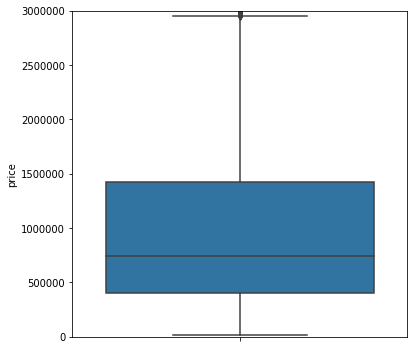

In [338]:
plt.figure(figsize=(6, 6))
plt.ylim(top=3_000_000)
ax = sns.boxplot(y="price", data = df_train)

На графике видим, что 75% предложений, это цена до 1_500_000р. И все что свыше 4 млн. рублей - считается выбросами

In [340]:
print(f'Общая доля выбросов по признаку "price" :', round(len(df_train[df_train['price']>4_000_000])/len(df_train) * 100,2), '%')

Общая доля выбросов по признаку "price" : 4.02 %


In [341]:
# сохраним целевую переменную, а после удалим из тренировочного датасета
y = df_train['price']
df_train.drop(['price'], axis=1,inplace=True)

In [342]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест

data = df_test.append(df_train, sort=False).reset_index(drop=True)

In [353]:
data.astype({'car_Hpower': 'int64'}, copy=False).dtypes

brand             object
mileage            int64
model_name        object
numberOfDoors     object
productionDate     int64
vendor            object
ПТС               object
Руль              object
car_Hpower         int64
num_owner         object
body_eng          object
transm            object
fuel_type         object
gear_type         object
sample             int64
dtype: object

In [355]:
data.car_Hpower = data.car_Hpower.astype(np.int64)

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65393 entries, 0 to 65392
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           65393 non-null  object
 1   mileage         65393 non-null  int64 
 2   model_name      65393 non-null  object
 3   numberOfDoors   65393 non-null  object
 4   productionDate  65393 non-null  int64 
 5   vendor          65393 non-null  object
 6   ПТС             65392 non-null  object
 7   Руль            65393 non-null  object
 8   car_Hpower      65393 non-null  int64 
 9   num_owner       65393 non-null  object
 10  body_eng        65393 non-null  object
 11  transm          65393 non-null  object
 12  fuel_type       65393 non-null  object
 13  gear_type       65393 non-null  object
 14  sample          65393 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 7.5+ MB


Пропусков в данных нет, работаем дальше

In [357]:
data.nunique(dropna=False)

brand                32
mileage           22010
model_name          987
numberOfDoors         5
productionDate       80
vendor                6
ПТС                   3
Руль                  2
car_Hpower          376
num_owner             7
body_eng             26
transm                4
fuel_type             5
gear_type             3
sample                2
dtype: int64

In [358]:
num_cols = ['mileage', 'productionDate', 'car_Hpower']
bin_cols =['Руль'] 
category_cols = ['brand', 'model_name', 'numberOfDoors', 'vendor', 'body_eng', 'ПТС', 'num_owner', 'transm',
                'fuel_type', 'gear_type']

### Исследование числовых признаков
Проверим числовые признаки на нормальность/логнормальность распределения. В рамках рассмотрения каждого признака сделаем вывод, а в конце исследования произведем необходимые действия с признаками.


### Mileage

<function matplotlib.pyplot.show(*args, **kw)>

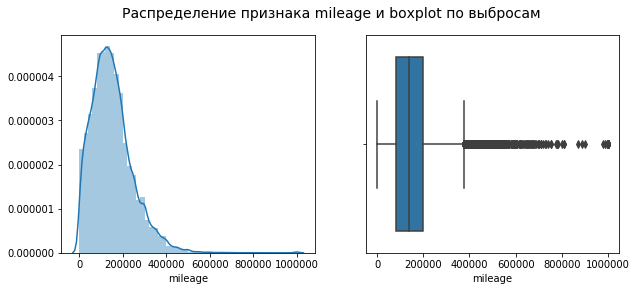

In [359]:
plt.figure(figsize=(10, 4))
plt.suptitle('Распределение признака mileage и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(data.mileage)
plt.subplot(1, 2, 2)
sns.boxplot(data.mileage)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

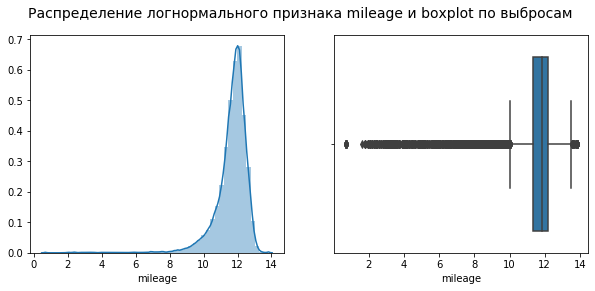

In [360]:
plt.figure(figsize=(10, 4))
plt.suptitle(
    'Распределение логнормального признака mileage и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(np.log(data['mileage'] + 1))
plt.subplot(1, 2, 2)
sns.boxplot(np.log(data['mileage'] + 1))
plt.show

Логарифмировать признак будем позже

#### productionDate

<function matplotlib.pyplot.show(*args, **kw)>

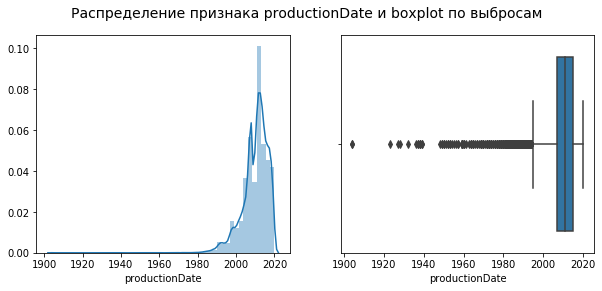

In [361]:
plt.figure(figsize=(10, 4))
plt.suptitle('Распределение признака productionDate и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(data.productionDate)
plt.subplot(1, 2, 2)
sns.boxplot(data.productionDate)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

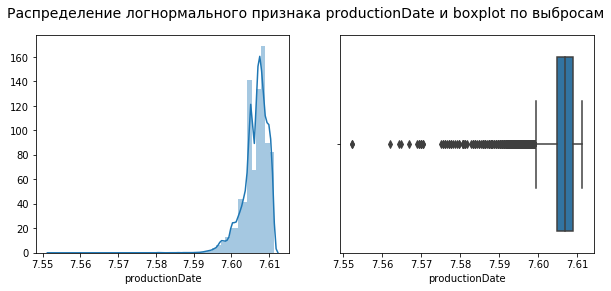

In [362]:
plt.figure(figsize=(10, 4))
plt.suptitle(
    'Распределение логнормального признака productionDate и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(np.log(data['productionDate'] + 1))
plt.subplot(1, 2, 2)
sns.boxplot(np.log(data['productionDate'] + 1))
plt.show

Логарифмировать признак будем позже

### car_Hpower

<function matplotlib.pyplot.show(*args, **kw)>

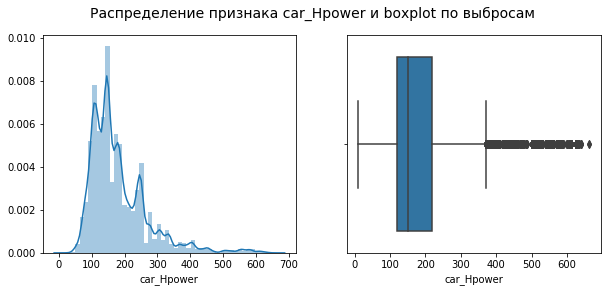

In [363]:
plt.figure(figsize=(10, 4))
plt.suptitle('Распределение признака car_Hpower и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(data.car_Hpower)
plt.subplot(1, 2, 2)
sns.boxplot(data.car_Hpower)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

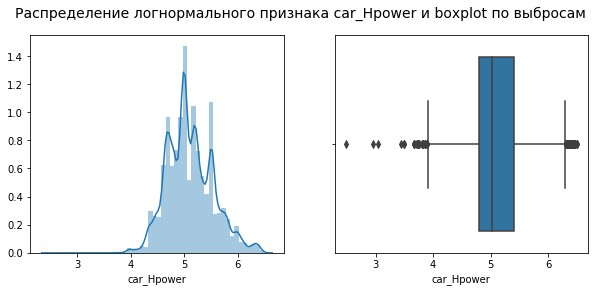

In [364]:
plt.figure(figsize=(10, 4))
plt.suptitle(
    'Распределение логнормального признака car_Hpower и boxplot по выбросам', fontsize=14)
plt.subplot(1, 2, 1)
sns.distplot(np.log(data['car_Hpower'] + 1))
plt.subplot(1, 2, 2)
sns.boxplot(np.log(data['car_Hpower'] + 1))
plt.show

Логарифмировать признак будем позже

### Корреляция

In [366]:
# Для проверки корреляции возьмем числовые признаки тренировочного датасета 
# и присоединим к ним целевую переменную в виде датафрейма df
X = data.query('sample == 1').drop(['sample'], axis=1)

df = pd.DataFrame(X[num_cols]).reset_index()
df.drop(['index'], axis=1,inplace=True)
df['price']=y
df

mileage  productionDate  car_Hpower      price
0        76000            2016         249  3850000.0
1       210815            2002         170   349000.0
2         1824            2020         422  9200000.0
3       112000            2013         310  1640000.0
4        23580            2018         190  2840000.0
...        ...             ...         ...        ...
30702   248000            2007          77    68000.0
30703   120000            2007          77   250000.0
30704   300000            2000          60    78000.0
30705   206000            1999          73    70000.0
30706   200000            2007          77   200000.0

[30707 rows x 4 columns]

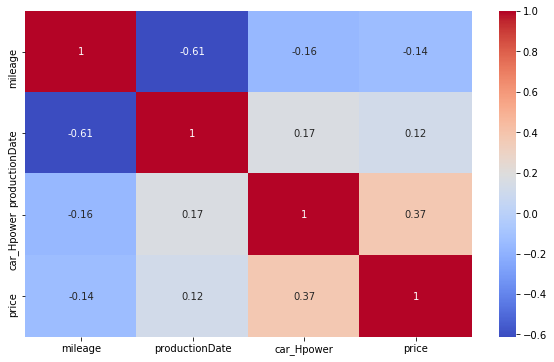

In [367]:
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Глобально сильных корреляций нет. Зависимости понятны: чем больше пробег, тем меньше цена, и чем моложе машина, тем она дороже. Все сходится с логикой.

In [368]:
# Переведем бинарные признаки в числа при  LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
# убедимся в преобразовании    
data.head()

brand  mileage model_name numberOfDoors  productionDate    vendor  \
0  SKODA    74000    OCTAVIA             5            2014  EUROPEAN   
1  SKODA    60563    OCTAVIA             5            2017  EUROPEAN   
2  SKODA    88000     SUPERB             5            2014  EUROPEAN   
3  SKODA    95000    OCTAVIA             5            2014  EUROPEAN   
4  SKODA    58536    OCTAVIA             5            2012  EUROPEAN   

        ПТС  Руль  car_Hpower num_owner  body_eng      transm fuel_type  \
0  Оригинал     0         105         3  LIFTBACK       ROBOT  GASOLINE   
1  Оригинал     0         110         1  LIFTBACK  MECHANICAL  GASOLINE   
2  Оригинал     0         152         1  LIFTBACK       ROBOT  GASOLINE   
3  Оригинал     0         110         1  LIFTBACK   AUTOMATIC  GASOLINE   
4  Оригинал     0         152         1  LIFTBACK   AUTOMATIC  GASOLINE   

         gear_type  sample  
0  FORWARD_CONTROL       0  
1  FORWARD_CONTROL       0  
2  FORWARD_CONTROL       0  
3  FORWARD_CONTROL       0  
4  FORWARD_CONTROL       0

In [369]:
for colum in category_cols:
    data[colum] = data[colum].astype('category').cat.codes

In [370]:
data.head()

brand  mileage  model_name  numberOfDoors  productionDate  vendor  ПТС  \
0     28    74000         614              4            2014       2    1   
1     28    60563         614              4            2017       2    1   
2     28    88000         823              4            2014       2    1   
3     28    95000         614              4            2014       2    1   
4     28    58536         614              4            2012       2    1   

   Руль  car_Hpower  num_owner  body_eng  transm  fuel_type  gear_type  sample  
0     0         105          6        11       2          2          1       0  
1     0         110          4        11       1          2          1       0  
2     0         152          4        11       2          2          1       0  
3     0         110          4        11       0          2          1       0  
4     0         152          4        11       0          2          1       0

### Создание новых признаков

In [371]:
data['km_in_year'] = data['mileage'] / ((datetime.datetime.now().year +1) - data['productionDate'])
num_cols.append('km_in_year')

In [372]:
data.head()

brand  mileage  model_name  numberOfDoors  productionDate  vendor  ПТС  \
0     28    74000         614              4            2014       2    1   
1     28    60563         614              4            2017       2    1   
2     28    88000         823              4            2014       2    1   
3     28    95000         614              4            2014       2    1   
4     28    58536         614              4            2012       2    1   

   Руль  car_Hpower  num_owner  body_eng  transm  fuel_type  gear_type  \
0     0         105          6        11       2          2          1   
1     0         110          4        11       1          2          1   
2     0         152          4        11       2          2          1   
3     0         110          4        11       0          2          1   
4     0         152          4        11       0          2          1   

   sample  km_in_year  
0       0      9250.0  
1       0     12112.6  
2       0     11000.0  
3       0     11875.0  
4       0      5853.6

In [373]:
# Преобразуем числовые признаки в полиномиальные
poly = PolynomialFeatures(3,interaction_only=True)
data_num = pd.DataFrame(poly.fit_transform(data[num_cols].values))

### Логарифмирование признаков (числовых и целевого)

In [374]:
# Прологарифмируем целевую функцию. А после предсказания взять экспоненту от получившегося рузультата: y=np.exp(y)-1
y= np.log(y+1)
# прологарифмируем числовые признаки и полученные от них полиномиальные признаки
data[num_cols] = np.log(data[num_cols]+1)
data_num = np.log(data_num +1)

In [375]:
data = pd.concat([data,data_num], axis=1)

In [376]:
# отделим тренировочный датасет от тестового:

X = data.query('sample == 1').drop(['sample'], axis=1)
X_sub = data.query('sample == 0').drop(['sample'], axis=1)

In [391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65393 entries, 0 to 65392
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           65393 non-null  int8   
 1   mileage         65393 non-null  float64
 2   model_name      65393 non-null  int16  
 3   numberOfDoors   65393 non-null  int8   
 4   productionDate  65393 non-null  float64
 5   vendor          65393 non-null  int8   
 6   ПТС             65393 non-null  int8   
 7   Руль            65393 non-null  int64  
 8   car_Hpower      65393 non-null  float64
 9   num_owner       65393 non-null  int8   
 10  body_eng        65393 non-null  int8   
 11  transm          65393 non-null  int8   
 12  fuel_type       65393 non-null  int8   
 13  gear_type       65393 non-null  int8   
 14  sample          65393 non-null  int64  
 15  km_in_year      65393 non-null  float64
 16  0               65393 non-null  float64
 17  1               65393 non-null 

In [392]:
data.to_csv(f'clear_data.csv', index=False)
y.to_csv(f'target_data.csv', index=False)

In [3]:
data = pd.read_csv('clear_data.csv')
y = pd.read_csv('target_data.csv')

In [4]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [5]:
X = data.query('sample == 1').drop(['sample'], axis=1)
X_sub = data.query('sample == 0').drop(['sample'], axis=1)

### Подготовка данных к машинному обучению

Разделим тренировочные данные для обучения следующим образом:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Model #1: Модель CatBoost c заданными параметрами

In [378]:
model1 = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.1,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE']
                         )
model1.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         verbose_eval=100,
         use_best_model=True,
         plot=True
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0516517	test: 0.0521818	best: 0.0521818 (0)	total: 67.2ms	remaining: 5m 36s
100:	learn: 0.0130935	test: 0.0131547	best: 0.0131547 (100)	total: 2.05s	remaining: 1m 39s
200:	learn: 0.0113592	test: 0.0116704	best: 0.0116704 (200)	total: 3.98s	remaining: 1m 35s
300:	learn: 0.0104695	test: 0.0110219	best: 0.0110219 (300)	total: 5.26s	remaining: 1m 22s
400:	learn: 0.0099955	test: 0.0107472	best: 0.0107472 (400)	total: 6.71s	remaining: 1m 16s
500:	learn: 0.0095987	test: 0.0105225	best: 0.0105225 (500)	total: 7.78s	remaining: 1m 9s
600:	learn: 0.0092859	test: 0.0103849	best: 0.0103841 (599)	total: 8.91s	remaining: 1m 5s
700:	learn: 0.0090230	test: 0.0102752	best: 0.0102752 (700)	total: 10s	remaining: 1m 1s
800:	learn: 0.0087740	test: 0.0101775	best: 0.0101770 (799)	total: 11.1s	remaining: 58.2s
900:	learn: 0.0085822	test: 0.0101234	best: 0.0101230 (898)	total: 12.2s	remaining: 55.4s
1000:	learn: 0.0083903	test: 0.0100630	best: 0.0100630 (1000)	total: 13.2s	remaining: 52.9s
1100:	le

In [394]:
predict = np.round((np.exp(model1.predict(X_test))-1)/1000) *1000
y_test_exp = np.exp(y_test)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp, predict))*100:0.2f}%")

Точность модели по метрике MAPE: 13.17%


Модель дала на ЛБ MAPE = 16.01%

#### Модель 2 (с найденными лучшими гиперпараметрами)

In [386]:
# Поиск наилучших параметров для CatBoostRegressor
cbr = CatBoostRegressor()

grid = {'learning_rate': [round(x,3) for x in np.linspace(start = 0.025, stop = 0.4, num = 40)],
        'depth': [int(x) for x in np.linspace(start = 5, stop = 10, num = 5)],
        'l2_leaf_reg': [int(x) for x in np.linspace(start = 1, stop = 5, num = 5)]}

grid_search_result = cbr.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=False)
print(grid_search_result['params'])


bestTest = 0.2365924422
bestIteration = 999

0:	loss: 0.2365924	best: 0.2365924 (0)	total: 6.2s	remaining: 1h 43m 15s

bestTest = 0.2284228108
bestIteration = 999

1:	loss: 0.2284228	best: 0.2284228 (1)	total: 13.9s	remaining: 1h 55m 11s

bestTest = 0.2249225673
bestIteration = 999

2:	loss: 0.2249226	best: 0.2249226 (2)	total: 21.3s	remaining: 1h 58m 5s

bestTest = 0.2210473961
bestIteration = 999

3:	loss: 0.2210474	best: 0.2210474 (3)	total: 28.2s	remaining: 1h 56m 57s

bestTest = 0.2202230384
bestIteration = 999

4:	loss: 0.2202230	best: 0.2202230 (4)	total: 33.7s	remaining: 1h 51m 36s

bestTest = 0.2205666724
bestIteration = 998

5:	loss: 0.2205667	best: 0.2202230 (4)	total: 40.2s	remaining: 1h 51m 4s

bestTest = 0.2185798496
bestIteration = 993

6:	loss: 0.2185798	best: 0.2185798 (6)	total: 48.4s	remaining: 1h 54m 25s

bestTest = 0.2170098552
bestIteration = 991

7:	loss: 0.2170099	best: 0.2170099 (7)	total: 54.6s	remaining: 1h 52m 48s

bestTest = 0.2171753261
bestIteration = 99


bestTest = 0.2301166686
bestIteration = 998

68:	loss: 0.2301167	best: 0.2165009 (51)	total: 7m 14s	remaining: 1h 37m 40s

bestTest = 0.2272039524
bestIteration = 673

69:	loss: 0.2272040	best: 0.2165009 (51)	total: 7m 19s	remaining: 1h 37m 23s

bestTest = 0.2314443882
bestIteration = 748

70:	loss: 0.2314444	best: 0.2165009 (51)	total: 7m 25s	remaining: 1h 37m 7s

bestTest = 0.2278974687
bestIteration = 667

71:	loss: 0.2278975	best: 0.2165009 (51)	total: 7m 31s	remaining: 1h 36m 54s

bestTest = 0.230361501
bestIteration = 764

72:	loss: 0.2303615	best: 0.2165009 (51)	total: 7m 36s	remaining: 1h 36m 37s

bestTest = 0.2275369597
bestIteration = 617

73:	loss: 0.2275370	best: 0.2165009 (51)	total: 7m 42s	remaining: 1h 36m 23s

bestTest = 0.2318309846
bestIteration = 636

74:	loss: 0.2318310	best: 0.2165009 (51)	total: 7m 47s	remaining: 1h 36m 10s

bestTest = 0.2350794762
bestIteration = 618

75:	loss: 0.2350795	best: 0.2165009 (51)	total: 7m 53s	remaining: 1h 35m 55s

bestTest = 0.2351


bestTest = 0.2173222975
bestIteration = 986

135:	loss: 0.2173223	best: 0.2165009 (51)	total: 14m 16s	remaining: 1h 30m 42s

bestTest = 0.2206742289
bestIteration = 994

136:	loss: 0.2206742	best: 0.2165009 (51)	total: 14m 23s	remaining: 1h 30m 40s

bestTest = 0.2225154083
bestIteration = 998

137:	loss: 0.2225154	best: 0.2165009 (51)	total: 14m 29s	remaining: 1h 30m 29s

bestTest = 0.2209795691
bestIteration = 997

138:	loss: 0.2209796	best: 0.2165009 (51)	total: 14m 34s	remaining: 1h 30m 18s

bestTest = 0.2216877356
bestIteration = 999

139:	loss: 0.2216877	best: 0.2165009 (51)	total: 14m 40s	remaining: 1h 30m 7s

bestTest = 0.2215553605
bestIteration = 999

140:	loss: 0.2215554	best: 0.2165009 (51)	total: 14m 45s	remaining: 1h 29m 56s

bestTest = 0.224995014
bestIteration = 995

141:	loss: 0.2249950	best: 0.2165009 (51)	total: 14m 51s	remaining: 1h 29m 44s

bestTest = 0.2242752344
bestIteration = 937

142:	loss: 0.2242752	best: 0.2165009 (51)	total: 14m 56s	remaining: 1h 29m 33s

b


bestTest = 0.2246828386
bestIteration = 993

201:	loss: 0.2246828	best: 0.2165009 (51)	total: 20m 41s	remaining: 1h 21m 44s

bestTest = 0.2215730826
bestIteration = 999

202:	loss: 0.2215731	best: 0.2165009 (51)	total: 20m 50s	remaining: 1h 21m 48s

bestTest = 0.2204185524
bestIteration = 999

203:	loss: 0.2204186	best: 0.2165009 (51)	total: 20m 57s	remaining: 1h 21m 46s

bestTest = 0.2215948906
bestIteration = 999

204:	loss: 0.2215949	best: 0.2165009 (51)	total: 21m 6s	remaining: 1h 21m 50s

bestTest = 0.2206016516
bestIteration = 998

205:	loss: 0.2206017	best: 0.2165009 (51)	total: 21m 15s	remaining: 1h 21m 54s

bestTest = 0.2209508476
bestIteration = 990

206:	loss: 0.2209508	best: 0.2165009 (51)	total: 21m 23s	remaining: 1h 21m 55s

bestTest = 0.2209150813
bestIteration = 975

207:	loss: 0.2209151	best: 0.2165009 (51)	total: 21m 31s	remaining: 1h 21m 57s

bestTest = 0.2202684723
bestIteration = 953

208:	loss: 0.2202685	best: 0.2165009 (51)	total: 21m 41s	remaining: 1h 22m 4s

b


bestTest = 0.2366460196
bestIteration = 702

267:	loss: 0.2366460	best: 0.2165009 (51)	total: 29m 52s	remaining: 1h 21m 36s

bestTest = 0.237186628
bestIteration = 577

268:	loss: 0.2371866	best: 0.2165009 (51)	total: 30m	remaining: 1h 21m 31s

bestTest = 0.2365327492
bestIteration = 605

269:	loss: 0.2365327	best: 0.2165009 (51)	total: 30m 7s	remaining: 1h 21m 26s

bestTest = 0.2371076855
bestIteration = 566

270:	loss: 0.2371077	best: 0.2165009 (51)	total: 30m 15s	remaining: 1h 21m 22s

bestTest = 0.2432838759
bestIteration = 759

271:	loss: 0.2432839	best: 0.2165009 (51)	total: 30m 22s	remaining: 1h 21m 16s

bestTest = 0.239540102
bestIteration = 719

272:	loss: 0.2395401	best: 0.2165009 (51)	total: 30m 29s	remaining: 1h 21m 12s

bestTest = 0.2404583042
bestIteration = 589

273:	loss: 0.2404583	best: 0.2165009 (51)	total: 30m 36s	remaining: 1h 21m 6s

bestTest = 0.240551846
bestIteration = 689

274:	loss: 0.2405518	best: 0.2165009 (51)	total: 30m 44s	remaining: 1h 21m 1s

bestTest 


bestTest = 0.2256433653
bestIteration = 977

333:	loss: 0.2256434	best: 0.2165009 (51)	total: 41m 16s	remaining: 1h 22m 19s

bestTest = 0.2285483429
bestIteration = 966

334:	loss: 0.2285483	best: 0.2165009 (51)	total: 41m 24s	remaining: 1h 22m 12s

bestTest = 0.2264688849
bestIteration = 947

335:	loss: 0.2264689	best: 0.2165009 (51)	total: 41m 33s	remaining: 1h 22m 8s

bestTest = 0.2307689431
bestIteration = 941

336:	loss: 0.2307689	best: 0.2165009 (51)	total: 41m 43s	remaining: 1h 22m 4s

bestTest = 0.2313218419
bestIteration = 985

337:	loss: 0.2313218	best: 0.2165009 (51)	total: 41m 50s	remaining: 1h 21m 57s

bestTest = 0.2312727835
bestIteration = 995

338:	loss: 0.2312728	best: 0.2165009 (51)	total: 41m 58s	remaining: 1h 21m 50s

bestTest = 0.2260508794
bestIteration = 970

339:	loss: 0.2260509	best: 0.2165009 (51)	total: 42m 5s	remaining: 1h 21m 42s

bestTest = 0.229610666
bestIteration = 856

340:	loss: 0.2296107	best: 0.2165009 (51)	total: 42m 15s	remaining: 1h 21m 40s

bes


bestTest = 0.2454187587
bestIteration = 597

399:	loss: 0.2454188	best: 0.2165009 (51)	total: 49m 38s	remaining: 1h 14m 27s

bestTest = 0.2288521538
bestIteration = 999

400:	loss: 0.2288522	best: 0.2165009 (51)	total: 49m 49s	remaining: 1h 14m 26s

bestTest = 0.2227877235
bestIteration = 999

401:	loss: 0.2227877	best: 0.2165009 (51)	total: 49m 59s	remaining: 1h 14m 22s

bestTest = 0.2205663125
bestIteration = 999

402:	loss: 0.2205663	best: 0.2165009 (51)	total: 50m 10s	remaining: 1h 14m 19s

bestTest = 0.2205223117
bestIteration = 999

403:	loss: 0.2205223	best: 0.2165009 (51)	total: 50m 20s	remaining: 1h 14m 15s

bestTest = 0.2234097489
bestIteration = 999

404:	loss: 0.2234097	best: 0.2165009 (51)	total: 50m 30s	remaining: 1h 14m 11s

bestTest = 0.2221574859
bestIteration = 994

405:	loss: 0.2221575	best: 0.2165009 (51)	total: 50m 40s	remaining: 1h 14m 8s

bestTest = 0.2235429875
bestIteration = 999

406:	loss: 0.2235430	best: 0.2165009 (51)	total: 50m 51s	remaining: 1h 14m 5s

b


bestTest = 0.2413881724
bestIteration = 663

465:	loss: 0.2413882	best: 0.2165009 (51)	total: 1h 1m 20s	remaining: 1h 10m 17s

bestTest = 0.2440856389
bestIteration = 462

466:	loss: 0.2440856	best: 0.2165009 (51)	total: 1h 1m 30s	remaining: 1h 10m 11s

bestTest = 0.2424574136
bestIteration = 439

467:	loss: 0.2424574	best: 0.2165009 (51)	total: 1h 1m 39s	remaining: 1h 10m 5s

bestTest = 0.24603744
bestIteration = 632

468:	loss: 0.2460374	best: 0.2165009 (51)	total: 1h 1m 49s	remaining: 1h 10m

bestTest = 0.2429632653
bestIteration = 646

469:	loss: 0.2429633	best: 0.2165009 (51)	total: 1h 1m 59s	remaining: 1h 9m 54s

bestTest = 0.2430189731
bestIteration = 615

470:	loss: 0.2430190	best: 0.2165009 (51)	total: 1h 2m 9s	remaining: 1h 9m 49s

bestTest = 0.2431116614
bestIteration = 389

471:	loss: 0.2431117	best: 0.2165009 (51)	total: 1h 2m 20s	remaining: 1h 9m 44s

bestTest = 0.2472168971
bestIteration = 663

472:	loss: 0.2472169	best: 0.2165009 (51)	total: 1h 2m 32s	remaining: 1h 9m 


bestTest = 0.2306018845
bestIteration = 998

531:	loss: 0.2306019	best: 0.2165009 (51)	total: 1h 13m 48s	remaining: 1h 4m 55s

bestTest = 0.2332141955
bestIteration = 999

532:	loss: 0.2332142	best: 0.2165009 (51)	total: 1h 13m 58s	remaining: 1h 4m 48s

bestTest = 0.236191466
bestIteration = 930

533:	loss: 0.2361915	best: 0.2165009 (51)	total: 1h 14m 7s	remaining: 1h 4m 41s

bestTest = 0.2344346651
bestIteration = 991

534:	loss: 0.2344347	best: 0.2165009 (51)	total: 1h 14m 17s	remaining: 1h 4m 34s

bestTest = 0.233678037
bestIteration = 998

535:	loss: 0.2336780	best: 0.2165009 (51)	total: 1h 14m 27s	remaining: 1h 4m 27s

bestTest = 0.2360127635
bestIteration = 999

536:	loss: 0.2360128	best: 0.2165009 (51)	total: 1h 14m 37s	remaining: 1h 4m 20s

bestTest = 0.2384094198
bestIteration = 879

537:	loss: 0.2384094	best: 0.2165009 (51)	total: 1h 14m 47s	remaining: 1h 4m 13s

bestTest = 0.2387158813
bestIteration = 976

538:	loss: 0.2387159	best: 0.2165009 (51)	total: 1h 14m 57s	remainin


bestTest = 0.2479425436
bestIteration = 794

597:	loss: 0.2479425	best: 0.2165009 (51)	total: 1h 24m 54s	remaining: 57m 4s

bestTest = 0.2530526554
bestIteration = 486

598:	loss: 0.2530527	best: 0.2165009 (51)	total: 1h 25m 5s	remaining: 56m 57s

bestTest = 0.247620083
bestIteration = 393

599:	loss: 0.2476201	best: 0.2165009 (51)	total: 1h 25m 15s	remaining: 56m 50s

bestTest = 0.227676129
bestIteration = 999

600:	loss: 0.2276761	best: 0.2165009 (51)	total: 1h 25m 30s	remaining: 56m 45s

bestTest = 0.2247742565
bestIteration = 999

601:	loss: 0.2247743	best: 0.2165009 (51)	total: 1h 25m 45s	remaining: 56m 41s

bestTest = 0.2236366483
bestIteration = 998

602:	loss: 0.2236366	best: 0.2165009 (51)	total: 1h 25m 59s	remaining: 56m 36s

bestTest = 0.2244340159
bestIteration = 988

603:	loss: 0.2244340	best: 0.2165009 (51)	total: 1h 26m 14s	remaining: 56m 32s

bestTest = 0.2248315068
bestIteration = 998

604:	loss: 0.2248315	best: 0.2165009 (51)	total: 1h 26m 29s	remaining: 56m 28s

bes


bestTest = 0.2476945833
bestIteration = 782

663:	loss: 0.2476946	best: 0.2165009 (51)	total: 1h 41m 46s	remaining: 51m 29s

bestTest = 0.2462478452
bestIteration = 383

664:	loss: 0.2462478	best: 0.2165009 (51)	total: 1h 42m	remaining: 51m 23s

bestTest = 0.2455306583
bestIteration = 589

665:	loss: 0.2455307	best: 0.2165009 (51)	total: 1h 42m 15s	remaining: 51m 16s

bestTest = 0.2448629877
bestIteration = 371

666:	loss: 0.2448630	best: 0.2165009 (51)	total: 1h 42m 30s	remaining: 51m 10s

bestTest = 0.2454277087
bestIteration = 314

667:	loss: 0.2454277	best: 0.2165009 (51)	total: 1h 42m 44s	remaining: 51m 3s

bestTest = 0.2483533611
bestIteration = 305

668:	loss: 0.2483534	best: 0.2165009 (51)	total: 1h 42m 59s	remaining: 50m 57s

bestTest = 0.2489624879
bestIteration = 384

669:	loss: 0.2489625	best: 0.2165009 (51)	total: 1h 43m 13s	remaining: 50m 50s

bestTest = 0.2484600137
bestIteration = 387

670:	loss: 0.2484600	best: 0.2165009 (51)	total: 1h 43m 28s	remaining: 50m 44s

best


bestTest = 0.2384251441
bestIteration = 935

729:	loss: 0.2384251	best: 0.2165009 (51)	total: 1h 58m 8s	remaining: 43m 41s

bestTest = 0.2391195523
bestIteration = 999

730:	loss: 0.2391196	best: 0.2165009 (51)	total: 1h 58m 23s	remaining: 43m 33s

bestTest = 0.2363339808
bestIteration = 968

731:	loss: 0.2363340	best: 0.2165009 (51)	total: 1h 58m 38s	remaining: 43m 26s

bestTest = 0.2407907498
bestIteration = 965

732:	loss: 0.2407907	best: 0.2165009 (51)	total: 1h 58m 52s	remaining: 43m 18s

bestTest = 0.2412976077
bestIteration = 956

733:	loss: 0.2412976	best: 0.2165009 (51)	total: 1h 59m 7s	remaining: 43m 10s

bestTest = 0.23932423
bestIteration = 775

734:	loss: 0.2393242	best: 0.2165009 (51)	total: 1h 59m 22s	remaining: 43m 2s

bestTest = 0.2435835952
bestIteration = 958

735:	loss: 0.2435836	best: 0.2165009 (51)	total: 1h 59m 36s	remaining: 42m 54s

bestTest = 0.2446237606
bestIteration = 953

736:	loss: 0.2446238	best: 0.2165009 (51)	total: 1h 59m 52s	remaining: 42m 46s

best


bestTest = 0.248287032
bestIteration = 441

796:	loss: 0.2482870	best: 0.2165009 (51)	total: 2h 14m 43s	remaining: 34m 18s

bestTest = 0.2533553635
bestIteration = 417

797:	loss: 0.2533554	best: 0.2165009 (51)	total: 2h 14m 58s	remaining: 34m 10s

bestTest = 0.2534596369
bestIteration = 402

798:	loss: 0.2534596	best: 0.2165009 (51)	total: 2h 15m 13s	remaining: 34m 1s

bestTest = 0.2573163023
bestIteration = 383

799:	loss: 0.2573163	best: 0.2165009 (51)	total: 2h 15m 28s	remaining: 33m 52s

bestTest = 0.2377081768
bestIteration = 999

800:	loss: 0.2377082	best: 0.2165009 (51)	total: 2h 16m 27s	remaining: 33m 54s

bestTest = 0.2356342073
bestIteration = 999

801:	loss: 0.2356342	best: 0.2165009 (51)	total: 2h 17m 23s	remaining: 33m 55s

bestTest = 0.2373386641
bestIteration = 996

802:	loss: 0.2373387	best: 0.2165009 (51)	total: 2h 18m 34s	remaining: 33m 59s

bestTest = 0.2411753242
bestIteration = 980

803:	loss: 0.2411753	best: 0.2165009 (51)	total: 2h 19m 34s	remaining: 34m 1s

be


bestTest = 0.2837626121
bestIteration = 416

863:	loss: 0.2837626	best: 0.2165009 (51)	total: 3h 17m 40s	remaining: 31m 6s

bestTest = 0.2872889392
bestIteration = 431

864:	loss: 0.2872889	best: 0.2165009 (51)	total: 3h 18m 38s	remaining: 31m

bestTest = 0.2863968037
bestIteration = 322

865:	loss: 0.2863968	best: 0.2165009 (51)	total: 3h 19m 35s	remaining: 30m 53s

bestTest = 0.289100376
bestIteration = 268

866:	loss: 0.2891004	best: 0.2165009 (51)	total: 3h 20m 36s	remaining: 30m 46s

bestTest = 0.2953943177
bestIteration = 239


Iteration with suspicious time 1.93e+03 sec ignored in overall statistics.
867:	loss: 0.2953943	best: 0.2165009 (51)	total: 3h 20m 36s	remaining: 30m 46s

bestTest = 0.2950279941
bestIteration = 290

868:	loss: 0.2950280	best: 0.2165009 (51)	total: 3h 21m 53s	remaining: 30m 28s

bestTest = 0.2985082974
bestIteration = 186

869:	loss: 0.2985083	best: 0.2165009 (51)	total: 3h 23m 1s	remaining: 30m 22s

bestTest = 0.3056926299
bestIteration = 253

870:	loss:


bestTest = 0.254684618
bestIteration = 996

926:	loss: 0.2546846	best: 0.2165009 (51)	total: 4h 27m 41s	remaining: 21m 11s

bestTest = 0.255797653
bestIteration = 997

927:	loss: 0.2557977	best: 0.2165009 (51)	total: 4h 28m 45s	remaining: 20m 57s

bestTest = 0.2590095175
bestIteration = 963

928:	loss: 0.2590095	best: 0.2165009 (51)	total: 4h 29m 42s	remaining: 20m 43s

bestTest = 0.2624370472
bestIteration = 991

929:	loss: 0.2624370	best: 0.2165009 (51)	total: 4h 30m 39s	remaining: 20m 28s

bestTest = 0.2645279911
bestIteration = 964

930:	loss: 0.2645280	best: 0.2165009 (51)	total: 4h 31m 35s	remaining: 20m 14s

bestTest = 0.2690969755
bestIteration = 830

931:	loss: 0.2690970	best: 0.2165009 (51)	total: 4h 32m 33s	remaining: 19m 59s

bestTest = 0.2696982999
bestIteration = 807

932:	loss: 0.2696983	best: 0.2165009 (51)	total: 4h 33m 31s	remaining: 19m 44s

bestTest = 0.2730663685
bestIteration = 979

933:	loss: 0.2730664	best: 0.2165009 (51)	total: 4h 34m 29s	remaining: 19m 30s

b


bestTest = 0.3080737281
bestIteration = 383

993:	loss: 0.3080737	best: 0.2165009 (51)	total: 5h 35m 33s	remaining: 2m 2s

bestTest = 0.3131529868
bestIteration = 328

994:	loss: 0.3131530	best: 0.2165009 (51)	total: 5h 36m 32s	remaining: 1m 41s

bestTest = 0.3156200185
bestIteration = 495

995:	loss: 0.3156200	best: 0.2165009 (51)	total: 5h 37m 29s	remaining: 1m 21s

bestTest = 0.3157826825
bestIteration = 290

996:	loss: 0.3157827	best: 0.2165009 (51)	total: 5h 38m 27s	remaining: 1m 1s

bestTest = 0.3192492726
bestIteration = 282

997:	loss: 0.3192493	best: 0.2165009 (51)	total: 5h 39m 26s	remaining: 41s

bestTest = 0.3139319222
bestIteration = 399

998:	loss: 0.3139319	best: 0.2165009 (51)	total: 5h 40m 24s	remaining: 20.5s

bestTest = 0.3218595266
bestIteration = 482

999:	loss: 0.3218595	best: 0.2165009 (51)	total: 5h 41m 22s	remaining: 0us
Estimating final quality...
{'depth': 5, 'l2_leaf_reg': 2, 'learning_rate': 0.131}


In [14]:
model2 = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.131,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          depth = 5,
                          l2_leaf_reg = 2 
                         )
model2.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         verbose_eval=100,
         use_best_model=True,
         plot=True
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0504051	test: 0.0508966	best: 0.0508966 (0)	total: 40.4ms	remaining: 3m 22s
100:	learn: 0.0129342	test: 0.0129639	best: 0.0129639 (100)	total: 2.02s	remaining: 1m 37s
200:	learn: 0.0112685	test: 0.0115491	best: 0.0115491 (200)	total: 3.49s	remaining: 1m 23s
300:	learn: 0.0105136	test: 0.0110243	best: 0.0110243 (300)	total: 4.64s	remaining: 1m 12s
400:	learn: 0.0100385	test: 0.0107467	best: 0.0107467 (400)	total: 5.55s	remaining: 1m 3s
500:	learn: 0.0096886	test: 0.0105733	best: 0.0105733 (500)	total: 6.48s	remaining: 58.2s
600:	learn: 0.0093923	test: 0.0104413	best: 0.0104413 (600)	total: 7.57s	remaining: 55.5s
700:	learn: 0.0091400	test: 0.0103374	best: 0.0103374 (700)	total: 8.53s	remaining: 52.4s
800:	learn: 0.0089014	test: 0.0102350	best: 0.0102350 (800)	total: 9.37s	remaining: 49.2s
900:	learn: 0.0087101	test: 0.0101786	best: 0.0101784 (899)	total: 10.3s	remaining: 47s
1000:	learn: 0.0085430	test: 0.0101241	best: 0.0101225 (998)	total: 11.2s	remaining: 44.8s
1100:	lear

In [395]:
predict = np.round((np.exp(model2.predict(X_test))-1)/1000) *1000#
y_test_exp = np.exp(y_test)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp, predict))*100:0.2f}%")

Точность модели по метрике MAPE: 13.16%


### Model 3. Стекинг

Применим в стекинге sklearn.StackingRegressor() следующие алгоритмов: CatBoostRegressor, LinearRegression, KNeighborsRegressor, GradientBoostingRegressor и RandomForestRegressor. И для некоторых попробуем найти оптимальные значения

Подбор параметров для RandomForest

In [405]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 15, num = 6)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf = RandomForestRegressor(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1906s.) Setting batch_size=2.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/pickle.py", line 

In [396]:
#{'n_estimators': 200,
# 'min_samples_split': 2,
# 'min_samples_leaf': 2,
# 'max_features': 'auto',
# 'max_depth': None,
# 'bootstrap': True}

rf = RandomForestRegressor(random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=2, 
                            max_features='auto', max_depth=None, bootstrap=True)
rf.fit(X_train, y_train)

predict2 = np.round((np.exp(rf.predict(X_test))-1)/1000) *1000
y_test_exp2 = np.exp(y_test)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp2, predict2))*100:0.2f}%")

Точность модели по метрике MAPE: 14.86%


Подбор параметров для KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor()

cv = 5
grid = {'n_neighbors': [int(x) for x in np.linspace(start = 3, stop = 7, num = 3)],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]}

grid_search_result = GridSearchCV(knr, param_grid=grid, cv=cv).fit(X_train, y_train)

print(grid_search_result.best_params_)

In [407]:
#{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
knr = KNeighborsRegressor(algorithm='auto', leaf_size=10, n_neighbors=3, weights='distance', n_jobs=-1)
knr.fit(X_train, y_train)

predict3 = np.round((np.exp(knr.predict(X_test))-1)/1000) *1000
predict = np.exp(knr.predict(X_test))-1
y_test_exp3 = np.exp(y_test)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp3, predict3))*100:0.2f}%")

Точность модели по метрике MAPE: 23.28%


In [408]:
gbr = GradientBoostingRegressor(n_estimators=300, random_state=42,  warm_start=10,  tol=0.0001)
gbr.fit(X_train, y_train)

predict5 = np.round((np.exp(gbr.predict(X_test))-1)/1000) *1000
y_test_exp5 = np.exp(y_test)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp5, predict5))*100:0.2f}%")

Точность модели по метрике MAPE: 16.64%


### Стекинг

1 вариант

In [409]:
estimators=[
        ('rf1', RandomForestRegressor(random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=2, 
                            max_features='auto', max_depth=5, bootstrap=True, n_jobs=-1)),
        ('gbr', GradientBoostingRegressor(n_estimators=300, random_state=42,  warm_start=10,  tol=0.0001)),
        ('knr', KNeighborsRegressor(algorithm='auto', leaf_size=10, n_neighbors=3, weights='distance', n_jobs=-1)),
            ]

reg1 = StackingRegressor(estimators=estimators,
     final_estimator = CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.131,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          depth=5,
                          l2_leaf_reg=2               
                        )
                    )

    
reg1.fit(X, y)

predict = np.round((np.exp(reg1.predict(X))-1)/1000) *1000
y_test_exp = np.exp(y)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp, predict))*100:0.2f}%")

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 247, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/backend/reduction.py", line 240, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/cloudpickle/cloudpickle.py", line 482, in dump
    return Pickler.dump(self, obj)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/Users/alexrassomagin/opt/anaconda3/lib/python3.7/pickle.py", line 

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

2 вариант

In [401]:
estimators=[
        ('rf1', RandomForestRegressor(random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=2, 
                            max_features='auto', max_depth=5, bootstrap=True, n_jobs=-1)),
        ('gbr', GradientBoostingRegressor(n_estimators=300, random_state=42,  warm_start=10,  tol=0.0001)),
        ('сbr',  CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.131,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          depth=5,
                          l2_leaf_reg=2)
        )
            ]

reg2 = StackingRegressor(estimators=estimators,
     final_estimator = KNeighborsRegressor(algorithm='auto', leaf_size=40, n_neighbors=7, weights='distance', n_jobs=-1)
                    )

    
reg2.fit(X, y)

predict = np.round((np.exp(reg2.predict(X))-1)/1000) *1000
y_test_exp = np.exp(y)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp, predict))*100:0.2f}%")

0:	learn: 0.0505491	total: 15.4ms	remaining: 1m 17s
1:	learn: 0.0455962	total: 32.2ms	remaining: 1m 20s
2:	learn: 0.0414541	total: 40.9ms	remaining: 1m 8s
3:	learn: 0.0377907	total: 50.2ms	remaining: 1m 2s
4:	learn: 0.0347283	total: 59ms	remaining: 59s
5:	learn: 0.0319566	total: 67.4ms	remaining: 56.1s
6:	learn: 0.0297160	total: 76.4ms	remaining: 54.5s
7:	learn: 0.0276801	total: 85.4ms	remaining: 53.3s
8:	learn: 0.0260206	total: 94.3ms	remaining: 52.3s
9:	learn: 0.0246677	total: 104ms	remaining: 51.9s
10:	learn: 0.0235480	total: 112ms	remaining: 50.6s
11:	learn: 0.0224859	total: 120ms	remaining: 49.8s
12:	learn: 0.0217430	total: 128ms	remaining: 49.2s
13:	learn: 0.0210184	total: 143ms	remaining: 50.8s
14:	learn: 0.0204144	total: 152ms	remaining: 50.4s
15:	learn: 0.0199270	total: 161ms	remaining: 50.1s
16:	learn: 0.0194773	total: 169ms	remaining: 49.7s
17:	learn: 0.0190639	total: 177ms	remaining: 49.1s
18:	learn: 0.0187659	total: 187ms	remaining: 49s
19:	learn: 0.0184275	total: 202ms	re

180:	learn: 0.0114786	total: 1.61s	remaining: 42.8s
181:	learn: 0.0114647	total: 1.61s	remaining: 42.7s
182:	learn: 0.0114527	total: 1.62s	remaining: 42.7s
183:	learn: 0.0114463	total: 1.63s	remaining: 42.6s
184:	learn: 0.0114229	total: 1.64s	remaining: 42.6s
185:	learn: 0.0114152	total: 1.64s	remaining: 42.6s
186:	learn: 0.0114080	total: 1.65s	remaining: 42.5s
187:	learn: 0.0113990	total: 1.66s	remaining: 42.4s
188:	learn: 0.0113868	total: 1.67s	remaining: 42.4s
189:	learn: 0.0113834	total: 1.67s	remaining: 42.4s
190:	learn: 0.0113731	total: 1.68s	remaining: 42.3s
191:	learn: 0.0113695	total: 1.69s	remaining: 42.4s
192:	learn: 0.0113575	total: 1.7s	remaining: 42.5s
193:	learn: 0.0113506	total: 1.71s	remaining: 42.4s
194:	learn: 0.0113341	total: 1.72s	remaining: 42.4s
195:	learn: 0.0113268	total: 1.73s	remaining: 42.4s
196:	learn: 0.0113165	total: 1.74s	remaining: 42.4s
197:	learn: 0.0113122	total: 1.75s	remaining: 42.3s
198:	learn: 0.0113084	total: 1.75s	remaining: 42.3s
199:	learn: 0

353:	learn: 0.0103089	total: 2.97s	remaining: 38.9s
354:	learn: 0.0103050	total: 2.98s	remaining: 39s
355:	learn: 0.0103019	total: 2.98s	remaining: 38.9s
356:	learn: 0.0102955	total: 2.99s	remaining: 38.9s
357:	learn: 0.0102901	total: 3s	remaining: 38.9s
358:	learn: 0.0102852	total: 3s	remaining: 38.8s
359:	learn: 0.0102811	total: 3.01s	remaining: 38.8s
360:	learn: 0.0102767	total: 3.02s	remaining: 38.8s
361:	learn: 0.0102711	total: 3.02s	remaining: 38.8s
362:	learn: 0.0102641	total: 3.04s	remaining: 38.8s
363:	learn: 0.0102541	total: 3.05s	remaining: 38.8s
364:	learn: 0.0102493	total: 3.05s	remaining: 38.8s
365:	learn: 0.0102438	total: 3.06s	remaining: 38.8s
366:	learn: 0.0102406	total: 3.07s	remaining: 38.7s
367:	learn: 0.0102375	total: 3.08s	remaining: 38.7s
368:	learn: 0.0102335	total: 3.08s	remaining: 38.7s
369:	learn: 0.0102305	total: 3.09s	remaining: 38.7s
370:	learn: 0.0102255	total: 3.1s	remaining: 38.7s
371:	learn: 0.0102215	total: 3.11s	remaining: 38.6s
372:	learn: 0.0102179

534:	learn: 0.0096782	total: 4.35s	remaining: 36.3s
535:	learn: 0.0096723	total: 4.36s	remaining: 36.3s
536:	learn: 0.0096677	total: 4.37s	remaining: 36.3s
537:	learn: 0.0096657	total: 4.38s	remaining: 36.3s
538:	learn: 0.0096631	total: 4.38s	remaining: 36.3s
539:	learn: 0.0096601	total: 4.39s	remaining: 36.2s
540:	learn: 0.0096582	total: 4.39s	remaining: 36.2s
541:	learn: 0.0096553	total: 4.4s	remaining: 36.2s
542:	learn: 0.0096527	total: 4.41s	remaining: 36.2s
543:	learn: 0.0096510	total: 4.42s	remaining: 36.2s
544:	learn: 0.0096491	total: 4.42s	remaining: 36.2s
545:	learn: 0.0096488	total: 4.43s	remaining: 36.1s
546:	learn: 0.0096473	total: 4.44s	remaining: 36.1s
547:	learn: 0.0096454	total: 4.45s	remaining: 36.1s
548:	learn: 0.0096416	total: 4.45s	remaining: 36.1s
549:	learn: 0.0096398	total: 4.46s	remaining: 36.1s
550:	learn: 0.0096368	total: 4.47s	remaining: 36.1s
551:	learn: 0.0096340	total: 4.47s	remaining: 36s
552:	learn: 0.0096295	total: 4.48s	remaining: 36s
553:	learn: 0.009

716:	learn: 0.0092132	total: 5.73s	remaining: 34.2s
717:	learn: 0.0092115	total: 5.74s	remaining: 34.2s
718:	learn: 0.0092100	total: 5.75s	remaining: 34.2s
719:	learn: 0.0092086	total: 5.76s	remaining: 34.2s
720:	learn: 0.0092067	total: 5.76s	remaining: 34.2s
721:	learn: 0.0092054	total: 5.77s	remaining: 34.2s
722:	learn: 0.0092034	total: 5.78s	remaining: 34.2s
723:	learn: 0.0092015	total: 5.79s	remaining: 34.2s
724:	learn: 0.0091970	total: 5.79s	remaining: 34.2s
725:	learn: 0.0091952	total: 5.8s	remaining: 34.1s
726:	learn: 0.0091934	total: 5.81s	remaining: 34.1s
727:	learn: 0.0091909	total: 5.81s	remaining: 34.1s
728:	learn: 0.0091875	total: 5.82s	remaining: 34.1s
729:	learn: 0.0091869	total: 5.83s	remaining: 34.1s
730:	learn: 0.0091850	total: 5.83s	remaining: 34.1s
731:	learn: 0.0091831	total: 5.84s	remaining: 34.1s
732:	learn: 0.0091812	total: 5.85s	remaining: 34.1s
733:	learn: 0.0091766	total: 5.86s	remaining: 34.1s
734:	learn: 0.0091738	total: 5.87s	remaining: 34s
735:	learn: 0.0

889:	learn: 0.0088672	total: 7.13s	remaining: 32.9s
890:	learn: 0.0088650	total: 7.13s	remaining: 32.9s
891:	learn: 0.0088628	total: 7.14s	remaining: 32.9s
892:	learn: 0.0088608	total: 7.15s	remaining: 32.9s
893:	learn: 0.0088596	total: 7.16s	remaining: 32.9s
894:	learn: 0.0088561	total: 7.16s	remaining: 32.9s
895:	learn: 0.0088552	total: 7.17s	remaining: 32.8s
896:	learn: 0.0088524	total: 7.18s	remaining: 32.8s
897:	learn: 0.0088509	total: 7.19s	remaining: 32.8s
898:	learn: 0.0088491	total: 7.19s	remaining: 32.8s
899:	learn: 0.0088478	total: 7.2s	remaining: 32.8s
900:	learn: 0.0088463	total: 7.21s	remaining: 32.8s
901:	learn: 0.0088436	total: 7.22s	remaining: 32.8s
902:	learn: 0.0088425	total: 7.22s	remaining: 32.8s
903:	learn: 0.0088408	total: 7.23s	remaining: 32.8s
904:	learn: 0.0088391	total: 7.24s	remaining: 32.8s
905:	learn: 0.0088383	total: 7.25s	remaining: 32.8s
906:	learn: 0.0088369	total: 7.26s	remaining: 32.7s
907:	learn: 0.0088351	total: 7.27s	remaining: 32.8s
908:	learn: 0

1049:	learn: 0.0086123	total: 8.97s	remaining: 33.8s
1050:	learn: 0.0086115	total: 8.98s	remaining: 33.7s
1051:	learn: 0.0086101	total: 8.99s	remaining: 33.7s
1052:	learn: 0.0086083	total: 9s	remaining: 33.7s
1053:	learn: 0.0086063	total: 9.01s	remaining: 33.7s
1054:	learn: 0.0086039	total: 9.01s	remaining: 33.7s
1055:	learn: 0.0086021	total: 9.02s	remaining: 33.7s
1056:	learn: 0.0086001	total: 9.03s	remaining: 33.7s
1057:	learn: 0.0085994	total: 9.03s	remaining: 33.7s
1058:	learn: 0.0085984	total: 9.04s	remaining: 33.6s
1059:	learn: 0.0085967	total: 9.05s	remaining: 33.6s
1060:	learn: 0.0085953	total: 9.05s	remaining: 33.6s
1061:	learn: 0.0085930	total: 9.07s	remaining: 33.6s
1062:	learn: 0.0085917	total: 9.08s	remaining: 33.6s
1063:	learn: 0.0085901	total: 9.1s	remaining: 33.7s
1064:	learn: 0.0085888	total: 9.11s	remaining: 33.7s
1065:	learn: 0.0085878	total: 9.13s	remaining: 33.7s
1066:	learn: 0.0085862	total: 9.14s	remaining: 33.7s
1067:	learn: 0.0085854	total: 9.14s	remaining: 33.

1218:	learn: 0.0083730	total: 10.4s	remaining: 32.1s
1219:	learn: 0.0083726	total: 10.4s	remaining: 32.1s
1220:	learn: 0.0083710	total: 10.4s	remaining: 32.1s
1221:	learn: 0.0083701	total: 10.4s	remaining: 32.1s
1222:	learn: 0.0083694	total: 10.4s	remaining: 32.1s
1223:	learn: 0.0083680	total: 10.4s	remaining: 32.1s
1224:	learn: 0.0083666	total: 10.4s	remaining: 32.1s
1225:	learn: 0.0083652	total: 10.4s	remaining: 32.1s
1226:	learn: 0.0083628	total: 10.4s	remaining: 32s
1227:	learn: 0.0083621	total: 10.4s	remaining: 32s
1228:	learn: 0.0083615	total: 10.4s	remaining: 32s
1229:	learn: 0.0083606	total: 10.4s	remaining: 32s
1230:	learn: 0.0083591	total: 10.4s	remaining: 32s
1231:	learn: 0.0083581	total: 10.5s	remaining: 32s
1232:	learn: 0.0083570	total: 10.5s	remaining: 32s
1233:	learn: 0.0083558	total: 10.5s	remaining: 32s
1234:	learn: 0.0083550	total: 10.5s	remaining: 31.9s
1235:	learn: 0.0083519	total: 10.5s	remaining: 31.9s
1236:	learn: 0.0083511	total: 10.5s	remaining: 31.9s
1237:	lea

1376:	learn: 0.0081748	total: 11.6s	remaining: 30.4s
1377:	learn: 0.0081734	total: 11.6s	remaining: 30.4s
1378:	learn: 0.0081718	total: 11.6s	remaining: 30.4s
1379:	learn: 0.0081706	total: 11.6s	remaining: 30.4s
1380:	learn: 0.0081674	total: 11.6s	remaining: 30.4s
1381:	learn: 0.0081659	total: 11.6s	remaining: 30.4s
1382:	learn: 0.0081642	total: 11.6s	remaining: 30.4s
1383:	learn: 0.0081630	total: 11.6s	remaining: 30.3s
1384:	learn: 0.0081623	total: 11.6s	remaining: 30.3s
1385:	learn: 0.0081610	total: 11.6s	remaining: 30.3s
1386:	learn: 0.0081598	total: 11.6s	remaining: 30.3s
1387:	learn: 0.0081591	total: 11.6s	remaining: 30.3s
1388:	learn: 0.0081582	total: 11.7s	remaining: 30.3s
1389:	learn: 0.0081569	total: 11.7s	remaining: 30.3s
1390:	learn: 0.0081557	total: 11.7s	remaining: 30.3s
1391:	learn: 0.0081546	total: 11.7s	remaining: 30.3s
1392:	learn: 0.0081529	total: 11.7s	remaining: 30.3s
1393:	learn: 0.0081522	total: 11.7s	remaining: 30.2s
1394:	learn: 0.0081513	total: 11.7s	remaining:

1543:	learn: 0.0079800	total: 13s	remaining: 29s
1544:	learn: 0.0079787	total: 13s	remaining: 29s
1545:	learn: 0.0079782	total: 13s	remaining: 29s
1546:	learn: 0.0079773	total: 13s	remaining: 29s
1547:	learn: 0.0079760	total: 13s	remaining: 29s
1548:	learn: 0.0079751	total: 13s	remaining: 29s
1549:	learn: 0.0079742	total: 13s	remaining: 29s
1550:	learn: 0.0079720	total: 13s	remaining: 29s
1551:	learn: 0.0079709	total: 13s	remaining: 29s
1552:	learn: 0.0079696	total: 13s	remaining: 28.9s
1553:	learn: 0.0079691	total: 13s	remaining: 28.9s
1554:	learn: 0.0079675	total: 13.1s	remaining: 28.9s
1555:	learn: 0.0079663	total: 13.1s	remaining: 28.9s
1556:	learn: 0.0079649	total: 13.1s	remaining: 28.9s
1557:	learn: 0.0079637	total: 13.1s	remaining: 28.9s
1558:	learn: 0.0079615	total: 13.1s	remaining: 28.9s
1559:	learn: 0.0079606	total: 13.1s	remaining: 28.9s
1560:	learn: 0.0079578	total: 13.1s	remaining: 28.9s
1561:	learn: 0.0079564	total: 13.1s	remaining: 28.9s
1562:	learn: 0.0079554	total: 13.

1715:	learn: 0.0078071	total: 14.8s	remaining: 28.3s
1716:	learn: 0.0078057	total: 14.8s	remaining: 28.3s
1717:	learn: 0.0078044	total: 14.8s	remaining: 28.3s
1718:	learn: 0.0078036	total: 14.8s	remaining: 28.3s
1719:	learn: 0.0078029	total: 14.8s	remaining: 28.3s
1720:	learn: 0.0078018	total: 14.8s	remaining: 28.3s
1721:	learn: 0.0078012	total: 14.8s	remaining: 28.3s
1722:	learn: 0.0077997	total: 14.9s	remaining: 28.3s
1723:	learn: 0.0077987	total: 14.9s	remaining: 28.2s
1724:	learn: 0.0077980	total: 14.9s	remaining: 28.2s
1725:	learn: 0.0077971	total: 14.9s	remaining: 28.2s
1726:	learn: 0.0077959	total: 14.9s	remaining: 28.2s
1727:	learn: 0.0077946	total: 14.9s	remaining: 28.2s
1728:	learn: 0.0077934	total: 14.9s	remaining: 28.2s
1729:	learn: 0.0077926	total: 14.9s	remaining: 28.2s
1730:	learn: 0.0077906	total: 14.9s	remaining: 28.2s
1731:	learn: 0.0077899	total: 15s	remaining: 28.2s
1732:	learn: 0.0077893	total: 15s	remaining: 28.2s
1733:	learn: 0.0077887	total: 15s	remaining: 28.2s

1878:	learn: 0.0076521	total: 18.1s	remaining: 30s
1879:	learn: 0.0076520	total: 18.1s	remaining: 30s
1880:	learn: 0.0076505	total: 18.1s	remaining: 30s
1881:	learn: 0.0076498	total: 18.1s	remaining: 30s
1882:	learn: 0.0076487	total: 18.1s	remaining: 30s
1883:	learn: 0.0076472	total: 18.1s	remaining: 30s
1884:	learn: 0.0076462	total: 18.3s	remaining: 30.3s
1885:	learn: 0.0076452	total: 18.3s	remaining: 30.3s
1886:	learn: 0.0076444	total: 18.3s	remaining: 30.3s
1887:	learn: 0.0076431	total: 18.4s	remaining: 30.3s
1888:	learn: 0.0076425	total: 18.5s	remaining: 30.4s
1889:	learn: 0.0076416	total: 18.5s	remaining: 30.4s
1890:	learn: 0.0076399	total: 18.5s	remaining: 30.4s
1891:	learn: 0.0076386	total: 18.5s	remaining: 30.4s
1892:	learn: 0.0076375	total: 18.5s	remaining: 30.4s
1893:	learn: 0.0076365	total: 18.6s	remaining: 30.4s
1894:	learn: 0.0076351	total: 18.6s	remaining: 30.4s
1895:	learn: 0.0076337	total: 18.6s	remaining: 30.4s
1896:	learn: 0.0076322	total: 18.6s	remaining: 30.4s
1897:

2049:	learn: 0.0074879	total: 19.9s	remaining: 28.6s
2050:	learn: 0.0074876	total: 19.9s	remaining: 28.6s
2051:	learn: 0.0074868	total: 19.9s	remaining: 28.6s
2052:	learn: 0.0074857	total: 19.9s	remaining: 28.6s
2053:	learn: 0.0074849	total: 19.9s	remaining: 28.6s
2054:	learn: 0.0074842	total: 19.9s	remaining: 28.6s
2055:	learn: 0.0074833	total: 19.9s	remaining: 28.6s
2056:	learn: 0.0074828	total: 20s	remaining: 28.5s
2057:	learn: 0.0074819	total: 20s	remaining: 28.5s
2058:	learn: 0.0074805	total: 20s	remaining: 28.5s
2059:	learn: 0.0074803	total: 20s	remaining: 28.5s
2060:	learn: 0.0074795	total: 20s	remaining: 28.5s
2061:	learn: 0.0074787	total: 20s	remaining: 28.5s
2062:	learn: 0.0074782	total: 20s	remaining: 28.5s
2063:	learn: 0.0074774	total: 20s	remaining: 28.5s
2064:	learn: 0.0074761	total: 20s	remaining: 28.4s
2065:	learn: 0.0074755	total: 20s	remaining: 28.4s
2066:	learn: 0.0074750	total: 20s	remaining: 28.4s
2067:	learn: 0.0074747	total: 20s	remaining: 28.4s
2068:	learn: 0.00

2214:	learn: 0.0073513	total: 21.3s	remaining: 26.8s
2215:	learn: 0.0073505	total: 21.3s	remaining: 26.8s
2216:	learn: 0.0073501	total: 21.3s	remaining: 26.8s
2217:	learn: 0.0073495	total: 21.4s	remaining: 26.8s
2218:	learn: 0.0073487	total: 21.4s	remaining: 26.8s
2219:	learn: 0.0073479	total: 21.4s	remaining: 26.8s
2220:	learn: 0.0073471	total: 21.4s	remaining: 26.8s
2221:	learn: 0.0073465	total: 21.4s	remaining: 26.7s
2222:	learn: 0.0073458	total: 21.4s	remaining: 26.7s
2223:	learn: 0.0073447	total: 21.4s	remaining: 26.7s
2224:	learn: 0.0073434	total: 21.4s	remaining: 26.7s
2225:	learn: 0.0073425	total: 21.4s	remaining: 26.7s
2226:	learn: 0.0073416	total: 21.4s	remaining: 26.7s
2227:	learn: 0.0073412	total: 21.4s	remaining: 26.7s
2228:	learn: 0.0073404	total: 21.4s	remaining: 26.7s
2229:	learn: 0.0073392	total: 21.5s	remaining: 26.7s
2230:	learn: 0.0073385	total: 21.5s	remaining: 26.6s
2231:	learn: 0.0073377	total: 21.5s	remaining: 26.6s
2232:	learn: 0.0073368	total: 21.5s	remaining:

2381:	learn: 0.0072239	total: 22.9s	remaining: 25.2s
2382:	learn: 0.0072233	total: 22.9s	remaining: 25.2s
2383:	learn: 0.0072227	total: 23s	remaining: 25.2s
2384:	learn: 0.0072214	total: 23s	remaining: 25.2s
2385:	learn: 0.0072205	total: 23s	remaining: 25.2s
2386:	learn: 0.0072194	total: 23s	remaining: 25.2s
2387:	learn: 0.0072189	total: 23s	remaining: 25.1s
2388:	learn: 0.0072182	total: 23s	remaining: 25.1s
2389:	learn: 0.0072178	total: 23s	remaining: 25.1s
2390:	learn: 0.0072171	total: 23s	remaining: 25.1s
2391:	learn: 0.0072166	total: 23s	remaining: 25.1s
2392:	learn: 0.0072161	total: 23s	remaining: 25.1s
2393:	learn: 0.0072154	total: 23s	remaining: 25.1s
2394:	learn: 0.0072148	total: 23s	remaining: 25.1s
2395:	learn: 0.0072143	total: 23.1s	remaining: 25.1s
2396:	learn: 0.0072138	total: 23.1s	remaining: 25s
2397:	learn: 0.0072126	total: 23.1s	remaining: 25s
2398:	learn: 0.0072109	total: 23.1s	remaining: 25s
2399:	learn: 0.0072100	total: 23.1s	remaining: 25s
2400:	learn: 0.0072092	to

2558:	learn: 0.0070938	total: 24.7s	remaining: 23.6s
2559:	learn: 0.0070930	total: 24.8s	remaining: 23.6s
2560:	learn: 0.0070926	total: 24.8s	remaining: 23.6s
2561:	learn: 0.0070922	total: 24.8s	remaining: 23.6s
2562:	learn: 0.0070916	total: 24.8s	remaining: 23.6s
2563:	learn: 0.0070913	total: 24.8s	remaining: 23.5s
2564:	learn: 0.0070909	total: 24.8s	remaining: 23.5s
2565:	learn: 0.0070905	total: 24.8s	remaining: 23.5s
2566:	learn: 0.0070889	total: 24.8s	remaining: 23.5s
2567:	learn: 0.0070881	total: 24.8s	remaining: 23.5s
2568:	learn: 0.0070875	total: 24.8s	remaining: 23.5s
2569:	learn: 0.0070865	total: 24.8s	remaining: 23.5s
2570:	learn: 0.0070859	total: 24.8s	remaining: 23.5s
2571:	learn: 0.0070854	total: 24.8s	remaining: 23.5s
2572:	learn: 0.0070841	total: 24.9s	remaining: 23.4s
2573:	learn: 0.0070832	total: 24.9s	remaining: 23.4s
2574:	learn: 0.0070822	total: 24.9s	remaining: 23.4s
2575:	learn: 0.0070815	total: 24.9s	remaining: 23.4s
2576:	learn: 0.0070810	total: 24.9s	remaining:

2734:	learn: 0.0069758	total: 26.3s	remaining: 21.8s
2735:	learn: 0.0069751	total: 26.3s	remaining: 21.8s
2736:	learn: 0.0069736	total: 26.3s	remaining: 21.8s
2737:	learn: 0.0069732	total: 26.3s	remaining: 21.7s
2738:	learn: 0.0069727	total: 26.3s	remaining: 21.7s
2739:	learn: 0.0069720	total: 26.3s	remaining: 21.7s
2740:	learn: 0.0069713	total: 26.3s	remaining: 21.7s
2741:	learn: 0.0069706	total: 26.4s	remaining: 21.7s
2742:	learn: 0.0069698	total: 26.4s	remaining: 21.7s
2743:	learn: 0.0069692	total: 26.4s	remaining: 21.7s
2744:	learn: 0.0069682	total: 26.4s	remaining: 21.7s
2745:	learn: 0.0069676	total: 26.4s	remaining: 21.7s
2746:	learn: 0.0069672	total: 26.4s	remaining: 21.6s
2747:	learn: 0.0069663	total: 26.4s	remaining: 21.6s
2748:	learn: 0.0069652	total: 26.4s	remaining: 21.6s
2749:	learn: 0.0069644	total: 26.4s	remaining: 21.6s
2750:	learn: 0.0069640	total: 26.4s	remaining: 21.6s
2751:	learn: 0.0069632	total: 26.4s	remaining: 21.6s
2752:	learn: 0.0069620	total: 26.4s	remaining:

2901:	learn: 0.0068629	total: 27.7s	remaining: 20s
2902:	learn: 0.0068621	total: 27.7s	remaining: 20s
2903:	learn: 0.0068615	total: 27.7s	remaining: 20s
2904:	learn: 0.0068611	total: 27.7s	remaining: 20s
2905:	learn: 0.0068597	total: 27.7s	remaining: 20s
2906:	learn: 0.0068593	total: 27.7s	remaining: 19.9s
2907:	learn: 0.0068585	total: 27.7s	remaining: 19.9s
2908:	learn: 0.0068575	total: 27.7s	remaining: 19.9s
2909:	learn: 0.0068565	total: 27.7s	remaining: 19.9s
2910:	learn: 0.0068557	total: 27.7s	remaining: 19.9s
2911:	learn: 0.0068552	total: 27.7s	remaining: 19.9s
2912:	learn: 0.0068546	total: 27.7s	remaining: 19.9s
2913:	learn: 0.0068539	total: 27.8s	remaining: 19.9s
2914:	learn: 0.0068531	total: 27.8s	remaining: 19.9s
2915:	learn: 0.0068526	total: 27.8s	remaining: 19.8s
2916:	learn: 0.0068515	total: 27.8s	remaining: 19.8s
2917:	learn: 0.0068503	total: 27.8s	remaining: 19.8s
2918:	learn: 0.0068499	total: 27.8s	remaining: 19.8s
2919:	learn: 0.0068499	total: 27.8s	remaining: 19.8s
292

3079:	learn: 0.0067492	total: 29s	remaining: 18.1s
3080:	learn: 0.0067487	total: 29s	remaining: 18.1s
3081:	learn: 0.0067480	total: 29.1s	remaining: 18.1s
3082:	learn: 0.0067474	total: 29.1s	remaining: 18.1s
3083:	learn: 0.0067466	total: 29.1s	remaining: 18.1s
3084:	learn: 0.0067453	total: 29.1s	remaining: 18.1s
3085:	learn: 0.0067447	total: 29.1s	remaining: 18s
3086:	learn: 0.0067445	total: 29.1s	remaining: 18s
3087:	learn: 0.0067438	total: 29.1s	remaining: 18s
3088:	learn: 0.0067436	total: 29.1s	remaining: 18s
3089:	learn: 0.0067429	total: 29.1s	remaining: 18s
3090:	learn: 0.0067422	total: 29.1s	remaining: 18s
3091:	learn: 0.0067416	total: 29.1s	remaining: 18s
3092:	learn: 0.0067406	total: 29.1s	remaining: 18s
3093:	learn: 0.0067402	total: 29.2s	remaining: 18s
3094:	learn: 0.0067398	total: 29.2s	remaining: 17.9s
3095:	learn: 0.0067392	total: 29.2s	remaining: 17.9s
3096:	learn: 0.0067385	total: 29.2s	remaining: 17.9s
3097:	learn: 0.0067379	total: 29.2s	remaining: 17.9s
3098:	learn: 0.

3244:	learn: 0.0066510	total: 30.4s	remaining: 16.5s
3245:	learn: 0.0066502	total: 30.5s	remaining: 16.5s
3246:	learn: 0.0066493	total: 30.5s	remaining: 16.4s
3247:	learn: 0.0066488	total: 30.5s	remaining: 16.4s
3248:	learn: 0.0066487	total: 30.5s	remaining: 16.4s
3249:	learn: 0.0066481	total: 30.5s	remaining: 16.4s
3250:	learn: 0.0066474	total: 30.5s	remaining: 16.4s
3251:	learn: 0.0066468	total: 30.5s	remaining: 16.4s
3252:	learn: 0.0066462	total: 30.5s	remaining: 16.4s
3253:	learn: 0.0066455	total: 30.5s	remaining: 16.4s
3254:	learn: 0.0066449	total: 30.5s	remaining: 16.4s
3255:	learn: 0.0066445	total: 30.5s	remaining: 16.4s
3256:	learn: 0.0066438	total: 30.5s	remaining: 16.3s
3257:	learn: 0.0066432	total: 30.6s	remaining: 16.3s
3258:	learn: 0.0066429	total: 30.6s	remaining: 16.3s
3259:	learn: 0.0066422	total: 30.6s	remaining: 16.3s
3260:	learn: 0.0066418	total: 30.6s	remaining: 16.3s
3261:	learn: 0.0066408	total: 30.6s	remaining: 16.3s
3262:	learn: 0.0066402	total: 30.6s	remaining:

3419:	learn: 0.0065561	total: 31.8s	remaining: 14.7s
3420:	learn: 0.0065550	total: 31.8s	remaining: 14.7s
3421:	learn: 0.0065546	total: 31.8s	remaining: 14.7s
3422:	learn: 0.0065543	total: 31.9s	remaining: 14.7s
3423:	learn: 0.0065538	total: 31.9s	remaining: 14.7s
3424:	learn: 0.0065534	total: 31.9s	remaining: 14.7s
3425:	learn: 0.0065530	total: 31.9s	remaining: 14.6s
3426:	learn: 0.0065525	total: 31.9s	remaining: 14.6s
3427:	learn: 0.0065520	total: 31.9s	remaining: 14.6s
3428:	learn: 0.0065510	total: 31.9s	remaining: 14.6s
3429:	learn: 0.0065505	total: 31.9s	remaining: 14.6s
3430:	learn: 0.0065498	total: 31.9s	remaining: 14.6s
3431:	learn: 0.0065491	total: 31.9s	remaining: 14.6s
3432:	learn: 0.0065486	total: 31.9s	remaining: 14.6s
3433:	learn: 0.0065485	total: 31.9s	remaining: 14.6s
3434:	learn: 0.0065480	total: 31.9s	remaining: 14.6s
3435:	learn: 0.0065473	total: 31.9s	remaining: 14.5s
3436:	learn: 0.0065464	total: 32s	remaining: 14.5s
3437:	learn: 0.0065459	total: 32s	remaining: 14.

3577:	learn: 0.0064722	total: 33.4s	remaining: 13.3s
3578:	learn: 0.0064717	total: 33.5s	remaining: 13.3s
3579:	learn: 0.0064711	total: 33.5s	remaining: 13.3s
3580:	learn: 0.0064700	total: 33.5s	remaining: 13.3s
3581:	learn: 0.0064693	total: 33.5s	remaining: 13.3s
3582:	learn: 0.0064688	total: 33.5s	remaining: 13.3s
3583:	learn: 0.0064679	total: 33.5s	remaining: 13.2s
3584:	learn: 0.0064674	total: 33.5s	remaining: 13.2s
3585:	learn: 0.0064671	total: 33.6s	remaining: 13.2s
3586:	learn: 0.0064668	total: 33.6s	remaining: 13.2s
3587:	learn: 0.0064659	total: 33.6s	remaining: 13.2s
3588:	learn: 0.0064652	total: 33.6s	remaining: 13.2s
3589:	learn: 0.0064647	total: 33.6s	remaining: 13.2s
3590:	learn: 0.0064643	total: 33.6s	remaining: 13.2s
3591:	learn: 0.0064636	total: 33.6s	remaining: 13.2s
3592:	learn: 0.0064630	total: 33.7s	remaining: 13.2s
3593:	learn: 0.0064623	total: 33.7s	remaining: 13.2s
3594:	learn: 0.0064618	total: 33.7s	remaining: 13.2s
3595:	learn: 0.0064615	total: 33.7s	remaining:

3741:	learn: 0.0063896	total: 35.3s	remaining: 11.9s
3742:	learn: 0.0063891	total: 35.3s	remaining: 11.8s
3743:	learn: 0.0063887	total: 35.3s	remaining: 11.8s
3744:	learn: 0.0063882	total: 35.3s	remaining: 11.8s
3745:	learn: 0.0063880	total: 35.3s	remaining: 11.8s
3746:	learn: 0.0063872	total: 35.3s	remaining: 11.8s
3747:	learn: 0.0063866	total: 35.3s	remaining: 11.8s
3748:	learn: 0.0063863	total: 35.3s	remaining: 11.8s
3749:	learn: 0.0063859	total: 35.3s	remaining: 11.8s
3750:	learn: 0.0063856	total: 35.3s	remaining: 11.8s
3751:	learn: 0.0063850	total: 35.4s	remaining: 11.8s
3752:	learn: 0.0063845	total: 35.4s	remaining: 11.7s
3753:	learn: 0.0063841	total: 35.4s	remaining: 11.7s
3754:	learn: 0.0063837	total: 35.4s	remaining: 11.7s
3755:	learn: 0.0063829	total: 35.4s	remaining: 11.7s
3756:	learn: 0.0063820	total: 35.4s	remaining: 11.7s
3757:	learn: 0.0063813	total: 35.4s	remaining: 11.7s
3758:	learn: 0.0063808	total: 35.4s	remaining: 11.7s
3759:	learn: 0.0063803	total: 35.4s	remaining:

3898:	learn: 0.0063125	total: 38.8s	remaining: 11s
3899:	learn: 0.0063121	total: 38.8s	remaining: 11s
3900:	learn: 0.0063118	total: 38.9s	remaining: 11s
3901:	learn: 0.0063109	total: 38.9s	remaining: 10.9s
3902:	learn: 0.0063102	total: 38.9s	remaining: 10.9s
3903:	learn: 0.0063094	total: 39s	remaining: 10.9s
3904:	learn: 0.0063088	total: 39s	remaining: 10.9s
3905:	learn: 0.0063080	total: 39s	remaining: 10.9s
3906:	learn: 0.0063079	total: 39.1s	remaining: 10.9s
3907:	learn: 0.0063075	total: 39.1s	remaining: 10.9s
3908:	learn: 0.0063069	total: 39.2s	remaining: 10.9s
3909:	learn: 0.0063062	total: 39.3s	remaining: 11s
3910:	learn: 0.0063057	total: 39.3s	remaining: 11s
3911:	learn: 0.0063053	total: 39.4s	remaining: 11s
3912:	learn: 0.0063047	total: 39.4s	remaining: 11s
3913:	learn: 0.0063044	total: 39.5s	remaining: 11s
3914:	learn: 0.0063036	total: 39.6s	remaining: 11s
3915:	learn: 0.0063030	total: 39.6s	remaining: 11s
3916:	learn: 0.0063026	total: 39.6s	remaining: 11s
3917:	learn: 0.006301

4065:	learn: 0.0062260	total: 43s	remaining: 9.87s
4066:	learn: 0.0062255	total: 43s	remaining: 9.86s
4067:	learn: 0.0062252	total: 43s	remaining: 9.85s
4068:	learn: 0.0062250	total: 43s	remaining: 9.85s
4069:	learn: 0.0062247	total: 43s	remaining: 9.83s
4070:	learn: 0.0062241	total: 43s	remaining: 9.82s
4071:	learn: 0.0062236	total: 43.1s	remaining: 9.81s
4072:	learn: 0.0062228	total: 43.1s	remaining: 9.8s
4073:	learn: 0.0062222	total: 43.1s	remaining: 9.79s
4074:	learn: 0.0062214	total: 43.1s	remaining: 9.78s
4075:	learn: 0.0062208	total: 43.1s	remaining: 9.77s
4076:	learn: 0.0062204	total: 43.1s	remaining: 9.76s
4077:	learn: 0.0062203	total: 43.1s	remaining: 9.75s
4078:	learn: 0.0062198	total: 43.1s	remaining: 9.74s
4079:	learn: 0.0062191	total: 43.1s	remaining: 9.73s
4080:	learn: 0.0062189	total: 43.1s	remaining: 9.72s
4081:	learn: 0.0062185	total: 43.2s	remaining: 9.71s
4082:	learn: 0.0062182	total: 43.2s	remaining: 9.69s
4083:	learn: 0.0062176	total: 43.2s	remaining: 9.68s
4084:	

4224:	learn: 0.0061477	total: 44.6s	remaining: 8.17s
4225:	learn: 0.0061474	total: 44.6s	remaining: 8.16s
4226:	learn: 0.0061471	total: 44.6s	remaining: 8.15s
4227:	learn: 0.0061460	total: 44.6s	remaining: 8.14s
4228:	learn: 0.0061455	total: 44.6s	remaining: 8.13s
4229:	learn: 0.0061451	total: 44.6s	remaining: 8.12s
4230:	learn: 0.0061445	total: 44.6s	remaining: 8.11s
4231:	learn: 0.0061441	total: 44.6s	remaining: 8.1s
4232:	learn: 0.0061437	total: 44.6s	remaining: 8.09s
4233:	learn: 0.0061427	total: 44.6s	remaining: 8.07s
4234:	learn: 0.0061424	total: 44.6s	remaining: 8.06s
4235:	learn: 0.0061419	total: 44.7s	remaining: 8.05s
4236:	learn: 0.0061415	total: 44.7s	remaining: 8.04s
4237:	learn: 0.0061413	total: 44.7s	remaining: 8.03s
4238:	learn: 0.0061411	total: 44.7s	remaining: 8.02s
4239:	learn: 0.0061405	total: 44.7s	remaining: 8.01s
4240:	learn: 0.0061403	total: 44.7s	remaining: 8s
4241:	learn: 0.0061397	total: 44.7s	remaining: 7.99s
4242:	learn: 0.0061394	total: 44.7s	remaining: 7.9

4389:	learn: 0.0060724	total: 46.1s	remaining: 6.41s
4390:	learn: 0.0060719	total: 46.1s	remaining: 6.4s
4391:	learn: 0.0060714	total: 46.2s	remaining: 6.39s
4392:	learn: 0.0060709	total: 46.2s	remaining: 6.38s
4393:	learn: 0.0060704	total: 46.2s	remaining: 6.37s
4394:	learn: 0.0060703	total: 46.2s	remaining: 6.36s
4395:	learn: 0.0060701	total: 46.2s	remaining: 6.35s
4396:	learn: 0.0060698	total: 46.2s	remaining: 6.34s
4397:	learn: 0.0060696	total: 46.2s	remaining: 6.33s
4398:	learn: 0.0060693	total: 46.2s	remaining: 6.32s
4399:	learn: 0.0060688	total: 46.2s	remaining: 6.3s
4400:	learn: 0.0060684	total: 46.2s	remaining: 6.29s
4401:	learn: 0.0060678	total: 46.3s	remaining: 6.28s
4402:	learn: 0.0060674	total: 46.3s	remaining: 6.27s
4403:	learn: 0.0060667	total: 46.3s	remaining: 6.26s
4404:	learn: 0.0060661	total: 46.3s	remaining: 6.25s
4405:	learn: 0.0060657	total: 46.3s	remaining: 6.24s
4406:	learn: 0.0060652	total: 46.3s	remaining: 6.23s
4407:	learn: 0.0060644	total: 46.3s	remaining: 6

4555:	learn: 0.0059973	total: 47.9s	remaining: 4.67s
4556:	learn: 0.0059968	total: 47.9s	remaining: 4.66s
4557:	learn: 0.0059966	total: 48s	remaining: 4.65s
4558:	learn: 0.0059963	total: 48s	remaining: 4.64s
4559:	learn: 0.0059960	total: 48s	remaining: 4.64s
4560:	learn: 0.0059955	total: 48.1s	remaining: 4.63s
4561:	learn: 0.0059953	total: 48.1s	remaining: 4.61s
4562:	learn: 0.0059952	total: 48.1s	remaining: 4.6s
4563:	learn: 0.0059947	total: 48.1s	remaining: 4.59s
4564:	learn: 0.0059944	total: 48.1s	remaining: 4.58s
4565:	learn: 0.0059943	total: 48.1s	remaining: 4.57s
4566:	learn: 0.0059940	total: 48.1s	remaining: 4.56s
4567:	learn: 0.0059937	total: 48.1s	remaining: 4.55s
4568:	learn: 0.0059932	total: 48.1s	remaining: 4.54s
4569:	learn: 0.0059926	total: 48.2s	remaining: 4.53s
4570:	learn: 0.0059922	total: 48.2s	remaining: 4.52s
4571:	learn: 0.0059918	total: 48.2s	remaining: 4.51s
4572:	learn: 0.0059914	total: 48.2s	remaining: 4.5s
4573:	learn: 0.0059913	total: 48.2s	remaining: 4.49s
4

4720:	learn: 0.0059299	total: 49.5s	remaining: 2.92s
4721:	learn: 0.0059294	total: 49.5s	remaining: 2.91s
4722:	learn: 0.0059292	total: 49.5s	remaining: 2.9s
4723:	learn: 0.0059291	total: 49.5s	remaining: 2.89s
4724:	learn: 0.0059282	total: 49.5s	remaining: 2.88s
4725:	learn: 0.0059280	total: 49.5s	remaining: 2.87s
4726:	learn: 0.0059276	total: 49.6s	remaining: 2.86s
4727:	learn: 0.0059272	total: 49.6s	remaining: 2.85s
4728:	learn: 0.0059270	total: 49.6s	remaining: 2.84s
4729:	learn: 0.0059268	total: 49.6s	remaining: 2.83s
4730:	learn: 0.0059262	total: 49.6s	remaining: 2.82s
4731:	learn: 0.0059258	total: 49.6s	remaining: 2.81s
4732:	learn: 0.0059255	total: 49.6s	remaining: 2.8s
4733:	learn: 0.0059252	total: 49.6s	remaining: 2.79s
4734:	learn: 0.0059248	total: 49.6s	remaining: 2.78s
4735:	learn: 0.0059247	total: 49.6s	remaining: 2.77s
4736:	learn: 0.0059245	total: 49.6s	remaining: 2.76s
4737:	learn: 0.0059240	total: 49.6s	remaining: 2.75s
4738:	learn: 0.0059233	total: 49.7s	remaining: 2

4897:	learn: 0.0058624	total: 51s	remaining: 1.06s
4898:	learn: 0.0058622	total: 51s	remaining: 1.05s
4899:	learn: 0.0058618	total: 51s	remaining: 1.04s
4900:	learn: 0.0058614	total: 51.1s	remaining: 1.03s
4901:	learn: 0.0058611	total: 51.1s	remaining: 1.02s
4902:	learn: 0.0058606	total: 51.1s	remaining: 1.01s
4903:	learn: 0.0058604	total: 51.1s	remaining: 1000ms
4904:	learn: 0.0058602	total: 51.1s	remaining: 989ms
4905:	learn: 0.0058596	total: 51.1s	remaining: 979ms
4906:	learn: 0.0058592	total: 51.1s	remaining: 969ms
4907:	learn: 0.0058588	total: 51.1s	remaining: 958ms
4908:	learn: 0.0058583	total: 51.1s	remaining: 948ms
4909:	learn: 0.0058578	total: 51.1s	remaining: 937ms
4910:	learn: 0.0058574	total: 51.1s	remaining: 927ms
4911:	learn: 0.0058568	total: 51.2s	remaining: 916ms
4912:	learn: 0.0058561	total: 51.2s	remaining: 906ms
4913:	learn: 0.0058557	total: 51.2s	remaining: 895ms
4914:	learn: 0.0058551	total: 51.2s	remaining: 885ms
4915:	learn: 0.0058550	total: 51.2s	remaining: 875m

58:	learn: 0.0142569	total: 409ms	remaining: 34.3s
59:	learn: 0.0141515	total: 416ms	remaining: 34.3s
60:	learn: 0.0141333	total: 425ms	remaining: 34.4s
61:	learn: 0.0141082	total: 441ms	remaining: 35.1s
62:	learn: 0.0140294	total: 454ms	remaining: 35.6s
63:	learn: 0.0140195	total: 476ms	remaining: 36.7s
64:	learn: 0.0139883	total: 490ms	remaining: 37.2s
65:	learn: 0.0139641	total: 504ms	remaining: 37.7s
66:	learn: 0.0139180	total: 521ms	remaining: 38.4s
67:	learn: 0.0138915	total: 533ms	remaining: 38.6s
68:	learn: 0.0138462	total: 545ms	remaining: 38.9s
69:	learn: 0.0137765	total: 558ms	remaining: 39.3s
70:	learn: 0.0137549	total: 572ms	remaining: 39.7s
71:	learn: 0.0136518	total: 585ms	remaining: 40.1s
72:	learn: 0.0136306	total: 597ms	remaining: 40.3s
73:	learn: 0.0136053	total: 616ms	remaining: 41s
74:	learn: 0.0135481	total: 643ms	remaining: 42.2s
75:	learn: 0.0135208	total: 656ms	remaining: 42.5s
76:	learn: 0.0135078	total: 675ms	remaining: 43.2s
77:	learn: 0.0134867	total: 690ms

218:	learn: 0.0111099	total: 2.22s	remaining: 48.5s
219:	learn: 0.0111059	total: 2.28s	remaining: 49.5s
220:	learn: 0.0110958	total: 2.32s	remaining: 50.2s
221:	learn: 0.0110912	total: 2.34s	remaining: 50.3s
222:	learn: 0.0110791	total: 2.35s	remaining: 50.4s
223:	learn: 0.0110696	total: 2.37s	remaining: 50.6s
224:	learn: 0.0110564	total: 2.4s	remaining: 50.8s
225:	learn: 0.0110472	total: 2.41s	remaining: 51s
226:	learn: 0.0110468	total: 2.44s	remaining: 51.3s
227:	learn: 0.0110409	total: 2.47s	remaining: 51.7s
228:	learn: 0.0110300	total: 2.51s	remaining: 52.3s
229:	learn: 0.0110118	total: 2.52s	remaining: 52.4s
230:	learn: 0.0110006	total: 2.55s	remaining: 52.6s
231:	learn: 0.0109978	total: 2.56s	remaining: 52.6s
232:	learn: 0.0109974	total: 2.58s	remaining: 52.7s
233:	learn: 0.0109916	total: 2.59s	remaining: 52.8s
234:	learn: 0.0109830	total: 2.66s	remaining: 54s
235:	learn: 0.0109737	total: 2.73s	remaining: 55s
236:	learn: 0.0109643	total: 2.74s	remaining: 55s
237:	learn: 0.0109535

391:	learn: 0.0101285	total: 4.32s	remaining: 50.8s
392:	learn: 0.0101247	total: 4.33s	remaining: 50.8s
393:	learn: 0.0101204	total: 4.34s	remaining: 50.7s
394:	learn: 0.0101148	total: 4.35s	remaining: 50.7s
395:	learn: 0.0101132	total: 4.35s	remaining: 50.6s
396:	learn: 0.0101098	total: 4.36s	remaining: 50.6s
397:	learn: 0.0101064	total: 4.37s	remaining: 50.5s
398:	learn: 0.0101039	total: 4.37s	remaining: 50.4s
399:	learn: 0.0101014	total: 4.38s	remaining: 50.4s
400:	learn: 0.0100961	total: 4.39s	remaining: 50.3s
401:	learn: 0.0100918	total: 4.39s	remaining: 50.2s
402:	learn: 0.0100884	total: 4.4s	remaining: 50.2s
403:	learn: 0.0100830	total: 4.4s	remaining: 50.1s
404:	learn: 0.0100794	total: 4.41s	remaining: 50s
405:	learn: 0.0100752	total: 4.42s	remaining: 50s
406:	learn: 0.0100719	total: 4.42s	remaining: 49.9s
407:	learn: 0.0100679	total: 4.43s	remaining: 49.9s
408:	learn: 0.0100660	total: 4.44s	remaining: 49.8s
409:	learn: 0.0100647	total: 4.44s	remaining: 49.7s
410:	learn: 0.0100

569:	learn: 0.0095216	total: 6.1s	remaining: 47.4s
570:	learn: 0.0095184	total: 6.11s	remaining: 47.4s
571:	learn: 0.0095140	total: 6.12s	remaining: 47.4s
572:	learn: 0.0095112	total: 6.12s	remaining: 47.3s
573:	learn: 0.0095089	total: 6.13s	remaining: 47.3s
574:	learn: 0.0095069	total: 6.14s	remaining: 47.2s
575:	learn: 0.0095048	total: 6.14s	remaining: 47.2s
576:	learn: 0.0095038	total: 6.15s	remaining: 47.1s
577:	learn: 0.0095022	total: 6.16s	remaining: 47.1s
578:	learn: 0.0095003	total: 6.16s	remaining: 47s
579:	learn: 0.0094977	total: 6.17s	remaining: 47s
580:	learn: 0.0094946	total: 6.17s	remaining: 47s
581:	learn: 0.0094916	total: 6.18s	remaining: 46.9s
582:	learn: 0.0094867	total: 6.19s	remaining: 46.9s
583:	learn: 0.0094817	total: 6.2s	remaining: 46.8s
584:	learn: 0.0094792	total: 6.2s	remaining: 46.8s
585:	learn: 0.0094775	total: 6.21s	remaining: 46.8s
586:	learn: 0.0094760	total: 6.21s	remaining: 46.7s
587:	learn: 0.0094732	total: 6.22s	remaining: 46.7s
588:	learn: 0.0094725

729:	learn: 0.0091062	total: 7.47s	remaining: 43.7s
730:	learn: 0.0091038	total: 7.51s	remaining: 43.9s
731:	learn: 0.0091023	total: 7.53s	remaining: 43.9s
732:	learn: 0.0090997	total: 7.55s	remaining: 44s
733:	learn: 0.0090967	total: 7.57s	remaining: 44s
734:	learn: 0.0090944	total: 7.58s	remaining: 44s
735:	learn: 0.0090927	total: 7.6s	remaining: 44s
736:	learn: 0.0090917	total: 7.61s	remaining: 44s
737:	learn: 0.0090896	total: 7.62s	remaining: 44s
738:	learn: 0.0090854	total: 7.64s	remaining: 44s
739:	learn: 0.0090841	total: 7.66s	remaining: 44.1s
740:	learn: 0.0090818	total: 7.71s	remaining: 44.3s
741:	learn: 0.0090808	total: 7.74s	remaining: 44.4s
742:	learn: 0.0090786	total: 7.75s	remaining: 44.4s
743:	learn: 0.0090759	total: 7.75s	remaining: 44.4s
744:	learn: 0.0090722	total: 7.77s	remaining: 44.4s
745:	learn: 0.0090707	total: 7.78s	remaining: 44.3s
746:	learn: 0.0090670	total: 7.79s	remaining: 44.3s
747:	learn: 0.0090646	total: 7.79s	remaining: 44.3s
748:	learn: 0.0090633	total

903:	learn: 0.0087536	total: 9.7s	remaining: 43.9s
904:	learn: 0.0087519	total: 9.71s	remaining: 43.9s
905:	learn: 0.0087519	total: 9.72s	remaining: 43.9s
906:	learn: 0.0087491	total: 9.72s	remaining: 43.9s
907:	learn: 0.0087471	total: 9.74s	remaining: 43.9s
908:	learn: 0.0087453	total: 9.74s	remaining: 43.9s
909:	learn: 0.0087433	total: 9.76s	remaining: 43.8s
910:	learn: 0.0087407	total: 9.76s	remaining: 43.8s
911:	learn: 0.0087391	total: 9.77s	remaining: 43.8s
912:	learn: 0.0087381	total: 9.78s	remaining: 43.8s
913:	learn: 0.0087368	total: 9.79s	remaining: 43.8s
914:	learn: 0.0087353	total: 9.8s	remaining: 43.7s
915:	learn: 0.0087331	total: 9.8s	remaining: 43.7s
916:	learn: 0.0087309	total: 9.81s	remaining: 43.7s
917:	learn: 0.0087298	total: 9.82s	remaining: 43.7s
918:	learn: 0.0087285	total: 9.83s	remaining: 43.6s
919:	learn: 0.0087264	total: 9.84s	remaining: 43.6s
920:	learn: 0.0087250	total: 9.84s	remaining: 43.6s
921:	learn: 0.0087239	total: 9.85s	remaining: 43.6s
922:	learn: 0.0

1076:	learn: 0.0084583	total: 11.3s	remaining: 41.1s
1077:	learn: 0.0084571	total: 11.3s	remaining: 41.1s
1078:	learn: 0.0084558	total: 11.3s	remaining: 41.1s
1079:	learn: 0.0084551	total: 11.3s	remaining: 41s
1080:	learn: 0.0084525	total: 11.3s	remaining: 41s
1081:	learn: 0.0084505	total: 11.3s	remaining: 41s
1082:	learn: 0.0084491	total: 11.3s	remaining: 41s
1083:	learn: 0.0084476	total: 11.3s	remaining: 41s
1084:	learn: 0.0084462	total: 11.3s	remaining: 40.9s
1085:	learn: 0.0084434	total: 11.4s	remaining: 40.9s
1086:	learn: 0.0084416	total: 11.4s	remaining: 40.9s
1087:	learn: 0.0084399	total: 11.4s	remaining: 40.9s
1088:	learn: 0.0084381	total: 11.4s	remaining: 40.9s
1089:	learn: 0.0084371	total: 11.4s	remaining: 40.8s
1090:	learn: 0.0084359	total: 11.4s	remaining: 40.8s
1091:	learn: 0.0084347	total: 11.4s	remaining: 40.8s
1092:	learn: 0.0084314	total: 11.4s	remaining: 40.8s
1093:	learn: 0.0084303	total: 11.4s	remaining: 40.8s
1094:	learn: 0.0084290	total: 11.4s	remaining: 40.8s
109

1232:	learn: 0.0082196	total: 12.6s	remaining: 38.6s
1233:	learn: 0.0082180	total: 12.7s	remaining: 38.6s
1234:	learn: 0.0082160	total: 12.7s	remaining: 38.6s
1235:	learn: 0.0082138	total: 12.7s	remaining: 38.6s
1236:	learn: 0.0082126	total: 12.7s	remaining: 38.6s
1237:	learn: 0.0082109	total: 12.7s	remaining: 38.6s
1238:	learn: 0.0082098	total: 12.7s	remaining: 38.5s
1239:	learn: 0.0082086	total: 12.7s	remaining: 38.5s
1240:	learn: 0.0082071	total: 12.7s	remaining: 38.5s
1241:	learn: 0.0082056	total: 12.7s	remaining: 38.5s
1242:	learn: 0.0082047	total: 12.7s	remaining: 38.5s
1243:	learn: 0.0082013	total: 12.7s	remaining: 38.5s
1244:	learn: 0.0082001	total: 12.8s	remaining: 38.5s
1245:	learn: 0.0081983	total: 12.8s	remaining: 38.5s
1246:	learn: 0.0081969	total: 12.8s	remaining: 38.4s
1247:	learn: 0.0081951	total: 12.8s	remaining: 38.4s
1248:	learn: 0.0081932	total: 12.8s	remaining: 38.4s
1249:	learn: 0.0081918	total: 12.8s	remaining: 38.4s
1250:	learn: 0.0081885	total: 12.8s	remaining:

1400:	learn: 0.0079808	total: 14s	remaining: 36s
1401:	learn: 0.0079808	total: 14s	remaining: 36s
1402:	learn: 0.0079790	total: 14s	remaining: 36s
1403:	learn: 0.0079778	total: 14.1s	remaining: 36s
1404:	learn: 0.0079766	total: 14.1s	remaining: 36s
1405:	learn: 0.0079750	total: 14.1s	remaining: 36s
1406:	learn: 0.0079744	total: 14.1s	remaining: 36s
1407:	learn: 0.0079736	total: 14.1s	remaining: 35.9s
1408:	learn: 0.0079723	total: 14.1s	remaining: 35.9s
1409:	learn: 0.0079710	total: 14.1s	remaining: 35.9s
1410:	learn: 0.0079703	total: 14.1s	remaining: 35.9s
1411:	learn: 0.0079674	total: 14.1s	remaining: 35.9s
1412:	learn: 0.0079661	total: 14.1s	remaining: 35.9s
1413:	learn: 0.0079651	total: 14.1s	remaining: 35.9s
1414:	learn: 0.0079628	total: 14.1s	remaining: 35.8s
1415:	learn: 0.0079609	total: 14.2s	remaining: 35.8s
1416:	learn: 0.0079599	total: 14.2s	remaining: 35.8s
1417:	learn: 0.0079583	total: 14.2s	remaining: 35.8s
1418:	learn: 0.0079576	total: 14.2s	remaining: 35.8s
1419:	learn: 

1566:	learn: 0.0077768	total: 15.4s	remaining: 33.8s
1567:	learn: 0.0077761	total: 15.4s	remaining: 33.8s
1568:	learn: 0.0077743	total: 15.4s	remaining: 33.8s
1569:	learn: 0.0077725	total: 15.5s	remaining: 33.8s
1570:	learn: 0.0077718	total: 15.5s	remaining: 33.7s
1571:	learn: 0.0077696	total: 15.5s	remaining: 33.7s
1572:	learn: 0.0077680	total: 15.5s	remaining: 33.7s
1573:	learn: 0.0077673	total: 15.5s	remaining: 33.7s
1574:	learn: 0.0077664	total: 15.5s	remaining: 33.7s
1575:	learn: 0.0077657	total: 15.5s	remaining: 33.7s
1576:	learn: 0.0077645	total: 15.5s	remaining: 33.7s
1577:	learn: 0.0077634	total: 15.5s	remaining: 33.6s
1578:	learn: 0.0077620	total: 15.5s	remaining: 33.6s
1579:	learn: 0.0077615	total: 15.5s	remaining: 33.6s
1580:	learn: 0.0077605	total: 15.5s	remaining: 33.6s
1581:	learn: 0.0077594	total: 15.5s	remaining: 33.6s
1582:	learn: 0.0077577	total: 15.5s	remaining: 33.6s
1583:	learn: 0.0077571	total: 15.6s	remaining: 33.6s
1584:	learn: 0.0077562	total: 15.6s	remaining:

1743:	learn: 0.0075649	total: 17s	remaining: 31.8s
1744:	learn: 0.0075636	total: 17s	remaining: 31.8s
1745:	learn: 0.0075624	total: 17s	remaining: 31.7s
1746:	learn: 0.0075605	total: 17s	remaining: 31.7s
1747:	learn: 0.0075591	total: 17s	remaining: 31.7s
1748:	learn: 0.0075582	total: 17.1s	remaining: 31.7s
1749:	learn: 0.0075572	total: 17.1s	remaining: 31.7s
1750:	learn: 0.0075569	total: 17.1s	remaining: 31.7s
1751:	learn: 0.0075557	total: 17.1s	remaining: 31.7s
1752:	learn: 0.0075538	total: 17.1s	remaining: 31.6s
1753:	learn: 0.0075530	total: 17.1s	remaining: 31.6s
1754:	learn: 0.0075524	total: 17.1s	remaining: 31.6s
1755:	learn: 0.0075513	total: 17.1s	remaining: 31.6s
1756:	learn: 0.0075502	total: 17.1s	remaining: 31.6s
1757:	learn: 0.0075491	total: 17.1s	remaining: 31.6s
1758:	learn: 0.0075482	total: 17.1s	remaining: 31.6s
1759:	learn: 0.0075467	total: 17.1s	remaining: 31.6s
1760:	learn: 0.0075461	total: 17.1s	remaining: 31.5s
1761:	learn: 0.0075450	total: 17.2s	remaining: 31.5s
176

1908:	learn: 0.0073943	total: 18.4s	remaining: 29.9s
1909:	learn: 0.0073929	total: 18.4s	remaining: 29.8s
1910:	learn: 0.0073923	total: 18.5s	remaining: 29.9s
1911:	learn: 0.0073918	total: 18.5s	remaining: 29.8s
1912:	learn: 0.0073911	total: 18.5s	remaining: 29.8s
1913:	learn: 0.0073898	total: 18.5s	remaining: 29.8s
1914:	learn: 0.0073888	total: 18.5s	remaining: 29.8s
1915:	learn: 0.0073878	total: 18.6s	remaining: 29.9s
1916:	learn: 0.0073868	total: 18.6s	remaining: 29.9s
1917:	learn: 0.0073858	total: 18.6s	remaining: 29.9s
1918:	learn: 0.0073840	total: 18.6s	remaining: 29.9s
1919:	learn: 0.0073833	total: 18.7s	remaining: 29.9s
1920:	learn: 0.0073824	total: 18.7s	remaining: 30s
1921:	learn: 0.0073815	total: 18.7s	remaining: 30s
1922:	learn: 0.0073806	total: 18.7s	remaining: 29.9s
1923:	learn: 0.0073801	total: 18.7s	remaining: 29.9s
1924:	learn: 0.0073794	total: 18.7s	remaining: 29.9s
1925:	learn: 0.0073786	total: 18.8s	remaining: 29.9s
1926:	learn: 0.0073780	total: 18.8s	remaining: 29.

2076:	learn: 0.0072284	total: 20.3s	remaining: 28.5s
2077:	learn: 0.0072276	total: 20.3s	remaining: 28.5s
2078:	learn: 0.0072268	total: 20.3s	remaining: 28.5s
2079:	learn: 0.0072257	total: 20.3s	remaining: 28.5s
2080:	learn: 0.0072251	total: 20.3s	remaining: 28.5s
2081:	learn: 0.0072243	total: 20.3s	remaining: 28.5s
2082:	learn: 0.0072240	total: 20.3s	remaining: 28.5s
2083:	learn: 0.0072234	total: 20.4s	remaining: 28.5s
2084:	learn: 0.0072226	total: 20.4s	remaining: 28.5s
2085:	learn: 0.0072219	total: 20.4s	remaining: 28.5s
2086:	learn: 0.0072210	total: 20.4s	remaining: 28.5s
2087:	learn: 0.0072194	total: 20.4s	remaining: 28.5s
2088:	learn: 0.0072187	total: 20.4s	remaining: 28.4s
2089:	learn: 0.0072180	total: 20.4s	remaining: 28.4s
2090:	learn: 0.0072172	total: 20.4s	remaining: 28.4s
2091:	learn: 0.0072167	total: 20.4s	remaining: 28.4s
2092:	learn: 0.0072153	total: 20.4s	remaining: 28.4s
2093:	learn: 0.0072142	total: 20.5s	remaining: 28.4s
2094:	learn: 0.0072132	total: 20.5s	remaining:

2257:	learn: 0.0070642	total: 22.1s	remaining: 26.8s
2258:	learn: 0.0070636	total: 22.1s	remaining: 26.8s
2259:	learn: 0.0070625	total: 22.1s	remaining: 26.8s
2260:	learn: 0.0070619	total: 22.1s	remaining: 26.8s
2261:	learn: 0.0070613	total: 22.1s	remaining: 26.8s
2262:	learn: 0.0070601	total: 22.1s	remaining: 26.8s
2263:	learn: 0.0070596	total: 22.1s	remaining: 26.7s
2264:	learn: 0.0070588	total: 22.1s	remaining: 26.7s
2265:	learn: 0.0070578	total: 22.1s	remaining: 26.7s
2266:	learn: 0.0070568	total: 22.1s	remaining: 26.7s
2267:	learn: 0.0070559	total: 22.2s	remaining: 26.7s
2268:	learn: 0.0070556	total: 22.2s	remaining: 26.7s
2269:	learn: 0.0070548	total: 22.2s	remaining: 26.7s
2270:	learn: 0.0070541	total: 22.2s	remaining: 26.6s
2271:	learn: 0.0070525	total: 22.2s	remaining: 26.6s
2272:	learn: 0.0070522	total: 22.2s	remaining: 26.6s
2273:	learn: 0.0070516	total: 22.2s	remaining: 26.6s
2274:	learn: 0.0070511	total: 22.2s	remaining: 26.6s
2275:	learn: 0.0070497	total: 22.2s	remaining:

2434:	learn: 0.0069151	total: 23.7s	remaining: 24.9s
2435:	learn: 0.0069138	total: 23.7s	remaining: 24.9s
2436:	learn: 0.0069129	total: 23.7s	remaining: 24.9s
2437:	learn: 0.0069119	total: 23.7s	remaining: 24.9s
2438:	learn: 0.0069111	total: 23.7s	remaining: 24.9s
2439:	learn: 0.0069105	total: 23.7s	remaining: 24.9s
2440:	learn: 0.0069097	total: 23.7s	remaining: 24.8s
2441:	learn: 0.0069085	total: 23.7s	remaining: 24.8s
2442:	learn: 0.0069078	total: 23.7s	remaining: 24.8s
2443:	learn: 0.0069070	total: 23.7s	remaining: 24.8s
2444:	learn: 0.0069062	total: 23.7s	remaining: 24.8s
2445:	learn: 0.0069058	total: 23.7s	remaining: 24.8s
2446:	learn: 0.0069047	total: 23.7s	remaining: 24.8s
2447:	learn: 0.0069045	total: 23.8s	remaining: 24.8s
2448:	learn: 0.0069038	total: 23.8s	remaining: 24.7s
2449:	learn: 0.0069030	total: 23.8s	remaining: 24.7s
2450:	learn: 0.0069026	total: 23.8s	remaining: 24.7s
2451:	learn: 0.0069021	total: 23.8s	remaining: 24.7s
2452:	learn: 0.0069010	total: 23.8s	remaining:

2594:	learn: 0.0067843	total: 24.8s	remaining: 23s
2595:	learn: 0.0067834	total: 24.9s	remaining: 23s
2596:	learn: 0.0067830	total: 24.9s	remaining: 23s
2597:	learn: 0.0067821	total: 24.9s	remaining: 23s
2598:	learn: 0.0067812	total: 24.9s	remaining: 23s
2599:	learn: 0.0067805	total: 24.9s	remaining: 23s
2600:	learn: 0.0067801	total: 24.9s	remaining: 23s
2601:	learn: 0.0067790	total: 24.9s	remaining: 23s
2602:	learn: 0.0067785	total: 24.9s	remaining: 22.9s
2603:	learn: 0.0067780	total: 24.9s	remaining: 22.9s
2604:	learn: 0.0067774	total: 24.9s	remaining: 22.9s
2605:	learn: 0.0067767	total: 24.9s	remaining: 22.9s
2606:	learn: 0.0067757	total: 24.9s	remaining: 22.9s
2607:	learn: 0.0067739	total: 24.9s	remaining: 22.9s
2608:	learn: 0.0067733	total: 25s	remaining: 22.9s
2609:	learn: 0.0067727	total: 25s	remaining: 22.9s
2610:	learn: 0.0067723	total: 25s	remaining: 22.8s
2611:	learn: 0.0067717	total: 25s	remaining: 22.8s
2612:	learn: 0.0067713	total: 25s	remaining: 22.8s
2613:	learn: 0.0067

2765:	learn: 0.0066547	total: 26.5s	remaining: 21.4s
2766:	learn: 0.0066543	total: 26.5s	remaining: 21.4s
2767:	learn: 0.0066539	total: 26.5s	remaining: 21.4s
2768:	learn: 0.0066532	total: 26.5s	remaining: 21.4s
2769:	learn: 0.0066521	total: 26.5s	remaining: 21.3s
2770:	learn: 0.0066513	total: 26.5s	remaining: 21.3s
2771:	learn: 0.0066508	total: 26.5s	remaining: 21.3s
2772:	learn: 0.0066501	total: 26.5s	remaining: 21.3s
2773:	learn: 0.0066495	total: 26.5s	remaining: 21.3s
2774:	learn: 0.0066493	total: 26.6s	remaining: 21.3s
2775:	learn: 0.0066489	total: 26.6s	remaining: 21.3s
2776:	learn: 0.0066481	total: 26.7s	remaining: 21.3s
2777:	learn: 0.0066476	total: 26.7s	remaining: 21.3s
2778:	learn: 0.0066468	total: 26.7s	remaining: 21.3s
2779:	learn: 0.0066464	total: 26.7s	remaining: 21.3s
2780:	learn: 0.0066453	total: 26.7s	remaining: 21.3s
2781:	learn: 0.0066446	total: 26.8s	remaining: 21.3s
2782:	learn: 0.0066442	total: 26.8s	remaining: 21.3s
2783:	learn: 0.0066426	total: 26.8s	remaining:

2939:	learn: 0.0065336	total: 28.1s	remaining: 19.7s
2940:	learn: 0.0065325	total: 28.1s	remaining: 19.7s
2941:	learn: 0.0065321	total: 28.1s	remaining: 19.7s
2942:	learn: 0.0065316	total: 28.1s	remaining: 19.6s
2943:	learn: 0.0065308	total: 28.1s	remaining: 19.6s
2944:	learn: 0.0065299	total: 28.1s	remaining: 19.6s
2945:	learn: 0.0065294	total: 28.1s	remaining: 19.6s
2946:	learn: 0.0065281	total: 28.1s	remaining: 19.6s
2947:	learn: 0.0065272	total: 28.1s	remaining: 19.6s
2948:	learn: 0.0065269	total: 28.2s	remaining: 19.6s
2949:	learn: 0.0065263	total: 28.2s	remaining: 19.6s
2950:	learn: 0.0065255	total: 28.2s	remaining: 19.6s
2951:	learn: 0.0065248	total: 28.2s	remaining: 19.5s
2952:	learn: 0.0065244	total: 28.2s	remaining: 19.5s
2953:	learn: 0.0065236	total: 28.2s	remaining: 19.5s
2954:	learn: 0.0065226	total: 28.2s	remaining: 19.5s
2955:	learn: 0.0065219	total: 28.2s	remaining: 19.5s
2956:	learn: 0.0065213	total: 28.2s	remaining: 19.5s
2957:	learn: 0.0065208	total: 28.2s	remaining:

3101:	learn: 0.0064302	total: 29.3s	remaining: 17.9s
3102:	learn: 0.0064295	total: 29.3s	remaining: 17.9s
3103:	learn: 0.0064289	total: 29.3s	remaining: 17.9s
3104:	learn: 0.0064287	total: 29.3s	remaining: 17.9s
3105:	learn: 0.0064283	total: 29.3s	remaining: 17.9s
3106:	learn: 0.0064282	total: 29.3s	remaining: 17.9s
3107:	learn: 0.0064274	total: 29.3s	remaining: 17.8s
3108:	learn: 0.0064270	total: 29.3s	remaining: 17.8s
3109:	learn: 0.0064267	total: 29.3s	remaining: 17.8s
3110:	learn: 0.0064259	total: 29.3s	remaining: 17.8s
3111:	learn: 0.0064257	total: 29.3s	remaining: 17.8s
3112:	learn: 0.0064251	total: 29.3s	remaining: 17.8s
3113:	learn: 0.0064244	total: 29.3s	remaining: 17.8s
3114:	learn: 0.0064234	total: 29.4s	remaining: 17.8s
3115:	learn: 0.0064226	total: 29.4s	remaining: 17.8s
3116:	learn: 0.0064225	total: 29.4s	remaining: 17.7s
3117:	learn: 0.0064218	total: 29.4s	remaining: 17.7s
3118:	learn: 0.0064217	total: 29.4s	remaining: 17.7s
3119:	learn: 0.0064212	total: 29.4s	remaining:

3270:	learn: 0.0063272	total: 31.1s	remaining: 16.4s
3271:	learn: 0.0063269	total: 31.1s	remaining: 16.4s
3272:	learn: 0.0063263	total: 31.1s	remaining: 16.4s
3273:	learn: 0.0063258	total: 31.1s	remaining: 16.4s
3274:	learn: 0.0063249	total: 31.1s	remaining: 16.4s
3275:	learn: 0.0063242	total: 31.1s	remaining: 16.4s
3276:	learn: 0.0063238	total: 31.2s	remaining: 16.4s
3277:	learn: 0.0063236	total: 31.2s	remaining: 16.4s
3278:	learn: 0.0063233	total: 31.2s	remaining: 16.4s
3279:	learn: 0.0063227	total: 31.2s	remaining: 16.3s
3280:	learn: 0.0063222	total: 31.2s	remaining: 16.3s
3281:	learn: 0.0063212	total: 31.2s	remaining: 16.3s
3282:	learn: 0.0063202	total: 31.2s	remaining: 16.3s
3283:	learn: 0.0063194	total: 31.2s	remaining: 16.3s
3284:	learn: 0.0063189	total: 31.2s	remaining: 16.3s
3285:	learn: 0.0063187	total: 31.2s	remaining: 16.3s
3286:	learn: 0.0063185	total: 31.2s	remaining: 16.3s
3287:	learn: 0.0063177	total: 31.2s	remaining: 16.3s
3288:	learn: 0.0063168	total: 31.2s	remaining:

3438:	learn: 0.0062270	total: 32.7s	remaining: 14.8s
3439:	learn: 0.0062264	total: 32.7s	remaining: 14.8s
3440:	learn: 0.0062261	total: 32.7s	remaining: 14.8s
3441:	learn: 0.0062260	total: 32.7s	remaining: 14.8s
3442:	learn: 0.0062254	total: 32.7s	remaining: 14.8s
3443:	learn: 0.0062249	total: 32.7s	remaining: 14.8s
3444:	learn: 0.0062243	total: 32.7s	remaining: 14.8s
3445:	learn: 0.0062239	total: 32.7s	remaining: 14.8s
3446:	learn: 0.0062237	total: 32.7s	remaining: 14.7s
3447:	learn: 0.0062224	total: 32.7s	remaining: 14.7s
3448:	learn: 0.0062222	total: 32.7s	remaining: 14.7s
3449:	learn: 0.0062214	total: 32.7s	remaining: 14.7s
3450:	learn: 0.0062210	total: 32.7s	remaining: 14.7s
3451:	learn: 0.0062202	total: 32.8s	remaining: 14.7s
3452:	learn: 0.0062196	total: 32.8s	remaining: 14.7s
3453:	learn: 0.0062190	total: 32.8s	remaining: 14.7s
3454:	learn: 0.0062187	total: 32.8s	remaining: 14.7s
3455:	learn: 0.0062182	total: 32.8s	remaining: 14.6s
3456:	learn: 0.0062176	total: 32.8s	remaining:

3608:	learn: 0.0061285	total: 34s	remaining: 13.1s
3609:	learn: 0.0061278	total: 34s	remaining: 13.1s
3610:	learn: 0.0061273	total: 34s	remaining: 13.1s
3611:	learn: 0.0061268	total: 34.1s	remaining: 13.1s
3612:	learn: 0.0061264	total: 34.1s	remaining: 13.1s
3613:	learn: 0.0061257	total: 34.1s	remaining: 13.1s
3614:	learn: 0.0061248	total: 34.1s	remaining: 13.1s
3615:	learn: 0.0061242	total: 34.1s	remaining: 13s
3616:	learn: 0.0061238	total: 34.1s	remaining: 13s
3617:	learn: 0.0061234	total: 34.1s	remaining: 13s
3618:	learn: 0.0061228	total: 34.1s	remaining: 13s
3619:	learn: 0.0061220	total: 34.1s	remaining: 13s
3620:	learn: 0.0061215	total: 34.1s	remaining: 13s
3621:	learn: 0.0061208	total: 34.1s	remaining: 13s
3622:	learn: 0.0061202	total: 34.1s	remaining: 13s
3623:	learn: 0.0061199	total: 34.2s	remaining: 13s
3624:	learn: 0.0061193	total: 34.2s	remaining: 13s
3625:	learn: 0.0061188	total: 34.2s	remaining: 12.9s
3626:	learn: 0.0061178	total: 34.2s	remaining: 12.9s
3627:	learn: 0.0061

3775:	learn: 0.0060328	total: 35.4s	remaining: 11.5s
3776:	learn: 0.0060318	total: 35.4s	remaining: 11.5s
3777:	learn: 0.0060313	total: 35.4s	remaining: 11.5s
3778:	learn: 0.0060304	total: 35.4s	remaining: 11.4s
3779:	learn: 0.0060296	total: 35.4s	remaining: 11.4s
3780:	learn: 0.0060286	total: 35.4s	remaining: 11.4s
3781:	learn: 0.0060284	total: 35.4s	remaining: 11.4s
3782:	learn: 0.0060280	total: 35.5s	remaining: 11.4s
3783:	learn: 0.0060272	total: 35.5s	remaining: 11.4s
3784:	learn: 0.0060272	total: 35.5s	remaining: 11.4s
3785:	learn: 0.0060263	total: 35.5s	remaining: 11.4s
3786:	learn: 0.0060255	total: 35.5s	remaining: 11.4s
3787:	learn: 0.0060246	total: 35.5s	remaining: 11.4s
3788:	learn: 0.0060244	total: 35.5s	remaining: 11.3s
3789:	learn: 0.0060235	total: 35.5s	remaining: 11.3s
3790:	learn: 0.0060226	total: 35.5s	remaining: 11.3s
3791:	learn: 0.0060223	total: 35.5s	remaining: 11.3s
3792:	learn: 0.0060221	total: 35.5s	remaining: 11.3s
3793:	learn: 0.0060214	total: 35.5s	remaining:

3947:	learn: 0.0059394	total: 36.8s	remaining: 9.8s
3948:	learn: 0.0059390	total: 36.8s	remaining: 9.79s
3949:	learn: 0.0059384	total: 36.8s	remaining: 9.78s
3950:	learn: 0.0059378	total: 36.8s	remaining: 9.77s
3951:	learn: 0.0059374	total: 36.8s	remaining: 9.76s
3952:	learn: 0.0059369	total: 36.8s	remaining: 9.75s
3953:	learn: 0.0059359	total: 36.8s	remaining: 9.74s
3954:	learn: 0.0059355	total: 36.8s	remaining: 9.73s
3955:	learn: 0.0059347	total: 36.9s	remaining: 9.72s
3956:	learn: 0.0059345	total: 36.9s	remaining: 9.72s
3957:	learn: 0.0059340	total: 36.9s	remaining: 9.71s
3958:	learn: 0.0059332	total: 36.9s	remaining: 9.7s
3959:	learn: 0.0059325	total: 36.9s	remaining: 9.69s
3960:	learn: 0.0059320	total: 36.9s	remaining: 9.68s
3961:	learn: 0.0059313	total: 36.9s	remaining: 9.68s
3962:	learn: 0.0059305	total: 36.9s	remaining: 9.66s
3963:	learn: 0.0059301	total: 36.9s	remaining: 9.66s
3964:	learn: 0.0059296	total: 37s	remaining: 9.65s
3965:	learn: 0.0059293	total: 37s	remaining: 9.64s

4121:	learn: 0.0058493	total: 38.1s	remaining: 8.12s
4122:	learn: 0.0058482	total: 38.2s	remaining: 8.12s
4123:	learn: 0.0058477	total: 38.2s	remaining: 8.11s
4124:	learn: 0.0058472	total: 38.2s	remaining: 8.11s
4125:	learn: 0.0058463	total: 38.2s	remaining: 8.1s
4126:	learn: 0.0058461	total: 38.2s	remaining: 8.09s
4127:	learn: 0.0058450	total: 38.3s	remaining: 8.08s
4128:	learn: 0.0058446	total: 38.3s	remaining: 8.07s
4129:	learn: 0.0058441	total: 38.3s	remaining: 8.07s
4130:	learn: 0.0058439	total: 38.3s	remaining: 8.06s
4131:	learn: 0.0058438	total: 38.3s	remaining: 8.05s
4132:	learn: 0.0058433	total: 38.4s	remaining: 8.05s
4133:	learn: 0.0058429	total: 38.4s	remaining: 8.04s
4134:	learn: 0.0058426	total: 38.4s	remaining: 8.04s
4135:	learn: 0.0058419	total: 38.5s	remaining: 8.04s
4136:	learn: 0.0058405	total: 38.5s	remaining: 8.03s
4137:	learn: 0.0058398	total: 38.5s	remaining: 8.02s
4138:	learn: 0.0058394	total: 38.5s	remaining: 8.01s
4139:	learn: 0.0058388	total: 38.5s	remaining: 

4295:	learn: 0.0057573	total: 39.8s	remaining: 6.51s
4296:	learn: 0.0057570	total: 39.8s	remaining: 6.5s
4297:	learn: 0.0057564	total: 39.8s	remaining: 6.5s
4298:	learn: 0.0057562	total: 39.8s	remaining: 6.49s
4299:	learn: 0.0057557	total: 39.8s	remaining: 6.48s
4300:	learn: 0.0057553	total: 39.8s	remaining: 6.47s
4301:	learn: 0.0057547	total: 39.8s	remaining: 6.46s
4302:	learn: 0.0057544	total: 39.8s	remaining: 6.45s
4303:	learn: 0.0057539	total: 39.8s	remaining: 6.44s
4304:	learn: 0.0057533	total: 39.8s	remaining: 6.43s
4305:	learn: 0.0057524	total: 39.8s	remaining: 6.42s
4306:	learn: 0.0057522	total: 39.8s	remaining: 6.41s
4307:	learn: 0.0057518	total: 39.8s	remaining: 6.4s
4308:	learn: 0.0057508	total: 39.8s	remaining: 6.39s
4309:	learn: 0.0057505	total: 39.8s	remaining: 6.38s
4310:	learn: 0.0057498	total: 39.9s	remaining: 6.37s
4311:	learn: 0.0057493	total: 39.9s	remaining: 6.36s
4312:	learn: 0.0057491	total: 39.9s	remaining: 6.35s
4313:	learn: 0.0057484	total: 39.9s	remaining: 6.

4465:	learn: 0.0056770	total: 40.9s	remaining: 4.89s
4466:	learn: 0.0056769	total: 40.9s	remaining: 4.88s
4467:	learn: 0.0056765	total: 40.9s	remaining: 4.88s
4468:	learn: 0.0056757	total: 40.9s	remaining: 4.87s
4469:	learn: 0.0056753	total: 41s	remaining: 4.86s
4470:	learn: 0.0056750	total: 41s	remaining: 4.85s
4471:	learn: 0.0056741	total: 41s	remaining: 4.84s
4472:	learn: 0.0056740	total: 41s	remaining: 4.83s
4473:	learn: 0.0056738	total: 41s	remaining: 4.82s
4474:	learn: 0.0056736	total: 41s	remaining: 4.81s
4475:	learn: 0.0056734	total: 41s	remaining: 4.8s
4476:	learn: 0.0056730	total: 41s	remaining: 4.79s
4477:	learn: 0.0056723	total: 41s	remaining: 4.78s
4478:	learn: 0.0056721	total: 41s	remaining: 4.77s
4479:	learn: 0.0056715	total: 41s	remaining: 4.76s
4480:	learn: 0.0056711	total: 41s	remaining: 4.75s
4481:	learn: 0.0056709	total: 41s	remaining: 4.74s
4482:	learn: 0.0056704	total: 41s	remaining: 4.73s
4483:	learn: 0.0056698	total: 41s	remaining: 4.72s
4484:	learn: 0.0056692	t

4633:	learn: 0.0055950	total: 42.1s	remaining: 3.33s
4634:	learn: 0.0055947	total: 42.1s	remaining: 3.32s
4635:	learn: 0.0055942	total: 42.1s	remaining: 3.31s
4636:	learn: 0.0055933	total: 42.1s	remaining: 3.3s
4637:	learn: 0.0055930	total: 42.1s	remaining: 3.29s
4638:	learn: 0.0055922	total: 42.1s	remaining: 3.28s
4639:	learn: 0.0055921	total: 42.2s	remaining: 3.27s
4640:	learn: 0.0055919	total: 42.2s	remaining: 3.26s
4641:	learn: 0.0055916	total: 42.2s	remaining: 3.25s
4642:	learn: 0.0055913	total: 42.2s	remaining: 3.24s
4643:	learn: 0.0055911	total: 42.2s	remaining: 3.23s
4644:	learn: 0.0055902	total: 42.2s	remaining: 3.22s
4645:	learn: 0.0055899	total: 42.2s	remaining: 3.21s
4646:	learn: 0.0055893	total: 42.2s	remaining: 3.21s
4647:	learn: 0.0055884	total: 42.2s	remaining: 3.2s
4648:	learn: 0.0055884	total: 42.2s	remaining: 3.19s
4649:	learn: 0.0055881	total: 42.2s	remaining: 3.18s
4650:	learn: 0.0055877	total: 42.2s	remaining: 3.17s
4651:	learn: 0.0055873	total: 42.2s	remaining: 3

4803:	learn: 0.0055220	total: 43.3s	remaining: 1.76s
4804:	learn: 0.0055217	total: 43.3s	remaining: 1.76s
4805:	learn: 0.0055213	total: 43.3s	remaining: 1.75s
4806:	learn: 0.0055210	total: 43.3s	remaining: 1.74s
4807:	learn: 0.0055203	total: 43.3s	remaining: 1.73s
4808:	learn: 0.0055195	total: 43.3s	remaining: 1.72s
4809:	learn: 0.0055193	total: 43.3s	remaining: 1.71s
4810:	learn: 0.0055190	total: 43.3s	remaining: 1.7s
4811:	learn: 0.0055186	total: 43.3s	remaining: 1.69s
4812:	learn: 0.0055180	total: 43.3s	remaining: 1.68s
4813:	learn: 0.0055174	total: 43.4s	remaining: 1.68s
4814:	learn: 0.0055167	total: 43.4s	remaining: 1.67s
4815:	learn: 0.0055159	total: 43.4s	remaining: 1.66s
4816:	learn: 0.0055154	total: 43.4s	remaining: 1.65s
4817:	learn: 0.0055148	total: 43.4s	remaining: 1.64s
4818:	learn: 0.0055142	total: 43.4s	remaining: 1.63s
4819:	learn: 0.0055136	total: 43.4s	remaining: 1.62s
4820:	learn: 0.0055132	total: 43.4s	remaining: 1.61s
4821:	learn: 0.0055130	total: 43.4s	remaining: 

4960:	learn: 0.0054488	total: 44.5s	remaining: 349ms
4961:	learn: 0.0054479	total: 44.5s	remaining: 341ms
4962:	learn: 0.0054475	total: 44.5s	remaining: 332ms
4963:	learn: 0.0054470	total: 44.5s	remaining: 323ms
4964:	learn: 0.0054467	total: 44.5s	remaining: 314ms
4965:	learn: 0.0054460	total: 44.5s	remaining: 305ms
4966:	learn: 0.0054459	total: 44.5s	remaining: 296ms
4967:	learn: 0.0054456	total: 44.5s	remaining: 287ms
4968:	learn: 0.0054454	total: 44.5s	remaining: 278ms
4969:	learn: 0.0054451	total: 44.5s	remaining: 269ms
4970:	learn: 0.0054446	total: 44.5s	remaining: 260ms
4971:	learn: 0.0054440	total: 44.5s	remaining: 251ms
4972:	learn: 0.0054436	total: 44.6s	remaining: 242ms
4973:	learn: 0.0054430	total: 44.6s	remaining: 233ms
4974:	learn: 0.0054424	total: 44.6s	remaining: 224ms
4975:	learn: 0.0054421	total: 44.6s	remaining: 215ms
4976:	learn: 0.0054416	total: 44.6s	remaining: 206ms
4977:	learn: 0.0054414	total: 44.6s	remaining: 197ms
4978:	learn: 0.0054412	total: 44.6s	remaining:

126:	learn: 0.0122489	total: 994ms	remaining: 38.1s
127:	learn: 0.0122195	total: 1s	remaining: 38.2s
128:	learn: 0.0122104	total: 1.01s	remaining: 38.2s
129:	learn: 0.0121909	total: 1.02s	remaining: 38.1s
130:	learn: 0.0121473	total: 1.02s	remaining: 38.1s
131:	learn: 0.0121230	total: 1.03s	remaining: 38.1s
132:	learn: 0.0121126	total: 1.04s	remaining: 38s
133:	learn: 0.0120914	total: 1.05s	remaining: 38.1s
134:	learn: 0.0120781	total: 1.06s	remaining: 38.1s
135:	learn: 0.0120600	total: 1.07s	remaining: 38.2s
136:	learn: 0.0120428	total: 1.07s	remaining: 38.1s
137:	learn: 0.0120340	total: 1.08s	remaining: 38.1s
138:	learn: 0.0120094	total: 1.09s	remaining: 38s
139:	learn: 0.0119970	total: 1.1s	remaining: 38.1s
140:	learn: 0.0119834	total: 1.1s	remaining: 38s
141:	learn: 0.0119763	total: 1.11s	remaining: 38s
142:	learn: 0.0119573	total: 1.12s	remaining: 37.9s
143:	learn: 0.0119201	total: 1.12s	remaining: 37.9s
144:	learn: 0.0119151	total: 1.13s	remaining: 37.9s
145:	learn: 0.0118774	tot

310:	learn: 0.0104213	total: 2.37s	remaining: 35.8s
311:	learn: 0.0104097	total: 2.38s	remaining: 35.8s
312:	learn: 0.0104043	total: 2.39s	remaining: 35.8s
313:	learn: 0.0103976	total: 2.4s	remaining: 35.8s
314:	learn: 0.0103910	total: 2.41s	remaining: 35.8s
315:	learn: 0.0103825	total: 2.42s	remaining: 35.8s
316:	learn: 0.0103743	total: 2.42s	remaining: 35.8s
317:	learn: 0.0103704	total: 2.43s	remaining: 35.7s
318:	learn: 0.0103659	total: 2.43s	remaining: 35.7s
319:	learn: 0.0103629	total: 2.44s	remaining: 35.7s
320:	learn: 0.0103582	total: 2.45s	remaining: 35.7s
321:	learn: 0.0103578	total: 2.46s	remaining: 35.7s
322:	learn: 0.0103475	total: 2.46s	remaining: 35.7s
323:	learn: 0.0103386	total: 2.47s	remaining: 35.6s
324:	learn: 0.0103350	total: 2.48s	remaining: 35.6s
325:	learn: 0.0103257	total: 2.48s	remaining: 35.6s
326:	learn: 0.0103223	total: 2.49s	remaining: 35.6s
327:	learn: 0.0103116	total: 2.5s	remaining: 35.6s
328:	learn: 0.0103061	total: 2.5s	remaining: 35.6s
329:	learn: 0.0

491:	learn: 0.0096331	total: 3.78s	remaining: 34.6s
492:	learn: 0.0096313	total: 3.79s	remaining: 34.7s
493:	learn: 0.0096284	total: 3.82s	remaining: 34.9s
494:	learn: 0.0096247	total: 3.84s	remaining: 34.9s
495:	learn: 0.0096205	total: 3.86s	remaining: 35s
496:	learn: 0.0096184	total: 3.87s	remaining: 35.1s
497:	learn: 0.0096163	total: 3.89s	remaining: 35.2s
498:	learn: 0.0096148	total: 3.9s	remaining: 35.2s
499:	learn: 0.0096118	total: 3.92s	remaining: 35.3s
500:	learn: 0.0096098	total: 3.94s	remaining: 35.4s
501:	learn: 0.0096070	total: 3.95s	remaining: 35.4s
502:	learn: 0.0096031	total: 3.97s	remaining: 35.5s
503:	learn: 0.0096006	total: 4s	remaining: 35.7s
504:	learn: 0.0095952	total: 4.02s	remaining: 35.7s
505:	learn: 0.0095936	total: 4.04s	remaining: 35.9s
506:	learn: 0.0095914	total: 4.06s	remaining: 36s
507:	learn: 0.0095886	total: 4.07s	remaining: 36s
508:	learn: 0.0095870	total: 4.07s	remaining: 35.9s
509:	learn: 0.0095835	total: 4.08s	remaining: 35.9s
510:	learn: 0.0095804	

660:	learn: 0.0091472	total: 5.38s	remaining: 35.3s
661:	learn: 0.0091466	total: 5.39s	remaining: 35.3s
662:	learn: 0.0091441	total: 5.4s	remaining: 35.3s
663:	learn: 0.0091417	total: 5.41s	remaining: 35.3s
664:	learn: 0.0091389	total: 5.41s	remaining: 35.3s
665:	learn: 0.0091362	total: 5.42s	remaining: 35.3s
666:	learn: 0.0091323	total: 5.43s	remaining: 35.3s
667:	learn: 0.0091294	total: 5.44s	remaining: 35.3s
668:	learn: 0.0091257	total: 5.44s	remaining: 35.2s
669:	learn: 0.0091240	total: 5.45s	remaining: 35.2s
670:	learn: 0.0091223	total: 5.46s	remaining: 35.2s
671:	learn: 0.0091204	total: 5.47s	remaining: 35.2s
672:	learn: 0.0091181	total: 5.48s	remaining: 35.2s
673:	learn: 0.0091168	total: 5.49s	remaining: 35.2s
674:	learn: 0.0091153	total: 5.49s	remaining: 35.2s
675:	learn: 0.0091144	total: 5.5s	remaining: 35.2s
676:	learn: 0.0091109	total: 5.51s	remaining: 35.2s
677:	learn: 0.0091098	total: 5.51s	remaining: 35.2s
678:	learn: 0.0091068	total: 5.52s	remaining: 35.1s
679:	learn: 0.

837:	learn: 0.0087854	total: 6.76s	remaining: 33.6s
838:	learn: 0.0087831	total: 6.77s	remaining: 33.6s
839:	learn: 0.0087810	total: 6.78s	remaining: 33.6s
840:	learn: 0.0087785	total: 6.79s	remaining: 33.6s
841:	learn: 0.0087762	total: 6.79s	remaining: 33.6s
842:	learn: 0.0087739	total: 6.8s	remaining: 33.5s
843:	learn: 0.0087722	total: 6.81s	remaining: 33.5s
844:	learn: 0.0087700	total: 6.82s	remaining: 33.5s
845:	learn: 0.0087699	total: 6.83s	remaining: 33.5s
846:	learn: 0.0087678	total: 6.83s	remaining: 33.5s
847:	learn: 0.0087661	total: 6.84s	remaining: 33.5s
848:	learn: 0.0087647	total: 6.85s	remaining: 33.5s
849:	learn: 0.0087628	total: 6.85s	remaining: 33.5s
850:	learn: 0.0087590	total: 6.86s	remaining: 33.5s
851:	learn: 0.0087558	total: 6.87s	remaining: 33.4s
852:	learn: 0.0087556	total: 6.88s	remaining: 33.4s
853:	learn: 0.0087513	total: 6.88s	remaining: 33.4s
854:	learn: 0.0087488	total: 6.89s	remaining: 33.4s
855:	learn: 0.0087471	total: 6.9s	remaining: 33.4s
856:	learn: 0.

1019:	learn: 0.0084678	total: 8.12s	remaining: 31.7s
1020:	learn: 0.0084660	total: 8.13s	remaining: 31.7s
1021:	learn: 0.0084622	total: 8.14s	remaining: 31.7s
1022:	learn: 0.0084610	total: 8.15s	remaining: 31.7s
1023:	learn: 0.0084600	total: 8.15s	remaining: 31.7s
1024:	learn: 0.0084587	total: 8.16s	remaining: 31.7s
1025:	learn: 0.0084574	total: 8.17s	remaining: 31.6s
1026:	learn: 0.0084552	total: 8.18s	remaining: 31.6s
1027:	learn: 0.0084536	total: 8.18s	remaining: 31.6s
1028:	learn: 0.0084519	total: 8.19s	remaining: 31.6s
1029:	learn: 0.0084505	total: 8.2s	remaining: 31.6s
1030:	learn: 0.0084489	total: 8.2s	remaining: 31.6s
1031:	learn: 0.0084477	total: 8.21s	remaining: 31.6s
1032:	learn: 0.0084471	total: 8.25s	remaining: 31.7s
1033:	learn: 0.0084457	total: 8.26s	remaining: 31.7s
1034:	learn: 0.0084443	total: 8.26s	remaining: 31.7s
1035:	learn: 0.0084442	total: 8.27s	remaining: 31.6s
1036:	learn: 0.0084413	total: 8.28s	remaining: 31.6s
1037:	learn: 0.0084395	total: 8.28s	remaining: 3

1198:	learn: 0.0081990	total: 9.48s	remaining: 30s
1199:	learn: 0.0081980	total: 9.49s	remaining: 30s
1200:	learn: 0.0081964	total: 9.49s	remaining: 30s
1201:	learn: 0.0081950	total: 9.5s	remaining: 30s
1202:	learn: 0.0081936	total: 9.51s	remaining: 30s
1203:	learn: 0.0081917	total: 9.52s	remaining: 30s
1204:	learn: 0.0081905	total: 9.53s	remaining: 30s
1205:	learn: 0.0081899	total: 9.53s	remaining: 30s
1206:	learn: 0.0081882	total: 9.54s	remaining: 30s
1207:	learn: 0.0081876	total: 9.55s	remaining: 30s
1208:	learn: 0.0081861	total: 9.55s	remaining: 30s
1209:	learn: 0.0081849	total: 9.56s	remaining: 30s
1210:	learn: 0.0081842	total: 9.57s	remaining: 29.9s
1211:	learn: 0.0081817	total: 9.58s	remaining: 29.9s
1212:	learn: 0.0081806	total: 9.58s	remaining: 29.9s
1213:	learn: 0.0081783	total: 9.59s	remaining: 29.9s
1214:	learn: 0.0081769	total: 9.6s	remaining: 29.9s
1215:	learn: 0.0081756	total: 9.6s	remaining: 29.9s
1216:	learn: 0.0081744	total: 9.61s	remaining: 29.9s
1217:	learn: 0.00817

1354:	learn: 0.0079944	total: 10.7s	remaining: 28.7s
1355:	learn: 0.0079931	total: 10.7s	remaining: 28.7s
1356:	learn: 0.0079926	total: 10.7s	remaining: 28.7s
1357:	learn: 0.0079914	total: 10.7s	remaining: 28.7s
1358:	learn: 0.0079904	total: 10.7s	remaining: 28.7s
1359:	learn: 0.0079894	total: 10.7s	remaining: 28.7s
1360:	learn: 0.0079877	total: 10.7s	remaining: 28.7s
1361:	learn: 0.0079862	total: 10.7s	remaining: 28.7s
1362:	learn: 0.0079854	total: 10.7s	remaining: 28.6s
1363:	learn: 0.0079841	total: 10.7s	remaining: 28.6s
1364:	learn: 0.0079832	total: 10.7s	remaining: 28.6s
1365:	learn: 0.0079823	total: 10.8s	remaining: 28.6s
1366:	learn: 0.0079807	total: 10.8s	remaining: 28.6s
1367:	learn: 0.0079798	total: 10.8s	remaining: 28.6s
1368:	learn: 0.0079789	total: 10.8s	remaining: 28.6s
1369:	learn: 0.0079772	total: 10.8s	remaining: 28.6s
1370:	learn: 0.0079764	total: 10.8s	remaining: 28.6s
1371:	learn: 0.0079760	total: 10.8s	remaining: 28.5s
1372:	learn: 0.0079740	total: 10.8s	remaining:

1533:	learn: 0.0077793	total: 12s	remaining: 27.2s
1534:	learn: 0.0077784	total: 12.1s	remaining: 27.2s
1535:	learn: 0.0077777	total: 12.1s	remaining: 27.2s
1536:	learn: 0.0077771	total: 12.1s	remaining: 27.2s
1537:	learn: 0.0077752	total: 12.1s	remaining: 27.2s
1538:	learn: 0.0077736	total: 12.1s	remaining: 27.2s
1539:	learn: 0.0077724	total: 12.1s	remaining: 27.2s
1540:	learn: 0.0077711	total: 12.1s	remaining: 27.2s
1541:	learn: 0.0077702	total: 12.1s	remaining: 27.2s
1542:	learn: 0.0077682	total: 12.1s	remaining: 27.2s
1543:	learn: 0.0077672	total: 12.1s	remaining: 27.1s
1544:	learn: 0.0077657	total: 12.1s	remaining: 27.1s
1545:	learn: 0.0077649	total: 12.1s	remaining: 27.1s
1546:	learn: 0.0077633	total: 12.2s	remaining: 27.1s
1547:	learn: 0.0077624	total: 12.2s	remaining: 27.1s
1548:	learn: 0.0077613	total: 12.2s	remaining: 27.1s
1549:	learn: 0.0077604	total: 12.2s	remaining: 27.1s
1550:	learn: 0.0077588	total: 12.2s	remaining: 27.1s
1551:	learn: 0.0077574	total: 12.2s	remaining: 2

1697:	learn: 0.0075937	total: 13.4s	remaining: 26.1s
1698:	learn: 0.0075921	total: 13.4s	remaining: 26.1s
1699:	learn: 0.0075919	total: 13.4s	remaining: 26.1s
1700:	learn: 0.0075907	total: 13.5s	remaining: 26.1s
1701:	learn: 0.0075890	total: 13.5s	remaining: 26.1s
1702:	learn: 0.0075883	total: 13.5s	remaining: 26.1s
1703:	learn: 0.0075871	total: 13.5s	remaining: 26.1s
1704:	learn: 0.0075856	total: 13.5s	remaining: 26.1s
1705:	learn: 0.0075849	total: 13.5s	remaining: 26s
1706:	learn: 0.0075844	total: 13.5s	remaining: 26s
1707:	learn: 0.0075829	total: 13.5s	remaining: 26s
1708:	learn: 0.0075808	total: 13.5s	remaining: 26s
1709:	learn: 0.0075796	total: 13.5s	remaining: 26s
1710:	learn: 0.0075781	total: 13.5s	remaining: 26s
1711:	learn: 0.0075762	total: 13.5s	remaining: 26s
1712:	learn: 0.0075751	total: 13.5s	remaining: 26s
1713:	learn: 0.0075740	total: 13.5s	remaining: 26s
1714:	learn: 0.0075733	total: 13.6s	remaining: 26s
1715:	learn: 0.0075725	total: 13.6s	remaining: 25.9s
1716:	learn: 

1860:	learn: 0.0074193	total: 14.8s	remaining: 24.9s
1861:	learn: 0.0074186	total: 14.8s	remaining: 24.9s
1862:	learn: 0.0074178	total: 14.8s	remaining: 24.9s
1863:	learn: 0.0074166	total: 14.8s	remaining: 24.9s
1864:	learn: 0.0074157	total: 14.8s	remaining: 24.9s
1865:	learn: 0.0074145	total: 14.8s	remaining: 24.9s
1866:	learn: 0.0074132	total: 14.8s	remaining: 24.9s
1867:	learn: 0.0074120	total: 14.8s	remaining: 24.9s
1868:	learn: 0.0074108	total: 14.9s	remaining: 24.9s
1869:	learn: 0.0074094	total: 14.9s	remaining: 24.9s
1870:	learn: 0.0074079	total: 14.9s	remaining: 24.9s
1871:	learn: 0.0074066	total: 14.9s	remaining: 24.9s
1872:	learn: 0.0074063	total: 14.9s	remaining: 24.9s
1873:	learn: 0.0074059	total: 14.9s	remaining: 24.8s
1874:	learn: 0.0074053	total: 14.9s	remaining: 24.8s
1875:	learn: 0.0074045	total: 14.9s	remaining: 24.8s
1876:	learn: 0.0074039	total: 14.9s	remaining: 24.8s
1877:	learn: 0.0074030	total: 14.9s	remaining: 24.8s
1878:	learn: 0.0074021	total: 14.9s	remaining:

2019:	learn: 0.0072657	total: 16.2s	remaining: 23.9s
2020:	learn: 0.0072651	total: 16.2s	remaining: 23.9s
2021:	learn: 0.0072640	total: 16.2s	remaining: 23.9s
2022:	learn: 0.0072631	total: 16.2s	remaining: 23.9s
2023:	learn: 0.0072617	total: 16.3s	remaining: 23.9s
2024:	learn: 0.0072607	total: 16.3s	remaining: 23.9s
2025:	learn: 0.0072600	total: 16.3s	remaining: 23.9s
2026:	learn: 0.0072586	total: 16.3s	remaining: 23.9s
2027:	learn: 0.0072580	total: 16.3s	remaining: 23.9s
2028:	learn: 0.0072575	total: 16.3s	remaining: 23.9s
2029:	learn: 0.0072569	total: 16.3s	remaining: 23.9s
2030:	learn: 0.0072552	total: 16.3s	remaining: 23.9s
2031:	learn: 0.0072541	total: 16.3s	remaining: 23.8s
2032:	learn: 0.0072535	total: 16.3s	remaining: 23.8s
2033:	learn: 0.0072529	total: 16.3s	remaining: 23.8s
2034:	learn: 0.0072521	total: 16.3s	remaining: 23.8s
2035:	learn: 0.0072511	total: 16.4s	remaining: 23.8s
2036:	learn: 0.0072506	total: 16.4s	remaining: 23.8s
2037:	learn: 0.0072493	total: 16.4s	remaining:

2186:	learn: 0.0071152	total: 17.6s	remaining: 22.6s
2187:	learn: 0.0071143	total: 17.6s	remaining: 22.6s
2188:	learn: 0.0071133	total: 17.6s	remaining: 22.6s
2189:	learn: 0.0071123	total: 17.6s	remaining: 22.6s
2190:	learn: 0.0071117	total: 17.6s	remaining: 22.6s
2191:	learn: 0.0071105	total: 17.6s	remaining: 22.6s
2192:	learn: 0.0071091	total: 17.6s	remaining: 22.6s
2193:	learn: 0.0071082	total: 17.6s	remaining: 22.6s
2194:	learn: 0.0071073	total: 17.7s	remaining: 22.6s
2195:	learn: 0.0071061	total: 17.7s	remaining: 22.6s
2196:	learn: 0.0071053	total: 17.7s	remaining: 22.5s
2197:	learn: 0.0071044	total: 17.7s	remaining: 22.5s
2198:	learn: 0.0071038	total: 17.7s	remaining: 22.5s
2199:	learn: 0.0071032	total: 17.7s	remaining: 22.5s
2200:	learn: 0.0071020	total: 17.7s	remaining: 22.5s
2201:	learn: 0.0071011	total: 17.7s	remaining: 22.5s
2202:	learn: 0.0071003	total: 17.7s	remaining: 22.5s
2203:	learn: 0.0070990	total: 17.7s	remaining: 22.5s
2204:	learn: 0.0070980	total: 17.7s	remaining:

2354:	learn: 0.0069825	total: 19s	remaining: 21.3s
2355:	learn: 0.0069811	total: 19s	remaining: 21.3s
2356:	learn: 0.0069801	total: 19s	remaining: 21.3s
2357:	learn: 0.0069798	total: 19s	remaining: 21.3s
2358:	learn: 0.0069792	total: 19s	remaining: 21.3s
2359:	learn: 0.0069776	total: 19s	remaining: 21.3s
2360:	learn: 0.0069771	total: 19s	remaining: 21.2s
2361:	learn: 0.0069757	total: 19s	remaining: 21.2s
2362:	learn: 0.0069750	total: 19s	remaining: 21.2s
2363:	learn: 0.0069742	total: 19s	remaining: 21.2s
2364:	learn: 0.0069733	total: 19s	remaining: 21.2s
2365:	learn: 0.0069729	total: 19s	remaining: 21.2s
2366:	learn: 0.0069723	total: 19.1s	remaining: 21.2s
2367:	learn: 0.0069723	total: 19.1s	remaining: 21.2s
2368:	learn: 0.0069713	total: 19.1s	remaining: 21.2s
2369:	learn: 0.0069709	total: 19.1s	remaining: 21.2s
2370:	learn: 0.0069699	total: 19.1s	remaining: 21.2s
2371:	learn: 0.0069693	total: 19.1s	remaining: 21.1s
2372:	learn: 0.0069686	total: 19.1s	remaining: 21.1s
2373:	learn: 0.00

2524:	learn: 0.0068474	total: 20.3s	remaining: 19.9s
2525:	learn: 0.0068464	total: 20.3s	remaining: 19.9s
2526:	learn: 0.0068456	total: 20.4s	remaining: 19.9s
2527:	learn: 0.0068453	total: 20.4s	remaining: 19.9s
2528:	learn: 0.0068441	total: 20.4s	remaining: 19.9s
2529:	learn: 0.0068436	total: 20.4s	remaining: 19.9s
2530:	learn: 0.0068429	total: 20.4s	remaining: 19.9s
2531:	learn: 0.0068422	total: 20.4s	remaining: 19.9s
2532:	learn: 0.0068417	total: 20.4s	remaining: 19.9s
2533:	learn: 0.0068411	total: 20.4s	remaining: 19.9s
2534:	learn: 0.0068399	total: 20.4s	remaining: 19.9s
2535:	learn: 0.0068392	total: 20.4s	remaining: 19.9s
2536:	learn: 0.0068387	total: 20.4s	remaining: 19.8s
2537:	learn: 0.0068380	total: 20.4s	remaining: 19.8s
2538:	learn: 0.0068375	total: 20.5s	remaining: 19.8s
2539:	learn: 0.0068372	total: 20.5s	remaining: 19.8s
2540:	learn: 0.0068370	total: 20.5s	remaining: 19.8s
2541:	learn: 0.0068361	total: 20.5s	remaining: 19.8s
2542:	learn: 0.0068357	total: 20.5s	remaining:

2691:	learn: 0.0067193	total: 21.7s	remaining: 18.6s
2692:	learn: 0.0067187	total: 21.7s	remaining: 18.6s
2693:	learn: 0.0067183	total: 21.7s	remaining: 18.6s
2694:	learn: 0.0067176	total: 21.7s	remaining: 18.6s
2695:	learn: 0.0067167	total: 21.7s	remaining: 18.6s
2696:	learn: 0.0067159	total: 21.8s	remaining: 18.6s
2697:	learn: 0.0067154	total: 21.8s	remaining: 18.6s
2698:	learn: 0.0067148	total: 21.8s	remaining: 18.6s
2699:	learn: 0.0067140	total: 21.8s	remaining: 18.5s
2700:	learn: 0.0067135	total: 21.8s	remaining: 18.5s
2701:	learn: 0.0067125	total: 21.8s	remaining: 18.5s
2702:	learn: 0.0067119	total: 21.8s	remaining: 18.5s
2703:	learn: 0.0067112	total: 21.8s	remaining: 18.5s
2704:	learn: 0.0067103	total: 21.8s	remaining: 18.5s
2705:	learn: 0.0067097	total: 21.8s	remaining: 18.5s
2706:	learn: 0.0067086	total: 21.8s	remaining: 18.5s
2707:	learn: 0.0067082	total: 21.8s	remaining: 18.5s
2708:	learn: 0.0067076	total: 21.9s	remaining: 18.5s
2709:	learn: 0.0067066	total: 21.9s	remaining:

2851:	learn: 0.0066078	total: 23.1s	remaining: 17.4s
2852:	learn: 0.0066069	total: 23.1s	remaining: 17.4s
2853:	learn: 0.0066066	total: 23.1s	remaining: 17.4s
2854:	learn: 0.0066063	total: 23.1s	remaining: 17.4s
2855:	learn: 0.0066051	total: 23.1s	remaining: 17.4s
2856:	learn: 0.0066047	total: 23.1s	remaining: 17.4s
2857:	learn: 0.0066045	total: 23.1s	remaining: 17.3s
2858:	learn: 0.0066037	total: 23.1s	remaining: 17.3s
2859:	learn: 0.0066035	total: 23.2s	remaining: 17.3s
2860:	learn: 0.0066032	total: 23.2s	remaining: 17.3s
2861:	learn: 0.0066028	total: 23.2s	remaining: 17.3s
2862:	learn: 0.0066021	total: 23.2s	remaining: 17.3s
2863:	learn: 0.0066013	total: 23.2s	remaining: 17.3s
2864:	learn: 0.0066005	total: 23.2s	remaining: 17.3s
2865:	learn: 0.0065994	total: 23.2s	remaining: 17.3s
2866:	learn: 0.0065981	total: 23.2s	remaining: 17.3s
2867:	learn: 0.0065970	total: 23.2s	remaining: 17.3s
2868:	learn: 0.0065965	total: 23.2s	remaining: 17.3s
2869:	learn: 0.0065958	total: 23.2s	remaining:

3026:	learn: 0.0064901	total: 24.5s	remaining: 16s
3027:	learn: 0.0064898	total: 24.5s	remaining: 15.9s
3028:	learn: 0.0064892	total: 24.5s	remaining: 15.9s
3029:	learn: 0.0064883	total: 24.5s	remaining: 15.9s
3030:	learn: 0.0064878	total: 24.5s	remaining: 15.9s
3031:	learn: 0.0064871	total: 24.5s	remaining: 15.9s
3032:	learn: 0.0064867	total: 24.5s	remaining: 15.9s
3033:	learn: 0.0064858	total: 24.5s	remaining: 15.9s
3034:	learn: 0.0064851	total: 24.5s	remaining: 15.9s
3035:	learn: 0.0064844	total: 24.5s	remaining: 15.9s
3036:	learn: 0.0064840	total: 24.6s	remaining: 15.9s
3037:	learn: 0.0064835	total: 24.6s	remaining: 15.9s
3038:	learn: 0.0064827	total: 24.6s	remaining: 15.9s
3039:	learn: 0.0064821	total: 24.6s	remaining: 15.8s
3040:	learn: 0.0064813	total: 24.6s	remaining: 15.8s
3041:	learn: 0.0064807	total: 24.6s	remaining: 15.8s
3042:	learn: 0.0064803	total: 24.6s	remaining: 15.8s
3043:	learn: 0.0064796	total: 24.6s	remaining: 15.8s
3044:	learn: 0.0064790	total: 24.6s	remaining: 1

3204:	learn: 0.0063826	total: 25.9s	remaining: 14.5s
3205:	learn: 0.0063823	total: 25.9s	remaining: 14.5s
3206:	learn: 0.0063813	total: 25.9s	remaining: 14.5s
3207:	learn: 0.0063810	total: 25.9s	remaining: 14.5s
3208:	learn: 0.0063798	total: 25.9s	remaining: 14.5s
3209:	learn: 0.0063791	total: 25.9s	remaining: 14.5s
3210:	learn: 0.0063784	total: 26s	remaining: 14.5s
3211:	learn: 0.0063776	total: 26s	remaining: 14.5s
3212:	learn: 0.0063768	total: 26s	remaining: 14.5s
3213:	learn: 0.0063763	total: 26s	remaining: 14.5s
3214:	learn: 0.0063760	total: 26s	remaining: 14.5s
3215:	learn: 0.0063754	total: 26.1s	remaining: 14.5s
3216:	learn: 0.0063749	total: 26.1s	remaining: 14.4s
3217:	learn: 0.0063741	total: 26.1s	remaining: 14.4s
3218:	learn: 0.0063738	total: 26.1s	remaining: 14.4s
3219:	learn: 0.0063733	total: 26.1s	remaining: 14.4s
3220:	learn: 0.0063729	total: 26.1s	remaining: 14.4s
3221:	learn: 0.0063723	total: 26.1s	remaining: 14.4s
3222:	learn: 0.0063716	total: 26.1s	remaining: 14.4s
322

3369:	learn: 0.0062743	total: 27.4s	remaining: 13.3s
3370:	learn: 0.0062734	total: 27.4s	remaining: 13.3s
3371:	learn: 0.0062725	total: 27.4s	remaining: 13.2s
3372:	learn: 0.0062717	total: 27.4s	remaining: 13.2s
3373:	learn: 0.0062714	total: 27.5s	remaining: 13.2s
3374:	learn: 0.0062708	total: 27.5s	remaining: 13.2s
3375:	learn: 0.0062703	total: 27.5s	remaining: 13.2s
3376:	learn: 0.0062693	total: 27.5s	remaining: 13.2s
3377:	learn: 0.0062688	total: 27.5s	remaining: 13.2s
3378:	learn: 0.0062681	total: 27.5s	remaining: 13.2s
3379:	learn: 0.0062673	total: 27.5s	remaining: 13.2s
3380:	learn: 0.0062669	total: 27.5s	remaining: 13.2s
3381:	learn: 0.0062662	total: 27.5s	remaining: 13.2s
3382:	learn: 0.0062654	total: 27.5s	remaining: 13.2s
3383:	learn: 0.0062649	total: 27.5s	remaining: 13.1s
3384:	learn: 0.0062642	total: 27.5s	remaining: 13.1s
3385:	learn: 0.0062634	total: 27.5s	remaining: 13.1s
3386:	learn: 0.0062628	total: 27.6s	remaining: 13.1s
3387:	learn: 0.0062623	total: 27.6s	remaining:

3528:	learn: 0.0061807	total: 28.8s	remaining: 12s
3529:	learn: 0.0061801	total: 28.8s	remaining: 12s
3530:	learn: 0.0061793	total: 28.8s	remaining: 12s
3531:	learn: 0.0061791	total: 28.8s	remaining: 12s
3532:	learn: 0.0061785	total: 28.8s	remaining: 12s
3533:	learn: 0.0061780	total: 28.9s	remaining: 12s
3534:	learn: 0.0061777	total: 28.9s	remaining: 12s
3535:	learn: 0.0061770	total: 28.9s	remaining: 12s
3536:	learn: 0.0061763	total: 28.9s	remaining: 11.9s
3537:	learn: 0.0061760	total: 28.9s	remaining: 11.9s
3538:	learn: 0.0061756	total: 28.9s	remaining: 11.9s
3539:	learn: 0.0061751	total: 28.9s	remaining: 11.9s
3540:	learn: 0.0061745	total: 28.9s	remaining: 11.9s
3541:	learn: 0.0061740	total: 28.9s	remaining: 11.9s
3542:	learn: 0.0061737	total: 28.9s	remaining: 11.9s
3543:	learn: 0.0061728	total: 28.9s	remaining: 11.9s
3544:	learn: 0.0061724	total: 29s	remaining: 11.9s
3545:	learn: 0.0061715	total: 29s	remaining: 11.9s
3546:	learn: 0.0061712	total: 29s	remaining: 11.9s
3547:	learn: 0.

3697:	learn: 0.0060879	total: 30.2s	remaining: 10.6s
3698:	learn: 0.0060877	total: 30.2s	remaining: 10.6s
3699:	learn: 0.0060870	total: 30.2s	remaining: 10.6s
3700:	learn: 0.0060867	total: 30.2s	remaining: 10.6s
3701:	learn: 0.0060863	total: 30.2s	remaining: 10.6s
3702:	learn: 0.0060860	total: 30.2s	remaining: 10.6s
3703:	learn: 0.0060853	total: 30.2s	remaining: 10.6s
3704:	learn: 0.0060850	total: 30.2s	remaining: 10.6s
3705:	learn: 0.0060845	total: 30.3s	remaining: 10.6s
3706:	learn: 0.0060839	total: 30.3s	remaining: 10.6s
3707:	learn: 0.0060836	total: 30.3s	remaining: 10.5s
3708:	learn: 0.0060831	total: 30.3s	remaining: 10.5s
3709:	learn: 0.0060826	total: 30.3s	remaining: 10.5s
3710:	learn: 0.0060820	total: 30.3s	remaining: 10.5s
3711:	learn: 0.0060817	total: 30.3s	remaining: 10.5s
3712:	learn: 0.0060810	total: 30.3s	remaining: 10.5s
3713:	learn: 0.0060806	total: 30.3s	remaining: 10.5s
3714:	learn: 0.0060803	total: 30.3s	remaining: 10.5s
3715:	learn: 0.0060800	total: 30.3s	remaining:

3853:	learn: 0.0060055	total: 31.4s	remaining: 9.32s
3854:	learn: 0.0060047	total: 31.4s	remaining: 9.32s
3855:	learn: 0.0060041	total: 31.4s	remaining: 9.31s
3856:	learn: 0.0060037	total: 31.4s	remaining: 9.3s
3857:	learn: 0.0060034	total: 31.4s	remaining: 9.29s
3858:	learn: 0.0060026	total: 31.4s	remaining: 9.28s
3859:	learn: 0.0060022	total: 31.4s	remaining: 9.28s
3860:	learn: 0.0060021	total: 31.4s	remaining: 9.27s
3861:	learn: 0.0060013	total: 31.4s	remaining: 9.26s
3862:	learn: 0.0060011	total: 31.4s	remaining: 9.25s
3863:	learn: 0.0060003	total: 31.4s	remaining: 9.24s
3864:	learn: 0.0059997	total: 31.4s	remaining: 9.23s
3865:	learn: 0.0059990	total: 31.4s	remaining: 9.22s
3866:	learn: 0.0059988	total: 31.5s	remaining: 9.22s
3867:	learn: 0.0059983	total: 31.5s	remaining: 9.21s
3868:	learn: 0.0059974	total: 31.5s	remaining: 9.2s
3869:	learn: 0.0059970	total: 31.5s	remaining: 9.19s
3870:	learn: 0.0059965	total: 31.5s	remaining: 9.18s
3871:	learn: 0.0059961	total: 31.5s	remaining: 9

4010:	learn: 0.0059232	total: 32.7s	remaining: 8.07s
4011:	learn: 0.0059231	total: 32.8s	remaining: 8.06s
4012:	learn: 0.0059224	total: 32.8s	remaining: 8.06s
4013:	learn: 0.0059219	total: 32.8s	remaining: 8.05s
4014:	learn: 0.0059217	total: 32.8s	remaining: 8.04s
4015:	learn: 0.0059215	total: 32.8s	remaining: 8.03s
4016:	learn: 0.0059212	total: 32.8s	remaining: 8.02s
4017:	learn: 0.0059209	total: 32.8s	remaining: 8.02s
4018:	learn: 0.0059204	total: 32.8s	remaining: 8.01s
4019:	learn: 0.0059200	total: 32.8s	remaining: 8s
4020:	learn: 0.0059196	total: 32.8s	remaining: 7.99s
4021:	learn: 0.0059194	total: 32.8s	remaining: 7.98s
4022:	learn: 0.0059189	total: 32.8s	remaining: 7.97s
4023:	learn: 0.0059183	total: 32.8s	remaining: 7.96s
4024:	learn: 0.0059179	total: 32.8s	remaining: 7.96s
4025:	learn: 0.0059176	total: 32.9s	remaining: 7.95s
4026:	learn: 0.0059175	total: 32.9s	remaining: 7.94s
4027:	learn: 0.0059170	total: 32.9s	remaining: 7.93s
4028:	learn: 0.0059164	total: 32.9s	remaining: 7.

4181:	learn: 0.0058440	total: 34.1s	remaining: 6.68s
4182:	learn: 0.0058436	total: 34.2s	remaining: 6.67s
4183:	learn: 0.0058432	total: 34.2s	remaining: 6.66s
4184:	learn: 0.0058426	total: 34.2s	remaining: 6.66s
4185:	learn: 0.0058424	total: 34.2s	remaining: 6.65s
4186:	learn: 0.0058422	total: 34.2s	remaining: 6.64s
4187:	learn: 0.0058417	total: 34.2s	remaining: 6.63s
4188:	learn: 0.0058414	total: 34.2s	remaining: 6.62s
4189:	learn: 0.0058408	total: 34.2s	remaining: 6.62s
4190:	learn: 0.0058405	total: 34.2s	remaining: 6.61s
4191:	learn: 0.0058404	total: 34.2s	remaining: 6.6s
4192:	learn: 0.0058400	total: 34.2s	remaining: 6.59s
4193:	learn: 0.0058395	total: 34.3s	remaining: 6.58s
4194:	learn: 0.0058390	total: 34.3s	remaining: 6.57s
4195:	learn: 0.0058386	total: 34.3s	remaining: 6.57s
4196:	learn: 0.0058381	total: 34.3s	remaining: 6.56s
4197:	learn: 0.0058375	total: 34.3s	remaining: 6.55s
4198:	learn: 0.0058372	total: 34.3s	remaining: 6.54s
4199:	learn: 0.0058366	total: 34.3s	remaining: 

4353:	learn: 0.0057654	total: 35.5s	remaining: 5.27s
4354:	learn: 0.0057652	total: 35.5s	remaining: 5.26s
4355:	learn: 0.0057649	total: 35.5s	remaining: 5.25s
4356:	learn: 0.0057646	total: 35.5s	remaining: 5.24s
4357:	learn: 0.0057643	total: 35.5s	remaining: 5.24s
4358:	learn: 0.0057635	total: 35.6s	remaining: 5.23s
4359:	learn: 0.0057628	total: 35.6s	remaining: 5.22s
4360:	learn: 0.0057618	total: 35.6s	remaining: 5.21s
4361:	learn: 0.0057611	total: 35.6s	remaining: 5.2s
4362:	learn: 0.0057607	total: 35.6s	remaining: 5.2s
4363:	learn: 0.0057605	total: 35.6s	remaining: 5.19s
4364:	learn: 0.0057603	total: 35.6s	remaining: 5.18s
4365:	learn: 0.0057598	total: 35.6s	remaining: 5.17s
4366:	learn: 0.0057593	total: 35.6s	remaining: 5.16s
4367:	learn: 0.0057592	total: 35.6s	remaining: 5.16s
4368:	learn: 0.0057582	total: 35.6s	remaining: 5.15s
4369:	learn: 0.0057578	total: 35.7s	remaining: 5.14s
4370:	learn: 0.0057571	total: 35.7s	remaining: 5.13s
4371:	learn: 0.0057567	total: 35.7s	remaining: 5

4515:	learn: 0.0056917	total: 36.9s	remaining: 3.95s
4516:	learn: 0.0056914	total: 36.9s	remaining: 3.94s
4517:	learn: 0.0056910	total: 36.9s	remaining: 3.94s
4518:	learn: 0.0056905	total: 36.9s	remaining: 3.93s
4519:	learn: 0.0056904	total: 36.9s	remaining: 3.92s
4520:	learn: 0.0056901	total: 36.9s	remaining: 3.91s
4521:	learn: 0.0056898	total: 36.9s	remaining: 3.9s
4522:	learn: 0.0056893	total: 37s	remaining: 3.9s
4523:	learn: 0.0056892	total: 37s	remaining: 3.89s
4524:	learn: 0.0056890	total: 37s	remaining: 3.88s
4525:	learn: 0.0056886	total: 37s	remaining: 3.87s
4526:	learn: 0.0056885	total: 37s	remaining: 3.87s
4527:	learn: 0.0056876	total: 37s	remaining: 3.86s
4528:	learn: 0.0056867	total: 37s	remaining: 3.85s
4529:	learn: 0.0056865	total: 37s	remaining: 3.84s
4530:	learn: 0.0056857	total: 37s	remaining: 3.83s
4531:	learn: 0.0056854	total: 37.1s	remaining: 3.83s
4532:	learn: 0.0056849	total: 37.1s	remaining: 3.82s
4533:	learn: 0.0056844	total: 37.1s	remaining: 3.81s
4534:	learn: 

4689:	learn: 0.0056131	total: 38.5s	remaining: 2.54s
4690:	learn: 0.0056123	total: 38.5s	remaining: 2.53s
4691:	learn: 0.0056119	total: 38.5s	remaining: 2.53s
4692:	learn: 0.0056115	total: 38.5s	remaining: 2.52s
4693:	learn: 0.0056111	total: 38.5s	remaining: 2.51s
4694:	learn: 0.0056103	total: 38.5s	remaining: 2.5s
4695:	learn: 0.0056097	total: 38.5s	remaining: 2.49s
4696:	learn: 0.0056090	total: 38.5s	remaining: 2.49s
4697:	learn: 0.0056081	total: 38.5s	remaining: 2.48s
4698:	learn: 0.0056080	total: 38.6s	remaining: 2.47s
4699:	learn: 0.0056075	total: 38.6s	remaining: 2.46s
4700:	learn: 0.0056072	total: 38.6s	remaining: 2.45s
4701:	learn: 0.0056068	total: 38.6s	remaining: 2.44s
4702:	learn: 0.0056064	total: 38.6s	remaining: 2.44s
4703:	learn: 0.0056060	total: 38.6s	remaining: 2.43s
4704:	learn: 0.0056051	total: 38.6s	remaining: 2.42s
4705:	learn: 0.0056037	total: 38.6s	remaining: 2.41s
4706:	learn: 0.0056034	total: 38.6s	remaining: 2.4s
4707:	learn: 0.0056028	total: 38.6s	remaining: 2

4848:	learn: 0.0055390	total: 39.9s	remaining: 1.24s
4849:	learn: 0.0055386	total: 39.9s	remaining: 1.23s
4850:	learn: 0.0055383	total: 39.9s	remaining: 1.23s
4851:	learn: 0.0055379	total: 39.9s	remaining: 1.22s
4852:	learn: 0.0055373	total: 39.9s	remaining: 1.21s
4853:	learn: 0.0055365	total: 39.9s	remaining: 1.2s
4854:	learn: 0.0055362	total: 40s	remaining: 1.19s
4855:	learn: 0.0055359	total: 40s	remaining: 1.19s
4856:	learn: 0.0055355	total: 40s	remaining: 1.18s
4857:	learn: 0.0055346	total: 40s	remaining: 1.17s
4858:	learn: 0.0055342	total: 40s	remaining: 1.16s
4859:	learn: 0.0055340	total: 40s	remaining: 1.15s
4860:	learn: 0.0055338	total: 40s	remaining: 1.14s
4861:	learn: 0.0055333	total: 40s	remaining: 1.14s
4862:	learn: 0.0055327	total: 40s	remaining: 1.13s
4863:	learn: 0.0055325	total: 40s	remaining: 1.12s
4864:	learn: 0.0055319	total: 40s	remaining: 1.11s
4865:	learn: 0.0055316	total: 40s	remaining: 1.1s
4866:	learn: 0.0055313	total: 40.1s	remaining: 1.09s
4867:	learn: 0.0055

10:	learn: 0.0223677	total: 221ms	remaining: 1m 40s
11:	learn: 0.0213189	total: 242ms	remaining: 1m 40s
12:	learn: 0.0205411	total: 249ms	remaining: 1m 35s
13:	learn: 0.0197884	total: 256ms	remaining: 1m 31s
14:	learn: 0.0192473	total: 264ms	remaining: 1m 27s
15:	learn: 0.0187420	total: 271ms	remaining: 1m 24s
16:	learn: 0.0183253	total: 278ms	remaining: 1m 21s
17:	learn: 0.0180180	total: 285ms	remaining: 1m 18s
18:	learn: 0.0176603	total: 292ms	remaining: 1m 16s
19:	learn: 0.0173150	total: 299ms	remaining: 1m 14s
20:	learn: 0.0170240	total: 305ms	remaining: 1m 12s
21:	learn: 0.0168163	total: 312ms	remaining: 1m 10s
22:	learn: 0.0165494	total: 320ms	remaining: 1m 9s
23:	learn: 0.0163924	total: 330ms	remaining: 1m 8s
24:	learn: 0.0161838	total: 345ms	remaining: 1m 8s
25:	learn: 0.0160360	total: 352ms	remaining: 1m 7s
26:	learn: 0.0158275	total: 360ms	remaining: 1m 6s
27:	learn: 0.0156741	total: 367ms	remaining: 1m 5s
28:	learn: 0.0155571	total: 374ms	remaining: 1m 4s
29:	learn: 0.015468

174:	learn: 0.0109735	total: 1.63s	remaining: 44.9s
175:	learn: 0.0109620	total: 1.64s	remaining: 44.8s
176:	learn: 0.0109554	total: 1.64s	remaining: 44.7s
177:	learn: 0.0109452	total: 1.66s	remaining: 44.8s
178:	learn: 0.0109387	total: 1.66s	remaining: 44.7s
179:	learn: 0.0109203	total: 1.67s	remaining: 44.7s
180:	learn: 0.0109133	total: 1.67s	remaining: 44.6s
181:	learn: 0.0109061	total: 1.68s	remaining: 44.5s
182:	learn: 0.0108909	total: 1.69s	remaining: 44.4s
183:	learn: 0.0108767	total: 1.7s	remaining: 44.4s
184:	learn: 0.0108719	total: 1.7s	remaining: 44.3s
185:	learn: 0.0108617	total: 1.71s	remaining: 44.3s
186:	learn: 0.0108485	total: 1.72s	remaining: 44.2s
187:	learn: 0.0108349	total: 1.72s	remaining: 44.1s
188:	learn: 0.0108230	total: 1.73s	remaining: 44s
189:	learn: 0.0108179	total: 1.74s	remaining: 44s
190:	learn: 0.0108082	total: 1.74s	remaining: 43.9s
191:	learn: 0.0107998	total: 1.75s	remaining: 43.8s
192:	learn: 0.0107893	total: 1.76s	remaining: 43.8s
193:	learn: 0.0107

335:	learn: 0.0098876	total: 2.79s	remaining: 38.7s
336:	learn: 0.0098785	total: 2.8s	remaining: 38.7s
337:	learn: 0.0098733	total: 2.81s	remaining: 38.7s
338:	learn: 0.0098682	total: 2.81s	remaining: 38.7s
339:	learn: 0.0098641	total: 2.82s	remaining: 38.7s
340:	learn: 0.0098610	total: 2.83s	remaining: 38.7s
341:	learn: 0.0098582	total: 2.83s	remaining: 38.6s
342:	learn: 0.0098513	total: 2.84s	remaining: 38.6s
343:	learn: 0.0098485	total: 2.85s	remaining: 38.6s
344:	learn: 0.0098451	total: 2.86s	remaining: 38.6s
345:	learn: 0.0098407	total: 2.86s	remaining: 38.5s
346:	learn: 0.0098378	total: 2.87s	remaining: 38.5s
347:	learn: 0.0098299	total: 2.88s	remaining: 38.5s
348:	learn: 0.0098278	total: 2.88s	remaining: 38.4s
349:	learn: 0.0098258	total: 2.89s	remaining: 38.4s
350:	learn: 0.0098233	total: 2.9s	remaining: 38.4s
351:	learn: 0.0098200	total: 2.9s	remaining: 38.4s
352:	learn: 0.0098127	total: 2.91s	remaining: 38.3s
353:	learn: 0.0098098	total: 2.92s	remaining: 38.3s
354:	learn: 0.0

514:	learn: 0.0092705	total: 4.17s	remaining: 36.4s
515:	learn: 0.0092677	total: 4.18s	remaining: 36.3s
516:	learn: 0.0092627	total: 4.19s	remaining: 36.3s
517:	learn: 0.0092595	total: 4.2s	remaining: 36.3s
518:	learn: 0.0092562	total: 4.2s	remaining: 36.3s
519:	learn: 0.0092546	total: 4.21s	remaining: 36.3s
520:	learn: 0.0092527	total: 4.22s	remaining: 36.3s
521:	learn: 0.0092507	total: 4.23s	remaining: 36.3s
522:	learn: 0.0092485	total: 4.24s	remaining: 36.3s
523:	learn: 0.0092450	total: 4.24s	remaining: 36.2s
524:	learn: 0.0092442	total: 4.25s	remaining: 36.2s
525:	learn: 0.0092414	total: 4.25s	remaining: 36.2s
526:	learn: 0.0092404	total: 4.26s	remaining: 36.2s
527:	learn: 0.0092380	total: 4.27s	remaining: 36.2s
528:	learn: 0.0092352	total: 4.28s	remaining: 36.2s
529:	learn: 0.0092338	total: 4.28s	remaining: 36.1s
530:	learn: 0.0092269	total: 4.29s	remaining: 36.1s
531:	learn: 0.0092254	total: 4.3s	remaining: 36.1s
532:	learn: 0.0092229	total: 4.31s	remaining: 36.1s
533:	learn: 0.0

699:	learn: 0.0087971	total: 5.74s	remaining: 35.2s
700:	learn: 0.0087954	total: 5.75s	remaining: 35.2s
701:	learn: 0.0087936	total: 5.75s	remaining: 35.2s
702:	learn: 0.0087913	total: 5.76s	remaining: 35.2s
703:	learn: 0.0087907	total: 5.77s	remaining: 35.2s
704:	learn: 0.0087878	total: 5.78s	remaining: 35.2s
705:	learn: 0.0087861	total: 5.78s	remaining: 35.2s
706:	learn: 0.0087846	total: 5.79s	remaining: 35.2s
707:	learn: 0.0087830	total: 5.8s	remaining: 35.2s
708:	learn: 0.0087802	total: 5.81s	remaining: 35.1s
709:	learn: 0.0087783	total: 5.81s	remaining: 35.1s
710:	learn: 0.0087783	total: 5.82s	remaining: 35.1s
711:	learn: 0.0087760	total: 5.83s	remaining: 35.1s
712:	learn: 0.0087743	total: 5.83s	remaining: 35.1s
713:	learn: 0.0087727	total: 5.84s	remaining: 35.1s
714:	learn: 0.0087715	total: 5.85s	remaining: 35s
715:	learn: 0.0087706	total: 5.85s	remaining: 35s
716:	learn: 0.0087680	total: 5.86s	remaining: 35s
717:	learn: 0.0087667	total: 5.87s	remaining: 35s
718:	learn: 0.0087635

873:	learn: 0.0084661	total: 7.31s	remaining: 34.5s
874:	learn: 0.0084645	total: 7.32s	remaining: 34.5s
875:	learn: 0.0084624	total: 7.33s	remaining: 34.5s
876:	learn: 0.0084614	total: 7.34s	remaining: 34.5s
877:	learn: 0.0084599	total: 7.35s	remaining: 34.5s
878:	learn: 0.0084589	total: 7.36s	remaining: 34.5s
879:	learn: 0.0084566	total: 7.37s	remaining: 34.5s
880:	learn: 0.0084549	total: 7.38s	remaining: 34.5s
881:	learn: 0.0084523	total: 7.38s	remaining: 34.5s
882:	learn: 0.0084488	total: 7.39s	remaining: 34.5s
883:	learn: 0.0084477	total: 7.4s	remaining: 34.4s
884:	learn: 0.0084466	total: 7.41s	remaining: 34.4s
885:	learn: 0.0084446	total: 7.41s	remaining: 34.4s
886:	learn: 0.0084441	total: 7.42s	remaining: 34.4s
887:	learn: 0.0084415	total: 7.42s	remaining: 34.4s
888:	learn: 0.0084400	total: 7.43s	remaining: 34.4s
889:	learn: 0.0084391	total: 7.44s	remaining: 34.4s
890:	learn: 0.0084377	total: 7.45s	remaining: 34.3s
891:	learn: 0.0084352	total: 7.45s	remaining: 34.3s
892:	learn: 0

1047:	learn: 0.0081957	total: 8.68s	remaining: 32.7s
1048:	learn: 0.0081946	total: 8.68s	remaining: 32.7s
1049:	learn: 0.0081932	total: 8.69s	remaining: 32.7s
1050:	learn: 0.0081931	total: 8.7s	remaining: 32.7s
1051:	learn: 0.0081920	total: 8.71s	remaining: 32.7s
1052:	learn: 0.0081890	total: 8.72s	remaining: 32.7s
1053:	learn: 0.0081883	total: 8.72s	remaining: 32.7s
1054:	learn: 0.0081864	total: 8.73s	remaining: 32.6s
1055:	learn: 0.0081847	total: 8.74s	remaining: 32.6s
1056:	learn: 0.0081825	total: 8.75s	remaining: 32.6s
1057:	learn: 0.0081806	total: 8.75s	remaining: 32.6s
1058:	learn: 0.0081796	total: 8.76s	remaining: 32.6s
1059:	learn: 0.0081788	total: 8.77s	remaining: 32.6s
1060:	learn: 0.0081780	total: 8.78s	remaining: 32.6s
1061:	learn: 0.0081766	total: 8.79s	remaining: 32.6s
1062:	learn: 0.0081756	total: 8.79s	remaining: 32.6s
1063:	learn: 0.0081748	total: 8.8s	remaining: 32.6s
1064:	learn: 0.0081736	total: 8.81s	remaining: 32.5s
1065:	learn: 0.0081717	total: 8.82s	remaining: 3

1215:	learn: 0.0079623	total: 10.1s	remaining: 31.3s
1216:	learn: 0.0079617	total: 10.1s	remaining: 31.3s
1217:	learn: 0.0079605	total: 10.1s	remaining: 31.3s
1218:	learn: 0.0079599	total: 10.1s	remaining: 31.3s
1219:	learn: 0.0079589	total: 10.1s	remaining: 31.3s
1220:	learn: 0.0079582	total: 10.1s	remaining: 31.3s
1221:	learn: 0.0079568	total: 10.1s	remaining: 31.3s
1222:	learn: 0.0079559	total: 10.1s	remaining: 31.3s
1223:	learn: 0.0079538	total: 10.1s	remaining: 31.3s
1224:	learn: 0.0079516	total: 10.1s	remaining: 31.3s
1225:	learn: 0.0079501	total: 10.2s	remaining: 31.3s
1226:	learn: 0.0079492	total: 10.2s	remaining: 31.3s
1227:	learn: 0.0079474	total: 10.2s	remaining: 31.3s
1228:	learn: 0.0079460	total: 10.2s	remaining: 31.3s
1229:	learn: 0.0079449	total: 10.2s	remaining: 31.3s
1230:	learn: 0.0079443	total: 10.2s	remaining: 31.3s
1231:	learn: 0.0079420	total: 10.2s	remaining: 31.3s
1232:	learn: 0.0079409	total: 10.3s	remaining: 31.3s
1233:	learn: 0.0079395	total: 10.3s	remaining:

1374:	learn: 0.0077605	total: 11.5s	remaining: 30.2s
1375:	learn: 0.0077588	total: 11.5s	remaining: 30.3s
1376:	learn: 0.0077576	total: 11.5s	remaining: 30.3s
1377:	learn: 0.0077573	total: 11.5s	remaining: 30.3s
1378:	learn: 0.0077560	total: 11.6s	remaining: 30.3s
1379:	learn: 0.0077542	total: 11.6s	remaining: 30.3s
1380:	learn: 0.0077532	total: 11.6s	remaining: 30.4s
1381:	learn: 0.0077510	total: 11.6s	remaining: 30.4s
1382:	learn: 0.0077500	total: 11.6s	remaining: 30.4s
1383:	learn: 0.0077492	total: 11.6s	remaining: 30.4s
1384:	learn: 0.0077478	total: 11.6s	remaining: 30.4s
1385:	learn: 0.0077472	total: 11.7s	remaining: 30.4s
1386:	learn: 0.0077459	total: 11.7s	remaining: 30.4s
1387:	learn: 0.0077452	total: 11.7s	remaining: 30.5s
1388:	learn: 0.0077446	total: 11.7s	remaining: 30.5s
1389:	learn: 0.0077428	total: 11.7s	remaining: 30.5s
1390:	learn: 0.0077416	total: 11.8s	remaining: 30.5s
1391:	learn: 0.0077405	total: 11.8s	remaining: 30.5s
1392:	learn: 0.0077390	total: 11.8s	remaining:

1551:	learn: 0.0075606	total: 13.5s	remaining: 30s
1552:	learn: 0.0075596	total: 13.5s	remaining: 30s
1553:	learn: 0.0075582	total: 13.5s	remaining: 30s
1554:	learn: 0.0075571	total: 13.5s	remaining: 30s
1555:	learn: 0.0075561	total: 13.5s	remaining: 30s
1556:	learn: 0.0075555	total: 13.6s	remaining: 30s
1557:	learn: 0.0075549	total: 13.6s	remaining: 30s
1558:	learn: 0.0075534	total: 13.6s	remaining: 29.9s
1559:	learn: 0.0075521	total: 13.6s	remaining: 29.9s
1560:	learn: 0.0075509	total: 13.6s	remaining: 29.9s
1561:	learn: 0.0075499	total: 13.6s	remaining: 29.9s
1562:	learn: 0.0075490	total: 13.6s	remaining: 29.9s
1563:	learn: 0.0075480	total: 13.6s	remaining: 29.9s
1564:	learn: 0.0075470	total: 13.6s	remaining: 29.9s
1565:	learn: 0.0075468	total: 13.6s	remaining: 29.9s
1566:	learn: 0.0075458	total: 13.6s	remaining: 29.9s
1567:	learn: 0.0075449	total: 13.6s	remaining: 29.9s
1568:	learn: 0.0075438	total: 13.7s	remaining: 29.9s
1569:	learn: 0.0075415	total: 13.7s	remaining: 29.8s
1570:	l

1727:	learn: 0.0073714	total: 14.9s	remaining: 28.1s
1728:	learn: 0.0073697	total: 14.9s	remaining: 28.1s
1729:	learn: 0.0073670	total: 14.9s	remaining: 28.1s
1730:	learn: 0.0073657	total: 14.9s	remaining: 28.1s
1731:	learn: 0.0073642	total: 14.9s	remaining: 28.1s
1732:	learn: 0.0073632	total: 14.9s	remaining: 28.1s
1733:	learn: 0.0073622	total: 14.9s	remaining: 28.1s
1734:	learn: 0.0073609	total: 14.9s	remaining: 28.1s
1735:	learn: 0.0073598	total: 14.9s	remaining: 28.1s
1736:	learn: 0.0073585	total: 14.9s	remaining: 28s
1737:	learn: 0.0073577	total: 14.9s	remaining: 28s
1738:	learn: 0.0073563	total: 14.9s	remaining: 28s
1739:	learn: 0.0073552	total: 14.9s	remaining: 28s
1740:	learn: 0.0073543	total: 15s	remaining: 28s
1741:	learn: 0.0073529	total: 15s	remaining: 28s
1742:	learn: 0.0073513	total: 15s	remaining: 28s
1743:	learn: 0.0073504	total: 15s	remaining: 28s
1744:	learn: 0.0073497	total: 15s	remaining: 27.9s
1745:	learn: 0.0073484	total: 15s	remaining: 27.9s
1746:	learn: 0.007347

1908:	learn: 0.0071907	total: 16.2s	remaining: 26.2s
1909:	learn: 0.0071899	total: 16.2s	remaining: 26.2s
1910:	learn: 0.0071891	total: 16.2s	remaining: 26.2s
1911:	learn: 0.0071883	total: 16.2s	remaining: 26.2s
1912:	learn: 0.0071869	total: 16.2s	remaining: 26.2s
1913:	learn: 0.0071859	total: 16.2s	remaining: 26.2s
1914:	learn: 0.0071854	total: 16.3s	remaining: 26.2s
1915:	learn: 0.0071851	total: 16.3s	remaining: 26.2s
1916:	learn: 0.0071848	total: 16.3s	remaining: 26.2s
1917:	learn: 0.0071840	total: 16.3s	remaining: 26.1s
1918:	learn: 0.0071819	total: 16.3s	remaining: 26.1s
1919:	learn: 0.0071806	total: 16.3s	remaining: 26.1s
1920:	learn: 0.0071795	total: 16.3s	remaining: 26.1s
1921:	learn: 0.0071779	total: 16.3s	remaining: 26.1s
1922:	learn: 0.0071774	total: 16.3s	remaining: 26.1s
1923:	learn: 0.0071768	total: 16.3s	remaining: 26.1s
1924:	learn: 0.0071755	total: 16.3s	remaining: 26.1s
1925:	learn: 0.0071747	total: 16.3s	remaining: 26.1s
1926:	learn: 0.0071737	total: 16.3s	remaining:

2090:	learn: 0.0070222	total: 17.6s	remaining: 24.5s
2091:	learn: 0.0070219	total: 17.6s	remaining: 24.5s
2092:	learn: 0.0070213	total: 17.6s	remaining: 24.5s
2093:	learn: 0.0070205	total: 17.6s	remaining: 24.5s
2094:	learn: 0.0070197	total: 17.6s	remaining: 24.5s
2095:	learn: 0.0070187	total: 17.6s	remaining: 24.4s
2096:	learn: 0.0070182	total: 17.6s	remaining: 24.4s
2097:	learn: 0.0070177	total: 17.7s	remaining: 24.4s
2098:	learn: 0.0070168	total: 17.7s	remaining: 24.4s
2099:	learn: 0.0070158	total: 17.7s	remaining: 24.4s
2100:	learn: 0.0070153	total: 17.7s	remaining: 24.4s
2101:	learn: 0.0070150	total: 17.7s	remaining: 24.4s
2102:	learn: 0.0070141	total: 17.7s	remaining: 24.4s
2103:	learn: 0.0070132	total: 17.7s	remaining: 24.4s
2104:	learn: 0.0070129	total: 17.7s	remaining: 24.4s
2105:	learn: 0.0070120	total: 17.7s	remaining: 24.3s
2106:	learn: 0.0070115	total: 17.7s	remaining: 24.3s
2107:	learn: 0.0070096	total: 17.7s	remaining: 24.3s
2108:	learn: 0.0070079	total: 17.7s	remaining:

2253:	learn: 0.0068836	total: 18.8s	remaining: 22.9s
2254:	learn: 0.0068833	total: 18.8s	remaining: 22.9s
2255:	learn: 0.0068821	total: 18.8s	remaining: 22.9s
2256:	learn: 0.0068804	total: 18.8s	remaining: 22.9s
2257:	learn: 0.0068798	total: 18.8s	remaining: 22.8s
2258:	learn: 0.0068792	total: 18.8s	remaining: 22.8s
2259:	learn: 0.0068787	total: 18.8s	remaining: 22.8s
2260:	learn: 0.0068779	total: 18.8s	remaining: 22.8s
2261:	learn: 0.0068772	total: 18.8s	remaining: 22.8s
2262:	learn: 0.0068764	total: 18.8s	remaining: 22.8s
2263:	learn: 0.0068755	total: 18.9s	remaining: 22.8s
2264:	learn: 0.0068752	total: 18.9s	remaining: 22.8s
2265:	learn: 0.0068737	total: 18.9s	remaining: 22.8s
2266:	learn: 0.0068727	total: 18.9s	remaining: 22.8s
2267:	learn: 0.0068719	total: 18.9s	remaining: 22.7s
2268:	learn: 0.0068711	total: 18.9s	remaining: 22.7s
2269:	learn: 0.0068703	total: 18.9s	remaining: 22.7s
2270:	learn: 0.0068696	total: 18.9s	remaining: 22.7s
2271:	learn: 0.0068691	total: 18.9s	remaining:

2411:	learn: 0.0067645	total: 19.9s	remaining: 21.4s
2412:	learn: 0.0067641	total: 19.9s	remaining: 21.4s
2413:	learn: 0.0067631	total: 20s	remaining: 21.4s
2414:	learn: 0.0067626	total: 20s	remaining: 21.4s
2415:	learn: 0.0067614	total: 20s	remaining: 21.4s
2416:	learn: 0.0067607	total: 20s	remaining: 21.3s
2417:	learn: 0.0067601	total: 20s	remaining: 21.3s
2418:	learn: 0.0067598	total: 20s	remaining: 21.3s
2419:	learn: 0.0067596	total: 20s	remaining: 21.3s
2420:	learn: 0.0067594	total: 20s	remaining: 21.3s
2421:	learn: 0.0067588	total: 20s	remaining: 21.3s
2422:	learn: 0.0067581	total: 20s	remaining: 21.3s
2423:	learn: 0.0067572	total: 20s	remaining: 21.3s
2424:	learn: 0.0067571	total: 20s	remaining: 21.3s
2425:	learn: 0.0067564	total: 20s	remaining: 21.3s
2426:	learn: 0.0067556	total: 20s	remaining: 21.2s
2427:	learn: 0.0067544	total: 20s	remaining: 21.2s
2428:	learn: 0.0067539	total: 20.1s	remaining: 21.2s
2429:	learn: 0.0067533	total: 20.1s	remaining: 21.2s
2430:	learn: 0.0067529	

2577:	learn: 0.0066470	total: 21.1s	remaining: 19.8s
2578:	learn: 0.0066462	total: 21.1s	remaining: 19.8s
2579:	learn: 0.0066450	total: 21.1s	remaining: 19.8s
2580:	learn: 0.0066438	total: 21.1s	remaining: 19.8s
2581:	learn: 0.0066428	total: 21.1s	remaining: 19.8s
2582:	learn: 0.0066419	total: 21.2s	remaining: 19.8s
2583:	learn: 0.0066411	total: 21.2s	remaining: 19.8s
2584:	learn: 0.0066396	total: 21.2s	remaining: 19.8s
2585:	learn: 0.0066390	total: 21.2s	remaining: 19.8s
2586:	learn: 0.0066387	total: 21.2s	remaining: 19.8s
2587:	learn: 0.0066384	total: 21.2s	remaining: 19.8s
2588:	learn: 0.0066376	total: 21.2s	remaining: 19.8s
2589:	learn: 0.0066370	total: 21.2s	remaining: 19.7s
2590:	learn: 0.0066364	total: 21.2s	remaining: 19.7s
2591:	learn: 0.0066360	total: 21.2s	remaining: 19.7s
2592:	learn: 0.0066354	total: 21.2s	remaining: 19.7s
2593:	learn: 0.0066347	total: 21.2s	remaining: 19.7s
2594:	learn: 0.0066340	total: 21.3s	remaining: 19.7s
2595:	learn: 0.0066331	total: 21.3s	remaining:

2747:	learn: 0.0065214	total: 22.5s	remaining: 18.4s
2748:	learn: 0.0065203	total: 22.5s	remaining: 18.4s
2749:	learn: 0.0065191	total: 22.5s	remaining: 18.4s
2750:	learn: 0.0065190	total: 22.5s	remaining: 18.4s
2751:	learn: 0.0065181	total: 22.5s	remaining: 18.4s
2752:	learn: 0.0065172	total: 22.5s	remaining: 18.4s
2753:	learn: 0.0065163	total: 22.5s	remaining: 18.4s
2754:	learn: 0.0065157	total: 22.5s	remaining: 18.4s
2755:	learn: 0.0065153	total: 22.5s	remaining: 18.4s
2756:	learn: 0.0065144	total: 22.5s	remaining: 18.3s
2757:	learn: 0.0065130	total: 22.6s	remaining: 18.3s
2758:	learn: 0.0065117	total: 22.6s	remaining: 18.3s
2759:	learn: 0.0065111	total: 22.6s	remaining: 18.3s
2760:	learn: 0.0065102	total: 22.6s	remaining: 18.3s
2761:	learn: 0.0065099	total: 22.6s	remaining: 18.3s
2762:	learn: 0.0065092	total: 22.6s	remaining: 18.3s
2763:	learn: 0.0065083	total: 22.6s	remaining: 18.3s
2764:	learn: 0.0065077	total: 22.6s	remaining: 18.3s
2765:	learn: 0.0065066	total: 22.6s	remaining:

2914:	learn: 0.0064090	total: 24.1s	remaining: 17.2s
2915:	learn: 0.0064081	total: 24.1s	remaining: 17.2s
2916:	learn: 0.0064075	total: 24.1s	remaining: 17.2s
2917:	learn: 0.0064072	total: 24.1s	remaining: 17.2s
2918:	learn: 0.0064065	total: 24.1s	remaining: 17.2s
2919:	learn: 0.0064056	total: 24.2s	remaining: 17.2s
2920:	learn: 0.0064052	total: 24.2s	remaining: 17.2s
2921:	learn: 0.0064046	total: 24.2s	remaining: 17.2s
2922:	learn: 0.0064036	total: 24.2s	remaining: 17.2s
2923:	learn: 0.0064032	total: 24.2s	remaining: 17.2s
2924:	learn: 0.0064026	total: 24.2s	remaining: 17.2s
2925:	learn: 0.0064022	total: 24.2s	remaining: 17.2s
2926:	learn: 0.0064018	total: 24.2s	remaining: 17.1s
2927:	learn: 0.0064013	total: 24.2s	remaining: 17.1s
2928:	learn: 0.0064005	total: 24.2s	remaining: 17.1s
2929:	learn: 0.0063996	total: 24.2s	remaining: 17.1s
2930:	learn: 0.0063991	total: 24.2s	remaining: 17.1s
2931:	learn: 0.0063983	total: 24.3s	remaining: 17.1s
2932:	learn: 0.0063978	total: 24.3s	remaining:

3092:	learn: 0.0062981	total: 25.5s	remaining: 15.7s
3093:	learn: 0.0062975	total: 25.5s	remaining: 15.7s
3094:	learn: 0.0062960	total: 25.5s	remaining: 15.7s
3095:	learn: 0.0062952	total: 25.5s	remaining: 15.7s
3096:	learn: 0.0062949	total: 25.5s	remaining: 15.7s
3097:	learn: 0.0062941	total: 25.5s	remaining: 15.7s
3098:	learn: 0.0062937	total: 25.5s	remaining: 15.7s
3099:	learn: 0.0062932	total: 25.5s	remaining: 15.7s
3100:	learn: 0.0062929	total: 25.5s	remaining: 15.6s
3101:	learn: 0.0062924	total: 25.6s	remaining: 15.6s
3102:	learn: 0.0062921	total: 25.6s	remaining: 15.6s
3103:	learn: 0.0062917	total: 25.6s	remaining: 15.6s
3104:	learn: 0.0062909	total: 25.6s	remaining: 15.6s
3105:	learn: 0.0062907	total: 25.6s	remaining: 15.6s
3106:	learn: 0.0062899	total: 25.6s	remaining: 15.6s
3107:	learn: 0.0062894	total: 25.6s	remaining: 15.6s
3108:	learn: 0.0062890	total: 25.6s	remaining: 15.6s
3109:	learn: 0.0062882	total: 25.6s	remaining: 15.6s
3110:	learn: 0.0062881	total: 25.6s	remaining:

3252:	learn: 0.0062067	total: 26.6s	remaining: 14.3s
3253:	learn: 0.0062060	total: 26.7s	remaining: 14.3s
3254:	learn: 0.0062053	total: 26.7s	remaining: 14.3s
3255:	learn: 0.0062042	total: 26.7s	remaining: 14.3s
3256:	learn: 0.0062034	total: 26.7s	remaining: 14.3s
3257:	learn: 0.0062025	total: 26.7s	remaining: 14.3s
3258:	learn: 0.0062023	total: 26.7s	remaining: 14.3s
3259:	learn: 0.0062013	total: 26.7s	remaining: 14.3s
3260:	learn: 0.0062004	total: 26.7s	remaining: 14.2s
3261:	learn: 0.0061997	total: 26.7s	remaining: 14.2s
3262:	learn: 0.0061986	total: 26.7s	remaining: 14.2s
3263:	learn: 0.0061978	total: 26.7s	remaining: 14.2s
3264:	learn: 0.0061974	total: 26.7s	remaining: 14.2s
3265:	learn: 0.0061967	total: 26.7s	remaining: 14.2s
3266:	learn: 0.0061955	total: 26.8s	remaining: 14.2s
3267:	learn: 0.0061951	total: 26.8s	remaining: 14.2s
3268:	learn: 0.0061944	total: 26.8s	remaining: 14.2s
3269:	learn: 0.0061933	total: 26.8s	remaining: 14.2s
3270:	learn: 0.0061927	total: 26.8s	remaining:

3413:	learn: 0.0061083	total: 27.8s	remaining: 12.9s
3414:	learn: 0.0061076	total: 27.8s	remaining: 12.9s
3415:	learn: 0.0061069	total: 27.8s	remaining: 12.9s
3416:	learn: 0.0061061	total: 27.9s	remaining: 12.9s
3417:	learn: 0.0061054	total: 27.9s	remaining: 12.9s
3418:	learn: 0.0061050	total: 27.9s	remaining: 12.9s
3419:	learn: 0.0061047	total: 27.9s	remaining: 12.9s
3420:	learn: 0.0061039	total: 27.9s	remaining: 12.9s
3421:	learn: 0.0061033	total: 27.9s	remaining: 12.9s
3422:	learn: 0.0061027	total: 27.9s	remaining: 12.9s
3423:	learn: 0.0061022	total: 27.9s	remaining: 12.8s
3424:	learn: 0.0061019	total: 27.9s	remaining: 12.8s
3425:	learn: 0.0061013	total: 27.9s	remaining: 12.8s
3426:	learn: 0.0061007	total: 27.9s	remaining: 12.8s
3427:	learn: 0.0061003	total: 27.9s	remaining: 12.8s
3428:	learn: 0.0060998	total: 28s	remaining: 12.8s
3429:	learn: 0.0060994	total: 28s	remaining: 12.8s
3430:	learn: 0.0060990	total: 28s	remaining: 12.8s
3431:	learn: 0.0060988	total: 28s	remaining: 12.8s
3

3577:	learn: 0.0060182	total: 29s	remaining: 11.5s
3578:	learn: 0.0060178	total: 29s	remaining: 11.5s
3579:	learn: 0.0060172	total: 29s	remaining: 11.5s
3580:	learn: 0.0060166	total: 29s	remaining: 11.5s
3581:	learn: 0.0060160	total: 29s	remaining: 11.5s
3582:	learn: 0.0060153	total: 29s	remaining: 11.5s
3583:	learn: 0.0060148	total: 29s	remaining: 11.5s
3584:	learn: 0.0060141	total: 29s	remaining: 11.5s
3585:	learn: 0.0060137	total: 29s	remaining: 11.4s
3586:	learn: 0.0060130	total: 29s	remaining: 11.4s
3587:	learn: 0.0060119	total: 29.1s	remaining: 11.4s
3588:	learn: 0.0060116	total: 29.1s	remaining: 11.4s
3589:	learn: 0.0060107	total: 29.1s	remaining: 11.4s
3590:	learn: 0.0060104	total: 29.1s	remaining: 11.4s
3591:	learn: 0.0060099	total: 29.1s	remaining: 11.4s
3592:	learn: 0.0060094	total: 29.1s	remaining: 11.4s
3593:	learn: 0.0060091	total: 29.1s	remaining: 11.4s
3594:	learn: 0.0060084	total: 29.1s	remaining: 11.4s
3595:	learn: 0.0060080	total: 29.1s	remaining: 11.4s
3596:	learn: 

3755:	learn: 0.0059182	total: 30.1s	remaining: 9.98s
3756:	learn: 0.0059179	total: 30.2s	remaining: 9.98s
3757:	learn: 0.0059176	total: 30.2s	remaining: 9.97s
3758:	learn: 0.0059168	total: 30.2s	remaining: 9.96s
3759:	learn: 0.0059164	total: 30.2s	remaining: 9.95s
3760:	learn: 0.0059159	total: 30.2s	remaining: 9.94s
3761:	learn: 0.0059156	total: 30.2s	remaining: 9.94s
3762:	learn: 0.0059149	total: 30.2s	remaining: 9.93s
3763:	learn: 0.0059144	total: 30.2s	remaining: 9.92s
3764:	learn: 0.0059140	total: 30.2s	remaining: 9.91s
3765:	learn: 0.0059133	total: 30.2s	remaining: 9.9s
3766:	learn: 0.0059130	total: 30.2s	remaining: 9.89s
3767:	learn: 0.0059122	total: 30.2s	remaining: 9.89s
3768:	learn: 0.0059120	total: 30.2s	remaining: 9.88s
3769:	learn: 0.0059111	total: 30.2s	remaining: 9.87s
3770:	learn: 0.0059109	total: 30.3s	remaining: 9.86s
3771:	learn: 0.0059100	total: 30.3s	remaining: 9.85s
3772:	learn: 0.0059096	total: 30.3s	remaining: 9.84s
3773:	learn: 0.0059089	total: 30.3s	remaining: 

3930:	learn: 0.0058176	total: 31.3s	remaining: 8.51s
3931:	learn: 0.0058170	total: 31.3s	remaining: 8.51s
3932:	learn: 0.0058166	total: 31.3s	remaining: 8.5s
3933:	learn: 0.0058161	total: 31.3s	remaining: 8.49s
3934:	learn: 0.0058155	total: 31.3s	remaining: 8.48s
3935:	learn: 0.0058150	total: 31.3s	remaining: 8.47s
3936:	learn: 0.0058149	total: 31.4s	remaining: 8.46s
3937:	learn: 0.0058144	total: 31.4s	remaining: 8.46s
3938:	learn: 0.0058137	total: 31.4s	remaining: 8.45s
3939:	learn: 0.0058131	total: 31.4s	remaining: 8.44s
3940:	learn: 0.0058126	total: 31.4s	remaining: 8.43s
3941:	learn: 0.0058121	total: 31.4s	remaining: 8.42s
3942:	learn: 0.0058117	total: 31.4s	remaining: 8.41s
3943:	learn: 0.0058107	total: 31.4s	remaining: 8.4s
3944:	learn: 0.0058102	total: 31.4s	remaining: 8.4s
3945:	learn: 0.0058097	total: 31.4s	remaining: 8.39s
3946:	learn: 0.0058088	total: 31.4s	remaining: 8.38s
3947:	learn: 0.0058083	total: 31.4s	remaining: 8.37s
3948:	learn: 0.0058077	total: 31.4s	remaining: 8.

4103:	learn: 0.0057344	total: 32.5s	remaining: 7.09s
4104:	learn: 0.0057342	total: 32.5s	remaining: 7.08s
4105:	learn: 0.0057339	total: 32.5s	remaining: 7.07s
4106:	learn: 0.0057334	total: 32.5s	remaining: 7.06s
4107:	learn: 0.0057327	total: 32.5s	remaining: 7.05s
4108:	learn: 0.0057326	total: 32.5s	remaining: 7.05s
4109:	learn: 0.0057318	total: 32.5s	remaining: 7.04s
4110:	learn: 0.0057314	total: 32.5s	remaining: 7.03s
4111:	learn: 0.0057310	total: 32.5s	remaining: 7.02s
4112:	learn: 0.0057308	total: 32.5s	remaining: 7.01s
4113:	learn: 0.0057299	total: 32.5s	remaining: 7.01s
4114:	learn: 0.0057296	total: 32.5s	remaining: 7s
4115:	learn: 0.0057290	total: 32.6s	remaining: 6.99s
4116:	learn: 0.0057286	total: 32.6s	remaining: 6.98s
4117:	learn: 0.0057280	total: 32.6s	remaining: 6.97s
4118:	learn: 0.0057273	total: 32.6s	remaining: 6.97s
4119:	learn: 0.0057269	total: 32.6s	remaining: 6.96s
4120:	learn: 0.0057263	total: 32.6s	remaining: 6.95s
4121:	learn: 0.0057256	total: 32.6s	remaining: 6.

4274:	learn: 0.0056492	total: 33.6s	remaining: 5.7s
4275:	learn: 0.0056486	total: 33.6s	remaining: 5.7s
4276:	learn: 0.0056481	total: 33.6s	remaining: 5.69s
4277:	learn: 0.0056479	total: 33.7s	remaining: 5.68s
4278:	learn: 0.0056478	total: 33.7s	remaining: 5.67s
4279:	learn: 0.0056473	total: 33.7s	remaining: 5.66s
4280:	learn: 0.0056463	total: 33.7s	remaining: 5.66s
4281:	learn: 0.0056454	total: 33.7s	remaining: 5.65s
4282:	learn: 0.0056446	total: 33.7s	remaining: 5.64s
4283:	learn: 0.0056442	total: 33.7s	remaining: 5.63s
4284:	learn: 0.0056436	total: 33.7s	remaining: 5.62s
4285:	learn: 0.0056429	total: 33.7s	remaining: 5.61s
4286:	learn: 0.0056426	total: 33.7s	remaining: 5.61s
4287:	learn: 0.0056417	total: 33.7s	remaining: 5.6s
4288:	learn: 0.0056412	total: 33.7s	remaining: 5.59s
4289:	learn: 0.0056408	total: 33.7s	remaining: 5.58s
4290:	learn: 0.0056405	total: 33.7s	remaining: 5.57s
4291:	learn: 0.0056402	total: 33.7s	remaining: 5.57s
4292:	learn: 0.0056402	total: 33.7s	remaining: 5.

4454:	learn: 0.0055670	total: 34.8s	remaining: 4.25s
4455:	learn: 0.0055666	total: 34.8s	remaining: 4.25s
4456:	learn: 0.0055661	total: 34.8s	remaining: 4.24s
4457:	learn: 0.0055650	total: 34.8s	remaining: 4.23s
4458:	learn: 0.0055642	total: 34.8s	remaining: 4.22s
4459:	learn: 0.0055633	total: 34.8s	remaining: 4.22s
4460:	learn: 0.0055630	total: 34.8s	remaining: 4.21s
4461:	learn: 0.0055626	total: 34.8s	remaining: 4.2s
4462:	learn: 0.0055623	total: 34.9s	remaining: 4.19s
4463:	learn: 0.0055618	total: 34.9s	remaining: 4.19s
4464:	learn: 0.0055616	total: 34.9s	remaining: 4.18s
4465:	learn: 0.0055611	total: 34.9s	remaining: 4.17s
4466:	learn: 0.0055609	total: 34.9s	remaining: 4.16s
4467:	learn: 0.0055604	total: 34.9s	remaining: 4.15s
4468:	learn: 0.0055599	total: 34.9s	remaining: 4.15s
4469:	learn: 0.0055594	total: 34.9s	remaining: 4.14s
4470:	learn: 0.0055590	total: 34.9s	remaining: 4.13s
4471:	learn: 0.0055587	total: 34.9s	remaining: 4.12s
4472:	learn: 0.0055584	total: 34.9s	remaining: 

4620:	learn: 0.0054913	total: 36s	remaining: 2.95s
4621:	learn: 0.0054907	total: 36s	remaining: 2.94s
4622:	learn: 0.0054902	total: 36s	remaining: 2.93s
4623:	learn: 0.0054898	total: 36s	remaining: 2.93s
4624:	learn: 0.0054891	total: 36s	remaining: 2.92s
4625:	learn: 0.0054888	total: 36s	remaining: 2.91s
4626:	learn: 0.0054886	total: 36s	remaining: 2.9s
4627:	learn: 0.0054881	total: 36s	remaining: 2.9s
4628:	learn: 0.0054874	total: 36s	remaining: 2.89s
4629:	learn: 0.0054869	total: 36s	remaining: 2.88s
4630:	learn: 0.0054867	total: 36.1s	remaining: 2.87s
4631:	learn: 0.0054862	total: 36.1s	remaining: 2.86s
4632:	learn: 0.0054854	total: 36.1s	remaining: 2.86s
4633:	learn: 0.0054849	total: 36.1s	remaining: 2.85s
4634:	learn: 0.0054846	total: 36.1s	remaining: 2.84s
4635:	learn: 0.0054843	total: 36.1s	remaining: 2.83s
4636:	learn: 0.0054839	total: 36.1s	remaining: 2.83s
4637:	learn: 0.0054835	total: 36.1s	remaining: 2.82s
4638:	learn: 0.0054831	total: 36.1s	remaining: 2.81s
4639:	learn: 0.

4778:	learn: 0.0054214	total: 37.5s	remaining: 1.74s
4779:	learn: 0.0054210	total: 37.6s	remaining: 1.73s
4780:	learn: 0.0054207	total: 37.6s	remaining: 1.72s
4781:	learn: 0.0054202	total: 37.6s	remaining: 1.71s
4782:	learn: 0.0054199	total: 37.6s	remaining: 1.71s
4783:	learn: 0.0054195	total: 37.6s	remaining: 1.7s
4784:	learn: 0.0054191	total: 37.6s	remaining: 1.69s
4785:	learn: 0.0054189	total: 37.6s	remaining: 1.68s
4786:	learn: 0.0054184	total: 37.6s	remaining: 1.67s
4787:	learn: 0.0054179	total: 37.6s	remaining: 1.67s
4788:	learn: 0.0054176	total: 37.6s	remaining: 1.66s
4789:	learn: 0.0054170	total: 37.7s	remaining: 1.65s
4790:	learn: 0.0054166	total: 37.7s	remaining: 1.64s
4791:	learn: 0.0054164	total: 37.7s	remaining: 1.64s
4792:	learn: 0.0054162	total: 37.7s	remaining: 1.63s
4793:	learn: 0.0054153	total: 37.7s	remaining: 1.62s
4794:	learn: 0.0054151	total: 37.7s	remaining: 1.61s
4795:	learn: 0.0054149	total: 37.7s	remaining: 1.6s
4796:	learn: 0.0054144	total: 37.7s	remaining: 1

4945:	learn: 0.0053508	total: 38.9s	remaining: 425ms
4946:	learn: 0.0053505	total: 38.9s	remaining: 417ms
4947:	learn: 0.0053502	total: 39s	remaining: 409ms
4948:	learn: 0.0053497	total: 39s	remaining: 402ms
4949:	learn: 0.0053494	total: 39s	remaining: 394ms
4950:	learn: 0.0053490	total: 39s	remaining: 386ms
4951:	learn: 0.0053487	total: 39s	remaining: 378ms
4952:	learn: 0.0053482	total: 39s	remaining: 370ms
4953:	learn: 0.0053479	total: 39s	remaining: 362ms
4954:	learn: 0.0053477	total: 39s	remaining: 354ms
4955:	learn: 0.0053472	total: 39s	remaining: 346ms
4956:	learn: 0.0053467	total: 39s	remaining: 339ms
4957:	learn: 0.0053461	total: 39s	remaining: 331ms
4958:	learn: 0.0053459	total: 39s	remaining: 323ms
4959:	learn: 0.0053455	total: 39s	remaining: 315ms
4960:	learn: 0.0053454	total: 39s	remaining: 307ms
4961:	learn: 0.0053452	total: 39.1s	remaining: 299ms
4962:	learn: 0.0053449	total: 39.1s	remaining: 291ms
4963:	learn: 0.0053445	total: 39.1s	remaining: 283ms
4964:	learn: 0.005344

120:	learn: 0.0122619	total: 991ms	remaining: 40s
121:	learn: 0.0122444	total: 1.02s	remaining: 40.8s
122:	learn: 0.0122213	total: 1.03s	remaining: 41s
123:	learn: 0.0122050	total: 1.05s	remaining: 41.2s
124:	learn: 0.0121965	total: 1.06s	remaining: 41.5s
125:	learn: 0.0121703	total: 1.07s	remaining: 41.4s
126:	learn: 0.0121617	total: 1.08s	remaining: 41.3s
127:	learn: 0.0121430	total: 1.08s	remaining: 41.2s
128:	learn: 0.0121118	total: 1.09s	remaining: 41.1s
129:	learn: 0.0120762	total: 1.1s	remaining: 41.4s
130:	learn: 0.0120603	total: 1.11s	remaining: 41.4s
131:	learn: 0.0120467	total: 1.12s	remaining: 41.3s
132:	learn: 0.0120314	total: 1.13s	remaining: 41.2s
133:	learn: 0.0120008	total: 1.13s	remaining: 41.1s
134:	learn: 0.0119870	total: 1.14s	remaining: 41.1s
135:	learn: 0.0119605	total: 1.15s	remaining: 41.2s
136:	learn: 0.0119466	total: 1.16s	remaining: 41.2s
137:	learn: 0.0119194	total: 1.17s	remaining: 41.1s
138:	learn: 0.0119124	total: 1.17s	remaining: 41s
139:	learn: 0.01190

279:	learn: 0.0104608	total: 2.17s	remaining: 36.6s
280:	learn: 0.0104546	total: 2.18s	remaining: 36.6s
281:	learn: 0.0104523	total: 2.19s	remaining: 36.7s
282:	learn: 0.0104490	total: 2.2s	remaining: 36.6s
283:	learn: 0.0104470	total: 2.2s	remaining: 36.6s
284:	learn: 0.0104426	total: 2.21s	remaining: 36.6s
285:	learn: 0.0104378	total: 2.22s	remaining: 36.6s
286:	learn: 0.0104356	total: 2.22s	remaining: 36.5s
287:	learn: 0.0104244	total: 2.23s	remaining: 36.5s
288:	learn: 0.0104210	total: 2.23s	remaining: 36.4s
289:	learn: 0.0104179	total: 2.24s	remaining: 36.4s
290:	learn: 0.0104129	total: 2.25s	remaining: 36.4s
291:	learn: 0.0104106	total: 2.25s	remaining: 36.3s
292:	learn: 0.0104048	total: 2.26s	remaining: 36.3s
293:	learn: 0.0103985	total: 2.27s	remaining: 36.3s
294:	learn: 0.0103951	total: 2.27s	remaining: 36.3s
295:	learn: 0.0103876	total: 2.28s	remaining: 36.2s
296:	learn: 0.0103790	total: 2.29s	remaining: 36.2s
297:	learn: 0.0103719	total: 2.29s	remaining: 36.2s
298:	learn: 0.

452:	learn: 0.0096586	total: 3.34s	remaining: 33.5s
453:	learn: 0.0096514	total: 3.35s	remaining: 33.6s
454:	learn: 0.0096483	total: 3.36s	remaining: 33.6s
455:	learn: 0.0096450	total: 3.37s	remaining: 33.6s
456:	learn: 0.0096431	total: 3.38s	remaining: 33.6s
457:	learn: 0.0096407	total: 3.38s	remaining: 33.6s
458:	learn: 0.0096360	total: 3.39s	remaining: 33.5s
459:	learn: 0.0096320	total: 3.4s	remaining: 33.5s
460:	learn: 0.0096266	total: 3.4s	remaining: 33.5s
461:	learn: 0.0096238	total: 3.41s	remaining: 33.5s
462:	learn: 0.0096224	total: 3.42s	remaining: 33.5s
463:	learn: 0.0096180	total: 3.42s	remaining: 33.5s
464:	learn: 0.0096145	total: 3.43s	remaining: 33.5s
465:	learn: 0.0096068	total: 3.44s	remaining: 33.4s
466:	learn: 0.0096042	total: 3.44s	remaining: 33.4s
467:	learn: 0.0096018	total: 3.45s	remaining: 33.4s
468:	learn: 0.0096000	total: 3.46s	remaining: 33.4s
469:	learn: 0.0095985	total: 3.46s	remaining: 33.4s
470:	learn: 0.0095956	total: 3.47s	remaining: 33.4s
471:	learn: 0.

624:	learn: 0.0091411	total: 4.73s	remaining: 33.1s
625:	learn: 0.0091396	total: 4.75s	remaining: 33.2s
626:	learn: 0.0091384	total: 4.75s	remaining: 33.2s
627:	learn: 0.0091362	total: 4.76s	remaining: 33.1s
628:	learn: 0.0091327	total: 4.77s	remaining: 33.1s
629:	learn: 0.0091314	total: 4.77s	remaining: 33.1s
630:	learn: 0.0091294	total: 4.78s	remaining: 33.1s
631:	learn: 0.0091284	total: 4.79s	remaining: 33.1s
632:	learn: 0.0091227	total: 4.79s	remaining: 33.1s
633:	learn: 0.0091215	total: 4.8s	remaining: 33s
634:	learn: 0.0091176	total: 4.8s	remaining: 33s
635:	learn: 0.0091163	total: 4.81s	remaining: 33s
636:	learn: 0.0091131	total: 4.82s	remaining: 33s
637:	learn: 0.0091120	total: 4.82s	remaining: 33s
638:	learn: 0.0091102	total: 4.83s	remaining: 33s
639:	learn: 0.0091083	total: 4.84s	remaining: 32.9s
640:	learn: 0.0091062	total: 4.84s	remaining: 32.9s
641:	learn: 0.0091040	total: 4.85s	remaining: 32.9s
642:	learn: 0.0091029	total: 4.85s	remaining: 32.9s
643:	learn: 0.0091007	tota

784:	learn: 0.0087771	total: 6.38s	remaining: 34.2s
785:	learn: 0.0087750	total: 6.43s	remaining: 34.5s
786:	learn: 0.0087735	total: 6.45s	remaining: 34.5s
787:	learn: 0.0087721	total: 6.47s	remaining: 34.6s
788:	learn: 0.0087710	total: 6.49s	remaining: 34.6s
789:	learn: 0.0087686	total: 6.5s	remaining: 34.6s
790:	learn: 0.0087666	total: 6.51s	remaining: 34.6s
791:	learn: 0.0087662	total: 6.52s	remaining: 34.7s
792:	learn: 0.0087644	total: 6.53s	remaining: 34.7s
793:	learn: 0.0087631	total: 6.55s	remaining: 34.7s
794:	learn: 0.0087608	total: 6.57s	remaining: 34.7s
795:	learn: 0.0087565	total: 6.6s	remaining: 34.9s
796:	learn: 0.0087542	total: 6.63s	remaining: 35s
797:	learn: 0.0087522	total: 6.65s	remaining: 35s
798:	learn: 0.0087510	total: 6.66s	remaining: 35s
799:	learn: 0.0087486	total: 6.67s	remaining: 35s
800:	learn: 0.0087473	total: 6.68s	remaining: 35s
801:	learn: 0.0087456	total: 6.68s	remaining: 35s
802:	learn: 0.0087439	total: 6.69s	remaining: 35s
803:	learn: 0.0087407	total:

946:	learn: 0.0084647	total: 7.72s	remaining: 33s
947:	learn: 0.0084618	total: 7.73s	remaining: 33s
948:	learn: 0.0084599	total: 7.74s	remaining: 33s
949:	learn: 0.0084589	total: 7.75s	remaining: 33s
950:	learn: 0.0084550	total: 7.76s	remaining: 33s
951:	learn: 0.0084528	total: 7.76s	remaining: 33s
952:	learn: 0.0084512	total: 7.77s	remaining: 33s
953:	learn: 0.0084487	total: 7.78s	remaining: 33s
954:	learn: 0.0084472	total: 7.78s	remaining: 33s
955:	learn: 0.0084443	total: 7.79s	remaining: 33s
956:	learn: 0.0084438	total: 7.8s	remaining: 32.9s
957:	learn: 0.0084431	total: 7.8s	remaining: 32.9s
958:	learn: 0.0084416	total: 7.81s	remaining: 32.9s
959:	learn: 0.0084387	total: 7.82s	remaining: 32.9s
960:	learn: 0.0084377	total: 7.82s	remaining: 32.9s
961:	learn: 0.0084362	total: 7.83s	remaining: 32.9s
962:	learn: 0.0084356	total: 7.84s	remaining: 32.9s
963:	learn: 0.0084341	total: 7.84s	remaining: 32.8s
964:	learn: 0.0084322	total: 7.85s	remaining: 32.8s
965:	learn: 0.0084306	total: 7.86s

1116:	learn: 0.0081651	total: 8.9s	remaining: 31s
1117:	learn: 0.0081633	total: 8.92s	remaining: 31s
1118:	learn: 0.0081624	total: 8.93s	remaining: 31s
1119:	learn: 0.0081603	total: 8.94s	remaining: 31s
1120:	learn: 0.0081579	total: 8.94s	remaining: 30.9s
1121:	learn: 0.0081566	total: 8.95s	remaining: 30.9s
1122:	learn: 0.0081548	total: 8.95s	remaining: 30.9s
1123:	learn: 0.0081530	total: 8.96s	remaining: 30.9s
1124:	learn: 0.0081515	total: 8.97s	remaining: 30.9s
1125:	learn: 0.0081492	total: 8.97s	remaining: 30.9s
1126:	learn: 0.0081476	total: 8.98s	remaining: 30.9s
1127:	learn: 0.0081462	total: 8.98s	remaining: 30.8s
1128:	learn: 0.0081435	total: 8.99s	remaining: 30.8s
1129:	learn: 0.0081418	total: 9s	remaining: 30.8s
1130:	learn: 0.0081402	total: 9s	remaining: 30.8s
1131:	learn: 0.0081399	total: 9.01s	remaining: 30.8s
1132:	learn: 0.0081383	total: 9.02s	remaining: 30.8s
1133:	learn: 0.0081374	total: 9.02s	remaining: 30.8s
1134:	learn: 0.0081355	total: 9.03s	remaining: 30.8s
1135:	le

1287:	learn: 0.0079279	total: 10.1s	remaining: 29s
1288:	learn: 0.0079272	total: 10.1s	remaining: 29s
1289:	learn: 0.0079250	total: 10.1s	remaining: 29s
1290:	learn: 0.0079222	total: 10.1s	remaining: 29s
1291:	learn: 0.0079213	total: 10.1s	remaining: 29s
1292:	learn: 0.0079201	total: 10.1s	remaining: 29s
1293:	learn: 0.0079186	total: 10.1s	remaining: 29s
1294:	learn: 0.0079177	total: 10.1s	remaining: 28.9s
1295:	learn: 0.0079150	total: 10.1s	remaining: 28.9s
1296:	learn: 0.0079132	total: 10.1s	remaining: 28.9s
1297:	learn: 0.0079106	total: 10.1s	remaining: 28.9s
1298:	learn: 0.0079085	total: 10.1s	remaining: 28.9s
1299:	learn: 0.0079073	total: 10.2s	remaining: 28.9s
1300:	learn: 0.0079053	total: 10.2s	remaining: 28.9s
1301:	learn: 0.0079039	total: 10.2s	remaining: 28.9s
1302:	learn: 0.0079025	total: 10.2s	remaining: 28.9s
1303:	learn: 0.0079013	total: 10.2s	remaining: 28.8s
1304:	learn: 0.0078996	total: 10.2s	remaining: 28.8s
1305:	learn: 0.0078987	total: 10.2s	remaining: 28.8s
1306:	l

1457:	learn: 0.0076830	total: 11.2s	remaining: 27.3s
1458:	learn: 0.0076818	total: 11.2s	remaining: 27.3s
1459:	learn: 0.0076803	total: 11.2s	remaining: 27.3s
1460:	learn: 0.0076795	total: 11.3s	remaining: 27.3s
1461:	learn: 0.0076787	total: 11.3s	remaining: 27.3s
1462:	learn: 0.0076770	total: 11.3s	remaining: 27.2s
1463:	learn: 0.0076764	total: 11.3s	remaining: 27.2s
1464:	learn: 0.0076744	total: 11.3s	remaining: 27.2s
1465:	learn: 0.0076734	total: 11.3s	remaining: 27.2s
1466:	learn: 0.0076717	total: 11.3s	remaining: 27.2s
1467:	learn: 0.0076713	total: 11.3s	remaining: 27.2s
1468:	learn: 0.0076705	total: 11.3s	remaining: 27.2s
1469:	learn: 0.0076695	total: 11.3s	remaining: 27.2s
1470:	learn: 0.0076675	total: 11.3s	remaining: 27.2s
1471:	learn: 0.0076667	total: 11.3s	remaining: 27.1s
1472:	learn: 0.0076659	total: 11.3s	remaining: 27.1s
1473:	learn: 0.0076638	total: 11.3s	remaining: 27.1s
1474:	learn: 0.0076624	total: 11.3s	remaining: 27.1s
1475:	learn: 0.0076616	total: 11.4s	remaining:

1631:	learn: 0.0074927	total: 12.4s	remaining: 25.6s
1632:	learn: 0.0074910	total: 12.4s	remaining: 25.6s
1633:	learn: 0.0074890	total: 12.4s	remaining: 25.6s
1634:	learn: 0.0074881	total: 12.4s	remaining: 25.6s
1635:	learn: 0.0074868	total: 12.4s	remaining: 25.6s
1636:	learn: 0.0074858	total: 12.4s	remaining: 25.6s
1637:	learn: 0.0074846	total: 12.4s	remaining: 25.5s
1638:	learn: 0.0074821	total: 12.5s	remaining: 25.5s
1639:	learn: 0.0074811	total: 12.5s	remaining: 25.5s
1640:	learn: 0.0074801	total: 12.5s	remaining: 25.5s
1641:	learn: 0.0074790	total: 12.5s	remaining: 25.5s
1642:	learn: 0.0074775	total: 12.5s	remaining: 25.5s
1643:	learn: 0.0074760	total: 12.5s	remaining: 25.5s
1644:	learn: 0.0074756	total: 12.5s	remaining: 25.5s
1645:	learn: 0.0074748	total: 12.5s	remaining: 25.5s
1646:	learn: 0.0074729	total: 12.5s	remaining: 25.5s
1647:	learn: 0.0074719	total: 12.5s	remaining: 25.4s
1648:	learn: 0.0074708	total: 12.5s	remaining: 25.4s
1649:	learn: 0.0074692	total: 12.5s	remaining:

1804:	learn: 0.0073155	total: 13.6s	remaining: 24s
1805:	learn: 0.0073142	total: 13.6s	remaining: 24s
1806:	learn: 0.0073125	total: 13.6s	remaining: 24s
1807:	learn: 0.0073113	total: 13.6s	remaining: 24s
1808:	learn: 0.0073101	total: 13.6s	remaining: 24s
1809:	learn: 0.0073088	total: 13.6s	remaining: 24s
1810:	learn: 0.0073068	total: 13.6s	remaining: 24s
1811:	learn: 0.0073049	total: 13.6s	remaining: 24s
1812:	learn: 0.0073044	total: 13.6s	remaining: 24s
1813:	learn: 0.0073036	total: 13.6s	remaining: 23.9s
1814:	learn: 0.0073030	total: 13.6s	remaining: 23.9s
1815:	learn: 0.0073016	total: 13.6s	remaining: 23.9s
1816:	learn: 0.0073009	total: 13.7s	remaining: 23.9s
1817:	learn: 0.0072993	total: 13.7s	remaining: 23.9s
1818:	learn: 0.0072980	total: 13.7s	remaining: 23.9s
1819:	learn: 0.0072965	total: 13.7s	remaining: 23.9s
1820:	learn: 0.0072959	total: 13.7s	remaining: 23.9s
1821:	learn: 0.0072952	total: 13.7s	remaining: 23.9s
1822:	learn: 0.0072944	total: 13.7s	remaining: 23.9s
1823:	learn

1976:	learn: 0.0071374	total: 14.7s	remaining: 22.5s
1977:	learn: 0.0071361	total: 14.8s	remaining: 22.5s
1978:	learn: 0.0071354	total: 14.8s	remaining: 22.5s
1979:	learn: 0.0071344	total: 14.8s	remaining: 22.5s
1980:	learn: 0.0071330	total: 14.8s	remaining: 22.5s
1981:	learn: 0.0071324	total: 14.8s	remaining: 22.5s
1982:	learn: 0.0071318	total: 14.8s	remaining: 22.5s
1983:	learn: 0.0071306	total: 14.8s	remaining: 22.5s
1984:	learn: 0.0071298	total: 14.8s	remaining: 22.5s
1985:	learn: 0.0071292	total: 14.8s	remaining: 22.5s
1986:	learn: 0.0071282	total: 14.8s	remaining: 22.5s
1987:	learn: 0.0071276	total: 14.8s	remaining: 22.4s
1988:	learn: 0.0071273	total: 14.8s	remaining: 22.4s
1989:	learn: 0.0071260	total: 14.8s	remaining: 22.4s
1990:	learn: 0.0071250	total: 14.8s	remaining: 22.4s
1991:	learn: 0.0071247	total: 14.8s	remaining: 22.4s
1992:	learn: 0.0071234	total: 14.9s	remaining: 22.4s
1993:	learn: 0.0071223	total: 14.9s	remaining: 22.4s
1994:	learn: 0.0071206	total: 14.9s	remaining:

2145:	learn: 0.0069754	total: 15.9s	remaining: 21.2s
2146:	learn: 0.0069746	total: 15.9s	remaining: 21.2s
2147:	learn: 0.0069740	total: 15.9s	remaining: 21.2s
2148:	learn: 0.0069727	total: 15.9s	remaining: 21.1s
2149:	learn: 0.0069720	total: 15.9s	remaining: 21.1s
2150:	learn: 0.0069710	total: 16s	remaining: 21.1s
2151:	learn: 0.0069704	total: 16s	remaining: 21.1s
2152:	learn: 0.0069695	total: 16s	remaining: 21.1s
2153:	learn: 0.0069684	total: 16s	remaining: 21.1s
2154:	learn: 0.0069677	total: 16s	remaining: 21.1s
2155:	learn: 0.0069664	total: 16s	remaining: 21.1s
2156:	learn: 0.0069653	total: 16s	remaining: 21.1s
2157:	learn: 0.0069645	total: 16s	remaining: 21.1s
2158:	learn: 0.0069635	total: 16s	remaining: 21.1s
2159:	learn: 0.0069632	total: 16s	remaining: 21.1s
2160:	learn: 0.0069622	total: 16s	remaining: 21s
2161:	learn: 0.0069607	total: 16s	remaining: 21s
2162:	learn: 0.0069598	total: 16s	remaining: 21s
2163:	learn: 0.0069584	total: 16s	remaining: 21s
2164:	learn: 0.0069577	total:

2316:	learn: 0.0068204	total: 17.1s	remaining: 19.8s
2317:	learn: 0.0068197	total: 17.1s	remaining: 19.8s
2318:	learn: 0.0068188	total: 17.1s	remaining: 19.8s
2319:	learn: 0.0068176	total: 17.1s	remaining: 19.8s
2320:	learn: 0.0068168	total: 17.1s	remaining: 19.8s
2321:	learn: 0.0068161	total: 17.1s	remaining: 19.7s
2322:	learn: 0.0068157	total: 17.1s	remaining: 19.7s
2323:	learn: 0.0068147	total: 17.1s	remaining: 19.7s
2324:	learn: 0.0068142	total: 17.1s	remaining: 19.7s
2325:	learn: 0.0068138	total: 17.1s	remaining: 19.7s
2326:	learn: 0.0068133	total: 17.2s	remaining: 19.7s
2327:	learn: 0.0068129	total: 17.2s	remaining: 19.7s
2328:	learn: 0.0068123	total: 17.2s	remaining: 19.7s
2329:	learn: 0.0068117	total: 17.2s	remaining: 19.7s
2330:	learn: 0.0068110	total: 17.2s	remaining: 19.7s
2331:	learn: 0.0068102	total: 17.2s	remaining: 19.7s
2332:	learn: 0.0068099	total: 17.2s	remaining: 19.7s
2333:	learn: 0.0068094	total: 17.2s	remaining: 19.6s
2334:	learn: 0.0068086	total: 17.2s	remaining:

2484:	learn: 0.0066895	total: 18.3s	remaining: 18.5s
2485:	learn: 0.0066891	total: 18.3s	remaining: 18.5s
2486:	learn: 0.0066886	total: 18.3s	remaining: 18.5s
2487:	learn: 0.0066879	total: 18.3s	remaining: 18.5s
2488:	learn: 0.0066865	total: 18.3s	remaining: 18.5s
2489:	learn: 0.0066859	total: 18.3s	remaining: 18.5s
2490:	learn: 0.0066854	total: 18.3s	remaining: 18.4s
2491:	learn: 0.0066836	total: 18.3s	remaining: 18.4s
2492:	learn: 0.0066827	total: 18.3s	remaining: 18.4s
2493:	learn: 0.0066821	total: 18.3s	remaining: 18.4s
2494:	learn: 0.0066814	total: 18.3s	remaining: 18.4s
2495:	learn: 0.0066802	total: 18.4s	remaining: 18.4s
2496:	learn: 0.0066792	total: 18.4s	remaining: 18.4s
2497:	learn: 0.0066785	total: 18.4s	remaining: 18.4s
2498:	learn: 0.0066778	total: 18.4s	remaining: 18.4s
2499:	learn: 0.0066767	total: 18.4s	remaining: 18.4s
2500:	learn: 0.0066761	total: 18.4s	remaining: 18.4s
2501:	learn: 0.0066753	total: 18.4s	remaining: 18.4s
2502:	learn: 0.0066742	total: 18.4s	remaining:

2654:	learn: 0.0065530	total: 19.4s	remaining: 17.2s
2655:	learn: 0.0065523	total: 19.5s	remaining: 17.2s
2656:	learn: 0.0065514	total: 19.5s	remaining: 17.2s
2657:	learn: 0.0065510	total: 19.5s	remaining: 17.2s
2658:	learn: 0.0065502	total: 19.5s	remaining: 17.2s
2659:	learn: 0.0065496	total: 19.5s	remaining: 17.1s
2660:	learn: 0.0065491	total: 19.5s	remaining: 17.1s
2661:	learn: 0.0065487	total: 19.5s	remaining: 17.1s
2662:	learn: 0.0065478	total: 19.5s	remaining: 17.1s
2663:	learn: 0.0065469	total: 19.5s	remaining: 17.1s
2664:	learn: 0.0065464	total: 19.5s	remaining: 17.1s
2665:	learn: 0.0065457	total: 19.5s	remaining: 17.1s
2666:	learn: 0.0065450	total: 19.5s	remaining: 17.1s
2667:	learn: 0.0065446	total: 19.5s	remaining: 17.1s
2668:	learn: 0.0065439	total: 19.6s	remaining: 17.1s
2669:	learn: 0.0065437	total: 19.6s	remaining: 17.1s
2670:	learn: 0.0065434	total: 19.6s	remaining: 17.1s
2671:	learn: 0.0065429	total: 19.6s	remaining: 17.1s
2672:	learn: 0.0065421	total: 19.6s	remaining:

2823:	learn: 0.0064355	total: 20.6s	remaining: 15.9s
2824:	learn: 0.0064349	total: 20.6s	remaining: 15.9s
2825:	learn: 0.0064339	total: 20.6s	remaining: 15.9s
2826:	learn: 0.0064330	total: 20.7s	remaining: 15.9s
2827:	learn: 0.0064326	total: 20.7s	remaining: 15.9s
2828:	learn: 0.0064317	total: 20.7s	remaining: 15.9s
2829:	learn: 0.0064307	total: 20.7s	remaining: 15.9s
2830:	learn: 0.0064303	total: 20.7s	remaining: 15.8s
2831:	learn: 0.0064300	total: 20.7s	remaining: 15.8s
2832:	learn: 0.0064288	total: 20.7s	remaining: 15.8s
2833:	learn: 0.0064281	total: 20.7s	remaining: 15.8s
2834:	learn: 0.0064276	total: 20.7s	remaining: 15.8s
2835:	learn: 0.0064271	total: 20.7s	remaining: 15.8s
2836:	learn: 0.0064264	total: 20.7s	remaining: 15.8s
2837:	learn: 0.0064261	total: 20.7s	remaining: 15.8s
2838:	learn: 0.0064253	total: 20.7s	remaining: 15.8s
2839:	learn: 0.0064249	total: 20.8s	remaining: 15.8s
2840:	learn: 0.0064242	total: 20.8s	remaining: 15.8s
2841:	learn: 0.0064239	total: 20.8s	remaining:

2982:	learn: 0.0063243	total: 21.8s	remaining: 14.7s
2983:	learn: 0.0063234	total: 21.8s	remaining: 14.7s
2984:	learn: 0.0063228	total: 21.8s	remaining: 14.7s
2985:	learn: 0.0063223	total: 21.8s	remaining: 14.7s
2986:	learn: 0.0063211	total: 21.8s	remaining: 14.7s
2987:	learn: 0.0063207	total: 21.8s	remaining: 14.7s
2988:	learn: 0.0063196	total: 21.8s	remaining: 14.7s
2989:	learn: 0.0063191	total: 21.8s	remaining: 14.7s
2990:	learn: 0.0063182	total: 21.8s	remaining: 14.7s
2991:	learn: 0.0063177	total: 21.8s	remaining: 14.7s
2992:	learn: 0.0063170	total: 21.8s	remaining: 14.6s
2993:	learn: 0.0063166	total: 21.8s	remaining: 14.6s
2994:	learn: 0.0063155	total: 21.8s	remaining: 14.6s
2995:	learn: 0.0063152	total: 21.9s	remaining: 14.6s
2996:	learn: 0.0063144	total: 21.9s	remaining: 14.6s
2997:	learn: 0.0063140	total: 21.9s	remaining: 14.6s
2998:	learn: 0.0063135	total: 21.9s	remaining: 14.6s
2999:	learn: 0.0063130	total: 21.9s	remaining: 14.6s
3000:	learn: 0.0063128	total: 21.9s	remaining:

3141:	learn: 0.0062235	total: 22.9s	remaining: 13.6s
3142:	learn: 0.0062227	total: 22.9s	remaining: 13.5s
3143:	learn: 0.0062224	total: 22.9s	remaining: 13.5s
3144:	learn: 0.0062222	total: 22.9s	remaining: 13.5s
3145:	learn: 0.0062213	total: 22.9s	remaining: 13.5s
3146:	learn: 0.0062204	total: 23s	remaining: 13.5s
3147:	learn: 0.0062201	total: 23s	remaining: 13.5s
3148:	learn: 0.0062198	total: 23s	remaining: 13.5s
3149:	learn: 0.0062194	total: 23s	remaining: 13.5s
3150:	learn: 0.0062187	total: 23s	remaining: 13.5s
3151:	learn: 0.0062182	total: 23s	remaining: 13.5s
3152:	learn: 0.0062176	total: 23s	remaining: 13.5s
3153:	learn: 0.0062169	total: 23s	remaining: 13.5s
3154:	learn: 0.0062164	total: 23s	remaining: 13.5s
3155:	learn: 0.0062159	total: 23s	remaining: 13.4s
3156:	learn: 0.0062157	total: 23s	remaining: 13.4s
3157:	learn: 0.0062153	total: 23s	remaining: 13.4s
3158:	learn: 0.0062146	total: 23s	remaining: 13.4s
3159:	learn: 0.0062137	total: 23s	remaining: 13.4s
3160:	learn: 0.006213

3313:	learn: 0.0061192	total: 24.1s	remaining: 12.3s
3314:	learn: 0.0061185	total: 24.1s	remaining: 12.2s
3315:	learn: 0.0061177	total: 24.1s	remaining: 12.2s
3316:	learn: 0.0061175	total: 24.1s	remaining: 12.2s
3317:	learn: 0.0061167	total: 24.1s	remaining: 12.2s
3318:	learn: 0.0061164	total: 24.1s	remaining: 12.2s
3319:	learn: 0.0061154	total: 24.1s	remaining: 12.2s
3320:	learn: 0.0061150	total: 24.1s	remaining: 12.2s
3321:	learn: 0.0061144	total: 24.1s	remaining: 12.2s
3322:	learn: 0.0061140	total: 24.2s	remaining: 12.2s
3323:	learn: 0.0061135	total: 24.2s	remaining: 12.2s
3324:	learn: 0.0061129	total: 24.2s	remaining: 12.2s
3325:	learn: 0.0061120	total: 24.2s	remaining: 12.2s
3326:	learn: 0.0061119	total: 24.2s	remaining: 12.2s
3327:	learn: 0.0061113	total: 24.2s	remaining: 12.2s
3328:	learn: 0.0061107	total: 24.2s	remaining: 12.1s
3329:	learn: 0.0061099	total: 24.2s	remaining: 12.1s
3330:	learn: 0.0061087	total: 24.2s	remaining: 12.1s
3331:	learn: 0.0061081	total: 24.2s	remaining:

3480:	learn: 0.0060192	total: 25.3s	remaining: 11s
3481:	learn: 0.0060186	total: 25.3s	remaining: 11s
3482:	learn: 0.0060182	total: 25.3s	remaining: 11s
3483:	learn: 0.0060173	total: 25.3s	remaining: 11s
3484:	learn: 0.0060169	total: 25.3s	remaining: 11s
3485:	learn: 0.0060164	total: 25.3s	remaining: 11s
3486:	learn: 0.0060160	total: 25.3s	remaining: 11s
3487:	learn: 0.0060153	total: 25.3s	remaining: 11s
3488:	learn: 0.0060144	total: 25.3s	remaining: 11s
3489:	learn: 0.0060138	total: 25.3s	remaining: 11s
3490:	learn: 0.0060133	total: 25.3s	remaining: 10.9s
3491:	learn: 0.0060128	total: 25.3s	remaining: 10.9s
3492:	learn: 0.0060122	total: 25.3s	remaining: 10.9s
3493:	learn: 0.0060120	total: 25.4s	remaining: 10.9s
3494:	learn: 0.0060109	total: 25.4s	remaining: 10.9s
3495:	learn: 0.0060104	total: 25.4s	remaining: 10.9s
3496:	learn: 0.0060096	total: 25.4s	remaining: 10.9s
3497:	learn: 0.0060092	total: 25.4s	remaining: 10.9s
3498:	learn: 0.0060088	total: 25.4s	remaining: 10.9s
3499:	learn: 

3651:	learn: 0.0059222	total: 26.4s	remaining: 9.75s
3652:	learn: 0.0059215	total: 26.4s	remaining: 9.74s
3653:	learn: 0.0059210	total: 26.4s	remaining: 9.74s
3654:	learn: 0.0059202	total: 26.4s	remaining: 9.73s
3655:	learn: 0.0059194	total: 26.5s	remaining: 9.72s
3656:	learn: 0.0059189	total: 26.5s	remaining: 9.72s
3657:	learn: 0.0059182	total: 26.5s	remaining: 9.71s
3658:	learn: 0.0059172	total: 26.5s	remaining: 9.7s
3659:	learn: 0.0059167	total: 26.5s	remaining: 9.69s
3660:	learn: 0.0059164	total: 26.5s	remaining: 9.69s
3661:	learn: 0.0059158	total: 26.5s	remaining: 9.68s
3662:	learn: 0.0059151	total: 26.5s	remaining: 9.67s
3663:	learn: 0.0059146	total: 26.5s	remaining: 9.66s
3664:	learn: 0.0059139	total: 26.5s	remaining: 9.65s
3665:	learn: 0.0059135	total: 26.5s	remaining: 9.65s
3666:	learn: 0.0059129	total: 26.5s	remaining: 9.64s
3667:	learn: 0.0059124	total: 26.5s	remaining: 9.63s
3668:	learn: 0.0059115	total: 26.5s	remaining: 9.63s
3669:	learn: 0.0059109	total: 26.5s	remaining: 

3822:	learn: 0.0058254	total: 27.6s	remaining: 8.5s
3823:	learn: 0.0058249	total: 27.6s	remaining: 8.49s
3824:	learn: 0.0058242	total: 27.6s	remaining: 8.48s
3825:	learn: 0.0058237	total: 27.6s	remaining: 8.48s
3826:	learn: 0.0058235	total: 27.6s	remaining: 8.47s
3827:	learn: 0.0058226	total: 27.6s	remaining: 8.46s
3828:	learn: 0.0058220	total: 27.6s	remaining: 8.46s
3829:	learn: 0.0058218	total: 27.7s	remaining: 8.45s
3830:	learn: 0.0058211	total: 27.7s	remaining: 8.44s
3831:	learn: 0.0058208	total: 27.7s	remaining: 8.43s
3832:	learn: 0.0058203	total: 27.7s	remaining: 8.43s
3833:	learn: 0.0058195	total: 27.7s	remaining: 8.42s
3834:	learn: 0.0058188	total: 27.7s	remaining: 8.41s
3835:	learn: 0.0058179	total: 27.7s	remaining: 8.4s
3836:	learn: 0.0058174	total: 27.7s	remaining: 8.39s
3837:	learn: 0.0058168	total: 27.7s	remaining: 8.39s
3838:	learn: 0.0058165	total: 27.7s	remaining: 8.38s
3839:	learn: 0.0058158	total: 27.7s	remaining: 8.37s
3840:	learn: 0.0058152	total: 27.7s	remaining: 8

3992:	learn: 0.0057308	total: 28.8s	remaining: 7.26s
3993:	learn: 0.0057303	total: 28.8s	remaining: 7.25s
3994:	learn: 0.0057296	total: 28.8s	remaining: 7.24s
3995:	learn: 0.0057292	total: 28.8s	remaining: 7.24s
3996:	learn: 0.0057284	total: 28.8s	remaining: 7.23s
3997:	learn: 0.0057276	total: 28.8s	remaining: 7.22s
3998:	learn: 0.0057274	total: 28.8s	remaining: 7.21s
3999:	learn: 0.0057274	total: 28.8s	remaining: 7.21s
4000:	learn: 0.0057267	total: 28.8s	remaining: 7.2s
4001:	learn: 0.0057263	total: 28.8s	remaining: 7.19s
4002:	learn: 0.0057254	total: 28.8s	remaining: 7.18s
4003:	learn: 0.0057251	total: 28.9s	remaining: 7.18s
4004:	learn: 0.0057244	total: 28.9s	remaining: 7.17s
4005:	learn: 0.0057238	total: 28.9s	remaining: 7.16s
4006:	learn: 0.0057234	total: 28.9s	remaining: 7.16s
4007:	learn: 0.0057231	total: 28.9s	remaining: 7.15s
4008:	learn: 0.0057225	total: 28.9s	remaining: 7.14s
4009:	learn: 0.0057224	total: 28.9s	remaining: 7.13s
4010:	learn: 0.0057218	total: 28.9s	remaining: 

4166:	learn: 0.0056432	total: 30s	remaining: 5.99s
4167:	learn: 0.0056426	total: 30s	remaining: 5.98s
4168:	learn: 0.0056420	total: 30s	remaining: 5.97s
4169:	learn: 0.0056416	total: 30s	remaining: 5.97s
4170:	learn: 0.0056408	total: 30s	remaining: 5.96s
4171:	learn: 0.0056403	total: 30s	remaining: 5.95s
4172:	learn: 0.0056399	total: 30s	remaining: 5.95s
4173:	learn: 0.0056394	total: 30s	remaining: 5.94s
4174:	learn: 0.0056385	total: 30s	remaining: 5.93s
4175:	learn: 0.0056382	total: 30s	remaining: 5.92s
4176:	learn: 0.0056375	total: 30s	remaining: 5.92s
4177:	learn: 0.0056369	total: 30s	remaining: 5.91s
4178:	learn: 0.0056366	total: 30s	remaining: 5.9s
4179:	learn: 0.0056362	total: 30s	remaining: 5.89s
4180:	learn: 0.0056359	total: 30s	remaining: 5.89s
4181:	learn: 0.0056357	total: 30.1s	remaining: 5.88s
4182:	learn: 0.0056349	total: 30.1s	remaining: 5.87s
4183:	learn: 0.0056344	total: 30.1s	remaining: 5.86s
4184:	learn: 0.0056339	total: 30.1s	remaining: 5.86s
4185:	learn: 0.0056332	t

4339:	learn: 0.0055656	total: 31.1s	remaining: 4.73s
4340:	learn: 0.0055653	total: 31.1s	remaining: 4.73s
4341:	learn: 0.0055647	total: 31.1s	remaining: 4.72s
4342:	learn: 0.0055643	total: 31.2s	remaining: 4.71s
4343:	learn: 0.0055641	total: 31.2s	remaining: 4.71s
4344:	learn: 0.0055633	total: 31.2s	remaining: 4.7s
4345:	learn: 0.0055629	total: 31.2s	remaining: 4.69s
4346:	learn: 0.0055625	total: 31.2s	remaining: 4.68s
4347:	learn: 0.0055620	total: 31.2s	remaining: 4.68s
4348:	learn: 0.0055617	total: 31.2s	remaining: 4.67s
4349:	learn: 0.0055612	total: 31.2s	remaining: 4.66s
4350:	learn: 0.0055608	total: 31.2s	remaining: 4.65s
4351:	learn: 0.0055599	total: 31.2s	remaining: 4.65s
4352:	learn: 0.0055598	total: 31.2s	remaining: 4.64s
4353:	learn: 0.0055589	total: 31.2s	remaining: 4.63s
4354:	learn: 0.0055588	total: 31.2s	remaining: 4.63s
4355:	learn: 0.0055584	total: 31.2s	remaining: 4.62s
4356:	learn: 0.0055580	total: 31.2s	remaining: 4.61s
4357:	learn: 0.0055578	total: 31.2s	remaining: 

4513:	learn: 0.0054811	total: 32.3s	remaining: 3.48s
4514:	learn: 0.0054805	total: 32.3s	remaining: 3.47s
4515:	learn: 0.0054799	total: 32.3s	remaining: 3.46s
4516:	learn: 0.0054793	total: 32.3s	remaining: 3.46s
4517:	learn: 0.0054789	total: 32.3s	remaining: 3.45s
4518:	learn: 0.0054787	total: 32.3s	remaining: 3.44s
4519:	learn: 0.0054781	total: 32.4s	remaining: 3.44s
4520:	learn: 0.0054773	total: 32.4s	remaining: 3.43s
4521:	learn: 0.0054770	total: 32.4s	remaining: 3.42s
4522:	learn: 0.0054767	total: 32.4s	remaining: 3.41s
4523:	learn: 0.0054763	total: 32.4s	remaining: 3.41s
4524:	learn: 0.0054759	total: 32.4s	remaining: 3.4s
4525:	learn: 0.0054756	total: 32.4s	remaining: 3.39s
4526:	learn: 0.0054746	total: 32.4s	remaining: 3.38s
4527:	learn: 0.0054744	total: 32.4s	remaining: 3.38s
4528:	learn: 0.0054741	total: 32.4s	remaining: 3.37s
4529:	learn: 0.0054734	total: 32.4s	remaining: 3.36s
4530:	learn: 0.0054728	total: 32.4s	remaining: 3.35s
4531:	learn: 0.0054721	total: 32.4s	remaining: 

4687:	learn: 0.0054023	total: 33.5s	remaining: 2.23s
4688:	learn: 0.0054016	total: 33.5s	remaining: 2.22s
4689:	learn: 0.0054011	total: 33.5s	remaining: 2.21s
4690:	learn: 0.0054005	total: 33.5s	remaining: 2.21s
4691:	learn: 0.0054000	total: 33.5s	remaining: 2.2s
4692:	learn: 0.0053995	total: 33.5s	remaining: 2.19s
4693:	learn: 0.0053989	total: 33.5s	remaining: 2.19s
4694:	learn: 0.0053986	total: 33.5s	remaining: 2.18s
4695:	learn: 0.0053979	total: 33.5s	remaining: 2.17s
4696:	learn: 0.0053974	total: 33.6s	remaining: 2.16s
4697:	learn: 0.0053962	total: 33.6s	remaining: 2.16s
4698:	learn: 0.0053957	total: 33.6s	remaining: 2.15s
4699:	learn: 0.0053952	total: 33.6s	remaining: 2.14s
4700:	learn: 0.0053947	total: 33.6s	remaining: 2.13s
4701:	learn: 0.0053946	total: 33.6s	remaining: 2.13s
4702:	learn: 0.0053943	total: 33.6s	remaining: 2.12s
4703:	learn: 0.0053941	total: 33.6s	remaining: 2.11s
4704:	learn: 0.0053939	total: 33.6s	remaining: 2.11s
4705:	learn: 0.0053936	total: 33.6s	remaining: 

4862:	learn: 0.0053245	total: 34.7s	remaining: 977ms
4863:	learn: 0.0053244	total: 34.7s	remaining: 970ms
4864:	learn: 0.0053235	total: 34.7s	remaining: 963ms
4865:	learn: 0.0053230	total: 34.7s	remaining: 955ms
4866:	learn: 0.0053225	total: 34.7s	remaining: 948ms
4867:	learn: 0.0053223	total: 34.7s	remaining: 941ms
4868:	learn: 0.0053220	total: 34.7s	remaining: 934ms
4869:	learn: 0.0053214	total: 34.7s	remaining: 927ms
4870:	learn: 0.0053211	total: 34.7s	remaining: 920ms
4871:	learn: 0.0053207	total: 34.7s	remaining: 912ms
4872:	learn: 0.0053203	total: 34.7s	remaining: 905ms
4873:	learn: 0.0053198	total: 34.7s	remaining: 898ms
4874:	learn: 0.0053194	total: 34.8s	remaining: 891ms
4875:	learn: 0.0053185	total: 34.8s	remaining: 884ms
4876:	learn: 0.0053179	total: 34.8s	remaining: 877ms
4877:	learn: 0.0053175	total: 34.8s	remaining: 870ms
4878:	learn: 0.0053168	total: 34.8s	remaining: 862ms
4879:	learn: 0.0053163	total: 34.8s	remaining: 855ms
4880:	learn: 0.0053161	total: 34.8s	remaining:

26:	learn: 0.0164305	total: 200ms	remaining: 36.8s
27:	learn: 0.0162617	total: 214ms	remaining: 38s
28:	learn: 0.0161102	total: 222ms	remaining: 38s
29:	learn: 0.0159719	total: 230ms	remaining: 38.1s
30:	learn: 0.0157254	total: 241ms	remaining: 38.6s
31:	learn: 0.0156164	total: 248ms	remaining: 38.5s
32:	learn: 0.0154897	total: 257ms	remaining: 38.6s
33:	learn: 0.0154292	total: 263ms	remaining: 38.4s
34:	learn: 0.0153431	total: 271ms	remaining: 38.4s
35:	learn: 0.0152440	total: 278ms	remaining: 38.3s
36:	learn: 0.0151687	total: 284ms	remaining: 38.1s
37:	learn: 0.0150414	total: 291ms	remaining: 38s
38:	learn: 0.0149460	total: 299ms	remaining: 38s
39:	learn: 0.0149113	total: 307ms	remaining: 38s
40:	learn: 0.0148029	total: 313ms	remaining: 37.9s
41:	learn: 0.0147119	total: 320ms	remaining: 37.8s
42:	learn: 0.0146736	total: 328ms	remaining: 37.8s
43:	learn: 0.0146475	total: 334ms	remaining: 37.7s
44:	learn: 0.0145340	total: 341ms	remaining: 37.5s
45:	learn: 0.0144833	total: 347ms	remaini

200:	learn: 0.0109557	total: 1.58s	remaining: 37.8s
201:	learn: 0.0109463	total: 1.6s	remaining: 38s
202:	learn: 0.0109301	total: 1.61s	remaining: 38.1s
203:	learn: 0.0109180	total: 1.62s	remaining: 38.1s
204:	learn: 0.0109084	total: 1.63s	remaining: 38s
205:	learn: 0.0109000	total: 1.63s	remaining: 38s
206:	learn: 0.0108960	total: 1.64s	remaining: 38s
207:	learn: 0.0108916	total: 1.65s	remaining: 38s
208:	learn: 0.0108857	total: 1.65s	remaining: 37.9s
209:	learn: 0.0108802	total: 1.66s	remaining: 37.9s
210:	learn: 0.0108747	total: 1.67s	remaining: 37.8s
211:	learn: 0.0108691	total: 1.67s	remaining: 37.8s
212:	learn: 0.0108520	total: 1.68s	remaining: 37.7s
213:	learn: 0.0108391	total: 1.68s	remaining: 37.7s
214:	learn: 0.0108361	total: 1.69s	remaining: 37.6s
215:	learn: 0.0108255	total: 1.7s	remaining: 37.6s
216:	learn: 0.0108198	total: 1.7s	remaining: 37.5s
217:	learn: 0.0108131	total: 1.71s	remaining: 37.5s
218:	learn: 0.0108085	total: 1.72s	remaining: 37.5s
219:	learn: 0.0107991	tot

368:	learn: 0.0098239	total: 2.74s	remaining: 34.4s
369:	learn: 0.0098199	total: 2.76s	remaining: 34.5s
370:	learn: 0.0098139	total: 2.77s	remaining: 34.5s
371:	learn: 0.0098102	total: 2.78s	remaining: 34.5s
372:	learn: 0.0098078	total: 2.78s	remaining: 34.5s
373:	learn: 0.0098057	total: 2.79s	remaining: 34.5s
374:	learn: 0.0098029	total: 2.79s	remaining: 34.5s
375:	learn: 0.0097957	total: 2.8s	remaining: 34.5s
376:	learn: 0.0097932	total: 2.81s	remaining: 34.4s
377:	learn: 0.0097895	total: 2.81s	remaining: 34.4s
378:	learn: 0.0097862	total: 2.82s	remaining: 34.4s
379:	learn: 0.0097847	total: 2.83s	remaining: 34.4s
380:	learn: 0.0097816	total: 2.83s	remaining: 34.4s
381:	learn: 0.0097769	total: 2.84s	remaining: 34.3s
382:	learn: 0.0097730	total: 2.85s	remaining: 34.3s
383:	learn: 0.0097698	total: 2.85s	remaining: 34.3s
384:	learn: 0.0097664	total: 2.86s	remaining: 34.3s
385:	learn: 0.0097554	total: 2.87s	remaining: 34.3s
386:	learn: 0.0097534	total: 2.87s	remaining: 34.2s
387:	learn: 0

542:	learn: 0.0092186	total: 3.9s	remaining: 32.1s
543:	learn: 0.0092168	total: 3.91s	remaining: 32.1s
544:	learn: 0.0092149	total: 3.92s	remaining: 32.1s
545:	learn: 0.0092119	total: 3.93s	remaining: 32.1s
546:	learn: 0.0092105	total: 3.94s	remaining: 32.1s
547:	learn: 0.0092008	total: 3.95s	remaining: 32.1s
548:	learn: 0.0091976	total: 3.95s	remaining: 32.1s
549:	learn: 0.0091923	total: 3.96s	remaining: 32.1s
550:	learn: 0.0091897	total: 3.97s	remaining: 32s
551:	learn: 0.0091881	total: 3.97s	remaining: 32s
552:	learn: 0.0091852	total: 3.98s	remaining: 32s
553:	learn: 0.0091833	total: 3.99s	remaining: 32s
554:	learn: 0.0091807	total: 3.99s	remaining: 32s
555:	learn: 0.0091752	total: 4s	remaining: 32s
556:	learn: 0.0091724	total: 4.01s	remaining: 32s
557:	learn: 0.0091704	total: 4.01s	remaining: 31.9s
558:	learn: 0.0091680	total: 4.02s	remaining: 31.9s
559:	learn: 0.0091656	total: 4.02s	remaining: 31.9s
560:	learn: 0.0091627	total: 4.03s	remaining: 31.9s
561:	learn: 0.0091594	total: 4

703:	learn: 0.0087804	total: 5.07s	remaining: 30.9s
704:	learn: 0.0087788	total: 5.08s	remaining: 30.9s
705:	learn: 0.0087767	total: 5.1s	remaining: 31s
706:	learn: 0.0087752	total: 5.11s	remaining: 31s
707:	learn: 0.0087722	total: 5.11s	remaining: 31s
708:	learn: 0.0087698	total: 5.12s	remaining: 31s
709:	learn: 0.0087665	total: 5.12s	remaining: 31s
710:	learn: 0.0087635	total: 5.13s	remaining: 31s
711:	learn: 0.0087609	total: 5.14s	remaining: 31s
712:	learn: 0.0087594	total: 5.14s	remaining: 30.9s
713:	learn: 0.0087570	total: 5.15s	remaining: 30.9s
714:	learn: 0.0087547	total: 5.16s	remaining: 30.9s
715:	learn: 0.0087530	total: 5.16s	remaining: 30.9s
716:	learn: 0.0087493	total: 5.17s	remaining: 30.9s
717:	learn: 0.0087465	total: 5.18s	remaining: 30.9s
718:	learn: 0.0087436	total: 5.18s	remaining: 30.9s
719:	learn: 0.0087419	total: 5.19s	remaining: 30.8s
720:	learn: 0.0087363	total: 5.2s	remaining: 30.8s
721:	learn: 0.0087331	total: 5.2s	remaining: 30.8s
722:	learn: 0.0087306	total: 

864:	learn: 0.0084523	total: 6.25s	remaining: 29.9s
865:	learn: 0.0084514	total: 6.25s	remaining: 29.9s
866:	learn: 0.0084471	total: 6.27s	remaining: 29.9s
867:	learn: 0.0084458	total: 6.28s	remaining: 29.9s
868:	learn: 0.0084438	total: 6.28s	remaining: 29.9s
869:	learn: 0.0084431	total: 6.29s	remaining: 29.8s
870:	learn: 0.0084415	total: 6.29s	remaining: 29.8s
871:	learn: 0.0084396	total: 6.3s	remaining: 29.8s
872:	learn: 0.0084387	total: 6.31s	remaining: 29.8s
873:	learn: 0.0084373	total: 6.31s	remaining: 29.8s
874:	learn: 0.0084350	total: 6.32s	remaining: 29.8s
875:	learn: 0.0084323	total: 6.33s	remaining: 29.8s
876:	learn: 0.0084313	total: 6.33s	remaining: 29.8s
877:	learn: 0.0084290	total: 6.34s	remaining: 29.8s
878:	learn: 0.0084270	total: 6.35s	remaining: 29.8s
879:	learn: 0.0084250	total: 6.36s	remaining: 29.8s
880:	learn: 0.0084238	total: 6.37s	remaining: 29.8s
881:	learn: 0.0084225	total: 6.38s	remaining: 29.8s
882:	learn: 0.0084212	total: 6.39s	remaining: 29.8s
883:	learn: 0

1025:	learn: 0.0081624	total: 7.41s	remaining: 28.7s
1026:	learn: 0.0081610	total: 7.42s	remaining: 28.7s
1027:	learn: 0.0081602	total: 7.44s	remaining: 28.7s
1028:	learn: 0.0081588	total: 7.44s	remaining: 28.7s
1029:	learn: 0.0081577	total: 7.45s	remaining: 28.7s
1030:	learn: 0.0081557	total: 7.46s	remaining: 28.7s
1031:	learn: 0.0081541	total: 7.46s	remaining: 28.7s
1032:	learn: 0.0081518	total: 7.47s	remaining: 28.7s
1033:	learn: 0.0081515	total: 7.47s	remaining: 28.7s
1034:	learn: 0.0081498	total: 7.48s	remaining: 28.7s
1035:	learn: 0.0081479	total: 7.49s	remaining: 28.6s
1036:	learn: 0.0081469	total: 7.49s	remaining: 28.6s
1037:	learn: 0.0081447	total: 7.5s	remaining: 28.6s
1038:	learn: 0.0081437	total: 7.51s	remaining: 28.6s
1039:	learn: 0.0081418	total: 7.51s	remaining: 28.6s
1040:	learn: 0.0081407	total: 7.52s	remaining: 28.6s
1041:	learn: 0.0081392	total: 7.53s	remaining: 28.6s
1042:	learn: 0.0081382	total: 7.53s	remaining: 28.6s
1043:	learn: 0.0081370	total: 7.54s	remaining: 

1182:	learn: 0.0079297	total: 8.58s	remaining: 27.7s
1183:	learn: 0.0079274	total: 8.59s	remaining: 27.7s
1184:	learn: 0.0079248	total: 8.61s	remaining: 27.7s
1185:	learn: 0.0079234	total: 8.61s	remaining: 27.7s
1186:	learn: 0.0079218	total: 8.62s	remaining: 27.7s
1187:	learn: 0.0079198	total: 8.63s	remaining: 27.7s
1188:	learn: 0.0079196	total: 8.63s	remaining: 27.7s
1189:	learn: 0.0079186	total: 8.64s	remaining: 27.7s
1190:	learn: 0.0079171	total: 8.64s	remaining: 27.6s
1191:	learn: 0.0079156	total: 8.65s	remaining: 27.6s
1192:	learn: 0.0079153	total: 8.66s	remaining: 27.6s
1193:	learn: 0.0079131	total: 8.66s	remaining: 27.6s
1194:	learn: 0.0079120	total: 8.67s	remaining: 27.6s
1195:	learn: 0.0079106	total: 8.68s	remaining: 27.6s
1196:	learn: 0.0079093	total: 8.68s	remaining: 27.6s
1197:	learn: 0.0079077	total: 8.69s	remaining: 27.6s
1198:	learn: 0.0079059	total: 8.7s	remaining: 27.6s
1199:	learn: 0.0079043	total: 8.7s	remaining: 27.6s
1200:	learn: 0.0079033	total: 8.71s	remaining: 2

1361:	learn: 0.0076847	total: 9.96s	remaining: 26.6s
1362:	learn: 0.0076838	total: 9.97s	remaining: 26.6s
1363:	learn: 0.0076814	total: 9.98s	remaining: 26.6s
1364:	learn: 0.0076806	total: 9.99s	remaining: 26.6s
1365:	learn: 0.0076802	total: 9.99s	remaining: 26.6s
1366:	learn: 0.0076797	total: 10s	remaining: 26.6s
1367:	learn: 0.0076780	total: 10s	remaining: 26.6s
1368:	learn: 0.0076766	total: 10s	remaining: 26.6s
1369:	learn: 0.0076745	total: 10s	remaining: 26.6s
1370:	learn: 0.0076737	total: 10s	remaining: 26.5s
1371:	learn: 0.0076719	total: 10s	remaining: 26.5s
1372:	learn: 0.0076709	total: 10s	remaining: 26.5s
1373:	learn: 0.0076699	total: 10s	remaining: 26.5s
1374:	learn: 0.0076682	total: 10.1s	remaining: 26.5s
1375:	learn: 0.0076668	total: 10.1s	remaining: 26.5s
1376:	learn: 0.0076659	total: 10.1s	remaining: 26.5s
1377:	learn: 0.0076652	total: 10.1s	remaining: 26.5s
1378:	learn: 0.0076639	total: 10.1s	remaining: 26.5s
1379:	learn: 0.0076628	total: 10.1s	remaining: 26.4s
1380:	lea

1537:	learn: 0.0074720	total: 11.8s	remaining: 26.5s
1538:	learn: 0.0074710	total: 11.8s	remaining: 26.5s
1539:	learn: 0.0074698	total: 11.8s	remaining: 26.5s
1540:	learn: 0.0074684	total: 11.8s	remaining: 26.6s
1541:	learn: 0.0074676	total: 11.9s	remaining: 26.6s
1542:	learn: 0.0074671	total: 11.9s	remaining: 26.6s
1543:	learn: 0.0074664	total: 11.9s	remaining: 26.6s
1544:	learn: 0.0074645	total: 11.9s	remaining: 26.6s
1545:	learn: 0.0074635	total: 11.9s	remaining: 26.6s
1546:	learn: 0.0074624	total: 11.9s	remaining: 26.7s
1547:	learn: 0.0074618	total: 12s	remaining: 26.7s
1548:	learn: 0.0074612	total: 12s	remaining: 26.7s
1549:	learn: 0.0074590	total: 12s	remaining: 26.7s
1550:	learn: 0.0074585	total: 12s	remaining: 26.7s
1551:	learn: 0.0074575	total: 12s	remaining: 26.7s
1552:	learn: 0.0074565	total: 12s	remaining: 26.7s
1553:	learn: 0.0074545	total: 12s	remaining: 26.7s
1554:	learn: 0.0074531	total: 12.1s	remaining: 26.7s
1555:	learn: 0.0074518	total: 12.1s	remaining: 26.7s
1556:	l

1712:	learn: 0.0072857	total: 13.8s	remaining: 26.5s
1713:	learn: 0.0072852	total: 13.8s	remaining: 26.5s
1714:	learn: 0.0072845	total: 13.9s	remaining: 26.5s
1715:	learn: 0.0072838	total: 13.9s	remaining: 26.6s
1716:	learn: 0.0072825	total: 13.9s	remaining: 26.6s
1717:	learn: 0.0072819	total: 13.9s	remaining: 26.6s
1718:	learn: 0.0072816	total: 13.9s	remaining: 26.6s
1719:	learn: 0.0072807	total: 13.9s	remaining: 26.6s
1720:	learn: 0.0072794	total: 13.9s	remaining: 26.6s
1721:	learn: 0.0072777	total: 14s	remaining: 26.6s
1722:	learn: 0.0072767	total: 14s	remaining: 26.6s
1723:	learn: 0.0072762	total: 14s	remaining: 26.6s
1724:	learn: 0.0072750	total: 14s	remaining: 26.6s
1725:	learn: 0.0072732	total: 14s	remaining: 26.6s
1726:	learn: 0.0072724	total: 14.1s	remaining: 26.6s
1727:	learn: 0.0072706	total: 14.1s	remaining: 26.6s
1728:	learn: 0.0072700	total: 14.1s	remaining: 26.6s
1729:	learn: 0.0072680	total: 14.1s	remaining: 26.6s
1730:	learn: 0.0072667	total: 14.1s	remaining: 26.6s
173

1875:	learn: 0.0071282	total: 15.4s	remaining: 25.7s
1876:	learn: 0.0071272	total: 15.4s	remaining: 25.7s
1877:	learn: 0.0071265	total: 15.5s	remaining: 25.7s
1878:	learn: 0.0071254	total: 15.5s	remaining: 25.7s
1879:	learn: 0.0071250	total: 15.5s	remaining: 25.7s
1880:	learn: 0.0071247	total: 15.5s	remaining: 25.7s
1881:	learn: 0.0071237	total: 15.5s	remaining: 25.7s
1882:	learn: 0.0071228	total: 15.5s	remaining: 25.7s
1883:	learn: 0.0071220	total: 15.6s	remaining: 25.7s
1884:	learn: 0.0071209	total: 15.6s	remaining: 25.8s
1885:	learn: 0.0071201	total: 15.6s	remaining: 25.8s
1886:	learn: 0.0071180	total: 15.7s	remaining: 25.8s
1887:	learn: 0.0071173	total: 15.7s	remaining: 25.8s
1888:	learn: 0.0071165	total: 15.7s	remaining: 25.8s
1889:	learn: 0.0071158	total: 15.7s	remaining: 25.8s
1890:	learn: 0.0071154	total: 15.7s	remaining: 25.8s
1891:	learn: 0.0071144	total: 15.7s	remaining: 25.8s
1892:	learn: 0.0071126	total: 15.7s	remaining: 25.8s
1893:	learn: 0.0071112	total: 15.8s	remaining:

2047:	learn: 0.0069766	total: 17.3s	remaining: 24.9s
2048:	learn: 0.0069759	total: 17.3s	remaining: 24.9s
2049:	learn: 0.0069742	total: 17.3s	remaining: 24.9s
2050:	learn: 0.0069729	total: 17.3s	remaining: 24.9s
2051:	learn: 0.0069723	total: 17.3s	remaining: 24.9s
2052:	learn: 0.0069714	total: 17.3s	remaining: 24.9s
2053:	learn: 0.0069707	total: 17.4s	remaining: 24.9s
2054:	learn: 0.0069697	total: 17.4s	remaining: 24.9s
2055:	learn: 0.0069686	total: 17.4s	remaining: 24.9s
2056:	learn: 0.0069677	total: 17.4s	remaining: 24.9s
2057:	learn: 0.0069672	total: 17.4s	remaining: 24.9s
2058:	learn: 0.0069656	total: 17.4s	remaining: 24.9s
2059:	learn: 0.0069653	total: 17.4s	remaining: 24.8s
2060:	learn: 0.0069646	total: 17.4s	remaining: 24.8s
2061:	learn: 0.0069641	total: 17.4s	remaining: 24.8s
2062:	learn: 0.0069633	total: 17.4s	remaining: 24.8s
2063:	learn: 0.0069626	total: 17.4s	remaining: 24.8s
2064:	learn: 0.0069621	total: 17.5s	remaining: 24.8s
2065:	learn: 0.0069615	total: 17.5s	remaining:

2215:	learn: 0.0068333	total: 19.1s	remaining: 23.9s
2216:	learn: 0.0068326	total: 19.1s	remaining: 23.9s
2217:	learn: 0.0068316	total: 19.1s	remaining: 23.9s
2218:	learn: 0.0068305	total: 19.1s	remaining: 23.9s
2219:	learn: 0.0068298	total: 19.1s	remaining: 23.9s
2220:	learn: 0.0068290	total: 19.1s	remaining: 23.9s
2221:	learn: 0.0068282	total: 19.1s	remaining: 23.9s
2222:	learn: 0.0068277	total: 19.1s	remaining: 23.9s
2223:	learn: 0.0068273	total: 19.1s	remaining: 23.9s
2224:	learn: 0.0068267	total: 19.2s	remaining: 23.9s
2225:	learn: 0.0068262	total: 19.2s	remaining: 23.9s
2226:	learn: 0.0068252	total: 19.2s	remaining: 23.9s
2227:	learn: 0.0068246	total: 19.2s	remaining: 23.9s
2228:	learn: 0.0068236	total: 19.2s	remaining: 23.9s
2229:	learn: 0.0068230	total: 19.2s	remaining: 23.9s
2230:	learn: 0.0068219	total: 19.2s	remaining: 23.9s
2231:	learn: 0.0068211	total: 19.2s	remaining: 23.8s
2232:	learn: 0.0068199	total: 19.2s	remaining: 23.8s
2233:	learn: 0.0068188	total: 19.2s	remaining:

2381:	learn: 0.0066999	total: 20.9s	remaining: 23s
2382:	learn: 0.0066991	total: 20.9s	remaining: 23s
2383:	learn: 0.0066977	total: 20.9s	remaining: 23s
2384:	learn: 0.0066973	total: 20.9s	remaining: 22.9s
2385:	learn: 0.0066964	total: 20.9s	remaining: 22.9s
2386:	learn: 0.0066958	total: 21s	remaining: 22.9s
2387:	learn: 0.0066945	total: 21s	remaining: 22.9s
2388:	learn: 0.0066938	total: 21s	remaining: 22.9s
2389:	learn: 0.0066931	total: 21s	remaining: 22.9s
2390:	learn: 0.0066925	total: 21s	remaining: 22.9s
2391:	learn: 0.0066915	total: 21s	remaining: 22.9s
2392:	learn: 0.0066904	total: 21s	remaining: 22.9s
2393:	learn: 0.0066897	total: 21s	remaining: 22.9s
2394:	learn: 0.0066888	total: 21s	remaining: 22.9s
2395:	learn: 0.0066880	total: 21s	remaining: 22.9s
2396:	learn: 0.0066874	total: 21.1s	remaining: 22.9s
2397:	learn: 0.0066866	total: 21.1s	remaining: 22.9s
2398:	learn: 0.0066858	total: 21.1s	remaining: 22.9s
2399:	learn: 0.0066840	total: 21.1s	remaining: 22.9s
2400:	learn: 0.0066

2545:	learn: 0.0065756	total: 22.7s	remaining: 21.8s
2546:	learn: 0.0065749	total: 22.7s	remaining: 21.8s
2547:	learn: 0.0065744	total: 22.7s	remaining: 21.8s
2548:	learn: 0.0065734	total: 22.7s	remaining: 21.8s
2549:	learn: 0.0065723	total: 22.7s	remaining: 21.8s
2550:	learn: 0.0065719	total: 22.7s	remaining: 21.8s
2551:	learn: 0.0065719	total: 22.7s	remaining: 21.8s
2552:	learn: 0.0065703	total: 22.7s	remaining: 21.8s
2553:	learn: 0.0065690	total: 22.7s	remaining: 21.8s
2554:	learn: 0.0065682	total: 22.8s	remaining: 21.8s
2555:	learn: 0.0065674	total: 22.8s	remaining: 21.8s
2556:	learn: 0.0065667	total: 22.8s	remaining: 21.8s
2557:	learn: 0.0065655	total: 22.8s	remaining: 21.7s
2558:	learn: 0.0065653	total: 22.8s	remaining: 21.7s
2559:	learn: 0.0065644	total: 22.8s	remaining: 21.7s
2560:	learn: 0.0065639	total: 22.8s	remaining: 21.7s
2561:	learn: 0.0065634	total: 22.8s	remaining: 21.7s
2562:	learn: 0.0065622	total: 22.8s	remaining: 21.7s
2563:	learn: 0.0065616	total: 22.8s	remaining:

2711:	learn: 0.0064618	total: 24.5s	remaining: 20.6s
2712:	learn: 0.0064610	total: 24.5s	remaining: 20.6s
2713:	learn: 0.0064604	total: 24.5s	remaining: 20.6s
2714:	learn: 0.0064604	total: 24.5s	remaining: 20.6s
2715:	learn: 0.0064593	total: 24.5s	remaining: 20.6s
2716:	learn: 0.0064585	total: 24.5s	remaining: 20.6s
2717:	learn: 0.0064576	total: 24.5s	remaining: 20.6s
2718:	learn: 0.0064568	total: 24.5s	remaining: 20.6s
2719:	learn: 0.0064560	total: 24.5s	remaining: 20.6s
2720:	learn: 0.0064555	total: 24.6s	remaining: 20.6s
2721:	learn: 0.0064548	total: 24.6s	remaining: 20.6s
2722:	learn: 0.0064543	total: 24.6s	remaining: 20.6s
2723:	learn: 0.0064538	total: 24.6s	remaining: 20.5s
2724:	learn: 0.0064533	total: 24.6s	remaining: 20.5s
2725:	learn: 0.0064530	total: 24.6s	remaining: 20.5s
2726:	learn: 0.0064526	total: 24.6s	remaining: 20.5s
2727:	learn: 0.0064519	total: 24.6s	remaining: 20.5s
2728:	learn: 0.0064514	total: 24.6s	remaining: 20.5s
2729:	learn: 0.0064504	total: 24.7s	remaining:

2878:	learn: 0.0063550	total: 26.3s	remaining: 19.4s
2879:	learn: 0.0063545	total: 26.3s	remaining: 19.3s
2880:	learn: 0.0063537	total: 26.3s	remaining: 19.3s
2881:	learn: 0.0063532	total: 26.3s	remaining: 19.3s
2882:	learn: 0.0063526	total: 26.3s	remaining: 19.3s
2883:	learn: 0.0063522	total: 26.3s	remaining: 19.3s
2884:	learn: 0.0063519	total: 26.3s	remaining: 19.3s
2885:	learn: 0.0063513	total: 26.3s	remaining: 19.3s
2886:	learn: 0.0063504	total: 26.4s	remaining: 19.3s
2887:	learn: 0.0063500	total: 26.4s	remaining: 19.3s
2888:	learn: 0.0063492	total: 26.4s	remaining: 19.3s
2889:	learn: 0.0063485	total: 26.4s	remaining: 19.3s
2890:	learn: 0.0063480	total: 26.4s	remaining: 19.3s
2891:	learn: 0.0063475	total: 26.4s	remaining: 19.3s
2892:	learn: 0.0063463	total: 26.4s	remaining: 19.3s
2893:	learn: 0.0063459	total: 26.4s	remaining: 19.2s
2894:	learn: 0.0063454	total: 26.5s	remaining: 19.2s
2895:	learn: 0.0063450	total: 26.5s	remaining: 19.2s
2896:	learn: 0.0063441	total: 26.5s	remaining:

3048:	learn: 0.0062441	total: 28.1s	remaining: 18s
3049:	learn: 0.0062438	total: 28.1s	remaining: 18s
3050:	learn: 0.0062434	total: 28.1s	remaining: 18s
3051:	learn: 0.0062426	total: 28.1s	remaining: 18s
3052:	learn: 0.0062424	total: 28.1s	remaining: 17.9s
3053:	learn: 0.0062417	total: 28.1s	remaining: 17.9s
3054:	learn: 0.0062409	total: 28.2s	remaining: 17.9s
3055:	learn: 0.0062400	total: 28.2s	remaining: 17.9s
3056:	learn: 0.0062398	total: 28.2s	remaining: 17.9s
3057:	learn: 0.0062390	total: 28.2s	remaining: 17.9s
3058:	learn: 0.0062385	total: 28.2s	remaining: 17.9s
3059:	learn: 0.0062376	total: 28.2s	remaining: 17.9s
3060:	learn: 0.0062371	total: 28.2s	remaining: 17.9s
3061:	learn: 0.0062360	total: 28.2s	remaining: 17.9s
3062:	learn: 0.0062357	total: 28.2s	remaining: 17.8s
3063:	learn: 0.0062350	total: 28.2s	remaining: 17.8s
3064:	learn: 0.0062345	total: 28.2s	remaining: 17.8s
3065:	learn: 0.0062338	total: 28.2s	remaining: 17.8s
3066:	learn: 0.0062330	total: 28.3s	remaining: 17.8s
3

3224:	learn: 0.0061354	total: 29.9s	remaining: 16.5s
3225:	learn: 0.0061350	total: 29.9s	remaining: 16.4s
3226:	learn: 0.0061345	total: 29.9s	remaining: 16.4s
3227:	learn: 0.0061338	total: 29.9s	remaining: 16.4s
3228:	learn: 0.0061331	total: 29.9s	remaining: 16.4s
3229:	learn: 0.0061328	total: 29.9s	remaining: 16.4s
3230:	learn: 0.0061321	total: 29.9s	remaining: 16.4s
3231:	learn: 0.0061315	total: 30s	remaining: 16.4s
3232:	learn: 0.0061307	total: 30s	remaining: 16.4s
3233:	learn: 0.0061300	total: 30s	remaining: 16.4s
3234:	learn: 0.0061291	total: 30s	remaining: 16.4s
3235:	learn: 0.0061287	total: 30s	remaining: 16.3s
3236:	learn: 0.0061283	total: 30s	remaining: 16.3s
3237:	learn: 0.0061278	total: 30s	remaining: 16.3s
3238:	learn: 0.0061273	total: 30s	remaining: 16.3s
3239:	learn: 0.0061266	total: 30s	remaining: 16.3s
3240:	learn: 0.0061262	total: 30s	remaining: 16.3s
3241:	learn: 0.0061258	total: 30s	remaining: 16.3s
3242:	learn: 0.0061252	total: 30s	remaining: 16.3s
3243:	learn: 0.00

3397:	learn: 0.0060393	total: 31.7s	remaining: 14.9s
3398:	learn: 0.0060388	total: 31.7s	remaining: 14.9s
3399:	learn: 0.0060383	total: 31.7s	remaining: 14.9s
3400:	learn: 0.0060380	total: 31.7s	remaining: 14.9s
3401:	learn: 0.0060372	total: 31.7s	remaining: 14.9s
3402:	learn: 0.0060367	total: 31.7s	remaining: 14.9s
3403:	learn: 0.0060361	total: 31.8s	remaining: 14.9s
3404:	learn: 0.0060357	total: 31.8s	remaining: 14.9s
3405:	learn: 0.0060351	total: 31.8s	remaining: 14.9s
3406:	learn: 0.0060341	total: 31.8s	remaining: 14.9s
3407:	learn: 0.0060333	total: 31.8s	remaining: 14.9s
3408:	learn: 0.0060331	total: 31.8s	remaining: 14.8s
3409:	learn: 0.0060327	total: 31.8s	remaining: 14.8s
3410:	learn: 0.0060315	total: 31.8s	remaining: 14.8s
3411:	learn: 0.0060307	total: 31.9s	remaining: 14.8s
3412:	learn: 0.0060303	total: 31.9s	remaining: 14.8s
3413:	learn: 0.0060295	total: 31.9s	remaining: 14.8s
3414:	learn: 0.0060289	total: 31.9s	remaining: 14.8s
3415:	learn: 0.0060282	total: 31.9s	remaining:

3568:	learn: 0.0059387	total: 33.5s	remaining: 13.4s
3569:	learn: 0.0059382	total: 33.5s	remaining: 13.4s
3570:	learn: 0.0059372	total: 33.5s	remaining: 13.4s
3571:	learn: 0.0059366	total: 33.5s	remaining: 13.4s
3572:	learn: 0.0059355	total: 33.5s	remaining: 13.4s
3573:	learn: 0.0059351	total: 33.5s	remaining: 13.4s
3574:	learn: 0.0059347	total: 33.5s	remaining: 13.4s
3575:	learn: 0.0059341	total: 33.6s	remaining: 13.4s
3576:	learn: 0.0059336	total: 33.6s	remaining: 13.4s
3577:	learn: 0.0059329	total: 33.6s	remaining: 13.3s
3578:	learn: 0.0059328	total: 33.6s	remaining: 13.3s
3579:	learn: 0.0059321	total: 33.6s	remaining: 13.3s
3580:	learn: 0.0059313	total: 33.6s	remaining: 13.3s
3581:	learn: 0.0059306	total: 33.6s	remaining: 13.3s
3582:	learn: 0.0059300	total: 33.6s	remaining: 13.3s
3583:	learn: 0.0059294	total: 33.6s	remaining: 13.3s
3584:	learn: 0.0059290	total: 33.6s	remaining: 13.3s
3585:	learn: 0.0059280	total: 33.7s	remaining: 13.3s
3586:	learn: 0.0059274	total: 33.7s	remaining:

3738:	learn: 0.0058485	total: 35.3s	remaining: 11.9s
3739:	learn: 0.0058482	total: 35.3s	remaining: 11.9s
3740:	learn: 0.0058480	total: 35.3s	remaining: 11.9s
3741:	learn: 0.0058477	total: 35.4s	remaining: 11.9s
3742:	learn: 0.0058472	total: 35.4s	remaining: 11.9s
3743:	learn: 0.0058468	total: 35.4s	remaining: 11.9s
3744:	learn: 0.0058460	total: 35.4s	remaining: 11.9s
3745:	learn: 0.0058456	total: 35.4s	remaining: 11.8s
3746:	learn: 0.0058454	total: 35.4s	remaining: 11.8s
3747:	learn: 0.0058447	total: 35.4s	remaining: 11.8s
3748:	learn: 0.0058439	total: 35.4s	remaining: 11.8s
3749:	learn: 0.0058435	total: 35.4s	remaining: 11.8s
3750:	learn: 0.0058429	total: 35.4s	remaining: 11.8s
3751:	learn: 0.0058426	total: 35.4s	remaining: 11.8s
3752:	learn: 0.0058418	total: 35.5s	remaining: 11.8s
3753:	learn: 0.0058413	total: 35.5s	remaining: 11.8s
3754:	learn: 0.0058403	total: 35.5s	remaining: 11.8s
3755:	learn: 0.0058398	total: 35.5s	remaining: 11.8s
3756:	learn: 0.0058390	total: 35.5s	remaining:

3905:	learn: 0.0057597	total: 37.3s	remaining: 10.4s
3906:	learn: 0.0057592	total: 37.3s	remaining: 10.4s
3907:	learn: 0.0057589	total: 37.3s	remaining: 10.4s
3908:	learn: 0.0057583	total: 37.3s	remaining: 10.4s
3909:	learn: 0.0057580	total: 37.4s	remaining: 10.4s
3910:	learn: 0.0057573	total: 37.4s	remaining: 10.4s
3911:	learn: 0.0057565	total: 37.4s	remaining: 10.4s
3912:	learn: 0.0057560	total: 37.4s	remaining: 10.4s
3913:	learn: 0.0057556	total: 37.4s	remaining: 10.4s
3914:	learn: 0.0057552	total: 37.4s	remaining: 10.4s
3915:	learn: 0.0057549	total: 37.4s	remaining: 10.4s
3916:	learn: 0.0057541	total: 37.4s	remaining: 10.3s
3917:	learn: 0.0057536	total: 37.4s	remaining: 10.3s
3918:	learn: 0.0057532	total: 37.4s	remaining: 10.3s
3919:	learn: 0.0057528	total: 37.5s	remaining: 10.3s
3920:	learn: 0.0057520	total: 37.5s	remaining: 10.3s
3921:	learn: 0.0057516	total: 37.5s	remaining: 10.3s
3922:	learn: 0.0057511	total: 37.5s	remaining: 10.3s
3923:	learn: 0.0057509	total: 37.5s	remaining:

4066:	learn: 0.0056808	total: 39.6s	remaining: 9.09s
4067:	learn: 0.0056801	total: 39.6s	remaining: 9.08s
4068:	learn: 0.0056796	total: 39.7s	remaining: 9.07s
4069:	learn: 0.0056792	total: 39.7s	remaining: 9.06s
4070:	learn: 0.0056784	total: 39.7s	remaining: 9.05s
4071:	learn: 0.0056780	total: 39.7s	remaining: 9.05s
4072:	learn: 0.0056774	total: 39.7s	remaining: 9.04s
4073:	learn: 0.0056770	total: 39.7s	remaining: 9.03s
4074:	learn: 0.0056766	total: 39.7s	remaining: 9.02s
4075:	learn: 0.0056760	total: 39.7s	remaining: 9.01s
4076:	learn: 0.0056756	total: 39.7s	remaining: 9s
4077:	learn: 0.0056749	total: 39.8s	remaining: 8.99s
4078:	learn: 0.0056746	total: 39.8s	remaining: 8.98s
4079:	learn: 0.0056739	total: 39.8s	remaining: 8.97s
4080:	learn: 0.0056732	total: 39.8s	remaining: 8.96s
4081:	learn: 0.0056725	total: 39.8s	remaining: 8.95s
4082:	learn: 0.0056721	total: 39.8s	remaining: 8.94s
4083:	learn: 0.0056718	total: 39.8s	remaining: 8.94s
4084:	learn: 0.0056712	total: 39.8s	remaining: 8.

4226:	learn: 0.0056018	total: 41.9s	remaining: 7.65s
4227:	learn: 0.0056014	total: 41.9s	remaining: 7.65s
4228:	learn: 0.0056010	total: 41.9s	remaining: 7.64s
4229:	learn: 0.0056006	total: 41.9s	remaining: 7.63s
4230:	learn: 0.0056000	total: 41.9s	remaining: 7.62s
4231:	learn: 0.0055997	total: 42s	remaining: 7.61s
4232:	learn: 0.0055994	total: 42s	remaining: 7.61s
4233:	learn: 0.0055993	total: 42s	remaining: 7.6s
4234:	learn: 0.0055992	total: 42s	remaining: 7.59s
4235:	learn: 0.0055988	total: 42s	remaining: 7.58s
4236:	learn: 0.0055984	total: 42s	remaining: 7.57s
4237:	learn: 0.0055979	total: 42.1s	remaining: 7.56s
4238:	learn: 0.0055977	total: 42.1s	remaining: 7.55s
4239:	learn: 0.0055972	total: 42.1s	remaining: 7.55s
4240:	learn: 0.0055966	total: 42.1s	remaining: 7.54s
4241:	learn: 0.0055965	total: 42.1s	remaining: 7.53s
4242:	learn: 0.0055958	total: 42.1s	remaining: 7.52s
4243:	learn: 0.0055955	total: 42.2s	remaining: 7.51s
4244:	learn: 0.0055953	total: 42.2s	remaining: 7.5s
4245:	l

4388:	learn: 0.0055306	total: 44.1s	remaining: 6.14s
4389:	learn: 0.0055302	total: 44.1s	remaining: 6.13s
4390:	learn: 0.0055296	total: 44.2s	remaining: 6.12s
4391:	learn: 0.0055290	total: 44.2s	remaining: 6.11s
4392:	learn: 0.0055287	total: 44.2s	remaining: 6.1s
4393:	learn: 0.0055281	total: 44.2s	remaining: 6.09s
4394:	learn: 0.0055276	total: 44.2s	remaining: 6.08s
4395:	learn: 0.0055271	total: 44.2s	remaining: 6.07s
4396:	learn: 0.0055265	total: 44.2s	remaining: 6.06s
4397:	learn: 0.0055261	total: 44.2s	remaining: 6.05s
4398:	learn: 0.0055251	total: 44.2s	remaining: 6.04s
4399:	learn: 0.0055246	total: 44.3s	remaining: 6.03s
4400:	learn: 0.0055243	total: 44.3s	remaining: 6.02s
4401:	learn: 0.0055239	total: 44.3s	remaining: 6.01s
4402:	learn: 0.0055234	total: 44.3s	remaining: 6s
4403:	learn: 0.0055224	total: 44.3s	remaining: 6s
4404:	learn: 0.0055218	total: 44.3s	remaining: 5.99s
4405:	learn: 0.0055217	total: 44.3s	remaining: 5.98s
4406:	learn: 0.0055213	total: 44.3s	remaining: 5.97s


4551:	learn: 0.0054587	total: 46.1s	remaining: 4.54s
4552:	learn: 0.0054584	total: 46.1s	remaining: 4.53s
4553:	learn: 0.0054578	total: 46.2s	remaining: 4.52s
4554:	learn: 0.0054572	total: 46.2s	remaining: 4.51s
4555:	learn: 0.0054567	total: 46.2s	remaining: 4.5s
4556:	learn: 0.0054561	total: 46.2s	remaining: 4.49s
4557:	learn: 0.0054554	total: 46.2s	remaining: 4.48s
4558:	learn: 0.0054552	total: 46.2s	remaining: 4.47s
4559:	learn: 0.0054548	total: 46.2s	remaining: 4.46s
4560:	learn: 0.0054546	total: 46.2s	remaining: 4.45s
4561:	learn: 0.0054544	total: 46.2s	remaining: 4.44s
4562:	learn: 0.0054541	total: 46.2s	remaining: 4.43s
4563:	learn: 0.0054537	total: 46.3s	remaining: 4.42s
4564:	learn: 0.0054531	total: 46.3s	remaining: 4.41s
4565:	learn: 0.0054523	total: 46.3s	remaining: 4.4s
4566:	learn: 0.0054514	total: 46.3s	remaining: 4.39s
4567:	learn: 0.0054508	total: 46.3s	remaining: 4.38s
4568:	learn: 0.0054504	total: 46.3s	remaining: 4.37s
4569:	learn: 0.0054500	total: 46.3s	remaining: 4

4715:	learn: 0.0053886	total: 48s	remaining: 2.89s
4716:	learn: 0.0053881	total: 48s	remaining: 2.88s
4717:	learn: 0.0053872	total: 48s	remaining: 2.87s
4718:	learn: 0.0053870	total: 48s	remaining: 2.86s
4719:	learn: 0.0053866	total: 48s	remaining: 2.85s
4720:	learn: 0.0053862	total: 48s	remaining: 2.84s
4721:	learn: 0.0053859	total: 48s	remaining: 2.83s
4722:	learn: 0.0053859	total: 48s	remaining: 2.82s
4723:	learn: 0.0053855	total: 48s	remaining: 2.81s
4724:	learn: 0.0053853	total: 48.1s	remaining: 2.8s
4725:	learn: 0.0053850	total: 48.1s	remaining: 2.79s
4726:	learn: 0.0053848	total: 48.1s	remaining: 2.78s
4727:	learn: 0.0053846	total: 48.1s	remaining: 2.77s
4728:	learn: 0.0053843	total: 48.1s	remaining: 2.76s
4729:	learn: 0.0053837	total: 48.1s	remaining: 2.75s
4730:	learn: 0.0053834	total: 48.1s	remaining: 2.73s
4731:	learn: 0.0053828	total: 48.1s	remaining: 2.73s
4732:	learn: 0.0053825	total: 48.1s	remaining: 2.71s
4733:	learn: 0.0053821	total: 48.1s	remaining: 2.71s
4734:	learn:

4884:	learn: 0.0053182	total: 49.8s	remaining: 1.17s
4885:	learn: 0.0053179	total: 49.8s	remaining: 1.16s
4886:	learn: 0.0053178	total: 49.8s	remaining: 1.15s
4887:	learn: 0.0053175	total: 49.8s	remaining: 1.14s
4888:	learn: 0.0053171	total: 49.8s	remaining: 1.13s
4889:	learn: 0.0053165	total: 49.8s	remaining: 1.12s
4890:	learn: 0.0053161	total: 49.8s	remaining: 1.11s
4891:	learn: 0.0053155	total: 49.9s	remaining: 1.1s
4892:	learn: 0.0053150	total: 49.9s	remaining: 1.09s
4893:	learn: 0.0053148	total: 49.9s	remaining: 1.08s
4894:	learn: 0.0053146	total: 49.9s	remaining: 1.07s
4895:	learn: 0.0053142	total: 49.9s	remaining: 1.06s
4896:	learn: 0.0053136	total: 49.9s	remaining: 1.05s
4897:	learn: 0.0053134	total: 49.9s	remaining: 1.04s
4898:	learn: 0.0053132	total: 49.9s	remaining: 1.03s
4899:	learn: 0.0053126	total: 49.9s	remaining: 1.02s
4900:	learn: 0.0053123	total: 49.9s	remaining: 1.01s
4901:	learn: 0.0053120	total: 50s	remaining: 999ms
4902:	learn: 0.0053119	total: 50s	remaining: 989m

3 вариант

In [7]:
estimators=[
        ('rf1', RandomForestRegressor(random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=2, 
                            max_features='auto', max_depth=5, bootstrap=True, n_jobs=-1)),
        ('knr', KNeighborsRegressor(algorithm='auto', leaf_size=10, n_neighbors=3, weights='distance', n_jobs=-1)),
        ('сbr',  CatBoostRegressor(iterations = 5000,
                          learning_rate = 0.131,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          depth=5,
                          l2_leaf_reg=2)
        )
            ]

reg3 = StackingRegressor(estimators=estimators,
     final_estimator = GradientBoostingRegressor(n_estimators=300, random_state=42,  warm_start=10,  tol=0.0001)
                    )

    
reg3.fit(X, y)

predict = np.round((np.exp(reg3.predict(X))-1)/1000) *1000
y_test_exp = np.exp(y)-1

# оцениваем точность
print(f"Точность модели по метрике MAPE: {(mape(y_test_exp, predict))*100:0.2f}%")

/Users/alexrassomagin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0:	learn: 0.0505491	total: 101ms	remaining: 8m 25s
1:	learn: 0.0455962	total: 113ms	remaining: 4m 42s
2:	learn: 0.0414541	total: 120ms	remaining: 3m 20s
3:	learn: 0.0377907	total: 129ms	remaining: 2m 41s
4:	learn: 0.0347283	total: 136ms	remaining: 2m 16s
5:	learn: 0.0319566	total: 143ms	remaining: 1m 59s
6:	learn: 0.0297160	total: 150ms	remaining: 1m 46s
7:	learn: 0.0276801	total: 157ms	remaining: 1m 38s
8:	learn: 0.0260206	total: 164ms	remaining: 1m 30s
9:	learn: 0.0246677	total: 171ms	remaining: 1m 25s
10:	learn: 0.0235480	total: 177ms	remaining: 1m 20s
11:	learn: 0.0224859	total: 185ms	remaining: 1m 16s
12:	learn: 0.0217430	total: 192ms	remaining: 1m 13s
13:	learn: 0.0210184	total: 199ms	remaining: 1m 10s
14:	learn: 0.0204144	total: 206ms	remaining: 1m 8s
15:	learn: 0.0199270	total: 213ms	remaining: 1m 6s
16:	learn: 0.0194773	total: 221ms	remaining: 1m 4s
17:	learn: 0.0190639	total: 232ms	remaining: 1m 4s
18:	learn: 0.0187659	total: 244ms	remaining: 1m 4s
19:	learn: 0.0184275	total:

167:	learn: 0.0116441	total: 1.92s	remaining: 55.2s
168:	learn: 0.0116236	total: 1.93s	remaining: 55.2s
169:	learn: 0.0116144	total: 1.94s	remaining: 55s
170:	learn: 0.0115940	total: 1.94s	remaining: 54.9s
171:	learn: 0.0115773	total: 1.97s	remaining: 55.2s
172:	learn: 0.0115639	total: 1.98s	remaining: 55.1s
173:	learn: 0.0115509	total: 1.98s	remaining: 55s
174:	learn: 0.0115367	total: 1.99s	remaining: 54.9s
175:	learn: 0.0115188	total: 2s	remaining: 54.8s
176:	learn: 0.0115074	total: 2s	remaining: 54.6s
177:	learn: 0.0115015	total: 2.01s	remaining: 54.5s
178:	learn: 0.0114913	total: 2.02s	remaining: 54.4s
179:	learn: 0.0114847	total: 2.02s	remaining: 54.2s
180:	learn: 0.0114786	total: 2.03s	remaining: 54.2s
181:	learn: 0.0114647	total: 2.04s	remaining: 54.1s
182:	learn: 0.0114527	total: 2.05s	remaining: 54s
183:	learn: 0.0114463	total: 2.06s	remaining: 53.8s
184:	learn: 0.0114229	total: 2.06s	remaining: 53.7s
185:	learn: 0.0114152	total: 2.07s	remaining: 53.6s
186:	learn: 0.0114080	to

338:	learn: 0.0103894	total: 3.5s	remaining: 48.2s
339:	learn: 0.0103870	total: 3.54s	remaining: 48.6s
340:	learn: 0.0103721	total: 3.56s	remaining: 48.6s
341:	learn: 0.0103702	total: 3.57s	remaining: 48.6s
342:	learn: 0.0103641	total: 3.58s	remaining: 48.6s
343:	learn: 0.0103541	total: 3.59s	remaining: 48.6s
344:	learn: 0.0103490	total: 3.6s	remaining: 48.6s
345:	learn: 0.0103451	total: 3.63s	remaining: 48.9s
346:	learn: 0.0103414	total: 3.65s	remaining: 48.9s
347:	learn: 0.0103364	total: 3.66s	remaining: 48.9s
348:	learn: 0.0103344	total: 3.67s	remaining: 48.9s
349:	learn: 0.0103288	total: 3.68s	remaining: 48.9s
350:	learn: 0.0103222	total: 3.69s	remaining: 48.9s
351:	learn: 0.0103176	total: 3.71s	remaining: 49s
352:	learn: 0.0103142	total: 3.73s	remaining: 49.1s
353:	learn: 0.0103089	total: 3.74s	remaining: 49.1s
354:	learn: 0.0103050	total: 3.75s	remaining: 49.1s
355:	learn: 0.0103019	total: 3.76s	remaining: 49.1s
356:	learn: 0.0102955	total: 3.77s	remaining: 49.1s
357:	learn: 0.01

502:	learn: 0.0097773	total: 5.53s	remaining: 49.4s
503:	learn: 0.0097755	total: 5.54s	remaining: 49.4s
504:	learn: 0.0097718	total: 5.56s	remaining: 49.5s
505:	learn: 0.0097642	total: 5.57s	remaining: 49.5s
506:	learn: 0.0097600	total: 5.58s	remaining: 49.5s
507:	learn: 0.0097568	total: 5.59s	remaining: 49.5s
508:	learn: 0.0097549	total: 5.6s	remaining: 49.4s
509:	learn: 0.0097534	total: 5.61s	remaining: 49.4s
510:	learn: 0.0097510	total: 5.62s	remaining: 49.4s
511:	learn: 0.0097493	total: 5.63s	remaining: 49.3s
512:	learn: 0.0097471	total: 5.64s	remaining: 49.3s
513:	learn: 0.0097454	total: 5.64s	remaining: 49.3s
514:	learn: 0.0097401	total: 5.65s	remaining: 49.2s
515:	learn: 0.0097345	total: 5.66s	remaining: 49.2s
516:	learn: 0.0097291	total: 5.67s	remaining: 49.1s
517:	learn: 0.0097254	total: 5.67s	remaining: 49.1s
518:	learn: 0.0097235	total: 5.68s	remaining: 49s
519:	learn: 0.0097211	total: 5.69s	remaining: 49s
520:	learn: 0.0097180	total: 5.7s	remaining: 49s
521:	learn: 0.009715

676:	learn: 0.0093118	total: 7.14s	remaining: 45.6s
677:	learn: 0.0093096	total: 7.15s	remaining: 45.6s
678:	learn: 0.0093071	total: 7.16s	remaining: 45.6s
679:	learn: 0.0093049	total: 7.17s	remaining: 45.6s
680:	learn: 0.0093026	total: 7.18s	remaining: 45.6s
681:	learn: 0.0092990	total: 7.19s	remaining: 45.5s
682:	learn: 0.0092923	total: 7.21s	remaining: 45.6s
683:	learn: 0.0092914	total: 7.22s	remaining: 45.6s
684:	learn: 0.0092890	total: 7.23s	remaining: 45.6s
685:	learn: 0.0092875	total: 7.25s	remaining: 45.6s
686:	learn: 0.0092844	total: 7.26s	remaining: 45.6s
687:	learn: 0.0092794	total: 7.28s	remaining: 45.6s
688:	learn: 0.0092764	total: 7.29s	remaining: 45.6s
689:	learn: 0.0092713	total: 7.3s	remaining: 45.6s
690:	learn: 0.0092706	total: 7.32s	remaining: 45.6s
691:	learn: 0.0092662	total: 7.33s	remaining: 45.6s
692:	learn: 0.0092639	total: 7.35s	remaining: 45.7s
693:	learn: 0.0092604	total: 7.37s	remaining: 45.7s
694:	learn: 0.0092588	total: 7.37s	remaining: 45.7s
695:	learn: 0

848:	learn: 0.0089383	total: 9.38s	remaining: 45.8s
849:	learn: 0.0089373	total: 9.39s	remaining: 45.9s
850:	learn: 0.0089354	total: 9.4s	remaining: 45.9s
851:	learn: 0.0089332	total: 9.42s	remaining: 45.9s
852:	learn: 0.0089316	total: 9.43s	remaining: 45.9s
853:	learn: 0.0089301	total: 9.45s	remaining: 45.9s
854:	learn: 0.0089291	total: 9.46s	remaining: 45.9s
855:	learn: 0.0089276	total: 9.48s	remaining: 45.9s
856:	learn: 0.0089247	total: 9.49s	remaining: 45.9s
857:	learn: 0.0089229	total: 9.5s	remaining: 45.9s
858:	learn: 0.0089206	total: 9.51s	remaining: 45.8s
859:	learn: 0.0089196	total: 9.52s	remaining: 45.8s
860:	learn: 0.0089178	total: 9.53s	remaining: 45.8s
861:	learn: 0.0089164	total: 9.54s	remaining: 45.8s
862:	learn: 0.0089148	total: 9.55s	remaining: 45.8s
863:	learn: 0.0089129	total: 9.56s	remaining: 45.8s
864:	learn: 0.0089093	total: 9.57s	remaining: 45.8s
865:	learn: 0.0089075	total: 9.58s	remaining: 45.7s
866:	learn: 0.0089052	total: 9.6s	remaining: 45.8s
867:	learn: 0.0

1015:	learn: 0.0086650	total: 11.4s	remaining: 44.7s
1016:	learn: 0.0086627	total: 11.4s	remaining: 44.7s
1017:	learn: 0.0086621	total: 11.4s	remaining: 44.7s
1018:	learn: 0.0086610	total: 11.4s	remaining: 44.7s
1019:	learn: 0.0086598	total: 11.5s	remaining: 44.7s
1020:	learn: 0.0086590	total: 11.5s	remaining: 44.7s
1021:	learn: 0.0086577	total: 11.5s	remaining: 44.7s
1022:	learn: 0.0086566	total: 11.5s	remaining: 44.7s
1023:	learn: 0.0086553	total: 11.5s	remaining: 44.6s
1024:	learn: 0.0086541	total: 11.5s	remaining: 44.6s
1025:	learn: 0.0086532	total: 11.5s	remaining: 44.6s
1026:	learn: 0.0086521	total: 11.5s	remaining: 44.6s
1027:	learn: 0.0086496	total: 11.5s	remaining: 44.5s
1028:	learn: 0.0086479	total: 11.5s	remaining: 44.5s
1029:	learn: 0.0086472	total: 11.5s	remaining: 44.5s
1030:	learn: 0.0086448	total: 11.5s	remaining: 44.4s
1031:	learn: 0.0086442	total: 11.6s	remaining: 44.4s
1032:	learn: 0.0086428	total: 11.6s	remaining: 44.4s
1033:	learn: 0.0086396	total: 11.6s	remaining:

1176:	learn: 0.0084287	total: 13.5s	remaining: 43.8s
1177:	learn: 0.0084274	total: 13.5s	remaining: 43.8s
1178:	learn: 0.0084258	total: 13.5s	remaining: 43.8s
1179:	learn: 0.0084238	total: 13.5s	remaining: 43.8s
1180:	learn: 0.0084219	total: 13.5s	remaining: 43.8s
1181:	learn: 0.0084196	total: 13.6s	remaining: 43.8s
1182:	learn: 0.0084184	total: 13.6s	remaining: 43.8s
1183:	learn: 0.0084173	total: 13.6s	remaining: 43.8s
1184:	learn: 0.0084160	total: 13.6s	remaining: 43.8s
1185:	learn: 0.0084144	total: 13.6s	remaining: 43.8s
1186:	learn: 0.0084131	total: 13.6s	remaining: 43.8s
1187:	learn: 0.0084119	total: 13.6s	remaining: 43.8s
1188:	learn: 0.0084107	total: 13.7s	remaining: 43.8s
1189:	learn: 0.0084091	total: 13.7s	remaining: 43.8s
1190:	learn: 0.0084077	total: 13.7s	remaining: 43.8s
1191:	learn: 0.0084066	total: 13.7s	remaining: 43.9s
1192:	learn: 0.0084057	total: 13.7s	remaining: 43.8s
1193:	learn: 0.0084046	total: 13.8s	remaining: 43.9s
1194:	learn: 0.0084041	total: 13.8s	remaining:

1341:	learn: 0.0082181	total: 15.8s	remaining: 43s
1342:	learn: 0.0082165	total: 15.8s	remaining: 43s
1343:	learn: 0.0082149	total: 15.8s	remaining: 43s
1344:	learn: 0.0082135	total: 15.8s	remaining: 43s
1345:	learn: 0.0082124	total: 15.8s	remaining: 43s
1346:	learn: 0.0082112	total: 15.8s	remaining: 43s
1347:	learn: 0.0082105	total: 15.9s	remaining: 43s
1348:	learn: 0.0082098	total: 15.9s	remaining: 43s
1349:	learn: 0.0082074	total: 15.9s	remaining: 43s
1350:	learn: 0.0082060	total: 15.9s	remaining: 43s
1351:	learn: 0.0082052	total: 15.9s	remaining: 42.9s
1352:	learn: 0.0082037	total: 15.9s	remaining: 42.9s
1353:	learn: 0.0082029	total: 15.9s	remaining: 42.9s
1354:	learn: 0.0082004	total: 16s	remaining: 42.9s
1355:	learn: 0.0082000	total: 16s	remaining: 42.9s
1356:	learn: 0.0081981	total: 16s	remaining: 42.9s
1357:	learn: 0.0081974	total: 16s	remaining: 42.9s
1358:	learn: 0.0081965	total: 16s	remaining: 42.9s
1359:	learn: 0.0081956	total: 16s	remaining: 42.9s
1360:	learn: 0.0081949	to

1508:	learn: 0.0080174	total: 17.8s	remaining: 41.1s
1509:	learn: 0.0080168	total: 17.8s	remaining: 41.1s
1510:	learn: 0.0080157	total: 17.8s	remaining: 41.1s
1511:	learn: 0.0080144	total: 17.8s	remaining: 41.1s
1512:	learn: 0.0080131	total: 17.8s	remaining: 41.1s
1513:	learn: 0.0080122	total: 17.8s	remaining: 41.1s
1514:	learn: 0.0080115	total: 17.9s	remaining: 41.1s
1515:	learn: 0.0080093	total: 17.9s	remaining: 41.1s
1516:	learn: 0.0080082	total: 17.9s	remaining: 41.1s
1517:	learn: 0.0080076	total: 17.9s	remaining: 41s
1518:	learn: 0.0080061	total: 17.9s	remaining: 41s
1519:	learn: 0.0080049	total: 17.9s	remaining: 41s
1520:	learn: 0.0080041	total: 17.9s	remaining: 41s
1521:	learn: 0.0080027	total: 17.9s	remaining: 41s
1522:	learn: 0.0080014	total: 17.9s	remaining: 41s
1523:	learn: 0.0080009	total: 18s	remaining: 41s
1524:	learn: 0.0080002	total: 18s	remaining: 41s
1525:	learn: 0.0079991	total: 18s	remaining: 41s
1526:	learn: 0.0079984	total: 18s	remaining: 41s
1527:	learn: 0.007997

1672:	learn: 0.0078501	total: 22s	remaining: 43.8s
1673:	learn: 0.0078494	total: 22s	remaining: 43.8s
1674:	learn: 0.0078489	total: 22.1s	remaining: 43.8s
1675:	learn: 0.0078479	total: 22.1s	remaining: 43.8s
1676:	learn: 0.0078469	total: 22.1s	remaining: 43.7s
1677:	learn: 0.0078455	total: 22.1s	remaining: 43.7s
1678:	learn: 0.0078439	total: 22.1s	remaining: 43.7s
1679:	learn: 0.0078422	total: 22.1s	remaining: 43.7s
1680:	learn: 0.0078408	total: 22.1s	remaining: 43.7s
1681:	learn: 0.0078403	total: 22.1s	remaining: 43.7s
1682:	learn: 0.0078396	total: 22.1s	remaining: 43.7s
1683:	learn: 0.0078390	total: 22.2s	remaining: 43.6s
1684:	learn: 0.0078384	total: 22.2s	remaining: 43.6s
1685:	learn: 0.0078377	total: 22.2s	remaining: 43.6s
1686:	learn: 0.0078364	total: 22.2s	remaining: 43.6s
1687:	learn: 0.0078349	total: 22.2s	remaining: 43.6s
1688:	learn: 0.0078340	total: 22.2s	remaining: 43.5s
1689:	learn: 0.0078331	total: 22.2s	remaining: 43.5s
1690:	learn: 0.0078321	total: 22.2s	remaining: 43.

1832:	learn: 0.0076937	total: 23.8s	remaining: 41.2s
1833:	learn: 0.0076925	total: 23.8s	remaining: 41.2s
1834:	learn: 0.0076914	total: 23.9s	remaining: 41.1s
1835:	learn: 0.0076904	total: 23.9s	remaining: 41.1s
1836:	learn: 0.0076895	total: 23.9s	remaining: 41.1s
1837:	learn: 0.0076881	total: 23.9s	remaining: 41.1s
1838:	learn: 0.0076880	total: 23.9s	remaining: 41.1s
1839:	learn: 0.0076869	total: 23.9s	remaining: 41s
1840:	learn: 0.0076852	total: 23.9s	remaining: 41s
1841:	learn: 0.0076841	total: 23.9s	remaining: 41s
1842:	learn: 0.0076823	total: 23.9s	remaining: 41s
1843:	learn: 0.0076811	total: 23.9s	remaining: 40.9s
1844:	learn: 0.0076807	total: 23.9s	remaining: 40.9s
1845:	learn: 0.0076806	total: 23.9s	remaining: 40.9s
1846:	learn: 0.0076801	total: 23.9s	remaining: 40.9s
1847:	learn: 0.0076794	total: 24s	remaining: 40.9s
1848:	learn: 0.0076785	total: 24s	remaining: 40.8s
1849:	learn: 0.0076776	total: 24s	remaining: 40.8s
1850:	learn: 0.0076770	total: 24s	remaining: 40.8s
1851:	lea

1995:	learn: 0.0075380	total: 25.2s	remaining: 38s
1996:	learn: 0.0075371	total: 25.2s	remaining: 37.9s
1997:	learn: 0.0075361	total: 25.2s	remaining: 37.9s
1998:	learn: 0.0075348	total: 25.2s	remaining: 37.9s
1999:	learn: 0.0075341	total: 25.3s	remaining: 37.9s
2000:	learn: 0.0075335	total: 25.3s	remaining: 37.9s
2001:	learn: 0.0075325	total: 25.3s	remaining: 37.9s
2002:	learn: 0.0075310	total: 25.3s	remaining: 37.9s
2003:	learn: 0.0075300	total: 25.3s	remaining: 37.8s
2004:	learn: 0.0075293	total: 25.3s	remaining: 37.8s
2005:	learn: 0.0075279	total: 25.3s	remaining: 37.8s
2006:	learn: 0.0075272	total: 25.4s	remaining: 37.8s
2007:	learn: 0.0075263	total: 25.4s	remaining: 37.8s
2008:	learn: 0.0075259	total: 25.4s	remaining: 37.8s
2009:	learn: 0.0075251	total: 25.4s	remaining: 37.7s
2010:	learn: 0.0075237	total: 25.4s	remaining: 37.7s
2011:	learn: 0.0075229	total: 25.4s	remaining: 37.7s
2012:	learn: 0.0075216	total: 25.4s	remaining: 37.7s
2013:	learn: 0.0075209	total: 25.4s	remaining: 3

2156:	learn: 0.0073990	total: 27s	remaining: 35.6s
2157:	learn: 0.0073979	total: 27s	remaining: 35.6s
2158:	learn: 0.0073969	total: 27s	remaining: 35.6s
2159:	learn: 0.0073955	total: 27.1s	remaining: 35.6s
2160:	learn: 0.0073951	total: 27.1s	remaining: 35.6s
2161:	learn: 0.0073941	total: 27.1s	remaining: 35.5s
2162:	learn: 0.0073934	total: 27.1s	remaining: 35.5s
2163:	learn: 0.0073927	total: 27.1s	remaining: 35.5s
2164:	learn: 0.0073908	total: 27.1s	remaining: 35.5s
2165:	learn: 0.0073900	total: 27.1s	remaining: 35.5s
2166:	learn: 0.0073896	total: 27.1s	remaining: 35.5s
2167:	learn: 0.0073883	total: 27.1s	remaining: 35.4s
2168:	learn: 0.0073871	total: 27.1s	remaining: 35.4s
2169:	learn: 0.0073857	total: 27.1s	remaining: 35.4s
2170:	learn: 0.0073853	total: 27.2s	remaining: 35.4s
2171:	learn: 0.0073849	total: 27.2s	remaining: 35.4s
2172:	learn: 0.0073841	total: 27.2s	remaining: 35.4s
2173:	learn: 0.0073827	total: 27.2s	remaining: 35.3s
2174:	learn: 0.0073821	total: 27.2s	remaining: 35.3s

2315:	learn: 0.0072754	total: 28.7s	remaining: 33.2s
2316:	learn: 0.0072748	total: 28.7s	remaining: 33.2s
2317:	learn: 0.0072738	total: 28.7s	remaining: 33.2s
2318:	learn: 0.0072730	total: 28.7s	remaining: 33.2s
2319:	learn: 0.0072722	total: 28.7s	remaining: 33.2s
2320:	learn: 0.0072717	total: 28.7s	remaining: 33.1s
2321:	learn: 0.0072710	total: 28.7s	remaining: 33.1s
2322:	learn: 0.0072703	total: 28.7s	remaining: 33.1s
2323:	learn: 0.0072693	total: 28.7s	remaining: 33.1s
2324:	learn: 0.0072683	total: 28.7s	remaining: 33.1s
2325:	learn: 0.0072679	total: 28.8s	remaining: 33.1s
2326:	learn: 0.0072670	total: 28.8s	remaining: 33s
2327:	learn: 0.0072661	total: 28.8s	remaining: 33s
2328:	learn: 0.0072654	total: 28.8s	remaining: 33s
2329:	learn: 0.0072648	total: 28.8s	remaining: 33s
2330:	learn: 0.0072639	total: 28.8s	remaining: 33s
2331:	learn: 0.0072631	total: 28.8s	remaining: 32.9s
2332:	learn: 0.0072622	total: 28.8s	remaining: 32.9s
2333:	learn: 0.0072616	total: 28.8s	remaining: 32.9s
233

2479:	learn: 0.0071515	total: 30.5s	remaining: 31s
2480:	learn: 0.0071508	total: 30.5s	remaining: 31s
2481:	learn: 0.0071498	total: 30.6s	remaining: 31s
2482:	learn: 0.0071493	total: 30.6s	remaining: 31s
2483:	learn: 0.0071486	total: 30.6s	remaining: 31s
2484:	learn: 0.0071480	total: 30.6s	remaining: 30.9s
2485:	learn: 0.0071476	total: 30.6s	remaining: 30.9s
2486:	learn: 0.0071467	total: 30.6s	remaining: 30.9s
2487:	learn: 0.0071460	total: 30.6s	remaining: 30.9s
2488:	learn: 0.0071452	total: 30.6s	remaining: 30.9s
2489:	learn: 0.0071445	total: 30.6s	remaining: 30.9s
2490:	learn: 0.0071437	total: 30.6s	remaining: 30.8s
2491:	learn: 0.0071433	total: 30.6s	remaining: 30.8s
2492:	learn: 0.0071428	total: 30.6s	remaining: 30.8s
2493:	learn: 0.0071425	total: 30.6s	remaining: 30.8s
2494:	learn: 0.0071422	total: 30.7s	remaining: 30.8s
2495:	learn: 0.0071416	total: 30.7s	remaining: 30.8s
2496:	learn: 0.0071406	total: 30.7s	remaining: 30.8s
2497:	learn: 0.0071398	total: 30.7s	remaining: 30.8s
249

2647:	learn: 0.0070297	total: 32.5s	remaining: 28.9s
2648:	learn: 0.0070289	total: 32.5s	remaining: 28.9s
2649:	learn: 0.0070285	total: 32.5s	remaining: 28.9s
2650:	learn: 0.0070279	total: 32.6s	remaining: 28.9s
2651:	learn: 0.0070277	total: 32.6s	remaining: 28.8s
2652:	learn: 0.0070273	total: 32.6s	remaining: 28.8s
2653:	learn: 0.0070269	total: 32.6s	remaining: 28.8s
2654:	learn: 0.0070266	total: 32.6s	remaining: 28.8s
2655:	learn: 0.0070258	total: 32.6s	remaining: 28.8s
2656:	learn: 0.0070251	total: 32.6s	remaining: 28.8s
2657:	learn: 0.0070245	total: 32.6s	remaining: 28.7s
2658:	learn: 0.0070234	total: 32.6s	remaining: 28.7s
2659:	learn: 0.0070227	total: 32.6s	remaining: 28.7s
2660:	learn: 0.0070220	total: 32.7s	remaining: 28.7s
2661:	learn: 0.0070211	total: 32.7s	remaining: 28.7s
2662:	learn: 0.0070208	total: 32.7s	remaining: 28.7s
2663:	learn: 0.0070205	total: 32.7s	remaining: 28.7s
2664:	learn: 0.0070198	total: 32.8s	remaining: 28.7s
2665:	learn: 0.0070186	total: 32.8s	remaining:

2805:	learn: 0.0069299	total: 35.3s	remaining: 27.6s
2806:	learn: 0.0069294	total: 35.3s	remaining: 27.6s
2807:	learn: 0.0069290	total: 35.3s	remaining: 27.6s
2808:	learn: 0.0069282	total: 35.3s	remaining: 27.6s
2809:	learn: 0.0069275	total: 35.4s	remaining: 27.6s
2810:	learn: 0.0069269	total: 35.4s	remaining: 27.6s
2811:	learn: 0.0069263	total: 35.4s	remaining: 27.6s
2812:	learn: 0.0069261	total: 35.4s	remaining: 27.6s
2813:	learn: 0.0069256	total: 35.5s	remaining: 27.5s
2814:	learn: 0.0069246	total: 35.5s	remaining: 27.5s
2815:	learn: 0.0069243	total: 35.5s	remaining: 27.5s
2816:	learn: 0.0069231	total: 35.5s	remaining: 27.5s
2817:	learn: 0.0069226	total: 35.5s	remaining: 27.5s
2818:	learn: 0.0069217	total: 35.6s	remaining: 27.5s
2819:	learn: 0.0069212	total: 35.6s	remaining: 27.5s
2820:	learn: 0.0069205	total: 35.6s	remaining: 27.5s
2821:	learn: 0.0069196	total: 35.6s	remaining: 27.5s
2822:	learn: 0.0069191	total: 35.7s	remaining: 27.5s
2823:	learn: 0.0069184	total: 35.7s	remaining:

2968:	learn: 0.0068182	total: 38.8s	remaining: 26.6s
2969:	learn: 0.0068174	total: 38.9s	remaining: 26.6s
2970:	learn: 0.0068167	total: 38.9s	remaining: 26.5s
2971:	learn: 0.0068158	total: 38.9s	remaining: 26.5s
2972:	learn: 0.0068152	total: 38.9s	remaining: 26.5s
2973:	learn: 0.0068148	total: 38.9s	remaining: 26.5s
2974:	learn: 0.0068144	total: 38.9s	remaining: 26.5s
2975:	learn: 0.0068140	total: 38.9s	remaining: 26.5s
2976:	learn: 0.0068136	total: 38.9s	remaining: 26.4s
2977:	learn: 0.0068131	total: 38.9s	remaining: 26.4s
2978:	learn: 0.0068121	total: 38.9s	remaining: 26.4s
2979:	learn: 0.0068115	total: 38.9s	remaining: 26.4s
2980:	learn: 0.0068110	total: 39s	remaining: 26.4s
2981:	learn: 0.0068107	total: 39s	remaining: 26.4s
2982:	learn: 0.0068099	total: 39s	remaining: 26.4s
2983:	learn: 0.0068093	total: 39s	remaining: 26.3s
2984:	learn: 0.0068089	total: 39s	remaining: 26.3s
2985:	learn: 0.0068085	total: 39s	remaining: 26.3s
2986:	learn: 0.0068082	total: 39s	remaining: 26.3s
2987:	l

3129:	learn: 0.0067194	total: 40.7s	remaining: 24.3s
3130:	learn: 0.0067186	total: 40.7s	remaining: 24.3s
3131:	learn: 0.0067179	total: 40.7s	remaining: 24.3s
3132:	learn: 0.0067170	total: 40.7s	remaining: 24.3s
3133:	learn: 0.0067168	total: 40.7s	remaining: 24.3s
3134:	learn: 0.0067163	total: 40.7s	remaining: 24.2s
3135:	learn: 0.0067155	total: 40.8s	remaining: 24.2s
3136:	learn: 0.0067152	total: 40.8s	remaining: 24.2s
3137:	learn: 0.0067147	total: 40.8s	remaining: 24.2s
3138:	learn: 0.0067144	total: 40.8s	remaining: 24.2s
3139:	learn: 0.0067140	total: 40.8s	remaining: 24.2s
3140:	learn: 0.0067132	total: 40.8s	remaining: 24.1s
3141:	learn: 0.0067127	total: 40.8s	remaining: 24.1s
3142:	learn: 0.0067122	total: 40.8s	remaining: 24.1s
3143:	learn: 0.0067117	total: 40.8s	remaining: 24.1s
3144:	learn: 0.0067112	total: 40.8s	remaining: 24.1s
3145:	learn: 0.0067105	total: 40.8s	remaining: 24.1s
3146:	learn: 0.0067096	total: 40.8s	remaining: 24s
3147:	learn: 0.0067086	total: 40.8s	remaining: 2

3293:	learn: 0.0066246	total: 42.1s	remaining: 21.8s
3294:	learn: 0.0066240	total: 42.1s	remaining: 21.8s
3295:	learn: 0.0066234	total: 42.1s	remaining: 21.8s
3296:	learn: 0.0066228	total: 42.1s	remaining: 21.8s
3297:	learn: 0.0066221	total: 42.1s	remaining: 21.7s
3298:	learn: 0.0066212	total: 42.1s	remaining: 21.7s
3299:	learn: 0.0066207	total: 42.2s	remaining: 21.7s
3300:	learn: 0.0066200	total: 42.2s	remaining: 21.7s
3301:	learn: 0.0066199	total: 42.2s	remaining: 21.7s
3302:	learn: 0.0066196	total: 42.2s	remaining: 21.7s
3303:	learn: 0.0066193	total: 42.2s	remaining: 21.7s
3304:	learn: 0.0066184	total: 42.2s	remaining: 21.6s
3305:	learn: 0.0066177	total: 42.2s	remaining: 21.6s
3306:	learn: 0.0066172	total: 42.2s	remaining: 21.6s
3307:	learn: 0.0066166	total: 42.2s	remaining: 21.6s
3308:	learn: 0.0066161	total: 42.2s	remaining: 21.6s
3309:	learn: 0.0066157	total: 42.2s	remaining: 21.6s
3310:	learn: 0.0066153	total: 42.2s	remaining: 21.5s
3311:	learn: 0.0066148	total: 42.3s	remaining:

3450:	learn: 0.0065394	total: 44.1s	remaining: 19.8s
3451:	learn: 0.0065388	total: 44.1s	remaining: 19.8s
3452:	learn: 0.0065381	total: 44.1s	remaining: 19.8s
3453:	learn: 0.0065374	total: 44.1s	remaining: 19.8s
3454:	learn: 0.0065369	total: 44.1s	remaining: 19.7s
3455:	learn: 0.0065368	total: 44.2s	remaining: 19.7s
3456:	learn: 0.0065368	total: 44.2s	remaining: 19.7s
3457:	learn: 0.0065363	total: 44.2s	remaining: 19.7s
3458:	learn: 0.0065355	total: 44.2s	remaining: 19.7s
3459:	learn: 0.0065350	total: 44.2s	remaining: 19.7s
3460:	learn: 0.0065344	total: 44.2s	remaining: 19.7s
3461:	learn: 0.0065339	total: 44.2s	remaining: 19.6s
3462:	learn: 0.0065335	total: 44.2s	remaining: 19.6s
3463:	learn: 0.0065329	total: 44.2s	remaining: 19.6s
3464:	learn: 0.0065323	total: 44.2s	remaining: 19.6s
3465:	learn: 0.0065319	total: 44.2s	remaining: 19.6s
3466:	learn: 0.0065308	total: 44.2s	remaining: 19.6s
3467:	learn: 0.0065302	total: 44.3s	remaining: 19.5s
3468:	learn: 0.0065298	total: 44.3s	remaining:

3620:	learn: 0.0064480	total: 45.5s	remaining: 17.3s
3621:	learn: 0.0064470	total: 45.5s	remaining: 17.3s
3622:	learn: 0.0064465	total: 45.5s	remaining: 17.3s
3623:	learn: 0.0064457	total: 45.5s	remaining: 17.3s
3624:	learn: 0.0064453	total: 45.5s	remaining: 17.3s
3625:	learn: 0.0064450	total: 45.5s	remaining: 17.3s
3626:	learn: 0.0064449	total: 45.5s	remaining: 17.2s
3627:	learn: 0.0064446	total: 45.5s	remaining: 17.2s
3628:	learn: 0.0064440	total: 45.6s	remaining: 17.2s
3629:	learn: 0.0064434	total: 45.6s	remaining: 17.2s
3630:	learn: 0.0064430	total: 45.6s	remaining: 17.2s
3631:	learn: 0.0064427	total: 45.6s	remaining: 17.2s
3632:	learn: 0.0064421	total: 45.6s	remaining: 17.1s
3633:	learn: 0.0064415	total: 45.6s	remaining: 17.1s
3634:	learn: 0.0064411	total: 45.6s	remaining: 17.1s
3635:	learn: 0.0064402	total: 45.6s	remaining: 17.1s
3636:	learn: 0.0064399	total: 45.6s	remaining: 17.1s
3637:	learn: 0.0064396	total: 45.6s	remaining: 17.1s
3638:	learn: 0.0064393	total: 45.6s	remaining:

3785:	learn: 0.0063671	total: 47.3s	remaining: 15.2s
3786:	learn: 0.0063669	total: 47.3s	remaining: 15.2s
3787:	learn: 0.0063665	total: 47.3s	remaining: 15.1s
3788:	learn: 0.0063661	total: 47.3s	remaining: 15.1s
3789:	learn: 0.0063655	total: 47.3s	remaining: 15.1s
3790:	learn: 0.0063649	total: 47.3s	remaining: 15.1s
3791:	learn: 0.0063645	total: 47.4s	remaining: 15.1s
3792:	learn: 0.0063641	total: 47.4s	remaining: 15.1s
3793:	learn: 0.0063639	total: 47.4s	remaining: 15.1s
3794:	learn: 0.0063634	total: 47.4s	remaining: 15s
3795:	learn: 0.0063627	total: 47.4s	remaining: 15s
3796:	learn: 0.0063622	total: 47.4s	remaining: 15s
3797:	learn: 0.0063618	total: 47.4s	remaining: 15s
3798:	learn: 0.0063615	total: 47.4s	remaining: 15s
3799:	learn: 0.0063610	total: 47.4s	remaining: 15s
3800:	learn: 0.0063606	total: 47.4s	remaining: 15s
3801:	learn: 0.0063599	total: 47.4s	remaining: 14.9s
3802:	learn: 0.0063595	total: 47.4s	remaining: 14.9s
3803:	learn: 0.0063591	total: 47.4s	remaining: 14.9s
3804:	l

3945:	learn: 0.0062874	total: 49.3s	remaining: 13.2s
3946:	learn: 0.0062871	total: 49.3s	remaining: 13.2s
3947:	learn: 0.0062860	total: 49.3s	remaining: 13.1s
3948:	learn: 0.0062852	total: 49.4s	remaining: 13.1s
3949:	learn: 0.0062844	total: 49.4s	remaining: 13.1s
3950:	learn: 0.0062836	total: 49.4s	remaining: 13.1s
3951:	learn: 0.0062832	total: 49.4s	remaining: 13.1s
3952:	learn: 0.0062827	total: 49.4s	remaining: 13.1s
3953:	learn: 0.0062820	total: 49.4s	remaining: 13.1s
3954:	learn: 0.0062811	total: 49.4s	remaining: 13.1s
3955:	learn: 0.0062809	total: 49.4s	remaining: 13s
3956:	learn: 0.0062804	total: 49.4s	remaining: 13s
3957:	learn: 0.0062800	total: 49.4s	remaining: 13s
3958:	learn: 0.0062799	total: 49.4s	remaining: 13s
3959:	learn: 0.0062791	total: 49.4s	remaining: 13s
3960:	learn: 0.0062785	total: 49.4s	remaining: 13s
3961:	learn: 0.0062779	total: 49.5s	remaining: 13s
3962:	learn: 0.0062775	total: 49.5s	remaining: 12.9s
3963:	learn: 0.0062768	total: 49.5s	remaining: 12.9s
3964:	l

4109:	learn: 0.0062044	total: 50.9s	remaining: 11s
4110:	learn: 0.0062040	total: 51s	remaining: 11s
4111:	learn: 0.0062035	total: 51s	remaining: 11s
4112:	learn: 0.0062030	total: 51s	remaining: 11s
4113:	learn: 0.0062024	total: 51s	remaining: 11s
4114:	learn: 0.0062018	total: 51.1s	remaining: 11s
4115:	learn: 0.0062011	total: 51.1s	remaining: 11s
4116:	learn: 0.0062006	total: 51.1s	remaining: 11s
4117:	learn: 0.0062003	total: 51.1s	remaining: 10.9s
4118:	learn: 0.0061999	total: 51.1s	remaining: 10.9s
4119:	learn: 0.0061995	total: 51.1s	remaining: 10.9s
4120:	learn: 0.0061988	total: 51.2s	remaining: 10.9s
4121:	learn: 0.0061984	total: 51.2s	remaining: 10.9s
4122:	learn: 0.0061980	total: 51.2s	remaining: 10.9s
4123:	learn: 0.0061979	total: 51.2s	remaining: 10.9s
4124:	learn: 0.0061975	total: 51.2s	remaining: 10.9s
4125:	learn: 0.0061970	total: 51.2s	remaining: 10.8s
4126:	learn: 0.0061966	total: 51.2s	remaining: 10.8s
4127:	learn: 0.0061956	total: 51.2s	remaining: 10.8s
4128:	learn: 0.00

4286:	learn: 0.0061196	total: 53.2s	remaining: 8.84s
4287:	learn: 0.0061195	total: 53.2s	remaining: 8.83s
4288:	learn: 0.0061190	total: 53.2s	remaining: 8.82s
4289:	learn: 0.0061186	total: 53.2s	remaining: 8.8s
4290:	learn: 0.0061182	total: 53.2s	remaining: 8.79s
4291:	learn: 0.0061179	total: 53.2s	remaining: 8.78s
4292:	learn: 0.0061172	total: 53.2s	remaining: 8.76s
4293:	learn: 0.0061168	total: 53.2s	remaining: 8.75s
4294:	learn: 0.0061165	total: 53.2s	remaining: 8.74s
4295:	learn: 0.0061161	total: 53.2s	remaining: 8.72s
4296:	learn: 0.0061160	total: 53.2s	remaining: 8.71s
4297:	learn: 0.0061156	total: 53.2s	remaining: 8.7s
4298:	learn: 0.0061152	total: 53.3s	remaining: 8.68s
4299:	learn: 0.0061149	total: 53.3s	remaining: 8.67s
4300:	learn: 0.0061142	total: 53.3s	remaining: 8.66s
4301:	learn: 0.0061137	total: 53.3s	remaining: 8.64s
4302:	learn: 0.0061129	total: 53.3s	remaining: 8.63s
4303:	learn: 0.0061122	total: 53.3s	remaining: 8.62s
4304:	learn: 0.0061120	total: 53.3s	remaining: 8

4456:	learn: 0.0060433	total: 55.1s	remaining: 6.72s
4457:	learn: 0.0060430	total: 55.1s	remaining: 6.7s
4458:	learn: 0.0060426	total: 55.2s	remaining: 6.69s
4459:	learn: 0.0060425	total: 55.2s	remaining: 6.68s
4460:	learn: 0.0060420	total: 55.2s	remaining: 6.67s
4461:	learn: 0.0060411	total: 55.2s	remaining: 6.66s
4462:	learn: 0.0060407	total: 55.2s	remaining: 6.64s
4463:	learn: 0.0060407	total: 55.2s	remaining: 6.63s
4464:	learn: 0.0060402	total: 55.2s	remaining: 6.62s
4465:	learn: 0.0060401	total: 55.2s	remaining: 6.6s
4466:	learn: 0.0060398	total: 55.3s	remaining: 6.59s
4467:	learn: 0.0060394	total: 55.3s	remaining: 6.58s
4468:	learn: 0.0060388	total: 55.3s	remaining: 6.57s
4469:	learn: 0.0060385	total: 55.3s	remaining: 6.55s
4470:	learn: 0.0060376	total: 55.3s	remaining: 6.54s
4471:	learn: 0.0060375	total: 55.3s	remaining: 6.53s
4472:	learn: 0.0060370	total: 55.3s	remaining: 6.52s
4473:	learn: 0.0060363	total: 55.3s	remaining: 6.51s
4474:	learn: 0.0060361	total: 55.4s	remaining: 6

4618:	learn: 0.0059720	total: 57.1s	remaining: 4.71s
4619:	learn: 0.0059718	total: 57.1s	remaining: 4.7s
4620:	learn: 0.0059713	total: 57.1s	remaining: 4.69s
4621:	learn: 0.0059705	total: 57.2s	remaining: 4.67s
4622:	learn: 0.0059699	total: 57.2s	remaining: 4.66s
4623:	learn: 0.0059698	total: 57.2s	remaining: 4.65s
4624:	learn: 0.0059694	total: 57.2s	remaining: 4.64s
4625:	learn: 0.0059683	total: 57.2s	remaining: 4.62s
4626:	learn: 0.0059676	total: 57.2s	remaining: 4.61s
4627:	learn: 0.0059673	total: 57.2s	remaining: 4.6s
4628:	learn: 0.0059671	total: 57.2s	remaining: 4.59s
4629:	learn: 0.0059664	total: 57.3s	remaining: 4.58s
4630:	learn: 0.0059658	total: 57.3s	remaining: 4.56s
4631:	learn: 0.0059650	total: 57.3s	remaining: 4.55s
4632:	learn: 0.0059646	total: 57.3s	remaining: 4.54s
4633:	learn: 0.0059642	total: 57.3s	remaining: 4.53s
4634:	learn: 0.0059634	total: 57.3s	remaining: 4.51s
4635:	learn: 0.0059632	total: 57.3s	remaining: 4.5s
4636:	learn: 0.0059627	total: 57.3s	remaining: 4.

4777:	learn: 0.0059076	total: 59s	remaining: 2.74s
4778:	learn: 0.0059071	total: 59s	remaining: 2.73s
4779:	learn: 0.0059063	total: 59s	remaining: 2.71s
4780:	learn: 0.0059061	total: 59s	remaining: 2.7s
4781:	learn: 0.0059057	total: 59s	remaining: 2.69s
4782:	learn: 0.0059052	total: 59s	remaining: 2.68s
4783:	learn: 0.0059048	total: 59s	remaining: 2.67s
4784:	learn: 0.0059046	total: 59s	remaining: 2.65s
4785:	learn: 0.0059045	total: 59s	remaining: 2.64s
4786:	learn: 0.0059040	total: 59.1s	remaining: 2.63s
4787:	learn: 0.0059038	total: 59.1s	remaining: 2.62s
4788:	learn: 0.0059034	total: 59.1s	remaining: 2.6s
4789:	learn: 0.0059028	total: 59.1s	remaining: 2.59s
4790:	learn: 0.0059023	total: 59.1s	remaining: 2.58s
4791:	learn: 0.0059022	total: 59.1s	remaining: 2.56s
4792:	learn: 0.0059020	total: 59.1s	remaining: 2.55s
4793:	learn: 0.0059017	total: 59.1s	remaining: 2.54s
4794:	learn: 0.0059015	total: 59.1s	remaining: 2.53s
4795:	learn: 0.0059010	total: 59.1s	remaining: 2.52s
4796:	learn: 

4946:	learn: 0.0058419	total: 1m 1s	remaining: 654ms
4947:	learn: 0.0058415	total: 1m 1s	remaining: 641ms
4948:	learn: 0.0058414	total: 1m 1s	remaining: 629ms
4949:	learn: 0.0058410	total: 1m 1s	remaining: 617ms
4950:	learn: 0.0058406	total: 1m 1s	remaining: 604ms
4951:	learn: 0.0058402	total: 1m 1s	remaining: 592ms
4952:	learn: 0.0058400	total: 1m 1s	remaining: 580ms
4953:	learn: 0.0058397	total: 1m 1s	remaining: 567ms
4954:	learn: 0.0058393	total: 1m 1s	remaining: 555ms
4955:	learn: 0.0058390	total: 1m 1s	remaining: 542ms
4956:	learn: 0.0058387	total: 1m 1s	remaining: 530ms
4957:	learn: 0.0058376	total: 1m 1s	remaining: 518ms
4958:	learn: 0.0058371	total: 1m 1s	remaining: 505ms
4959:	learn: 0.0058367	total: 1m 1s	remaining: 493ms
4960:	learn: 0.0058364	total: 1m 1s	remaining: 481ms
4961:	learn: 0.0058359	total: 1m 1s	remaining: 468ms
4962:	learn: 0.0058355	total: 1m 1s	remaining: 456ms
4963:	learn: 0.0058354	total: 1m 1s	remaining: 444ms
4964:	learn: 0.0058350	total: 1m 1s	remaining:

110:	learn: 0.0125839	total: 2.71s	remaining: 1m 59s
111:	learn: 0.0125384	total: 2.72s	remaining: 1m 58s
112:	learn: 0.0125261	total: 2.75s	remaining: 1m 58s
113:	learn: 0.0124994	total: 2.76s	remaining: 1m 58s
114:	learn: 0.0124864	total: 2.76s	remaining: 1m 57s
115:	learn: 0.0124658	total: 2.78s	remaining: 1m 56s
116:	learn: 0.0124409	total: 2.79s	remaining: 1m 56s
117:	learn: 0.0124203	total: 2.8s	remaining: 1m 55s
118:	learn: 0.0124043	total: 2.81s	remaining: 1m 55s
119:	learn: 0.0123883	total: 2.84s	remaining: 1m 55s
120:	learn: 0.0123603	total: 2.85s	remaining: 1m 54s
121:	learn: 0.0123418	total: 2.85s	remaining: 1m 54s
122:	learn: 0.0123115	total: 2.89s	remaining: 1m 54s
123:	learn: 0.0122971	total: 2.89s	remaining: 1m 53s
124:	learn: 0.0122720	total: 2.9s	remaining: 1m 53s
125:	learn: 0.0122478	total: 2.93s	remaining: 1m 53s
126:	learn: 0.0122425	total: 2.94s	remaining: 1m 52s
127:	learn: 0.0122254	total: 2.95s	remaining: 1m 52s
128:	learn: 0.0122080	total: 2.96s	remaining: 1m

283:	learn: 0.0106848	total: 6.66s	remaining: 1m 50s
284:	learn: 0.0106779	total: 6.69s	remaining: 1m 50s
285:	learn: 0.0106732	total: 6.7s	remaining: 1m 50s
286:	learn: 0.0106658	total: 6.7s	remaining: 1m 50s
287:	learn: 0.0106617	total: 6.71s	remaining: 1m 49s
288:	learn: 0.0106608	total: 6.73s	remaining: 1m 49s
289:	learn: 0.0106599	total: 6.73s	remaining: 1m 49s
290:	learn: 0.0106531	total: 6.74s	remaining: 1m 49s
291:	learn: 0.0106479	total: 6.75s	remaining: 1m 48s
292:	learn: 0.0106408	total: 6.76s	remaining: 1m 48s
293:	learn: 0.0106376	total: 6.79s	remaining: 1m 48s
294:	learn: 0.0106328	total: 6.81s	remaining: 1m 48s
295:	learn: 0.0106249	total: 6.84s	remaining: 1m 48s
296:	learn: 0.0106191	total: 6.85s	remaining: 1m 48s
297:	learn: 0.0106122	total: 6.86s	remaining: 1m 48s
298:	learn: 0.0106067	total: 6.88s	remaining: 1m 48s
299:	learn: 0.0106063	total: 6.89s	remaining: 1m 47s
300:	learn: 0.0105967	total: 6.89s	remaining: 1m 47s
301:	learn: 0.0105920	total: 6.9s	remaining: 1m 

442:	learn: 0.0099393	total: 8.7s	remaining: 1m 29s
443:	learn: 0.0099359	total: 8.71s	remaining: 1m 29s
444:	learn: 0.0099319	total: 8.72s	remaining: 1m 29s
445:	learn: 0.0099259	total: 8.74s	remaining: 1m 29s
446:	learn: 0.0099248	total: 8.76s	remaining: 1m 29s
447:	learn: 0.0099189	total: 8.76s	remaining: 1m 29s
448:	learn: 0.0099156	total: 8.78s	remaining: 1m 28s
449:	learn: 0.0099096	total: 8.8s	remaining: 1m 28s
450:	learn: 0.0099060	total: 8.81s	remaining: 1m 28s
451:	learn: 0.0098985	total: 8.82s	remaining: 1m 28s
452:	learn: 0.0098940	total: 8.85s	remaining: 1m 28s
453:	learn: 0.0098896	total: 8.87s	remaining: 1m 28s
454:	learn: 0.0098874	total: 8.88s	remaining: 1m 28s
455:	learn: 0.0098855	total: 8.89s	remaining: 1m 28s
456:	learn: 0.0098830	total: 8.9s	remaining: 1m 28s
457:	learn: 0.0098788	total: 8.92s	remaining: 1m 28s
458:	learn: 0.0098736	total: 8.93s	remaining: 1m 28s
459:	learn: 0.0098710	total: 8.94s	remaining: 1m 28s
460:	learn: 0.0098691	total: 8.95s	remaining: 1m 

602:	learn: 0.0094247	total: 10.7s	remaining: 1m 18s
603:	learn: 0.0094193	total: 10.8s	remaining: 1m 18s
604:	learn: 0.0094154	total: 10.8s	remaining: 1m 18s
605:	learn: 0.0094125	total: 10.8s	remaining: 1m 18s
606:	learn: 0.0094107	total: 10.8s	remaining: 1m 18s
607:	learn: 0.0094084	total: 10.8s	remaining: 1m 18s
608:	learn: 0.0094073	total: 10.8s	remaining: 1m 18s
609:	learn: 0.0094042	total: 10.9s	remaining: 1m 18s
610:	learn: 0.0094031	total: 10.9s	remaining: 1m 18s
611:	learn: 0.0094014	total: 10.9s	remaining: 1m 17s
612:	learn: 0.0093982	total: 10.9s	remaining: 1m 17s
613:	learn: 0.0093937	total: 10.9s	remaining: 1m 17s
614:	learn: 0.0093895	total: 10.9s	remaining: 1m 17s
615:	learn: 0.0093874	total: 10.9s	remaining: 1m 17s
616:	learn: 0.0093855	total: 10.9s	remaining: 1m 17s
617:	learn: 0.0093815	total: 10.9s	remaining: 1m 17s
618:	learn: 0.0093776	total: 10.9s	remaining: 1m 17s
619:	learn: 0.0093758	total: 10.9s	remaining: 1m 17s
620:	learn: 0.0093737	total: 11s	remaining: 1m

773:	learn: 0.0090138	total: 13s	remaining: 1m 11s
774:	learn: 0.0090115	total: 13s	remaining: 1m 11s
775:	learn: 0.0090095	total: 13s	remaining: 1m 10s
776:	learn: 0.0090077	total: 13s	remaining: 1m 10s
777:	learn: 0.0090066	total: 13.1s	remaining: 1m 10s
778:	learn: 0.0090038	total: 13.1s	remaining: 1m 10s
779:	learn: 0.0090013	total: 13.1s	remaining: 1m 11s
780:	learn: 0.0090000	total: 13.2s	remaining: 1m 11s
781:	learn: 0.0089975	total: 13.2s	remaining: 1m 11s
782:	learn: 0.0089968	total: 13.3s	remaining: 1m 11s
783:	learn: 0.0089959	total: 13.3s	remaining: 1m 11s
784:	learn: 0.0089942	total: 13.3s	remaining: 1m 11s
785:	learn: 0.0089906	total: 13.3s	remaining: 1m 11s
786:	learn: 0.0089878	total: 13.3s	remaining: 1m 11s
787:	learn: 0.0089860	total: 13.4s	remaining: 1m 11s
788:	learn: 0.0089839	total: 13.4s	remaining: 1m 11s
789:	learn: 0.0089815	total: 13.4s	remaining: 1m 11s
790:	learn: 0.0089798	total: 13.4s	remaining: 1m 11s
791:	learn: 0.0089759	total: 13.4s	remaining: 1m 11s
7

941:	learn: 0.0086851	total: 15.7s	remaining: 1m 7s
942:	learn: 0.0086837	total: 15.7s	remaining: 1m 7s
943:	learn: 0.0086818	total: 15.7s	remaining: 1m 7s
944:	learn: 0.0086791	total: 15.8s	remaining: 1m 7s
945:	learn: 0.0086782	total: 15.8s	remaining: 1m 7s
946:	learn: 0.0086766	total: 15.8s	remaining: 1m 7s
947:	learn: 0.0086740	total: 15.8s	remaining: 1m 7s
948:	learn: 0.0086721	total: 15.8s	remaining: 1m 7s
949:	learn: 0.0086706	total: 15.9s	remaining: 1m 7s
950:	learn: 0.0086696	total: 15.9s	remaining: 1m 7s
951:	learn: 0.0086677	total: 15.9s	remaining: 1m 7s
952:	learn: 0.0086652	total: 15.9s	remaining: 1m 7s
953:	learn: 0.0086629	total: 15.9s	remaining: 1m 7s
954:	learn: 0.0086619	total: 15.9s	remaining: 1m 7s
955:	learn: 0.0086605	total: 15.9s	remaining: 1m 7s
956:	learn: 0.0086595	total: 15.9s	remaining: 1m 7s
957:	learn: 0.0086578	total: 16s	remaining: 1m 7s
958:	learn: 0.0086544	total: 16s	remaining: 1m 7s
959:	learn: 0.0086524	total: 16s	remaining: 1m 7s
960:	learn: 0.0086

1100:	learn: 0.0084211	total: 18.6s	remaining: 1m 5s
1101:	learn: 0.0084198	total: 18.6s	remaining: 1m 5s
1102:	learn: 0.0084186	total: 18.7s	remaining: 1m 5s
1103:	learn: 0.0084159	total: 18.7s	remaining: 1m 5s
1104:	learn: 0.0084145	total: 18.7s	remaining: 1m 5s
1105:	learn: 0.0084122	total: 18.7s	remaining: 1m 5s
1106:	learn: 0.0084094	total: 18.7s	remaining: 1m 5s
1107:	learn: 0.0084082	total: 18.7s	remaining: 1m 5s
1108:	learn: 0.0084073	total: 18.7s	remaining: 1m 5s
1109:	learn: 0.0084055	total: 18.8s	remaining: 1m 5s
1110:	learn: 0.0084039	total: 18.8s	remaining: 1m 5s
1111:	learn: 0.0084010	total: 18.8s	remaining: 1m 5s
1112:	learn: 0.0083995	total: 18.8s	remaining: 1m 5s
1113:	learn: 0.0083985	total: 18.8s	remaining: 1m 5s
1114:	learn: 0.0083962	total: 18.8s	remaining: 1m 5s
1115:	learn: 0.0083937	total: 18.9s	remaining: 1m 5s
1116:	learn: 0.0083930	total: 18.9s	remaining: 1m 5s
1117:	learn: 0.0083929	total: 18.9s	remaining: 1m 5s
1118:	learn: 0.0083910	total: 18.9s	remaining:

1275:	learn: 0.0081535	total: 22s	remaining: 1m 4s
1276:	learn: 0.0081505	total: 22s	remaining: 1m 4s
1277:	learn: 0.0081489	total: 22s	remaining: 1m 4s
1278:	learn: 0.0081470	total: 22s	remaining: 1m 4s
1279:	learn: 0.0081465	total: 22.1s	remaining: 1m 4s
1280:	learn: 0.0081453	total: 22.1s	remaining: 1m 4s
1281:	learn: 0.0081438	total: 22.1s	remaining: 1m 4s
1282:	learn: 0.0081426	total: 22.1s	remaining: 1m 4s
1283:	learn: 0.0081403	total: 22.2s	remaining: 1m 4s
1284:	learn: 0.0081381	total: 22.2s	remaining: 1m 4s
1285:	learn: 0.0081367	total: 22.2s	remaining: 1m 4s
1286:	learn: 0.0081351	total: 22.3s	remaining: 1m 4s
1287:	learn: 0.0081335	total: 22.3s	remaining: 1m 4s
1288:	learn: 0.0081321	total: 22.3s	remaining: 1m 4s
1289:	learn: 0.0081309	total: 22.3s	remaining: 1m 4s
1290:	learn: 0.0081294	total: 22.3s	remaining: 1m 4s
1291:	learn: 0.0081283	total: 22.3s	remaining: 1m 4s
1292:	learn: 0.0081266	total: 22.3s	remaining: 1m 4s
1293:	learn: 0.0081254	total: 22.4s	remaining: 1m 4s
1

1440:	learn: 0.0079249	total: 24.5s	remaining: 1m
1441:	learn: 0.0079231	total: 24.5s	remaining: 1m
1442:	learn: 0.0079216	total: 24.5s	remaining: 1m
1443:	learn: 0.0079205	total: 24.5s	remaining: 1m
1444:	learn: 0.0079198	total: 24.5s	remaining: 1m
1445:	learn: 0.0079183	total: 24.5s	remaining: 1m
1446:	learn: 0.0079167	total: 24.6s	remaining: 1m
1447:	learn: 0.0079158	total: 24.6s	remaining: 1m
1448:	learn: 0.0079143	total: 24.6s	remaining: 1m
1449:	learn: 0.0079120	total: 24.7s	remaining: 1m
1450:	learn: 0.0079113	total: 24.7s	remaining: 1m
1451:	learn: 0.0079100	total: 24.7s	remaining: 1m
1452:	learn: 0.0079085	total: 24.7s	remaining: 1m
1453:	learn: 0.0079081	total: 24.7s	remaining: 1m
1454:	learn: 0.0079054	total: 24.8s	remaining: 1m
1455:	learn: 0.0079045	total: 24.8s	remaining: 1m
1456:	learn: 0.0079033	total: 24.8s	remaining: 1m
1457:	learn: 0.0079024	total: 24.8s	remaining: 1m
1458:	learn: 0.0079014	total: 24.8s	remaining: 1m
1459:	learn: 0.0078988	total: 24.8s	remaining: 1m


1611:	learn: 0.0077248	total: 27.3s	remaining: 57.4s
1612:	learn: 0.0077240	total: 27.3s	remaining: 57.4s
1613:	learn: 0.0077227	total: 27.3s	remaining: 57.4s
1614:	learn: 0.0077219	total: 27.4s	remaining: 57.3s
1615:	learn: 0.0077204	total: 27.4s	remaining: 57.3s
1616:	learn: 0.0077187	total: 27.4s	remaining: 57.3s
1617:	learn: 0.0077177	total: 27.4s	remaining: 57.2s
1618:	learn: 0.0077158	total: 27.4s	remaining: 57.2s
1619:	learn: 0.0077146	total: 27.4s	remaining: 57.2s
1620:	learn: 0.0077141	total: 27.4s	remaining: 57.1s
1621:	learn: 0.0077123	total: 27.4s	remaining: 57.1s
1622:	learn: 0.0077113	total: 27.4s	remaining: 57.1s
1623:	learn: 0.0077099	total: 27.4s	remaining: 57.1s
1624:	learn: 0.0077092	total: 27.5s	remaining: 57s
1625:	learn: 0.0077080	total: 27.5s	remaining: 57s
1626:	learn: 0.0077067	total: 27.5s	remaining: 56.9s
1627:	learn: 0.0077037	total: 27.5s	remaining: 56.9s
1628:	learn: 0.0077029	total: 27.5s	remaining: 56.9s
1629:	learn: 0.0077008	total: 27.5s	remaining: 56.

1769:	learn: 0.0075365	total: 29.8s	remaining: 54.3s
1770:	learn: 0.0075356	total: 29.8s	remaining: 54.3s
1771:	learn: 0.0075344	total: 29.8s	remaining: 54.3s
1772:	learn: 0.0075327	total: 29.8s	remaining: 54.3s
1773:	learn: 0.0075321	total: 29.8s	remaining: 54.2s
1774:	learn: 0.0075309	total: 29.8s	remaining: 54.2s
1775:	learn: 0.0075303	total: 29.9s	remaining: 54.2s
1776:	learn: 0.0075299	total: 29.9s	remaining: 54.2s
1777:	learn: 0.0075285	total: 29.9s	remaining: 54.2s
1778:	learn: 0.0075272	total: 29.9s	remaining: 54.1s
1779:	learn: 0.0075266	total: 29.9s	remaining: 54.1s
1780:	learn: 0.0075255	total: 29.9s	remaining: 54.1s
1781:	learn: 0.0075247	total: 29.9s	remaining: 54s
1782:	learn: 0.0075237	total: 29.9s	remaining: 54s
1783:	learn: 0.0075228	total: 30s	remaining: 54s
1784:	learn: 0.0075222	total: 30s	remaining: 54s
1785:	learn: 0.0075209	total: 30s	remaining: 54s
1786:	learn: 0.0075199	total: 30s	remaining: 54s
1787:	learn: 0.0075185	total: 30s	remaining: 54s
1788:	learn: 0.00

1930:	learn: 0.0073727	total: 32.5s	remaining: 51.7s
1931:	learn: 0.0073719	total: 32.5s	remaining: 51.6s
1932:	learn: 0.0073711	total: 32.5s	remaining: 51.6s
1933:	learn: 0.0073703	total: 32.5s	remaining: 51.6s
1934:	learn: 0.0073696	total: 32.5s	remaining: 51.6s
1935:	learn: 0.0073689	total: 32.6s	remaining: 51.5s
1936:	learn: 0.0073676	total: 32.6s	remaining: 51.5s
1937:	learn: 0.0073668	total: 32.6s	remaining: 51.5s
1938:	learn: 0.0073660	total: 32.6s	remaining: 51.4s
1939:	learn: 0.0073649	total: 32.6s	remaining: 51.4s
1940:	learn: 0.0073630	total: 32.6s	remaining: 51.4s
1941:	learn: 0.0073622	total: 32.6s	remaining: 51.3s
1942:	learn: 0.0073614	total: 32.6s	remaining: 51.3s
1943:	learn: 0.0073601	total: 32.6s	remaining: 51.3s
1944:	learn: 0.0073591	total: 32.6s	remaining: 51.2s
1945:	learn: 0.0073580	total: 32.6s	remaining: 51.2s
1946:	learn: 0.0073569	total: 32.6s	remaining: 51.2s
1947:	learn: 0.0073559	total: 32.7s	remaining: 51.2s
1948:	learn: 0.0073554	total: 32.7s	remaining:

2102:	learn: 0.0072061	total: 34.1s	remaining: 47s
2103:	learn: 0.0072049	total: 34.1s	remaining: 47s
2104:	learn: 0.0072043	total: 34.1s	remaining: 46.9s
2105:	learn: 0.0072037	total: 34.1s	remaining: 46.9s
2106:	learn: 0.0072024	total: 34.2s	remaining: 46.9s
2107:	learn: 0.0072016	total: 34.2s	remaining: 46.9s
2108:	learn: 0.0072002	total: 34.2s	remaining: 46.8s
2109:	learn: 0.0071991	total: 34.2s	remaining: 46.8s
2110:	learn: 0.0071987	total: 34.2s	remaining: 46.8s
2111:	learn: 0.0071984	total: 34.2s	remaining: 46.8s
2112:	learn: 0.0071977	total: 34.2s	remaining: 46.7s
2113:	learn: 0.0071974	total: 34.2s	remaining: 46.7s
2114:	learn: 0.0071968	total: 34.2s	remaining: 46.7s
2115:	learn: 0.0071964	total: 34.2s	remaining: 46.6s
2116:	learn: 0.0071954	total: 34.2s	remaining: 46.6s
2117:	learn: 0.0071950	total: 34.2s	remaining: 46.6s
2118:	learn: 0.0071938	total: 34.3s	remaining: 46.6s
2119:	learn: 0.0071930	total: 34.3s	remaining: 46.5s
2120:	learn: 0.0071924	total: 34.3s	remaining: 46.

2275:	learn: 0.0070497	total: 35.7s	remaining: 42.7s
2276:	learn: 0.0070488	total: 35.7s	remaining: 42.7s
2277:	learn: 0.0070479	total: 35.7s	remaining: 42.7s
2278:	learn: 0.0070474	total: 35.7s	remaining: 42.6s
2279:	learn: 0.0070468	total: 35.7s	remaining: 42.6s
2280:	learn: 0.0070464	total: 35.7s	remaining: 42.6s
2281:	learn: 0.0070461	total: 35.7s	remaining: 42.6s
2282:	learn: 0.0070446	total: 35.8s	remaining: 42.5s
2283:	learn: 0.0070434	total: 35.8s	remaining: 42.5s
2284:	learn: 0.0070424	total: 35.8s	remaining: 42.5s
2285:	learn: 0.0070413	total: 35.8s	remaining: 42.5s
2286:	learn: 0.0070408	total: 35.8s	remaining: 42.4s
2287:	learn: 0.0070402	total: 35.8s	remaining: 42.4s
2288:	learn: 0.0070391	total: 35.8s	remaining: 42.4s
2289:	learn: 0.0070385	total: 35.8s	remaining: 42.4s
2290:	learn: 0.0070373	total: 35.8s	remaining: 42.3s
2291:	learn: 0.0070360	total: 35.8s	remaining: 42.3s
2292:	learn: 0.0070345	total: 35.8s	remaining: 42.3s
2293:	learn: 0.0070341	total: 35.8s	remaining:

2454:	learn: 0.0068993	total: 37.1s	remaining: 38.4s
2455:	learn: 0.0068985	total: 37.1s	remaining: 38.4s
2456:	learn: 0.0068979	total: 37.1s	remaining: 38.4s
2457:	learn: 0.0068967	total: 37.1s	remaining: 38.4s
2458:	learn: 0.0068956	total: 37.1s	remaining: 38.3s
2459:	learn: 0.0068943	total: 37.1s	remaining: 38.3s
2460:	learn: 0.0068938	total: 37.1s	remaining: 38.3s
2461:	learn: 0.0068929	total: 37.1s	remaining: 38.3s
2462:	learn: 0.0068920	total: 37.1s	remaining: 38.2s
2463:	learn: 0.0068912	total: 37.1s	remaining: 38.2s
2464:	learn: 0.0068901	total: 37.1s	remaining: 38.2s
2465:	learn: 0.0068892	total: 37.1s	remaining: 38.2s
2466:	learn: 0.0068884	total: 37.1s	remaining: 38.1s
2467:	learn: 0.0068878	total: 37.2s	remaining: 38.1s
2468:	learn: 0.0068874	total: 37.2s	remaining: 38.1s
2469:	learn: 0.0068869	total: 37.2s	remaining: 38.1s
2470:	learn: 0.0068861	total: 37.2s	remaining: 38s
2471:	learn: 0.0068855	total: 37.2s	remaining: 38s
2472:	learn: 0.0068844	total: 37.2s	remaining: 38s

2628:	learn: 0.0067583	total: 38.4s	remaining: 34.7s
2629:	learn: 0.0067577	total: 38.4s	remaining: 34.6s
2630:	learn: 0.0067571	total: 38.5s	remaining: 34.6s
2631:	learn: 0.0067567	total: 38.5s	remaining: 34.6s
2632:	learn: 0.0067567	total: 38.5s	remaining: 34.6s
2633:	learn: 0.0067557	total: 38.5s	remaining: 34.6s
2634:	learn: 0.0067550	total: 38.5s	remaining: 34.5s
2635:	learn: 0.0067534	total: 38.5s	remaining: 34.5s
2636:	learn: 0.0067532	total: 38.5s	remaining: 34.5s
2637:	learn: 0.0067527	total: 38.5s	remaining: 34.5s
2638:	learn: 0.0067519	total: 38.5s	remaining: 34.5s
2639:	learn: 0.0067516	total: 38.5s	remaining: 34.4s
2640:	learn: 0.0067511	total: 38.5s	remaining: 34.4s
2641:	learn: 0.0067503	total: 38.5s	remaining: 34.4s
2642:	learn: 0.0067492	total: 38.5s	remaining: 34.4s
2643:	learn: 0.0067485	total: 38.5s	remaining: 34.3s
2644:	learn: 0.0067480	total: 38.6s	remaining: 34.3s
2645:	learn: 0.0067475	total: 38.6s	remaining: 34.3s
2646:	learn: 0.0067466	total: 38.6s	remaining:

2785:	learn: 0.0066409	total: 39.8s	remaining: 31.6s
2786:	learn: 0.0066400	total: 39.8s	remaining: 31.6s
2787:	learn: 0.0066398	total: 39.8s	remaining: 31.6s
2788:	learn: 0.0066387	total: 39.9s	remaining: 31.6s
2789:	learn: 0.0066387	total: 39.9s	remaining: 31.6s
2790:	learn: 0.0066381	total: 39.9s	remaining: 31.6s
2791:	learn: 0.0066373	total: 39.9s	remaining: 31.5s
2792:	learn: 0.0066364	total: 39.9s	remaining: 31.5s
2793:	learn: 0.0066359	total: 39.9s	remaining: 31.5s
2794:	learn: 0.0066356	total: 39.9s	remaining: 31.5s
2795:	learn: 0.0066351	total: 39.9s	remaining: 31.4s
2796:	learn: 0.0066342	total: 39.9s	remaining: 31.4s
2797:	learn: 0.0066333	total: 39.9s	remaining: 31.4s
2798:	learn: 0.0066328	total: 39.9s	remaining: 31.4s
2799:	learn: 0.0066317	total: 39.9s	remaining: 31.4s
2800:	learn: 0.0066311	total: 40s	remaining: 31.4s
2801:	learn: 0.0066308	total: 40s	remaining: 31.4s
2802:	learn: 0.0066296	total: 40.1s	remaining: 31.4s
2803:	learn: 0.0066286	total: 40.1s	remaining: 31.

2950:	learn: 0.0065255	total: 41.5s	remaining: 28.8s
2951:	learn: 0.0065248	total: 41.5s	remaining: 28.8s
2952:	learn: 0.0065244	total: 41.5s	remaining: 28.8s
2953:	learn: 0.0065236	total: 41.5s	remaining: 28.8s
2954:	learn: 0.0065226	total: 41.6s	remaining: 28.8s
2955:	learn: 0.0065219	total: 41.6s	remaining: 28.7s
2956:	learn: 0.0065213	total: 41.6s	remaining: 28.7s
2957:	learn: 0.0065208	total: 41.6s	remaining: 28.7s
2958:	learn: 0.0065203	total: 41.6s	remaining: 28.7s
2959:	learn: 0.0065192	total: 41.6s	remaining: 28.7s
2960:	learn: 0.0065183	total: 41.6s	remaining: 28.6s
2961:	learn: 0.0065174	total: 41.6s	remaining: 28.6s
2962:	learn: 0.0065166	total: 41.6s	remaining: 28.6s
2963:	learn: 0.0065154	total: 41.6s	remaining: 28.6s
2964:	learn: 0.0065150	total: 41.6s	remaining: 28.6s
2965:	learn: 0.0065138	total: 41.6s	remaining: 28.6s
2966:	learn: 0.0065131	total: 41.7s	remaining: 28.5s
2967:	learn: 0.0065128	total: 41.7s	remaining: 28.5s
2968:	learn: 0.0065127	total: 41.7s	remaining:

3109:	learn: 0.0064267	total: 42.8s	remaining: 26s
3110:	learn: 0.0064259	total: 42.9s	remaining: 26.1s
3111:	learn: 0.0064257	total: 43s	remaining: 26.1s
3112:	learn: 0.0064251	total: 43s	remaining: 26s
3113:	learn: 0.0064244	total: 43s	remaining: 26s
3114:	learn: 0.0064234	total: 43s	remaining: 26s
3115:	learn: 0.0064226	total: 43.1s	remaining: 26s
3116:	learn: 0.0064225	total: 43.1s	remaining: 26s
3117:	learn: 0.0064218	total: 43.1s	remaining: 26s
3118:	learn: 0.0064217	total: 43.2s	remaining: 26s
3119:	learn: 0.0064212	total: 43.2s	remaining: 26s
3120:	learn: 0.0064205	total: 43.2s	remaining: 26s
3121:	learn: 0.0064199	total: 43.2s	remaining: 26s
3122:	learn: 0.0064192	total: 43.3s	remaining: 26s
3123:	learn: 0.0064181	total: 43.3s	remaining: 26s
3124:	learn: 0.0064173	total: 43.3s	remaining: 26s
3125:	learn: 0.0064164	total: 43.4s	remaining: 26s
3126:	learn: 0.0064158	total: 43.4s	remaining: 26s
3127:	learn: 0.0064157	total: 43.4s	remaining: 26s
3128:	learn: 0.0064154	total: 43.4s

3289:	learn: 0.0063164	total: 45.7s	remaining: 23.8s
3290:	learn: 0.0063157	total: 45.7s	remaining: 23.7s
3291:	learn: 0.0063150	total: 45.7s	remaining: 23.7s
3292:	learn: 0.0063143	total: 45.7s	remaining: 23.7s
3293:	learn: 0.0063138	total: 45.7s	remaining: 23.7s
3294:	learn: 0.0063125	total: 45.7s	remaining: 23.7s
3295:	learn: 0.0063120	total: 45.7s	remaining: 23.6s
3296:	learn: 0.0063116	total: 45.8s	remaining: 23.6s
3297:	learn: 0.0063110	total: 45.8s	remaining: 23.6s
3298:	learn: 0.0063103	total: 45.8s	remaining: 23.6s
3299:	learn: 0.0063102	total: 45.8s	remaining: 23.6s
3300:	learn: 0.0063095	total: 45.8s	remaining: 23.6s
3301:	learn: 0.0063087	total: 45.8s	remaining: 23.5s
3302:	learn: 0.0063083	total: 45.8s	remaining: 23.5s
3303:	learn: 0.0063074	total: 45.8s	remaining: 23.5s
3304:	learn: 0.0063067	total: 45.8s	remaining: 23.5s
3305:	learn: 0.0063059	total: 45.8s	remaining: 23.5s
3306:	learn: 0.0063053	total: 45.8s	remaining: 23.5s
3307:	learn: 0.0063048	total: 45.8s	remaining:

3451:	learn: 0.0062202	total: 47.1s	remaining: 21.1s
3452:	learn: 0.0062196	total: 47.1s	remaining: 21.1s
3453:	learn: 0.0062190	total: 47.1s	remaining: 21.1s
3454:	learn: 0.0062187	total: 47.1s	remaining: 21.1s
3455:	learn: 0.0062182	total: 47.1s	remaining: 21s
3456:	learn: 0.0062176	total: 47.1s	remaining: 21s
3457:	learn: 0.0062170	total: 47.2s	remaining: 21s
3458:	learn: 0.0062166	total: 47.2s	remaining: 21s
3459:	learn: 0.0062157	total: 47.2s	remaining: 21s
3460:	learn: 0.0062151	total: 47.2s	remaining: 21s
3461:	learn: 0.0062144	total: 47.2s	remaining: 21s
3462:	learn: 0.0062138	total: 47.2s	remaining: 21s
3463:	learn: 0.0062128	total: 47.2s	remaining: 20.9s
3464:	learn: 0.0062119	total: 47.3s	remaining: 20.9s
3465:	learn: 0.0062112	total: 47.3s	remaining: 20.9s
3466:	learn: 0.0062100	total: 47.3s	remaining: 20.9s
3467:	learn: 0.0062097	total: 47.3s	remaining: 20.9s
3468:	learn: 0.0062093	total: 47.4s	remaining: 20.9s
3469:	learn: 0.0062084	total: 47.4s	remaining: 20.9s
3470:	lea

3611:	learn: 0.0061268	total: 49.1s	remaining: 18.9s
3612:	learn: 0.0061264	total: 49.1s	remaining: 18.9s
3613:	learn: 0.0061257	total: 49.2s	remaining: 18.9s
3614:	learn: 0.0061248	total: 49.2s	remaining: 18.8s
3615:	learn: 0.0061242	total: 49.2s	remaining: 18.8s
3616:	learn: 0.0061238	total: 49.2s	remaining: 18.8s
3617:	learn: 0.0061234	total: 49.2s	remaining: 18.8s
3618:	learn: 0.0061228	total: 49.2s	remaining: 18.8s
3619:	learn: 0.0061220	total: 49.3s	remaining: 18.8s
3620:	learn: 0.0061215	total: 49.3s	remaining: 18.8s
3621:	learn: 0.0061208	total: 49.3s	remaining: 18.8s
3622:	learn: 0.0061202	total: 49.3s	remaining: 18.8s
3623:	learn: 0.0061199	total: 49.4s	remaining: 18.7s
3624:	learn: 0.0061193	total: 49.4s	remaining: 18.7s
3625:	learn: 0.0061188	total: 49.4s	remaining: 18.7s
3626:	learn: 0.0061178	total: 49.5s	remaining: 18.7s
3627:	learn: 0.0061173	total: 49.5s	remaining: 18.7s
3628:	learn: 0.0061169	total: 49.5s	remaining: 18.7s
3629:	learn: 0.0061166	total: 49.5s	remaining:

3783:	learn: 0.0060272	total: 51.4s	remaining: 16.5s
3784:	learn: 0.0060272	total: 51.4s	remaining: 16.5s
3785:	learn: 0.0060263	total: 51.4s	remaining: 16.5s
3786:	learn: 0.0060255	total: 51.4s	remaining: 16.5s
3787:	learn: 0.0060246	total: 51.4s	remaining: 16.5s
3788:	learn: 0.0060244	total: 51.4s	remaining: 16.4s
3789:	learn: 0.0060235	total: 51.5s	remaining: 16.4s
3790:	learn: 0.0060226	total: 51.5s	remaining: 16.4s
3791:	learn: 0.0060223	total: 51.5s	remaining: 16.4s
3792:	learn: 0.0060221	total: 51.5s	remaining: 16.4s
3793:	learn: 0.0060214	total: 51.5s	remaining: 16.4s
3794:	learn: 0.0060210	total: 51.5s	remaining: 16.4s
3795:	learn: 0.0060206	total: 51.5s	remaining: 16.3s
3796:	learn: 0.0060200	total: 51.5s	remaining: 16.3s
3797:	learn: 0.0060189	total: 51.5s	remaining: 16.3s
3798:	learn: 0.0060177	total: 51.5s	remaining: 16.3s
3799:	learn: 0.0060173	total: 51.5s	remaining: 16.3s
3800:	learn: 0.0060169	total: 51.6s	remaining: 16.3s
3801:	learn: 0.0060161	total: 51.6s	remaining:

3950:	learn: 0.0059378	total: 53s	remaining: 14.1s
3951:	learn: 0.0059374	total: 53s	remaining: 14.1s
3952:	learn: 0.0059369	total: 53s	remaining: 14s
3953:	learn: 0.0059359	total: 53s	remaining: 14s
3954:	learn: 0.0059355	total: 53s	remaining: 14s
3955:	learn: 0.0059347	total: 53s	remaining: 14s
3956:	learn: 0.0059345	total: 53s	remaining: 14s
3957:	learn: 0.0059340	total: 53s	remaining: 14s
3958:	learn: 0.0059332	total: 53.1s	remaining: 13.9s
3959:	learn: 0.0059325	total: 53.1s	remaining: 13.9s
3960:	learn: 0.0059320	total: 53.1s	remaining: 13.9s
3961:	learn: 0.0059313	total: 53.1s	remaining: 13.9s
3962:	learn: 0.0059305	total: 53.1s	remaining: 13.9s
3963:	learn: 0.0059301	total: 53.1s	remaining: 13.9s
3964:	learn: 0.0059296	total: 53.1s	remaining: 13.9s
3965:	learn: 0.0059293	total: 53.1s	remaining: 13.8s
3966:	learn: 0.0059286	total: 53.1s	remaining: 13.8s
3967:	learn: 0.0059279	total: 53.1s	remaining: 13.8s
3968:	learn: 0.0059273	total: 53.1s	remaining: 13.8s
3969:	learn: 0.005926

4111:	learn: 0.0058533	total: 54.4s	remaining: 11.8s
4112:	learn: 0.0058527	total: 54.4s	remaining: 11.7s
4113:	learn: 0.0058522	total: 54.5s	remaining: 11.7s
4114:	learn: 0.0058521	total: 54.5s	remaining: 11.7s
4115:	learn: 0.0058517	total: 54.5s	remaining: 11.7s
4116:	learn: 0.0058511	total: 54.5s	remaining: 11.7s
4117:	learn: 0.0058509	total: 54.6s	remaining: 11.7s
4118:	learn: 0.0058503	total: 54.6s	remaining: 11.7s
4119:	learn: 0.0058502	total: 54.6s	remaining: 11.7s
4120:	learn: 0.0058498	total: 54.6s	remaining: 11.6s
4121:	learn: 0.0058493	total: 54.6s	remaining: 11.6s
4122:	learn: 0.0058482	total: 54.7s	remaining: 11.6s
4123:	learn: 0.0058477	total: 54.7s	remaining: 11.6s
4124:	learn: 0.0058472	total: 54.7s	remaining: 11.6s
4125:	learn: 0.0058463	total: 54.7s	remaining: 11.6s
4126:	learn: 0.0058461	total: 54.7s	remaining: 11.6s
4127:	learn: 0.0058450	total: 54.7s	remaining: 11.6s
4128:	learn: 0.0058446	total: 54.8s	remaining: 11.6s
4129:	learn: 0.0058441	total: 54.8s	remaining:

4282:	learn: 0.0057652	total: 56.2s	remaining: 9.41s
4283:	learn: 0.0057646	total: 56.2s	remaining: 9.4s
4284:	learn: 0.0057643	total: 56.2s	remaining: 9.38s
4285:	learn: 0.0057638	total: 56.2s	remaining: 9.37s
4286:	learn: 0.0057632	total: 56.3s	remaining: 9.36s
4287:	learn: 0.0057626	total: 56.3s	remaining: 9.34s
4288:	learn: 0.0057623	total: 56.3s	remaining: 9.33s
4289:	learn: 0.0057613	total: 56.3s	remaining: 9.31s
4290:	learn: 0.0057605	total: 56.3s	remaining: 9.3s
4291:	learn: 0.0057600	total: 56.3s	remaining: 9.29s
4292:	learn: 0.0057595	total: 56.3s	remaining: 9.27s
4293:	learn: 0.0057589	total: 56.3s	remaining: 9.26s
4294:	learn: 0.0057585	total: 56.3s	remaining: 9.25s
4295:	learn: 0.0057573	total: 56.3s	remaining: 9.23s
4296:	learn: 0.0057570	total: 56.3s	remaining: 9.22s
4297:	learn: 0.0057564	total: 56.4s	remaining: 9.2s
4298:	learn: 0.0057562	total: 56.4s	remaining: 9.19s
4299:	learn: 0.0057557	total: 56.4s	remaining: 9.18s
4300:	learn: 0.0057553	total: 56.4s	remaining: 9.

4450:	learn: 0.0056819	total: 57.6s	remaining: 7.1s
4451:	learn: 0.0056816	total: 57.6s	remaining: 7.09s
4452:	learn: 0.0056813	total: 57.6s	remaining: 7.08s
4453:	learn: 0.0056812	total: 57.6s	remaining: 7.06s
4454:	learn: 0.0056807	total: 57.6s	remaining: 7.05s
4455:	learn: 0.0056805	total: 57.6s	remaining: 7.04s
4456:	learn: 0.0056800	total: 57.6s	remaining: 7.02s
4457:	learn: 0.0056795	total: 57.7s	remaining: 7.01s
4458:	learn: 0.0056787	total: 57.7s	remaining: 7s
4459:	learn: 0.0056785	total: 57.7s	remaining: 6.98s
4460:	learn: 0.0056781	total: 57.7s	remaining: 6.97s
4461:	learn: 0.0056781	total: 57.7s	remaining: 6.96s
4462:	learn: 0.0056775	total: 57.7s	remaining: 6.94s
4463:	learn: 0.0056774	total: 57.7s	remaining: 6.93s
4464:	learn: 0.0056772	total: 57.7s	remaining: 6.92s
4465:	learn: 0.0056770	total: 57.7s	remaining: 6.9s
4466:	learn: 0.0056769	total: 57.7s	remaining: 6.89s
4467:	learn: 0.0056765	total: 57.7s	remaining: 6.87s
4468:	learn: 0.0056757	total: 57.7s	remaining: 6.86

4619:	learn: 0.0056009	total: 59s	remaining: 4.85s
4620:	learn: 0.0056004	total: 59s	remaining: 4.84s
4621:	learn: 0.0056000	total: 59s	remaining: 4.83s
4622:	learn: 0.0055998	total: 59s	remaining: 4.81s
4623:	learn: 0.0055992	total: 59s	remaining: 4.8s
4624:	learn: 0.0055989	total: 59s	remaining: 4.79s
4625:	learn: 0.0055981	total: 59s	remaining: 4.77s
4626:	learn: 0.0055977	total: 59s	remaining: 4.76s
4627:	learn: 0.0055976	total: 59s	remaining: 4.75s
4628:	learn: 0.0055972	total: 59.1s	remaining: 4.73s
4629:	learn: 0.0055968	total: 59.1s	remaining: 4.72s
4630:	learn: 0.0055966	total: 59.1s	remaining: 4.71s
4631:	learn: 0.0055959	total: 59.1s	remaining: 4.69s
4632:	learn: 0.0055953	total: 59.1s	remaining: 4.68s
4633:	learn: 0.0055950	total: 59.1s	remaining: 4.67s
4634:	learn: 0.0055947	total: 59.1s	remaining: 4.65s
4635:	learn: 0.0055942	total: 59.1s	remaining: 4.64s
4636:	learn: 0.0055933	total: 59.1s	remaining: 4.63s
4637:	learn: 0.0055930	total: 59.1s	remaining: 4.61s
4638:	learn:

4793:	learn: 0.0055269	total: 1m	remaining: 2.59s
4794:	learn: 0.0055264	total: 1m	remaining: 2.58s
4795:	learn: 0.0055258	total: 1m	remaining: 2.57s
4796:	learn: 0.0055250	total: 1m	remaining: 2.56s
4797:	learn: 0.0055247	total: 1m	remaining: 2.54s
4798:	learn: 0.0055237	total: 1m	remaining: 2.53s
4799:	learn: 0.0055234	total: 1m	remaining: 2.52s
4800:	learn: 0.0055231	total: 1m	remaining: 2.5s
4801:	learn: 0.0055225	total: 1m	remaining: 2.49s
4802:	learn: 0.0055222	total: 1m	remaining: 2.48s
4803:	learn: 0.0055220	total: 1m	remaining: 2.47s
4804:	learn: 0.0055217	total: 1m	remaining: 2.45s
4805:	learn: 0.0055213	total: 1m	remaining: 2.44s
4806:	learn: 0.0055210	total: 1m	remaining: 2.43s
4807:	learn: 0.0055203	total: 1m	remaining: 2.42s
4808:	learn: 0.0055195	total: 1m	remaining: 2.4s
4809:	learn: 0.0055193	total: 1m	remaining: 2.39s
4810:	learn: 0.0055190	total: 1m	remaining: 2.38s
4811:	learn: 0.0055186	total: 1m	remaining: 2.36s
4812:	learn: 0.0055180	total: 1m	remaining: 2.35s
48

4965:	learn: 0.0054460	total: 1m 2s	remaining: 426ms
4966:	learn: 0.0054459	total: 1m 2s	remaining: 414ms
4967:	learn: 0.0054456	total: 1m 2s	remaining: 401ms
4968:	learn: 0.0054454	total: 1m 2s	remaining: 389ms
4969:	learn: 0.0054451	total: 1m 2s	remaining: 376ms
4970:	learn: 0.0054446	total: 1m 2s	remaining: 363ms
4971:	learn: 0.0054440	total: 1m 2s	remaining: 351ms
4972:	learn: 0.0054436	total: 1m 2s	remaining: 338ms
4973:	learn: 0.0054430	total: 1m 2s	remaining: 326ms
4974:	learn: 0.0054424	total: 1m 2s	remaining: 313ms
4975:	learn: 0.0054421	total: 1m 2s	remaining: 301ms
4976:	learn: 0.0054416	total: 1m 2s	remaining: 288ms
4977:	learn: 0.0054414	total: 1m 2s	remaining: 276ms
4978:	learn: 0.0054412	total: 1m 2s	remaining: 263ms
4979:	learn: 0.0054404	total: 1m 2s	remaining: 250ms
4980:	learn: 0.0054404	total: 1m 2s	remaining: 238ms
4981:	learn: 0.0054400	total: 1m 2s	remaining: 225ms
4982:	learn: 0.0054394	total: 1m 2s	remaining: 213ms
4983:	learn: 0.0054391	total: 1m 2s	remaining:

149:	learn: 0.0118187	total: 1.2s	remaining: 38.9s
150:	learn: 0.0118109	total: 1.21s	remaining: 38.9s
151:	learn: 0.0117989	total: 1.22s	remaining: 38.8s
152:	learn: 0.0117737	total: 1.23s	remaining: 39s
153:	learn: 0.0117692	total: 1.24s	remaining: 38.9s
154:	learn: 0.0117478	total: 1.24s	remaining: 38.9s
155:	learn: 0.0117364	total: 1.25s	remaining: 38.8s
156:	learn: 0.0117290	total: 1.26s	remaining: 38.8s
157:	learn: 0.0117107	total: 1.26s	remaining: 38.7s
158:	learn: 0.0117051	total: 1.27s	remaining: 38.6s
159:	learn: 0.0116934	total: 1.28s	remaining: 38.6s
160:	learn: 0.0116787	total: 1.28s	remaining: 38.6s
161:	learn: 0.0116716	total: 1.29s	remaining: 38.5s
162:	learn: 0.0116651	total: 1.3s	remaining: 38.5s
163:	learn: 0.0116587	total: 1.31s	remaining: 38.6s
164:	learn: 0.0116533	total: 1.31s	remaining: 38.5s
165:	learn: 0.0116396	total: 1.32s	remaining: 38.5s
166:	learn: 0.0116272	total: 1.33s	remaining: 38.5s
167:	learn: 0.0116058	total: 1.34s	remaining: 38.5s
168:	learn: 0.01

311:	learn: 0.0104097	total: 3.06s	remaining: 45.9s
312:	learn: 0.0104043	total: 3.07s	remaining: 46s
313:	learn: 0.0103976	total: 3.08s	remaining: 45.9s
314:	learn: 0.0103910	total: 3.1s	remaining: 46.1s
315:	learn: 0.0103825	total: 3.11s	remaining: 46s
316:	learn: 0.0103743	total: 3.11s	remaining: 46s
317:	learn: 0.0103704	total: 3.12s	remaining: 45.9s
318:	learn: 0.0103659	total: 3.13s	remaining: 45.9s
319:	learn: 0.0103629	total: 3.13s	remaining: 45.8s
320:	learn: 0.0103582	total: 3.14s	remaining: 45.8s
321:	learn: 0.0103578	total: 3.15s	remaining: 45.7s
322:	learn: 0.0103475	total: 3.15s	remaining: 45.7s
323:	learn: 0.0103386	total: 3.16s	remaining: 45.6s
324:	learn: 0.0103350	total: 3.17s	remaining: 45.6s
325:	learn: 0.0103257	total: 3.18s	remaining: 45.6s
326:	learn: 0.0103223	total: 3.19s	remaining: 45.6s
327:	learn: 0.0103116	total: 3.2s	remaining: 45.5s
328:	learn: 0.0103061	total: 3.2s	remaining: 45.5s
329:	learn: 0.0103030	total: 3.21s	remaining: 45.5s
330:	learn: 0.0102974

477:	learn: 0.0096847	total: 5.4s	remaining: 51.1s
478:	learn: 0.0096831	total: 5.41s	remaining: 51.1s
479:	learn: 0.0096762	total: 5.42s	remaining: 51s
480:	learn: 0.0096712	total: 5.42s	remaining: 51s
481:	learn: 0.0096682	total: 5.43s	remaining: 50.9s
482:	learn: 0.0096654	total: 5.44s	remaining: 50.9s
483:	learn: 0.0096587	total: 5.45s	remaining: 50.9s
484:	learn: 0.0096548	total: 5.46s	remaining: 50.8s
485:	learn: 0.0096518	total: 5.46s	remaining: 50.7s
486:	learn: 0.0096473	total: 5.47s	remaining: 50.7s
487:	learn: 0.0096443	total: 5.47s	remaining: 50.6s
488:	learn: 0.0096403	total: 5.48s	remaining: 50.6s
489:	learn: 0.0096376	total: 5.49s	remaining: 50.5s
490:	learn: 0.0096356	total: 5.5s	remaining: 50.5s
491:	learn: 0.0096331	total: 5.5s	remaining: 50.4s
492:	learn: 0.0096313	total: 5.51s	remaining: 50.4s
493:	learn: 0.0096284	total: 5.52s	remaining: 50.3s
494:	learn: 0.0096247	total: 5.52s	remaining: 50.3s
495:	learn: 0.0096205	total: 5.53s	remaining: 50.2s
496:	learn: 0.00961

647:	learn: 0.0091816	total: 6.81s	remaining: 45.8s
648:	learn: 0.0091789	total: 6.85s	remaining: 46s
649:	learn: 0.0091778	total: 6.9s	remaining: 46.2s
650:	learn: 0.0091759	total: 6.91s	remaining: 46.2s
651:	learn: 0.0091732	total: 6.92s	remaining: 46.2s
652:	learn: 0.0091698	total: 6.94s	remaining: 46.2s
653:	learn: 0.0091667	total: 6.97s	remaining: 46.3s
654:	learn: 0.0091640	total: 7s	remaining: 46.4s
655:	learn: 0.0091623	total: 7.05s	remaining: 46.7s
656:	learn: 0.0091591	total: 7.08s	remaining: 46.8s
657:	learn: 0.0091562	total: 7.1s	remaining: 46.8s
658:	learn: 0.0091521	total: 7.14s	remaining: 47s
659:	learn: 0.0091495	total: 7.15s	remaining: 47s
660:	learn: 0.0091472	total: 7.16s	remaining: 47s
661:	learn: 0.0091466	total: 7.2s	remaining: 47.2s
662:	learn: 0.0091441	total: 7.21s	remaining: 47.1s
663:	learn: 0.0091417	total: 7.23s	remaining: 47.2s
664:	learn: 0.0091389	total: 7.24s	remaining: 47.2s
665:	learn: 0.0091362	total: 7.25s	remaining: 47.2s
666:	learn: 0.0091323	tota

817:	learn: 0.0088273	total: 9.13s	remaining: 46.7s
818:	learn: 0.0088254	total: 9.13s	remaining: 46.6s
819:	learn: 0.0088233	total: 9.14s	remaining: 46.6s
820:	learn: 0.0088205	total: 9.16s	remaining: 46.6s
821:	learn: 0.0088187	total: 9.16s	remaining: 46.6s
822:	learn: 0.0088170	total: 9.17s	remaining: 46.5s
823:	learn: 0.0088151	total: 9.17s	remaining: 46.5s
824:	learn: 0.0088135	total: 9.18s	remaining: 46.5s
825:	learn: 0.0088113	total: 9.19s	remaining: 46.4s
826:	learn: 0.0088091	total: 9.19s	remaining: 46.4s
827:	learn: 0.0088069	total: 9.2s	remaining: 46.4s
828:	learn: 0.0088046	total: 9.21s	remaining: 46.3s
829:	learn: 0.0088025	total: 9.21s	remaining: 46.3s
830:	learn: 0.0088002	total: 9.22s	remaining: 46.3s
831:	learn: 0.0087990	total: 9.22s	remaining: 46.2s
832:	learn: 0.0087980	total: 9.24s	remaining: 46.2s
833:	learn: 0.0087963	total: 9.25s	remaining: 46.2s
834:	learn: 0.0087939	total: 9.26s	remaining: 46.2s
835:	learn: 0.0087920	total: 9.26s	remaining: 46.1s
836:	learn: 0

987:	learn: 0.0085192	total: 11.2s	remaining: 45.4s
988:	learn: 0.0085164	total: 11.2s	remaining: 45.4s
989:	learn: 0.0085144	total: 11.2s	remaining: 45.4s
990:	learn: 0.0085133	total: 11.2s	remaining: 45.4s
991:	learn: 0.0085119	total: 11.2s	remaining: 45.3s
992:	learn: 0.0085098	total: 11.2s	remaining: 45.3s
993:	learn: 0.0085088	total: 11.2s	remaining: 45.3s
994:	learn: 0.0085071	total: 11.2s	remaining: 45.2s
995:	learn: 0.0085052	total: 11.2s	remaining: 45.2s
996:	learn: 0.0085028	total: 11.3s	remaining: 45.2s
997:	learn: 0.0085018	total: 11.3s	remaining: 45.2s
998:	learn: 0.0085013	total: 11.3s	remaining: 45.1s
999:	learn: 0.0084995	total: 11.3s	remaining: 45.1s
1000:	learn: 0.0084970	total: 11.3s	remaining: 45.1s
1001:	learn: 0.0084946	total: 11.3s	remaining: 45s
1002:	learn: 0.0084927	total: 11.3s	remaining: 45s
1003:	learn: 0.0084909	total: 11.3s	remaining: 45s
1004:	learn: 0.0084893	total: 11.3s	remaining: 45s
1005:	learn: 0.0084888	total: 11.3s	remaining: 45s
1006:	learn: 0.0

1160:	learn: 0.0082549	total: 12.6s	remaining: 41.5s
1161:	learn: 0.0082532	total: 12.6s	remaining: 41.5s
1162:	learn: 0.0082508	total: 12.6s	remaining: 41.5s
1163:	learn: 0.0082495	total: 12.6s	remaining: 41.5s
1164:	learn: 0.0082482	total: 12.6s	remaining: 41.5s
1165:	learn: 0.0082452	total: 12.6s	remaining: 41.5s
1166:	learn: 0.0082435	total: 12.6s	remaining: 41.4s
1167:	learn: 0.0082428	total: 12.6s	remaining: 41.4s
1168:	learn: 0.0082412	total: 12.6s	remaining: 41.4s
1169:	learn: 0.0082389	total: 12.6s	remaining: 41.4s
1170:	learn: 0.0082376	total: 12.6s	remaining: 41.3s
1171:	learn: 0.0082350	total: 12.6s	remaining: 41.3s
1172:	learn: 0.0082332	total: 12.7s	remaining: 41.3s
1173:	learn: 0.0082321	total: 12.7s	remaining: 41.3s
1174:	learn: 0.0082312	total: 12.7s	remaining: 41.2s
1175:	learn: 0.0082293	total: 12.7s	remaining: 41.2s
1176:	learn: 0.0082277	total: 12.7s	remaining: 41.2s
1177:	learn: 0.0082263	total: 12.7s	remaining: 41.2s
1178:	learn: 0.0082248	total: 12.7s	remaining:

1340:	learn: 0.0080143	total: 14.6s	remaining: 39.9s
1341:	learn: 0.0080129	total: 14.6s	remaining: 39.9s
1342:	learn: 0.0080119	total: 14.6s	remaining: 39.9s
1343:	learn: 0.0080106	total: 14.7s	remaining: 39.9s
1344:	learn: 0.0080091	total: 14.7s	remaining: 39.9s
1345:	learn: 0.0080077	total: 14.7s	remaining: 39.8s
1346:	learn: 0.0080066	total: 14.7s	remaining: 39.8s
1347:	learn: 0.0080050	total: 14.7s	remaining: 39.8s
1348:	learn: 0.0080029	total: 14.7s	remaining: 39.8s
1349:	learn: 0.0080019	total: 14.7s	remaining: 39.8s
1350:	learn: 0.0080006	total: 14.7s	remaining: 39.7s
1351:	learn: 0.0079992	total: 14.7s	remaining: 39.7s
1352:	learn: 0.0079982	total: 14.7s	remaining: 39.7s
1353:	learn: 0.0079958	total: 14.7s	remaining: 39.7s
1354:	learn: 0.0079944	total: 14.8s	remaining: 39.7s
1355:	learn: 0.0079931	total: 14.8s	remaining: 39.7s
1356:	learn: 0.0079926	total: 14.8s	remaining: 39.6s
1357:	learn: 0.0079914	total: 14.8s	remaining: 39.6s
1358:	learn: 0.0079904	total: 14.8s	remaining:

1500:	learn: 0.0078205	total: 16.3s	remaining: 38s
1501:	learn: 0.0078188	total: 16.3s	remaining: 38s
1502:	learn: 0.0078178	total: 16.3s	remaining: 38s
1503:	learn: 0.0078168	total: 16.3s	remaining: 38s
1504:	learn: 0.0078152	total: 16.4s	remaining: 38s
1505:	learn: 0.0078124	total: 16.4s	remaining: 38s
1506:	learn: 0.0078109	total: 16.4s	remaining: 37.9s
1507:	learn: 0.0078101	total: 16.4s	remaining: 37.9s
1508:	learn: 0.0078096	total: 16.4s	remaining: 37.9s
1509:	learn: 0.0078088	total: 16.4s	remaining: 37.9s
1510:	learn: 0.0078070	total: 16.4s	remaining: 37.8s
1511:	learn: 0.0078057	total: 16.4s	remaining: 37.8s
1512:	learn: 0.0078056	total: 16.4s	remaining: 37.8s
1513:	learn: 0.0078048	total: 16.4s	remaining: 37.8s
1514:	learn: 0.0078038	total: 16.4s	remaining: 37.8s
1515:	learn: 0.0078032	total: 16.4s	remaining: 37.7s
1516:	learn: 0.0078026	total: 16.4s	remaining: 37.7s
1517:	learn: 0.0078013	total: 16.4s	remaining: 37.7s
1518:	learn: 0.0077997	total: 16.4s	remaining: 37.7s
1519:

1676:	learn: 0.0076169	total: 18.7s	remaining: 37s
1677:	learn: 0.0076160	total: 18.7s	remaining: 36.9s
1678:	learn: 0.0076152	total: 18.7s	remaining: 36.9s
1679:	learn: 0.0076140	total: 18.7s	remaining: 36.9s
1680:	learn: 0.0076129	total: 18.7s	remaining: 36.9s
1681:	learn: 0.0076113	total: 18.7s	remaining: 36.9s
1682:	learn: 0.0076104	total: 18.7s	remaining: 36.9s
1683:	learn: 0.0076095	total: 18.7s	remaining: 36.9s
1684:	learn: 0.0076090	total: 18.7s	remaining: 36.9s
1685:	learn: 0.0076079	total: 18.8s	remaining: 36.9s
1686:	learn: 0.0076069	total: 18.8s	remaining: 36.9s
1687:	learn: 0.0076065	total: 18.8s	remaining: 36.9s
1688:	learn: 0.0076049	total: 18.8s	remaining: 36.9s
1689:	learn: 0.0076039	total: 18.8s	remaining: 36.9s
1690:	learn: 0.0076032	total: 18.8s	remaining: 36.9s
1691:	learn: 0.0076022	total: 18.8s	remaining: 36.8s
1692:	learn: 0.0076013	total: 18.9s	remaining: 36.8s
1693:	learn: 0.0075998	total: 18.9s	remaining: 36.8s
1694:	learn: 0.0075984	total: 18.9s	remaining: 3

1838:	learn: 0.0074386	total: 20s	remaining: 34.4s
1839:	learn: 0.0074373	total: 20s	remaining: 34.4s
1840:	learn: 0.0074364	total: 20s	remaining: 34.4s
1841:	learn: 0.0074361	total: 20.1s	remaining: 34.4s
1842:	learn: 0.0074356	total: 20.1s	remaining: 34.4s
1843:	learn: 0.0074344	total: 20.1s	remaining: 34.4s
1844:	learn: 0.0074333	total: 20.1s	remaining: 34.3s
1845:	learn: 0.0074320	total: 20.1s	remaining: 34.3s
1846:	learn: 0.0074312	total: 20.1s	remaining: 34.3s
1847:	learn: 0.0074303	total: 20.1s	remaining: 34.3s
1848:	learn: 0.0074292	total: 20.1s	remaining: 34.3s
1849:	learn: 0.0074284	total: 20.1s	remaining: 34.3s
1850:	learn: 0.0074279	total: 20.1s	remaining: 34.3s
1851:	learn: 0.0074267	total: 20.1s	remaining: 34.2s
1852:	learn: 0.0074259	total: 20.1s	remaining: 34.2s
1853:	learn: 0.0074253	total: 20.2s	remaining: 34.2s
1854:	learn: 0.0074247	total: 20.2s	remaining: 34.2s
1855:	learn: 0.0074234	total: 20.2s	remaining: 34.2s
1856:	learn: 0.0074229	total: 20.2s	remaining: 34.1s

2018:	learn: 0.0072666	total: 21.4s	remaining: 31.6s
2019:	learn: 0.0072657	total: 21.4s	remaining: 31.6s
2020:	learn: 0.0072651	total: 21.4s	remaining: 31.6s
2021:	learn: 0.0072640	total: 21.4s	remaining: 31.6s
2022:	learn: 0.0072631	total: 21.4s	remaining: 31.6s
2023:	learn: 0.0072617	total: 21.5s	remaining: 31.6s
2024:	learn: 0.0072607	total: 21.5s	remaining: 31.5s
2025:	learn: 0.0072600	total: 21.5s	remaining: 31.5s
2026:	learn: 0.0072586	total: 21.5s	remaining: 31.5s
2027:	learn: 0.0072580	total: 21.5s	remaining: 31.5s
2028:	learn: 0.0072575	total: 21.5s	remaining: 31.5s
2029:	learn: 0.0072569	total: 21.5s	remaining: 31.5s
2030:	learn: 0.0072552	total: 21.5s	remaining: 31.5s
2031:	learn: 0.0072541	total: 21.5s	remaining: 31.4s
2032:	learn: 0.0072535	total: 21.5s	remaining: 31.4s
2033:	learn: 0.0072529	total: 21.5s	remaining: 31.4s
2034:	learn: 0.0072521	total: 21.5s	remaining: 31.4s
2035:	learn: 0.0072511	total: 21.6s	remaining: 31.4s
2036:	learn: 0.0072506	total: 21.6s	remaining:

2179:	learn: 0.0071207	total: 22.8s	remaining: 29.5s
2180:	learn: 0.0071201	total: 22.8s	remaining: 29.5s
2181:	learn: 0.0071193	total: 22.8s	remaining: 29.5s
2182:	learn: 0.0071182	total: 22.8s	remaining: 29.4s
2183:	learn: 0.0071174	total: 22.8s	remaining: 29.4s
2184:	learn: 0.0071166	total: 22.8s	remaining: 29.4s
2185:	learn: 0.0071159	total: 22.8s	remaining: 29.4s
2186:	learn: 0.0071152	total: 22.9s	remaining: 29.4s
2187:	learn: 0.0071143	total: 22.9s	remaining: 29.4s
2188:	learn: 0.0071133	total: 22.9s	remaining: 29.4s
2189:	learn: 0.0071123	total: 22.9s	remaining: 29.4s
2190:	learn: 0.0071117	total: 22.9s	remaining: 29.4s
2191:	learn: 0.0071105	total: 22.9s	remaining: 29.3s
2192:	learn: 0.0071091	total: 22.9s	remaining: 29.3s
2193:	learn: 0.0071082	total: 22.9s	remaining: 29.3s
2194:	learn: 0.0071073	total: 22.9s	remaining: 29.3s
2195:	learn: 0.0071061	total: 23s	remaining: 29.3s
2196:	learn: 0.0071053	total: 23.1s	remaining: 29.4s
2197:	learn: 0.0071044	total: 23.1s	remaining: 2

2340:	learn: 0.0069925	total: 24.7s	remaining: 28.1s
2341:	learn: 0.0069918	total: 24.7s	remaining: 28.1s
2342:	learn: 0.0069910	total: 24.8s	remaining: 28.2s
2343:	learn: 0.0069906	total: 24.9s	remaining: 28.2s
2344:	learn: 0.0069897	total: 25s	remaining: 28.3s
2345:	learn: 0.0069891	total: 25s	remaining: 28.3s
2346:	learn: 0.0069886	total: 25s	remaining: 28.3s
2347:	learn: 0.0069881	total: 25s	remaining: 28.3s
2348:	learn: 0.0069869	total: 25.1s	remaining: 28.3s
2349:	learn: 0.0069862	total: 25.1s	remaining: 28.3s
2350:	learn: 0.0069854	total: 25.1s	remaining: 28.3s
2351:	learn: 0.0069845	total: 25.1s	remaining: 28.3s
2352:	learn: 0.0069838	total: 25.2s	remaining: 28.3s
2353:	learn: 0.0069830	total: 25.2s	remaining: 28.3s
2354:	learn: 0.0069825	total: 25.2s	remaining: 28.3s
2355:	learn: 0.0069811	total: 25.2s	remaining: 28.3s
2356:	learn: 0.0069801	total: 25.2s	remaining: 28.3s
2357:	learn: 0.0069798	total: 25.2s	remaining: 28.3s
2358:	learn: 0.0069792	total: 25.2s	remaining: 28.2s
2

2506:	learn: 0.0068603	total: 28.1s	remaining: 27.9s
2507:	learn: 0.0068600	total: 28.1s	remaining: 27.9s
2508:	learn: 0.0068595	total: 28.1s	remaining: 27.9s
2509:	learn: 0.0068583	total: 28.1s	remaining: 27.9s
2510:	learn: 0.0068577	total: 28.1s	remaining: 27.9s
2511:	learn: 0.0068565	total: 28.1s	remaining: 27.9s
2512:	learn: 0.0068558	total: 28.2s	remaining: 27.9s
2513:	learn: 0.0068555	total: 28.2s	remaining: 27.9s
2514:	learn: 0.0068549	total: 28.2s	remaining: 27.9s
2515:	learn: 0.0068546	total: 28.3s	remaining: 27.9s
2516:	learn: 0.0068541	total: 28.3s	remaining: 27.9s
2517:	learn: 0.0068534	total: 28.4s	remaining: 27.9s
2518:	learn: 0.0068528	total: 28.4s	remaining: 27.9s
2519:	learn: 0.0068517	total: 28.4s	remaining: 28s
2520:	learn: 0.0068509	total: 28.4s	remaining: 28s
2521:	learn: 0.0068498	total: 28.5s	remaining: 28s
2522:	learn: 0.0068487	total: 28.5s	remaining: 28s
2523:	learn: 0.0068478	total: 28.5s	remaining: 28s
2524:	learn: 0.0068474	total: 28.5s	remaining: 28s
2525:

2685:	learn: 0.0067243	total: 29.9s	remaining: 25.8s
2686:	learn: 0.0067228	total: 29.9s	remaining: 25.8s
2687:	learn: 0.0067220	total: 30s	remaining: 25.8s
2688:	learn: 0.0067213	total: 30s	remaining: 25.8s
2689:	learn: 0.0067201	total: 30s	remaining: 25.7s
2690:	learn: 0.0067198	total: 30s	remaining: 25.7s
2691:	learn: 0.0067193	total: 30s	remaining: 25.7s
2692:	learn: 0.0067187	total: 30s	remaining: 25.7s
2693:	learn: 0.0067183	total: 30s	remaining: 25.7s
2694:	learn: 0.0067176	total: 30s	remaining: 25.7s
2695:	learn: 0.0067167	total: 30s	remaining: 25.7s
2696:	learn: 0.0067159	total: 30s	remaining: 25.6s
2697:	learn: 0.0067154	total: 30s	remaining: 25.6s
2698:	learn: 0.0067148	total: 30s	remaining: 25.6s
2699:	learn: 0.0067140	total: 30.1s	remaining: 25.6s
2700:	learn: 0.0067135	total: 30.1s	remaining: 25.6s
2701:	learn: 0.0067125	total: 30.1s	remaining: 25.6s
2702:	learn: 0.0067119	total: 30.1s	remaining: 25.6s
2703:	learn: 0.0067112	total: 30.1s	remaining: 25.6s
2704:	learn: 0.00

2844:	learn: 0.0066119	total: 31.8s	remaining: 24.1s
2845:	learn: 0.0066112	total: 31.9s	remaining: 24.1s
2846:	learn: 0.0066103	total: 31.9s	remaining: 24.1s
2847:	learn: 0.0066097	total: 31.9s	remaining: 24.1s
2848:	learn: 0.0066092	total: 31.9s	remaining: 24.1s
2849:	learn: 0.0066089	total: 31.9s	remaining: 24.1s
2850:	learn: 0.0066083	total: 32s	remaining: 24.1s
2851:	learn: 0.0066078	total: 32s	remaining: 24.1s
2852:	learn: 0.0066069	total: 32s	remaining: 24.1s
2853:	learn: 0.0066066	total: 32.1s	remaining: 24.1s
2854:	learn: 0.0066063	total: 32.1s	remaining: 24.1s
2855:	learn: 0.0066051	total: 32.1s	remaining: 24.1s
2856:	learn: 0.0066047	total: 32.2s	remaining: 24.1s
2857:	learn: 0.0066045	total: 32.4s	remaining: 24.3s
2858:	learn: 0.0066037	total: 32.4s	remaining: 24.3s
2859:	learn: 0.0066035	total: 32.4s	remaining: 24.3s
2860:	learn: 0.0066032	total: 32.4s	remaining: 24.2s
2861:	learn: 0.0066028	total: 32.4s	remaining: 24.2s
2862:	learn: 0.0066021	total: 32.5s	remaining: 24.2s

3021:	learn: 0.0064938	total: 36s	remaining: 23.5s
3022:	learn: 0.0064933	total: 36s	remaining: 23.5s
3023:	learn: 0.0064923	total: 36s	remaining: 23.5s
3024:	learn: 0.0064917	total: 36s	remaining: 23.5s
3025:	learn: 0.0064909	total: 36s	remaining: 23.5s
3026:	learn: 0.0064901	total: 36s	remaining: 23.5s
3027:	learn: 0.0064898	total: 36s	remaining: 23.5s
3028:	learn: 0.0064892	total: 36s	remaining: 23.4s
3029:	learn: 0.0064883	total: 36s	remaining: 23.4s
3030:	learn: 0.0064878	total: 36s	remaining: 23.4s
3031:	learn: 0.0064871	total: 36.1s	remaining: 23.4s
3032:	learn: 0.0064867	total: 36.1s	remaining: 23.4s
3033:	learn: 0.0064858	total: 36.1s	remaining: 23.4s
3034:	learn: 0.0064851	total: 36.1s	remaining: 23.4s
3035:	learn: 0.0064844	total: 36.1s	remaining: 23.3s
3036:	learn: 0.0064840	total: 36.1s	remaining: 23.3s
3037:	learn: 0.0064835	total: 36.1s	remaining: 23.3s
3038:	learn: 0.0064827	total: 36.1s	remaining: 23.3s
3039:	learn: 0.0064821	total: 36.1s	remaining: 23.3s
3040:	learn: 

3178:	learn: 0.0063990	total: 37.8s	remaining: 21.6s
3179:	learn: 0.0063983	total: 37.8s	remaining: 21.6s
3180:	learn: 0.0063979	total: 37.8s	remaining: 21.6s
3181:	learn: 0.0063974	total: 37.8s	remaining: 21.6s
3182:	learn: 0.0063968	total: 37.8s	remaining: 21.6s
3183:	learn: 0.0063965	total: 37.8s	remaining: 21.6s
3184:	learn: 0.0063958	total: 37.8s	remaining: 21.6s
3185:	learn: 0.0063952	total: 37.8s	remaining: 21.5s
3186:	learn: 0.0063945	total: 37.9s	remaining: 21.5s
3187:	learn: 0.0063942	total: 37.9s	remaining: 21.5s
3188:	learn: 0.0063939	total: 37.9s	remaining: 21.5s
3189:	learn: 0.0063930	total: 37.9s	remaining: 21.5s
3190:	learn: 0.0063919	total: 37.9s	remaining: 21.5s
3191:	learn: 0.0063908	total: 37.9s	remaining: 21.5s
3192:	learn: 0.0063906	total: 37.9s	remaining: 21.4s
3193:	learn: 0.0063900	total: 37.9s	remaining: 21.4s
3194:	learn: 0.0063896	total: 37.9s	remaining: 21.4s
3195:	learn: 0.0063893	total: 37.9s	remaining: 21.4s
3196:	learn: 0.0063886	total: 37.9s	remaining:

3335:	learn: 0.0062962	total: 40s	remaining: 19.9s
3336:	learn: 0.0062951	total: 40s	remaining: 20s
3337:	learn: 0.0062942	total: 40.1s	remaining: 20s
3338:	learn: 0.0062937	total: 40.1s	remaining: 20s
3339:	learn: 0.0062935	total: 40.1s	remaining: 20s
3340:	learn: 0.0062930	total: 40.2s	remaining: 20s
3341:	learn: 0.0062921	total: 40.2s	remaining: 20s
3342:	learn: 0.0062914	total: 40.2s	remaining: 19.9s
3343:	learn: 0.0062912	total: 40.2s	remaining: 19.9s
3344:	learn: 0.0062906	total: 40.2s	remaining: 19.9s
3345:	learn: 0.0062900	total: 40.2s	remaining: 19.9s
3346:	learn: 0.0062894	total: 40.3s	remaining: 19.9s
3347:	learn: 0.0062886	total: 40.3s	remaining: 19.9s
3348:	learn: 0.0062878	total: 40.3s	remaining: 19.9s
3349:	learn: 0.0062870	total: 40.3s	remaining: 19.8s
3350:	learn: 0.0062860	total: 40.3s	remaining: 19.8s
3351:	learn: 0.0062857	total: 40.3s	remaining: 19.8s
3352:	learn: 0.0062852	total: 40.4s	remaining: 19.8s
3353:	learn: 0.0062848	total: 40.4s	remaining: 19.8s
3354:	lea

3492:	learn: 0.0062016	total: 41.8s	remaining: 18s
3493:	learn: 0.0062009	total: 41.8s	remaining: 18s
3494:	learn: 0.0062007	total: 41.8s	remaining: 18s
3495:	learn: 0.0062004	total: 41.8s	remaining: 18s
3496:	learn: 0.0061996	total: 41.8s	remaining: 18s
3497:	learn: 0.0061992	total: 41.8s	remaining: 17.9s
3498:	learn: 0.0061990	total: 41.8s	remaining: 17.9s
3499:	learn: 0.0061987	total: 41.8s	remaining: 17.9s
3500:	learn: 0.0061981	total: 41.8s	remaining: 17.9s
3501:	learn: 0.0061973	total: 41.8s	remaining: 17.9s
3502:	learn: 0.0061968	total: 41.8s	remaining: 17.9s
3503:	learn: 0.0061962	total: 41.8s	remaining: 17.9s
3504:	learn: 0.0061954	total: 41.9s	remaining: 17.9s
3505:	learn: 0.0061949	total: 41.9s	remaining: 17.8s
3506:	learn: 0.0061946	total: 41.9s	remaining: 17.8s
3507:	learn: 0.0061939	total: 41.9s	remaining: 17.8s
3508:	learn: 0.0061930	total: 41.9s	remaining: 17.8s
3509:	learn: 0.0061924	total: 41.9s	remaining: 17.8s
3510:	learn: 0.0061920	total: 41.9s	remaining: 17.8s
351

3648:	learn: 0.0061132	total: 44s	remaining: 16.3s
3649:	learn: 0.0061127	total: 44s	remaining: 16.3s
3650:	learn: 0.0061122	total: 44s	remaining: 16.3s
3651:	learn: 0.0061113	total: 44s	remaining: 16.2s
3652:	learn: 0.0061110	total: 44s	remaining: 16.2s
3653:	learn: 0.0061108	total: 44s	remaining: 16.2s
3654:	learn: 0.0061092	total: 44s	remaining: 16.2s
3655:	learn: 0.0061089	total: 44s	remaining: 16.2s
3656:	learn: 0.0061081	total: 44s	remaining: 16.2s
3657:	learn: 0.0061080	total: 44.1s	remaining: 16.2s
3658:	learn: 0.0061074	total: 44.1s	remaining: 16.1s
3659:	learn: 0.0061072	total: 44.1s	remaining: 16.1s
3660:	learn: 0.0061069	total: 44.1s	remaining: 16.1s
3661:	learn: 0.0061064	total: 44.1s	remaining: 16.1s
3662:	learn: 0.0061058	total: 44.1s	remaining: 16.1s
3663:	learn: 0.0061052	total: 44.1s	remaining: 16.1s
3664:	learn: 0.0061046	total: 44.1s	remaining: 16.1s
3665:	learn: 0.0061044	total: 44.1s	remaining: 16.1s
3666:	learn: 0.0061039	total: 44.1s	remaining: 16s
3667:	learn: 

3816:	learn: 0.0060252	total: 45.4s	remaining: 14.1s
3817:	learn: 0.0060245	total: 45.4s	remaining: 14.1s
3818:	learn: 0.0060241	total: 45.5s	remaining: 14.1s
3819:	learn: 0.0060237	total: 45.5s	remaining: 14.1s
3820:	learn: 0.0060235	total: 45.6s	remaining: 14.1s
3821:	learn: 0.0060230	total: 45.6s	remaining: 14.1s
3822:	learn: 0.0060224	total: 45.6s	remaining: 14.1s
3823:	learn: 0.0060222	total: 45.7s	remaining: 14s
3824:	learn: 0.0060211	total: 45.7s	remaining: 14s
3825:	learn: 0.0060206	total: 45.7s	remaining: 14s
3826:	learn: 0.0060198	total: 45.7s	remaining: 14s
3827:	learn: 0.0060193	total: 45.7s	remaining: 14s
3828:	learn: 0.0060186	total: 45.7s	remaining: 14s
3829:	learn: 0.0060179	total: 45.7s	remaining: 14s
3830:	learn: 0.0060175	total: 45.7s	remaining: 13.9s
3831:	learn: 0.0060174	total: 45.7s	remaining: 13.9s
3832:	learn: 0.0060171	total: 45.7s	remaining: 13.9s
3833:	learn: 0.0060164	total: 45.7s	remaining: 13.9s
3834:	learn: 0.0060159	total: 45.7s	remaining: 13.9s
3835:	l

3981:	learn: 0.0059364	total: 47.7s	remaining: 12.2s
3982:	learn: 0.0059356	total: 47.7s	remaining: 12.2s
3983:	learn: 0.0059354	total: 47.8s	remaining: 12.2s
3984:	learn: 0.0059349	total: 47.8s	remaining: 12.2s
3985:	learn: 0.0059345	total: 47.8s	remaining: 12.2s
3986:	learn: 0.0059342	total: 47.9s	remaining: 12.2s
3987:	learn: 0.0059337	total: 47.9s	remaining: 12.2s
3988:	learn: 0.0059333	total: 47.9s	remaining: 12.1s
3989:	learn: 0.0059328	total: 47.9s	remaining: 12.1s
3990:	learn: 0.0059322	total: 47.9s	remaining: 12.1s
3991:	learn: 0.0059320	total: 48s	remaining: 12.1s
3992:	learn: 0.0059317	total: 48s	remaining: 12.1s
3993:	learn: 0.0059313	total: 48s	remaining: 12.1s
3994:	learn: 0.0059307	total: 48s	remaining: 12.1s
3995:	learn: 0.0059299	total: 48s	remaining: 12.1s
3996:	learn: 0.0059294	total: 48s	remaining: 12.1s
3997:	learn: 0.0059292	total: 48.1s	remaining: 12s
3998:	learn: 0.0059289	total: 48.1s	remaining: 12s
3999:	learn: 0.0059282	total: 48.1s	remaining: 12s
4000:	learn

4150:	learn: 0.0058585	total: 49.8s	remaining: 10.2s
4151:	learn: 0.0058582	total: 49.8s	remaining: 10.2s
4152:	learn: 0.0058576	total: 49.8s	remaining: 10.2s
4153:	learn: 0.0058571	total: 49.8s	remaining: 10.1s
4154:	learn: 0.0058565	total: 49.8s	remaining: 10.1s
4155:	learn: 0.0058563	total: 49.8s	remaining: 10.1s
4156:	learn: 0.0058560	total: 49.8s	remaining: 10.1s
4157:	learn: 0.0058555	total: 49.9s	remaining: 10.1s
4158:	learn: 0.0058551	total: 49.9s	remaining: 10.1s
4159:	learn: 0.0058542	total: 49.9s	remaining: 10.1s
4160:	learn: 0.0058539	total: 49.9s	remaining: 10.1s
4161:	learn: 0.0058532	total: 49.9s	remaining: 10s
4162:	learn: 0.0058527	total: 49.9s	remaining: 10s
4163:	learn: 0.0058525	total: 49.9s	remaining: 10s
4164:	learn: 0.0058521	total: 49.9s	remaining: 10s
4165:	learn: 0.0058514	total: 49.9s	remaining: 9.99s
4166:	learn: 0.0058510	total: 49.9s	remaining: 9.98s
4167:	learn: 0.0058506	total: 49.9s	remaining: 9.97s
4168:	learn: 0.0058503	total: 50s	remaining: 9.96s
416

4318:	learn: 0.0057825	total: 51.2s	remaining: 8.07s
4319:	learn: 0.0057822	total: 51.2s	remaining: 8.06s
4320:	learn: 0.0057815	total: 51.2s	remaining: 8.04s
4321:	learn: 0.0057809	total: 51.2s	remaining: 8.03s
4322:	learn: 0.0057805	total: 51.2s	remaining: 8.02s
4323:	learn: 0.0057801	total: 51.2s	remaining: 8.01s
4324:	learn: 0.0057794	total: 51.2s	remaining: 8s
4325:	learn: 0.0057792	total: 51.2s	remaining: 7.98s
4326:	learn: 0.0057788	total: 51.2s	remaining: 7.97s
4327:	learn: 0.0057780	total: 51.2s	remaining: 7.96s
4328:	learn: 0.0057776	total: 51.3s	remaining: 7.94s
4329:	learn: 0.0057771	total: 51.3s	remaining: 7.93s
4330:	learn: 0.0057767	total: 51.3s	remaining: 7.92s
4331:	learn: 0.0057764	total: 51.3s	remaining: 7.91s
4332:	learn: 0.0057756	total: 51.3s	remaining: 7.89s
4333:	learn: 0.0057754	total: 51.3s	remaining: 7.88s
4334:	learn: 0.0057748	total: 51.3s	remaining: 7.87s
4335:	learn: 0.0057744	total: 51.3s	remaining: 7.86s
4336:	learn: 0.0057739	total: 51.3s	remaining: 7.

4477:	learn: 0.0057084	total: 52.8s	remaining: 6.15s
4478:	learn: 0.0057081	total: 52.8s	remaining: 6.15s
4479:	learn: 0.0057075	total: 52.9s	remaining: 6.13s
4480:	learn: 0.0057068	total: 52.9s	remaining: 6.12s
4481:	learn: 0.0057063	total: 52.9s	remaining: 6.11s
4482:	learn: 0.0057056	total: 52.9s	remaining: 6.1s
4483:	learn: 0.0057049	total: 52.9s	remaining: 6.09s
4484:	learn: 0.0057045	total: 52.9s	remaining: 6.08s
4485:	learn: 0.0057037	total: 52.9s	remaining: 6.06s
4486:	learn: 0.0057036	total: 52.9s	remaining: 6.05s
4487:	learn: 0.0057027	total: 53s	remaining: 6.05s
4488:	learn: 0.0057025	total: 53.1s	remaining: 6.04s
4489:	learn: 0.0057020	total: 53.1s	remaining: 6.03s
4490:	learn: 0.0057014	total: 53.1s	remaining: 6.02s
4491:	learn: 0.0057010	total: 53.1s	remaining: 6s
4492:	learn: 0.0057009	total: 53.1s	remaining: 5.99s
4493:	learn: 0.0057006	total: 53.1s	remaining: 5.98s
4494:	learn: 0.0057002	total: 53.1s	remaining: 5.97s
4495:	learn: 0.0056992	total: 53.1s	remaining: 5.96s

4634:	learn: 0.0056399	total: 54.5s	remaining: 4.29s
4635:	learn: 0.0056392	total: 54.5s	remaining: 4.28s
4636:	learn: 0.0056388	total: 54.5s	remaining: 4.26s
4637:	learn: 0.0056381	total: 54.5s	remaining: 4.25s
4638:	learn: 0.0056376	total: 54.5s	remaining: 4.24s
4639:	learn: 0.0056364	total: 54.5s	remaining: 4.23s
4640:	learn: 0.0056358	total: 54.5s	remaining: 4.22s
4641:	learn: 0.0056355	total: 54.5s	remaining: 4.21s
4642:	learn: 0.0056350	total: 54.5s	remaining: 4.19s
4643:	learn: 0.0056346	total: 54.5s	remaining: 4.18s
4644:	learn: 0.0056337	total: 54.5s	remaining: 4.17s
4645:	learn: 0.0056328	total: 54.6s	remaining: 4.16s
4646:	learn: 0.0056322	total: 54.6s	remaining: 4.14s
4647:	learn: 0.0056318	total: 54.6s	remaining: 4.13s
4648:	learn: 0.0056318	total: 54.6s	remaining: 4.12s
4649:	learn: 0.0056317	total: 54.6s	remaining: 4.11s
4650:	learn: 0.0056315	total: 54.6s	remaining: 4.09s
4651:	learn: 0.0056308	total: 54.6s	remaining: 4.08s
4652:	learn: 0.0056300	total: 54.6s	remaining:

4803:	learn: 0.0055587	total: 56.1s	remaining: 2.29s
4804:	learn: 0.0055586	total: 56.1s	remaining: 2.28s
4805:	learn: 0.0055579	total: 56.1s	remaining: 2.26s
4806:	learn: 0.0055575	total: 56.1s	remaining: 2.25s
4807:	learn: 0.0055571	total: 56.1s	remaining: 2.24s
4808:	learn: 0.0055568	total: 56.1s	remaining: 2.23s
4809:	learn: 0.0055566	total: 56.1s	remaining: 2.22s
4810:	learn: 0.0055564	total: 56.2s	remaining: 2.21s
4811:	learn: 0.0055560	total: 56.2s	remaining: 2.19s
4812:	learn: 0.0055556	total: 56.2s	remaining: 2.18s
4813:	learn: 0.0055547	total: 56.2s	remaining: 2.17s
4814:	learn: 0.0055545	total: 56.2s	remaining: 2.16s
4815:	learn: 0.0055539	total: 56.2s	remaining: 2.15s
4816:	learn: 0.0055537	total: 56.2s	remaining: 2.13s
4817:	learn: 0.0055533	total: 56.2s	remaining: 2.12s
4818:	learn: 0.0055531	total: 56.2s	remaining: 2.11s
4819:	learn: 0.0055526	total: 56.2s	remaining: 2.1s
4820:	learn: 0.0055523	total: 56.3s	remaining: 2.09s
4821:	learn: 0.0055515	total: 56.3s	remaining: 

4971:	learn: 0.0054864	total: 57.7s	remaining: 325ms
4972:	learn: 0.0054860	total: 57.7s	remaining: 313ms
4973:	learn: 0.0054855	total: 57.7s	remaining: 301ms
4974:	learn: 0.0054853	total: 57.7s	remaining: 290ms
4975:	learn: 0.0054851	total: 57.7s	remaining: 278ms
4976:	learn: 0.0054844	total: 57.7s	remaining: 267ms
4977:	learn: 0.0054839	total: 57.7s	remaining: 255ms
4978:	learn: 0.0054832	total: 57.7s	remaining: 243ms
4979:	learn: 0.0054829	total: 57.7s	remaining: 232ms
4980:	learn: 0.0054824	total: 57.7s	remaining: 220ms
4981:	learn: 0.0054816	total: 57.7s	remaining: 209ms
4982:	learn: 0.0054813	total: 57.7s	remaining: 197ms
4983:	learn: 0.0054809	total: 57.7s	remaining: 185ms
4984:	learn: 0.0054806	total: 57.8s	remaining: 174ms
4985:	learn: 0.0054802	total: 57.8s	remaining: 162ms
4986:	learn: 0.0054798	total: 57.8s	remaining: 151ms
4987:	learn: 0.0054794	total: 57.8s	remaining: 139ms
4988:	learn: 0.0054791	total: 57.8s	remaining: 127ms
4989:	learn: 0.0054784	total: 57.8s	remaining:

135:	learn: 0.0115408	total: 1.61s	remaining: 57.6s
136:	learn: 0.0115289	total: 1.63s	remaining: 58s
137:	learn: 0.0115181	total: 1.65s	remaining: 58s
138:	learn: 0.0115113	total: 1.67s	remaining: 58.3s
139:	learn: 0.0114967	total: 1.69s	remaining: 58.6s
140:	learn: 0.0114788	total: 1.73s	remaining: 59.5s
141:	learn: 0.0114699	total: 1.77s	remaining: 1m
142:	learn: 0.0114580	total: 1.79s	remaining: 1m
143:	learn: 0.0114285	total: 1.83s	remaining: 1m 1s
144:	learn: 0.0113992	total: 1.84s	remaining: 1m 1s
145:	learn: 0.0113802	total: 1.93s	remaining: 1m 4s
146:	learn: 0.0113725	total: 1.94s	remaining: 1m 3s
147:	learn: 0.0113579	total: 1.95s	remaining: 1m 3s
148:	learn: 0.0113485	total: 1.97s	remaining: 1m 4s
149:	learn: 0.0113304	total: 1.98s	remaining: 1m 4s
150:	learn: 0.0113127	total: 1.99s	remaining: 1m 4s
151:	learn: 0.0112806	total: 2.01s	remaining: 1m 4s
152:	learn: 0.0112708	total: 2.02s	remaining: 1m 3s
153:	learn: 0.0112607	total: 2.03s	remaining: 1m 3s
154:	learn: 0.0112466	

303:	learn: 0.0100271	total: 3.73s	remaining: 57.6s
304:	learn: 0.0100241	total: 3.74s	remaining: 57.5s
305:	learn: 0.0100150	total: 3.75s	remaining: 57.5s
306:	learn: 0.0100115	total: 3.76s	remaining: 57.5s
307:	learn: 0.0100078	total: 3.77s	remaining: 57.5s
308:	learn: 0.0100006	total: 3.78s	remaining: 57.4s
309:	learn: 0.0099952	total: 3.79s	remaining: 57.3s
310:	learn: 0.0099907	total: 3.79s	remaining: 57.2s
311:	learn: 0.0099867	total: 3.8s	remaining: 57.1s
312:	learn: 0.0099819	total: 3.81s	remaining: 57s
313:	learn: 0.0099755	total: 3.82s	remaining: 57s
314:	learn: 0.0099717	total: 3.83s	remaining: 57s
315:	learn: 0.0099688	total: 3.85s	remaining: 57.1s
316:	learn: 0.0099664	total: 3.87s	remaining: 57.2s
317:	learn: 0.0099595	total: 3.89s	remaining: 57.3s
318:	learn: 0.0099569	total: 3.9s	remaining: 57.3s
319:	learn: 0.0099534	total: 3.92s	remaining: 57.4s
320:	learn: 0.0099523	total: 3.95s	remaining: 57.6s
321:	learn: 0.0099483	total: 3.99s	remaining: 58s
322:	learn: 0.0099433	

476:	learn: 0.0093770	total: 6.08s	remaining: 57.7s
477:	learn: 0.0093751	total: 6.09s	remaining: 57.6s
478:	learn: 0.0093711	total: 6.1s	remaining: 57.5s
479:	learn: 0.0093691	total: 6.1s	remaining: 57.5s
480:	learn: 0.0093657	total: 6.11s	remaining: 57.4s
481:	learn: 0.0093655	total: 6.11s	remaining: 57.3s
482:	learn: 0.0093636	total: 6.12s	remaining: 57.2s
483:	learn: 0.0093598	total: 6.13s	remaining: 57.2s
484:	learn: 0.0093566	total: 6.13s	remaining: 57.1s
485:	learn: 0.0093538	total: 6.14s	remaining: 57s
486:	learn: 0.0093485	total: 6.15s	remaining: 57s
487:	learn: 0.0093450	total: 6.16s	remaining: 56.9s
488:	learn: 0.0093449	total: 6.16s	remaining: 56.9s
489:	learn: 0.0093418	total: 6.18s	remaining: 56.9s
490:	learn: 0.0093384	total: 6.18s	remaining: 56.8s
491:	learn: 0.0093323	total: 6.19s	remaining: 56.7s
492:	learn: 0.0093292	total: 6.2s	remaining: 56.7s
493:	learn: 0.0093278	total: 6.21s	remaining: 56.6s
494:	learn: 0.0093250	total: 6.21s	remaining: 56.6s
495:	learn: 0.00932

637:	learn: 0.0089358	total: 8.13s	remaining: 55.6s
638:	learn: 0.0089325	total: 8.14s	remaining: 55.5s
639:	learn: 0.0089317	total: 8.16s	remaining: 55.6s
640:	learn: 0.0089299	total: 8.16s	remaining: 55.5s
641:	learn: 0.0089273	total: 8.17s	remaining: 55.5s
642:	learn: 0.0089256	total: 8.18s	remaining: 55.4s
643:	learn: 0.0089238	total: 8.19s	remaining: 55.4s
644:	learn: 0.0089217	total: 8.2s	remaining: 55.3s
645:	learn: 0.0089198	total: 8.2s	remaining: 55.3s
646:	learn: 0.0089168	total: 8.21s	remaining: 55.2s
647:	learn: 0.0089144	total: 8.21s	remaining: 55.2s
648:	learn: 0.0089117	total: 8.22s	remaining: 55.1s
649:	learn: 0.0089099	total: 8.23s	remaining: 55.1s
650:	learn: 0.0089069	total: 8.23s	remaining: 55s
651:	learn: 0.0089038	total: 8.24s	remaining: 55s
652:	learn: 0.0089018	total: 8.25s	remaining: 54.9s
653:	learn: 0.0089002	total: 8.25s	remaining: 54.8s
654:	learn: 0.0088979	total: 8.27s	remaining: 54.9s
655:	learn: 0.0088947	total: 8.28s	remaining: 54.8s
656:	learn: 0.0088

801:	learn: 0.0085997	total: 12.4s	remaining: 1m 5s
802:	learn: 0.0085976	total: 12.4s	remaining: 1m 4s
803:	learn: 0.0085954	total: 12.4s	remaining: 1m 4s
804:	learn: 0.0085943	total: 12.4s	remaining: 1m 4s
805:	learn: 0.0085919	total: 12.5s	remaining: 1m 4s
806:	learn: 0.0085894	total: 12.5s	remaining: 1m 4s
807:	learn: 0.0085887	total: 12.5s	remaining: 1m 4s
808:	learn: 0.0085869	total: 12.5s	remaining: 1m 4s
809:	learn: 0.0085851	total: 12.5s	remaining: 1m 4s
810:	learn: 0.0085824	total: 12.5s	remaining: 1m 4s
811:	learn: 0.0085790	total: 12.5s	remaining: 1m 4s
812:	learn: 0.0085777	total: 12.5s	remaining: 1m 4s
813:	learn: 0.0085759	total: 12.5s	remaining: 1m 4s
814:	learn: 0.0085752	total: 12.5s	remaining: 1m 4s
815:	learn: 0.0085738	total: 12.5s	remaining: 1m 4s
816:	learn: 0.0085728	total: 12.5s	remaining: 1m 4s
817:	learn: 0.0085708	total: 12.5s	remaining: 1m 4s
818:	learn: 0.0085684	total: 12.5s	remaining: 1m 4s
819:	learn: 0.0085654	total: 12.6s	remaining: 1m 4s
820:	learn: 

979:	learn: 0.0082956	total: 14s	remaining: 57.5s
980:	learn: 0.0082933	total: 14s	remaining: 57.4s
981:	learn: 0.0082914	total: 14s	remaining: 57.4s
982:	learn: 0.0082904	total: 14s	remaining: 57.3s
983:	learn: 0.0082894	total: 14s	remaining: 57.3s
984:	learn: 0.0082880	total: 14s	remaining: 57.2s
985:	learn: 0.0082868	total: 14.1s	remaining: 57.2s
986:	learn: 0.0082856	total: 14.1s	remaining: 57.2s
987:	learn: 0.0082837	total: 14.1s	remaining: 57.1s
988:	learn: 0.0082825	total: 14.1s	remaining: 57.1s
989:	learn: 0.0082809	total: 14.1s	remaining: 57s
990:	learn: 0.0082797	total: 14.1s	remaining: 57s
991:	learn: 0.0082786	total: 14.1s	remaining: 56.9s
992:	learn: 0.0082761	total: 14.1s	remaining: 56.9s
993:	learn: 0.0082756	total: 14.1s	remaining: 56.9s
994:	learn: 0.0082734	total: 14.1s	remaining: 56.8s
995:	learn: 0.0082724	total: 14.1s	remaining: 56.8s
996:	learn: 0.0082716	total: 14.1s	remaining: 56.8s
997:	learn: 0.0082711	total: 14.1s	remaining: 56.7s
998:	learn: 0.0082702	total:

1148:	learn: 0.0080542	total: 15.8s	remaining: 53s
1149:	learn: 0.0080532	total: 15.8s	remaining: 52.9s
1150:	learn: 0.0080514	total: 15.8s	remaining: 52.9s
1151:	learn: 0.0080490	total: 15.8s	remaining: 52.9s
1152:	learn: 0.0080480	total: 15.8s	remaining: 52.9s
1153:	learn: 0.0080458	total: 15.9s	remaining: 52.8s
1154:	learn: 0.0080448	total: 15.9s	remaining: 52.8s
1155:	learn: 0.0080441	total: 15.9s	remaining: 52.8s
1156:	learn: 0.0080428	total: 15.9s	remaining: 52.9s
1157:	learn: 0.0080416	total: 16s	remaining: 53s
1158:	learn: 0.0080388	total: 16s	remaining: 53.1s
1159:	learn: 0.0080371	total: 16s	remaining: 53.1s
1160:	learn: 0.0080360	total: 16.1s	remaining: 53.1s
1161:	learn: 0.0080342	total: 16.1s	remaining: 53.1s
1162:	learn: 0.0080325	total: 16.1s	remaining: 53.1s
1163:	learn: 0.0080316	total: 16.1s	remaining: 53s
1164:	learn: 0.0080315	total: 16.1s	remaining: 53s
1165:	learn: 0.0080301	total: 16.1s	remaining: 53.1s
1166:	learn: 0.0080288	total: 16.1s	remaining: 53s
1167:	lea

1320:	learn: 0.0078221	total: 18.1s	remaining: 50.3s
1321:	learn: 0.0078211	total: 18.1s	remaining: 50.3s
1322:	learn: 0.0078201	total: 18.1s	remaining: 50.2s
1323:	learn: 0.0078190	total: 18.1s	remaining: 50.2s
1324:	learn: 0.0078180	total: 18.1s	remaining: 50.2s
1325:	learn: 0.0078167	total: 18.1s	remaining: 50.1s
1326:	learn: 0.0078161	total: 18.1s	remaining: 50.1s
1327:	learn: 0.0078146	total: 18.1s	remaining: 50.1s
1328:	learn: 0.0078133	total: 18.1s	remaining: 50.1s
1329:	learn: 0.0078129	total: 18.1s	remaining: 50s
1330:	learn: 0.0078120	total: 18.1s	remaining: 50s
1331:	learn: 0.0078101	total: 18.1s	remaining: 49.9s
1332:	learn: 0.0078091	total: 18.1s	remaining: 49.9s
1333:	learn: 0.0078081	total: 18.1s	remaining: 49.9s
1334:	learn: 0.0078059	total: 18.2s	remaining: 49.8s
1335:	learn: 0.0078036	total: 18.2s	remaining: 49.8s
1336:	learn: 0.0078030	total: 18.2s	remaining: 49.8s
1337:	learn: 0.0078014	total: 18.2s	remaining: 49.7s
1338:	learn: 0.0078007	total: 18.2s	remaining: 49.

1479:	learn: 0.0076371	total: 19.9s	remaining: 47.4s
1480:	learn: 0.0076365	total: 20s	remaining: 47.4s
1481:	learn: 0.0076357	total: 20s	remaining: 47.4s
1482:	learn: 0.0076351	total: 20s	remaining: 47.4s
1483:	learn: 0.0076338	total: 20s	remaining: 47.3s
1484:	learn: 0.0076318	total: 20s	remaining: 47.3s
1485:	learn: 0.0076316	total: 20s	remaining: 47.3s
1486:	learn: 0.0076305	total: 20s	remaining: 47.3s
1487:	learn: 0.0076299	total: 20s	remaining: 47.3s
1488:	learn: 0.0076288	total: 20s	remaining: 47.3s
1489:	learn: 0.0076277	total: 20.1s	remaining: 47.3s
1490:	learn: 0.0076269	total: 20.1s	remaining: 47.3s
1491:	learn: 0.0076266	total: 20.1s	remaining: 47.3s
1492:	learn: 0.0076254	total: 20.1s	remaining: 47.3s
1493:	learn: 0.0076246	total: 20.1s	remaining: 47.2s
1494:	learn: 0.0076238	total: 20.1s	remaining: 47.2s
1495:	learn: 0.0076230	total: 20.2s	remaining: 47.2s
1496:	learn: 0.0076224	total: 20.2s	remaining: 47.2s
1497:	learn: 0.0076212	total: 20.2s	remaining: 47.2s
1498:	learn

1636:	learn: 0.0074692	total: 21.3s	remaining: 43.8s
1637:	learn: 0.0074679	total: 21.3s	remaining: 43.8s
1638:	learn: 0.0074670	total: 21.4s	remaining: 43.8s
1639:	learn: 0.0074651	total: 21.4s	remaining: 43.8s
1640:	learn: 0.0074639	total: 21.4s	remaining: 43.7s
1641:	learn: 0.0074626	total: 21.4s	remaining: 43.7s
1642:	learn: 0.0074619	total: 21.4s	remaining: 43.7s
1643:	learn: 0.0074610	total: 21.4s	remaining: 43.7s
1644:	learn: 0.0074597	total: 21.4s	remaining: 43.7s
1645:	learn: 0.0074586	total: 21.4s	remaining: 43.6s
1646:	learn: 0.0074571	total: 21.4s	remaining: 43.6s
1647:	learn: 0.0074563	total: 21.4s	remaining: 43.6s
1648:	learn: 0.0074556	total: 21.4s	remaining: 43.6s
1649:	learn: 0.0074548	total: 21.4s	remaining: 43.5s
1650:	learn: 0.0074546	total: 21.5s	remaining: 43.5s
1651:	learn: 0.0074537	total: 21.5s	remaining: 43.5s
1652:	learn: 0.0074521	total: 21.5s	remaining: 43.5s
1653:	learn: 0.0074504	total: 21.5s	remaining: 43.5s
1654:	learn: 0.0074486	total: 21.5s	remaining:

1805:	learn: 0.0072911	total: 23.2s	remaining: 41.1s
1806:	learn: 0.0072909	total: 23.2s	remaining: 41.1s
1807:	learn: 0.0072906	total: 23.2s	remaining: 41s
1808:	learn: 0.0072897	total: 23.2s	remaining: 41s
1809:	learn: 0.0072890	total: 23.3s	remaining: 41s
1810:	learn: 0.0072881	total: 23.3s	remaining: 41s
1811:	learn: 0.0072875	total: 23.3s	remaining: 41s
1812:	learn: 0.0072865	total: 23.3s	remaining: 40.9s
1813:	learn: 0.0072857	total: 23.3s	remaining: 40.9s
1814:	learn: 0.0072843	total: 23.3s	remaining: 40.9s
1815:	learn: 0.0072825	total: 23.3s	remaining: 40.9s
1816:	learn: 0.0072820	total: 23.3s	remaining: 40.8s
1817:	learn: 0.0072804	total: 23.3s	remaining: 40.8s
1818:	learn: 0.0072800	total: 23.3s	remaining: 40.8s
1819:	learn: 0.0072794	total: 23.3s	remaining: 40.8s
1820:	learn: 0.0072786	total: 23.3s	remaining: 40.8s
1821:	learn: 0.0072778	total: 23.3s	remaining: 40.7s
1822:	learn: 0.0072773	total: 23.4s	remaining: 40.7s
1823:	learn: 0.0072764	total: 23.4s	remaining: 40.7s
182

1972:	learn: 0.0071294	total: 25.5s	remaining: 39.1s
1973:	learn: 0.0071287	total: 25.5s	remaining: 39.1s
1974:	learn: 0.0071274	total: 25.5s	remaining: 39.1s
1975:	learn: 0.0071269	total: 25.5s	remaining: 39.1s
1976:	learn: 0.0071266	total: 25.5s	remaining: 39.1s
1977:	learn: 0.0071252	total: 25.6s	remaining: 39s
1978:	learn: 0.0071248	total: 25.6s	remaining: 39s
1979:	learn: 0.0071243	total: 25.6s	remaining: 39.1s
1980:	learn: 0.0071235	total: 25.6s	remaining: 39.1s
1981:	learn: 0.0071228	total: 25.7s	remaining: 39.1s
1982:	learn: 0.0071221	total: 25.7s	remaining: 39s
1983:	learn: 0.0071215	total: 25.7s	remaining: 39s
1984:	learn: 0.0071206	total: 25.7s	remaining: 39s
1985:	learn: 0.0071196	total: 25.7s	remaining: 39s
1986:	learn: 0.0071186	total: 25.7s	remaining: 39s
1987:	learn: 0.0071176	total: 25.7s	remaining: 39s
1988:	learn: 0.0071171	total: 25.8s	remaining: 39s
1989:	learn: 0.0071163	total: 25.8s	remaining: 39s
1990:	learn: 0.0071155	total: 25.8s	remaining: 39s
1991:	learn: 0.

2129:	learn: 0.0069894	total: 26.9s	remaining: 36.2s
2130:	learn: 0.0069885	total: 26.9s	remaining: 36.2s
2131:	learn: 0.0069881	total: 26.9s	remaining: 36.2s
2132:	learn: 0.0069878	total: 26.9s	remaining: 36.2s
2133:	learn: 0.0069865	total: 26.9s	remaining: 36.1s
2134:	learn: 0.0069856	total: 26.9s	remaining: 36.1s
2135:	learn: 0.0069848	total: 26.9s	remaining: 36.1s
2136:	learn: 0.0069845	total: 26.9s	remaining: 36.1s
2137:	learn: 0.0069842	total: 26.9s	remaining: 36.1s
2138:	learn: 0.0069834	total: 27s	remaining: 36.1s
2139:	learn: 0.0069828	total: 27s	remaining: 36s
2140:	learn: 0.0069820	total: 27s	remaining: 36s
2141:	learn: 0.0069811	total: 27s	remaining: 36s
2142:	learn: 0.0069797	total: 27s	remaining: 36s
2143:	learn: 0.0069787	total: 27s	remaining: 36s
2144:	learn: 0.0069779	total: 27s	remaining: 35.9s
2145:	learn: 0.0069767	total: 27s	remaining: 35.9s
2146:	learn: 0.0069762	total: 27s	remaining: 35.9s
2147:	learn: 0.0069750	total: 27s	remaining: 35.9s
2148:	learn: 0.0069747	

2287:	learn: 0.0068553	total: 28.6s	remaining: 33.9s
2288:	learn: 0.0068549	total: 28.6s	remaining: 33.9s
2289:	learn: 0.0068540	total: 28.6s	remaining: 33.9s
2290:	learn: 0.0068519	total: 28.7s	remaining: 33.9s
2291:	learn: 0.0068503	total: 28.7s	remaining: 33.9s
2292:	learn: 0.0068494	total: 28.7s	remaining: 33.9s
2293:	learn: 0.0068489	total: 28.7s	remaining: 33.8s
2294:	learn: 0.0068483	total: 28.7s	remaining: 33.8s
2295:	learn: 0.0068478	total: 28.7s	remaining: 33.8s
2296:	learn: 0.0068473	total: 28.7s	remaining: 33.8s
2297:	learn: 0.0068462	total: 28.7s	remaining: 33.8s
2298:	learn: 0.0068454	total: 28.7s	remaining: 33.8s
2299:	learn: 0.0068450	total: 28.7s	remaining: 33.7s
2300:	learn: 0.0068441	total: 28.8s	remaining: 33.7s
2301:	learn: 0.0068435	total: 28.8s	remaining: 33.7s
2302:	learn: 0.0068429	total: 28.8s	remaining: 33.7s
2303:	learn: 0.0068424	total: 28.8s	remaining: 33.7s
2304:	learn: 0.0068417	total: 28.8s	remaining: 33.6s
2305:	learn: 0.0068412	total: 28.8s	remaining:

2450:	learn: 0.0067373	total: 30.2s	remaining: 31.4s
2451:	learn: 0.0067365	total: 30.2s	remaining: 31.3s
2452:	learn: 0.0067361	total: 30.2s	remaining: 31.3s
2453:	learn: 0.0067356	total: 30.2s	remaining: 31.3s
2454:	learn: 0.0067347	total: 30.2s	remaining: 31.3s
2455:	learn: 0.0067340	total: 30.2s	remaining: 31.3s
2456:	learn: 0.0067335	total: 30.2s	remaining: 31.3s
2457:	learn: 0.0067325	total: 30.2s	remaining: 31.2s
2458:	learn: 0.0067321	total: 30.2s	remaining: 31.2s
2459:	learn: 0.0067316	total: 30.2s	remaining: 31.2s
2460:	learn: 0.0067305	total: 30.2s	remaining: 31.2s
2461:	learn: 0.0067295	total: 30.2s	remaining: 31.2s
2462:	learn: 0.0067286	total: 30.3s	remaining: 31.2s
2463:	learn: 0.0067273	total: 30.3s	remaining: 31.2s
2464:	learn: 0.0067265	total: 30.3s	remaining: 31.1s
2465:	learn: 0.0067263	total: 30.3s	remaining: 31.1s
2466:	learn: 0.0067249	total: 30.3s	remaining: 31.1s
2467:	learn: 0.0067244	total: 30.3s	remaining: 31.1s
2468:	learn: 0.0067233	total: 30.3s	remaining:

2620:	learn: 0.0066150	total: 32s	remaining: 29s
2621:	learn: 0.0066142	total: 32s	remaining: 29s
2622:	learn: 0.0066134	total: 32s	remaining: 29s
2623:	learn: 0.0066129	total: 32s	remaining: 29s
2624:	learn: 0.0066125	total: 32s	remaining: 29s
2625:	learn: 0.0066116	total: 32s	remaining: 28.9s
2626:	learn: 0.0066114	total: 32s	remaining: 28.9s
2627:	learn: 0.0066110	total: 32s	remaining: 28.9s
2628:	learn: 0.0066101	total: 32s	remaining: 28.9s
2629:	learn: 0.0066092	total: 32.1s	remaining: 28.9s
2630:	learn: 0.0066081	total: 32.1s	remaining: 28.9s
2631:	learn: 0.0066075	total: 32.1s	remaining: 28.9s
2632:	learn: 0.0066069	total: 32.1s	remaining: 28.8s
2633:	learn: 0.0066059	total: 32.1s	remaining: 28.8s
2634:	learn: 0.0066055	total: 32.1s	remaining: 28.8s
2635:	learn: 0.0066048	total: 32.1s	remaining: 28.8s
2636:	learn: 0.0066046	total: 32.1s	remaining: 28.8s
2637:	learn: 0.0066036	total: 32.1s	remaining: 28.7s
2638:	learn: 0.0066028	total: 32.1s	remaining: 28.7s
2639:	learn: 0.006602

2779:	learn: 0.0064971	total: 33.2s	remaining: 26.5s
2780:	learn: 0.0064967	total: 33.2s	remaining: 26.5s
2781:	learn: 0.0064962	total: 33.2s	remaining: 26.5s
2782:	learn: 0.0064955	total: 33.2s	remaining: 26.4s
2783:	learn: 0.0064948	total: 33.2s	remaining: 26.4s
2784:	learn: 0.0064943	total: 33.2s	remaining: 26.4s
2785:	learn: 0.0064933	total: 33.2s	remaining: 26.4s
2786:	learn: 0.0064925	total: 33.2s	remaining: 26.4s
2787:	learn: 0.0064921	total: 33.2s	remaining: 26.4s
2788:	learn: 0.0064914	total: 33.2s	remaining: 26.4s
2789:	learn: 0.0064908	total: 33.3s	remaining: 26.3s
2790:	learn: 0.0064899	total: 33.3s	remaining: 26.3s
2791:	learn: 0.0064896	total: 33.3s	remaining: 26.3s
2792:	learn: 0.0064894	total: 33.3s	remaining: 26.3s
2793:	learn: 0.0064885	total: 33.3s	remaining: 26.3s
2794:	learn: 0.0064880	total: 33.3s	remaining: 26.3s
2795:	learn: 0.0064873	total: 33.3s	remaining: 26.2s
2796:	learn: 0.0064863	total: 33.3s	remaining: 26.2s
2797:	learn: 0.0064858	total: 33.3s	remaining:

2939:	learn: 0.0063936	total: 34.3s	remaining: 24.1s
2940:	learn: 0.0063930	total: 34.4s	remaining: 24.1s
2941:	learn: 0.0063922	total: 34.4s	remaining: 24s
2942:	learn: 0.0063921	total: 34.4s	remaining: 24s
2943:	learn: 0.0063919	total: 34.4s	remaining: 24s
2944:	learn: 0.0063915	total: 34.4s	remaining: 24s
2945:	learn: 0.0063904	total: 34.4s	remaining: 24s
2946:	learn: 0.0063899	total: 34.4s	remaining: 24s
2947:	learn: 0.0063893	total: 34.4s	remaining: 24s
2948:	learn: 0.0063888	total: 34.4s	remaining: 23.9s
2949:	learn: 0.0063880	total: 34.4s	remaining: 23.9s
2950:	learn: 0.0063876	total: 34.4s	remaining: 23.9s
2951:	learn: 0.0063874	total: 34.4s	remaining: 23.9s
2952:	learn: 0.0063866	total: 34.4s	remaining: 23.9s
2953:	learn: 0.0063858	total: 34.5s	remaining: 23.9s
2954:	learn: 0.0063848	total: 34.5s	remaining: 23.9s
2955:	learn: 0.0063836	total: 34.5s	remaining: 23.8s
2956:	learn: 0.0063831	total: 34.5s	remaining: 23.8s
2957:	learn: 0.0063825	total: 34.5s	remaining: 23.8s
2958:	l

3105:	learn: 0.0062907	total: 36s	remaining: 21.9s
3106:	learn: 0.0062899	total: 36s	remaining: 21.9s
3107:	learn: 0.0062894	total: 36s	remaining: 21.9s
3108:	learn: 0.0062890	total: 36s	remaining: 21.9s
3109:	learn: 0.0062882	total: 36s	remaining: 21.9s
3110:	learn: 0.0062881	total: 36s	remaining: 21.9s
3111:	learn: 0.0062874	total: 36s	remaining: 21.8s
3112:	learn: 0.0062872	total: 36s	remaining: 21.8s
3113:	learn: 0.0062858	total: 36s	remaining: 21.8s
3114:	learn: 0.0062852	total: 36s	remaining: 21.8s
3115:	learn: 0.0062845	total: 36s	remaining: 21.8s
3116:	learn: 0.0062838	total: 36s	remaining: 21.8s
3117:	learn: 0.0062829	total: 36s	remaining: 21.8s
3118:	learn: 0.0062826	total: 36s	remaining: 21.7s
3119:	learn: 0.0062823	total: 36.1s	remaining: 21.7s
3120:	learn: 0.0062820	total: 36.1s	remaining: 21.7s
3121:	learn: 0.0062818	total: 36.1s	remaining: 21.7s
3122:	learn: 0.0062818	total: 36.1s	remaining: 21.7s
3123:	learn: 0.0062809	total: 36.1s	remaining: 21.7s
3124:	learn: 0.006279

3284:	learn: 0.0061832	total: 37.3s	remaining: 19.5s
3285:	learn: 0.0061826	total: 37.3s	remaining: 19.5s
3286:	learn: 0.0061817	total: 37.4s	remaining: 19.5s
3287:	learn: 0.0061815	total: 37.4s	remaining: 19.5s
3288:	learn: 0.0061808	total: 37.4s	remaining: 19.4s
3289:	learn: 0.0061802	total: 37.4s	remaining: 19.4s
3290:	learn: 0.0061797	total: 37.4s	remaining: 19.4s
3291:	learn: 0.0061787	total: 37.4s	remaining: 19.4s
3292:	learn: 0.0061777	total: 37.4s	remaining: 19.4s
3293:	learn: 0.0061777	total: 37.4s	remaining: 19.4s
3294:	learn: 0.0061769	total: 37.4s	remaining: 19.4s
3295:	learn: 0.0061759	total: 37.4s	remaining: 19.4s
3296:	learn: 0.0061753	total: 37.4s	remaining: 19.3s
3297:	learn: 0.0061745	total: 37.4s	remaining: 19.3s
3298:	learn: 0.0061737	total: 37.4s	remaining: 19.3s
3299:	learn: 0.0061733	total: 37.5s	remaining: 19.3s
3300:	learn: 0.0061727	total: 37.5s	remaining: 19.3s
3301:	learn: 0.0061722	total: 37.5s	remaining: 19.3s
3302:	learn: 0.0061716	total: 37.5s	remaining:

3447:	learn: 0.0060900	total: 39.6s	remaining: 17.8s
3448:	learn: 0.0060895	total: 39.6s	remaining: 17.8s
3449:	learn: 0.0060885	total: 39.7s	remaining: 17.8s
3450:	learn: 0.0060881	total: 39.7s	remaining: 17.8s
3451:	learn: 0.0060878	total: 39.7s	remaining: 17.8s
3452:	learn: 0.0060874	total: 39.7s	remaining: 17.8s
3453:	learn: 0.0060873	total: 39.7s	remaining: 17.8s
3454:	learn: 0.0060868	total: 39.7s	remaining: 17.8s
3455:	learn: 0.0060863	total: 39.7s	remaining: 17.7s
3456:	learn: 0.0060857	total: 39.7s	remaining: 17.7s
3457:	learn: 0.0060852	total: 39.7s	remaining: 17.7s
3458:	learn: 0.0060846	total: 39.7s	remaining: 17.7s
3459:	learn: 0.0060841	total: 39.7s	remaining: 17.7s
3460:	learn: 0.0060832	total: 39.7s	remaining: 17.7s
3461:	learn: 0.0060826	total: 39.7s	remaining: 17.7s
3462:	learn: 0.0060819	total: 39.8s	remaining: 17.6s
3463:	learn: 0.0060814	total: 39.8s	remaining: 17.6s
3464:	learn: 0.0060811	total: 39.8s	remaining: 17.6s
3465:	learn: 0.0060809	total: 39.8s	remaining:

3610:	learn: 0.0059987	total: 41.2s	remaining: 15.9s
3611:	learn: 0.0059982	total: 41.3s	remaining: 15.9s
3612:	learn: 0.0059978	total: 41.3s	remaining: 15.8s
3613:	learn: 0.0059972	total: 41.3s	remaining: 15.8s
3614:	learn: 0.0059967	total: 41.3s	remaining: 15.8s
3615:	learn: 0.0059962	total: 41.3s	remaining: 15.8s
3616:	learn: 0.0059957	total: 41.3s	remaining: 15.8s
3617:	learn: 0.0059946	total: 41.3s	remaining: 15.8s
3618:	learn: 0.0059942	total: 41.3s	remaining: 15.8s
3619:	learn: 0.0059938	total: 41.3s	remaining: 15.8s
3620:	learn: 0.0059934	total: 41.3s	remaining: 15.7s
3621:	learn: 0.0059929	total: 41.4s	remaining: 15.7s
3622:	learn: 0.0059927	total: 41.4s	remaining: 15.7s
3623:	learn: 0.0059920	total: 41.4s	remaining: 15.7s
3624:	learn: 0.0059913	total: 41.4s	remaining: 15.7s
3625:	learn: 0.0059906	total: 41.4s	remaining: 15.7s
3626:	learn: 0.0059899	total: 41.4s	remaining: 15.7s
3627:	learn: 0.0059895	total: 41.4s	remaining: 15.7s
3628:	learn: 0.0059886	total: 41.4s	remaining:

3779:	learn: 0.0059056	total: 42.6s	remaining: 13.8s
3780:	learn: 0.0059050	total: 42.6s	remaining: 13.7s
3781:	learn: 0.0059045	total: 42.6s	remaining: 13.7s
3782:	learn: 0.0059038	total: 42.6s	remaining: 13.7s
3783:	learn: 0.0059033	total: 42.6s	remaining: 13.7s
3784:	learn: 0.0059026	total: 42.6s	remaining: 13.7s
3785:	learn: 0.0059017	total: 42.7s	remaining: 13.7s
3786:	learn: 0.0059011	total: 42.7s	remaining: 13.7s
3787:	learn: 0.0059009	total: 42.7s	remaining: 13.7s
3788:	learn: 0.0059000	total: 42.7s	remaining: 13.6s
3789:	learn: 0.0058996	total: 42.7s	remaining: 13.6s
3790:	learn: 0.0058990	total: 42.7s	remaining: 13.6s
3791:	learn: 0.0058986	total: 42.7s	remaining: 13.6s
3792:	learn: 0.0058979	total: 42.7s	remaining: 13.6s
3793:	learn: 0.0058969	total: 42.7s	remaining: 13.6s
3794:	learn: 0.0058963	total: 42.7s	remaining: 13.6s
3795:	learn: 0.0058958	total: 42.8s	remaining: 13.6s
3796:	learn: 0.0058954	total: 42.8s	remaining: 13.5s
3797:	learn: 0.0058953	total: 42.8s	remaining:

3951:	learn: 0.0058058	total: 44s	remaining: 11.7s
3952:	learn: 0.0058051	total: 44s	remaining: 11.7s
3953:	learn: 0.0058047	total: 44s	remaining: 11.6s
3954:	learn: 0.0058044	total: 44.1s	remaining: 11.6s
3955:	learn: 0.0058040	total: 44.1s	remaining: 11.6s
3956:	learn: 0.0058034	total: 44.1s	remaining: 11.6s
3957:	learn: 0.0058031	total: 44.1s	remaining: 11.6s
3958:	learn: 0.0058026	total: 44.1s	remaining: 11.6s
3959:	learn: 0.0058020	total: 44.1s	remaining: 11.6s
3960:	learn: 0.0058016	total: 44.1s	remaining: 11.6s
3961:	learn: 0.0058012	total: 44.1s	remaining: 11.6s
3962:	learn: 0.0058007	total: 44.1s	remaining: 11.5s
3963:	learn: 0.0058004	total: 44.1s	remaining: 11.5s
3964:	learn: 0.0058002	total: 44.1s	remaining: 11.5s
3965:	learn: 0.0057997	total: 44.2s	remaining: 11.5s
3966:	learn: 0.0057992	total: 44.2s	remaining: 11.5s
3967:	learn: 0.0057986	total: 44.2s	remaining: 11.5s
3968:	learn: 0.0057983	total: 44.2s	remaining: 11.5s
3969:	learn: 0.0057978	total: 44.2s	remaining: 11.5s

4129:	learn: 0.0057219	total: 46s	remaining: 9.69s
4130:	learn: 0.0057214	total: 46s	remaining: 9.68s
4131:	learn: 0.0057206	total: 46s	remaining: 9.67s
4132:	learn: 0.0057203	total: 46s	remaining: 9.66s
4133:	learn: 0.0057197	total: 46.1s	remaining: 9.65s
4134:	learn: 0.0057191	total: 46.1s	remaining: 9.64s
4135:	learn: 0.0057185	total: 46.1s	remaining: 9.63s
4136:	learn: 0.0057181	total: 46.1s	remaining: 9.61s
4137:	learn: 0.0057178	total: 46.1s	remaining: 9.6s
4138:	learn: 0.0057171	total: 46.1s	remaining: 9.59s
4139:	learn: 0.0057165	total: 46.1s	remaining: 9.58s
4140:	learn: 0.0057157	total: 46.1s	remaining: 9.57s
4141:	learn: 0.0057151	total: 46.1s	remaining: 9.55s
4142:	learn: 0.0057146	total: 46.1s	remaining: 9.54s
4143:	learn: 0.0057142	total: 46.1s	remaining: 9.53s
4144:	learn: 0.0057139	total: 46.1s	remaining: 9.52s
4145:	learn: 0.0057136	total: 46.2s	remaining: 9.51s
4146:	learn: 0.0057133	total: 46.2s	remaining: 9.49s
4147:	learn: 0.0057124	total: 46.2s	remaining: 9.48s
41

4298:	learn: 0.0056369	total: 47.9s	remaining: 7.81s
4299:	learn: 0.0056365	total: 47.9s	remaining: 7.79s
4300:	learn: 0.0056360	total: 47.9s	remaining: 7.78s
4301:	learn: 0.0056354	total: 47.9s	remaining: 7.77s
4302:	learn: 0.0056344	total: 47.9s	remaining: 7.76s
4303:	learn: 0.0056341	total: 47.9s	remaining: 7.75s
4304:	learn: 0.0056336	total: 48s	remaining: 7.75s
4305:	learn: 0.0056330	total: 48s	remaining: 7.73s
4306:	learn: 0.0056326	total: 48s	remaining: 7.72s
4307:	learn: 0.0056321	total: 48s	remaining: 7.71s
4308:	learn: 0.0056312	total: 48s	remaining: 7.7s
4309:	learn: 0.0056310	total: 48s	remaining: 7.69s
4310:	learn: 0.0056304	total: 48.1s	remaining: 7.69s
4311:	learn: 0.0056300	total: 48.2s	remaining: 7.68s
4312:	learn: 0.0056296	total: 48.2s	remaining: 7.67s
4313:	learn: 0.0056294	total: 48.2s	remaining: 7.66s
4314:	learn: 0.0056289	total: 48.2s	remaining: 7.65s
4315:	learn: 0.0056288	total: 48.2s	remaining: 7.64s
4316:	learn: 0.0056286	total: 48.2s	remaining: 7.63s
4317:	

4454:	learn: 0.0055670	total: 49.7s	remaining: 6.08s
4455:	learn: 0.0055666	total: 49.7s	remaining: 6.07s
4456:	learn: 0.0055661	total: 49.7s	remaining: 6.06s
4457:	learn: 0.0055650	total: 49.8s	remaining: 6.05s
4458:	learn: 0.0055642	total: 49.8s	remaining: 6.04s
4459:	learn: 0.0055633	total: 49.8s	remaining: 6.03s
4460:	learn: 0.0055630	total: 49.8s	remaining: 6.01s
4461:	learn: 0.0055626	total: 49.8s	remaining: 6s
4462:	learn: 0.0055623	total: 49.8s	remaining: 5.99s
4463:	learn: 0.0055618	total: 49.8s	remaining: 5.98s
4464:	learn: 0.0055616	total: 49.8s	remaining: 5.97s
4465:	learn: 0.0055611	total: 49.8s	remaining: 5.96s
4466:	learn: 0.0055609	total: 49.9s	remaining: 5.95s
4467:	learn: 0.0055604	total: 49.9s	remaining: 5.94s
4468:	learn: 0.0055599	total: 49.9s	remaining: 5.93s
4469:	learn: 0.0055594	total: 49.9s	remaining: 5.92s
4470:	learn: 0.0055590	total: 49.9s	remaining: 5.9s
4471:	learn: 0.0055587	total: 49.9s	remaining: 5.89s
4472:	learn: 0.0055584	total: 49.9s	remaining: 5.8

4610:	learn: 0.0054958	total: 51.3s	remaining: 4.33s
4611:	learn: 0.0054955	total: 51.3s	remaining: 4.32s
4612:	learn: 0.0054951	total: 51.3s	remaining: 4.31s
4613:	learn: 0.0054945	total: 51.3s	remaining: 4.29s
4614:	learn: 0.0054944	total: 51.4s	remaining: 4.28s
4615:	learn: 0.0054939	total: 51.4s	remaining: 4.27s
4616:	learn: 0.0054932	total: 51.4s	remaining: 4.26s
4617:	learn: 0.0054928	total: 51.4s	remaining: 4.25s
4618:	learn: 0.0054924	total: 51.4s	remaining: 4.24s
4619:	learn: 0.0054916	total: 51.4s	remaining: 4.23s
4620:	learn: 0.0054913	total: 51.4s	remaining: 4.21s
4621:	learn: 0.0054907	total: 51.4s	remaining: 4.2s
4622:	learn: 0.0054902	total: 51.4s	remaining: 4.19s
4623:	learn: 0.0054898	total: 51.4s	remaining: 4.18s
4624:	learn: 0.0054891	total: 51.4s	remaining: 4.17s
4625:	learn: 0.0054888	total: 51.4s	remaining: 4.16s
4626:	learn: 0.0054886	total: 51.4s	remaining: 4.15s
4627:	learn: 0.0054881	total: 51.5s	remaining: 4.13s
4628:	learn: 0.0054874	total: 51.5s	remaining: 

4788:	learn: 0.0054176	total: 53.4s	remaining: 2.35s
4789:	learn: 0.0054170	total: 53.5s	remaining: 2.34s
4790:	learn: 0.0054166	total: 53.5s	remaining: 2.33s
4791:	learn: 0.0054164	total: 53.5s	remaining: 2.32s
4792:	learn: 0.0054162	total: 53.5s	remaining: 2.31s
4793:	learn: 0.0054153	total: 53.5s	remaining: 2.3s
4794:	learn: 0.0054151	total: 53.5s	remaining: 2.29s
4795:	learn: 0.0054149	total: 53.5s	remaining: 2.27s
4796:	learn: 0.0054144	total: 53.5s	remaining: 2.26s
4797:	learn: 0.0054139	total: 53.5s	remaining: 2.25s
4798:	learn: 0.0054136	total: 53.5s	remaining: 2.24s
4799:	learn: 0.0054130	total: 53.5s	remaining: 2.23s
4800:	learn: 0.0054126	total: 53.5s	remaining: 2.22s
4801:	learn: 0.0054123	total: 53.5s	remaining: 2.21s
4802:	learn: 0.0054120	total: 53.5s	remaining: 2.2s
4803:	learn: 0.0054119	total: 53.6s	remaining: 2.18s
4804:	learn: 0.0054116	total: 53.6s	remaining: 2.17s
4805:	learn: 0.0054114	total: 53.6s	remaining: 2.16s
4806:	learn: 0.0054109	total: 53.6s	remaining: 2

4946:	learn: 0.0053505	total: 54.8s	remaining: 588ms
4947:	learn: 0.0053502	total: 54.9s	remaining: 576ms
4948:	learn: 0.0053497	total: 54.9s	remaining: 565ms
4949:	learn: 0.0053494	total: 54.9s	remaining: 554ms
4950:	learn: 0.0053490	total: 54.9s	remaining: 543ms
4951:	learn: 0.0053487	total: 54.9s	remaining: 532ms
4952:	learn: 0.0053482	total: 54.9s	remaining: 521ms
4953:	learn: 0.0053479	total: 54.9s	remaining: 510ms
4954:	learn: 0.0053477	total: 54.9s	remaining: 499ms
4955:	learn: 0.0053472	total: 54.9s	remaining: 488ms
4956:	learn: 0.0053467	total: 54.9s	remaining: 476ms
4957:	learn: 0.0053461	total: 54.9s	remaining: 465ms
4958:	learn: 0.0053459	total: 54.9s	remaining: 454ms
4959:	learn: 0.0053455	total: 54.9s	remaining: 443ms
4960:	learn: 0.0053454	total: 55s	remaining: 432ms
4961:	learn: 0.0053452	total: 55s	remaining: 421ms
4962:	learn: 0.0053449	total: 55s	remaining: 410ms
4963:	learn: 0.0053445	total: 55s	remaining: 399ms
4964:	learn: 0.0053440	total: 55s	remaining: 388ms
496

106:	learn: 0.0125853	total: 1.26s	remaining: 57.6s
107:	learn: 0.0125618	total: 1.29s	remaining: 58.5s
108:	learn: 0.0125291	total: 1.3s	remaining: 58.2s
109:	learn: 0.0125055	total: 1.31s	remaining: 58.2s
110:	learn: 0.0124884	total: 1.31s	remaining: 57.9s
111:	learn: 0.0124706	total: 1.34s	remaining: 58.6s
112:	learn: 0.0124448	total: 1.35s	remaining: 58.6s
113:	learn: 0.0124307	total: 1.36s	remaining: 58.3s
114:	learn: 0.0124107	total: 1.39s	remaining: 59.1s
115:	learn: 0.0123885	total: 1.41s	remaining: 59.6s
116:	learn: 0.0123611	total: 1.44s	remaining: 1m
117:	learn: 0.0123206	total: 1.46s	remaining: 1m
118:	learn: 0.0122981	total: 1.49s	remaining: 1m 1s
119:	learn: 0.0122741	total: 1.5s	remaining: 1m 1s
120:	learn: 0.0122619	total: 1.51s	remaining: 1m
121:	learn: 0.0122444	total: 1.53s	remaining: 1m 1s
122:	learn: 0.0122213	total: 1.54s	remaining: 1m 1s
123:	learn: 0.0122050	total: 1.55s	remaining: 1m 1s
124:	learn: 0.0121965	total: 1.56s	remaining: 1m
125:	learn: 0.0121703	tota

282:	learn: 0.0104490	total: 3.29s	remaining: 54.9s
283:	learn: 0.0104470	total: 3.3s	remaining: 54.8s
284:	learn: 0.0104426	total: 3.3s	remaining: 54.7s
285:	learn: 0.0104378	total: 3.31s	remaining: 54.6s
286:	learn: 0.0104356	total: 3.32s	remaining: 54.5s
287:	learn: 0.0104244	total: 3.33s	remaining: 54.6s
288:	learn: 0.0104210	total: 3.34s	remaining: 54.5s
289:	learn: 0.0104179	total: 3.35s	remaining: 54.4s
290:	learn: 0.0104129	total: 3.35s	remaining: 54.3s
291:	learn: 0.0104106	total: 3.36s	remaining: 54.2s
292:	learn: 0.0104048	total: 3.37s	remaining: 54.1s
293:	learn: 0.0103985	total: 3.38s	remaining: 54.2s
294:	learn: 0.0103951	total: 3.39s	remaining: 54.1s
295:	learn: 0.0103876	total: 3.4s	remaining: 54s
296:	learn: 0.0103790	total: 3.42s	remaining: 54.1s
297:	learn: 0.0103719	total: 3.43s	remaining: 54.1s
298:	learn: 0.0103632	total: 3.44s	remaining: 54.1s
299:	learn: 0.0103570	total: 3.45s	remaining: 54s
300:	learn: 0.0103456	total: 3.46s	remaining: 53.9s
301:	learn: 0.01034

464:	learn: 0.0096145	total: 5.08s	remaining: 49.6s
465:	learn: 0.0096068	total: 5.11s	remaining: 49.7s
466:	learn: 0.0096042	total: 5.12s	remaining: 49.7s
467:	learn: 0.0096018	total: 5.13s	remaining: 49.7s
468:	learn: 0.0096000	total: 5.15s	remaining: 49.8s
469:	learn: 0.0095985	total: 5.16s	remaining: 49.7s
470:	learn: 0.0095956	total: 5.17s	remaining: 49.7s
471:	learn: 0.0095904	total: 5.17s	remaining: 49.6s
472:	learn: 0.0095858	total: 5.18s	remaining: 49.6s
473:	learn: 0.0095838	total: 5.19s	remaining: 49.5s
474:	learn: 0.0095783	total: 5.2s	remaining: 49.5s
475:	learn: 0.0095767	total: 5.2s	remaining: 49.4s
476:	learn: 0.0095702	total: 5.21s	remaining: 49.4s
477:	learn: 0.0095659	total: 5.21s	remaining: 49.3s
478:	learn: 0.0095644	total: 5.22s	remaining: 49.3s
479:	learn: 0.0095613	total: 5.23s	remaining: 49.2s
480:	learn: 0.0095590	total: 5.23s	remaining: 49.2s
481:	learn: 0.0095572	total: 5.24s	remaining: 49.1s
482:	learn: 0.0095520	total: 5.25s	remaining: 49.1s
483:	learn: 0.

629:	learn: 0.0091314	total: 7.34s	remaining: 50.9s
630:	learn: 0.0091294	total: 7.36s	remaining: 50.9s
631:	learn: 0.0091284	total: 7.36s	remaining: 50.9s
632:	learn: 0.0091227	total: 7.37s	remaining: 50.9s
633:	learn: 0.0091215	total: 7.38s	remaining: 50.8s
634:	learn: 0.0091176	total: 7.39s	remaining: 50.8s
635:	learn: 0.0091163	total: 7.41s	remaining: 50.8s
636:	learn: 0.0091131	total: 7.42s	remaining: 50.8s
637:	learn: 0.0091120	total: 7.42s	remaining: 50.8s
638:	learn: 0.0091102	total: 7.43s	remaining: 50.7s
639:	learn: 0.0091083	total: 7.44s	remaining: 50.7s
640:	learn: 0.0091062	total: 7.45s	remaining: 50.7s
641:	learn: 0.0091040	total: 7.46s	remaining: 50.7s
642:	learn: 0.0091029	total: 7.47s	remaining: 50.6s
643:	learn: 0.0091007	total: 7.47s	remaining: 50.6s
644:	learn: 0.0090962	total: 7.48s	remaining: 50.5s
645:	learn: 0.0090945	total: 7.49s	remaining: 50.5s
646:	learn: 0.0090927	total: 7.5s	remaining: 50.5s
647:	learn: 0.0090915	total: 7.5s	remaining: 50.4s
648:	learn: 0.

791:	learn: 0.0087662	total: 8.72s	remaining: 46.3s
792:	learn: 0.0087644	total: 8.72s	remaining: 46.3s
793:	learn: 0.0087631	total: 8.75s	remaining: 46.3s
794:	learn: 0.0087608	total: 8.75s	remaining: 46.3s
795:	learn: 0.0087565	total: 8.76s	remaining: 46.3s
796:	learn: 0.0087542	total: 8.77s	remaining: 46.2s
797:	learn: 0.0087522	total: 8.77s	remaining: 46.2s
798:	learn: 0.0087510	total: 8.79s	remaining: 46.2s
799:	learn: 0.0087486	total: 8.79s	remaining: 46.2s
800:	learn: 0.0087473	total: 8.8s	remaining: 46.1s
801:	learn: 0.0087456	total: 8.8s	remaining: 46.1s
802:	learn: 0.0087439	total: 8.81s	remaining: 46.1s
803:	learn: 0.0087407	total: 8.82s	remaining: 46s
804:	learn: 0.0087398	total: 8.83s	remaining: 46s
805:	learn: 0.0087373	total: 8.85s	remaining: 46s
806:	learn: 0.0087335	total: 8.85s	remaining: 46s
807:	learn: 0.0087319	total: 8.86s	remaining: 46s
808:	learn: 0.0087299	total: 8.87s	remaining: 45.9s
809:	learn: 0.0087286	total: 8.89s	remaining: 46s
810:	learn: 0.0087247	tota

956:	learn: 0.0084438	total: 11s	remaining: 46.5s
957:	learn: 0.0084431	total: 11s	remaining: 46.5s
958:	learn: 0.0084416	total: 11.1s	remaining: 46.6s
959:	learn: 0.0084387	total: 11.1s	remaining: 46.6s
960:	learn: 0.0084377	total: 11.1s	remaining: 46.6s
961:	learn: 0.0084362	total: 11.1s	remaining: 46.5s
962:	learn: 0.0084356	total: 11.1s	remaining: 46.5s
963:	learn: 0.0084341	total: 11.1s	remaining: 46.5s
964:	learn: 0.0084322	total: 11.1s	remaining: 46.5s
965:	learn: 0.0084306	total: 11.1s	remaining: 46.5s
966:	learn: 0.0084294	total: 11.2s	remaining: 46.5s
967:	learn: 0.0084279	total: 11.2s	remaining: 46.5s
968:	learn: 0.0084256	total: 11.2s	remaining: 46.5s
969:	learn: 0.0084241	total: 11.2s	remaining: 46.5s
970:	learn: 0.0084230	total: 11.2s	remaining: 46.5s
971:	learn: 0.0084220	total: 11.2s	remaining: 46.5s
972:	learn: 0.0084205	total: 11.2s	remaining: 46.5s
973:	learn: 0.0084179	total: 11.3s	remaining: 46.5s
974:	learn: 0.0084154	total: 11.3s	remaining: 46.5s
975:	learn: 0.00

1128:	learn: 0.0081435	total: 13.2s	remaining: 45.3s
1129:	learn: 0.0081418	total: 13.2s	remaining: 45.3s
1130:	learn: 0.0081402	total: 13.2s	remaining: 45.3s
1131:	learn: 0.0081399	total: 13.3s	remaining: 45.3s
1132:	learn: 0.0081383	total: 13.3s	remaining: 45.3s
1133:	learn: 0.0081374	total: 13.3s	remaining: 45.3s
1134:	learn: 0.0081355	total: 13.3s	remaining: 45.3s
1135:	learn: 0.0081334	total: 13.3s	remaining: 45.3s
1136:	learn: 0.0081326	total: 13.3s	remaining: 45.3s
1137:	learn: 0.0081315	total: 13.3s	remaining: 45.3s
1138:	learn: 0.0081305	total: 13.4s	remaining: 45.3s
1139:	learn: 0.0081293	total: 13.4s	remaining: 45.2s
1140:	learn: 0.0081277	total: 13.4s	remaining: 45.2s
1141:	learn: 0.0081261	total: 13.4s	remaining: 45.2s
1142:	learn: 0.0081252	total: 13.4s	remaining: 45.2s
1143:	learn: 0.0081234	total: 13.4s	remaining: 45.2s
1144:	learn: 0.0081229	total: 13.4s	remaining: 45.2s
1145:	learn: 0.0081213	total: 13.4s	remaining: 45.2s
1146:	learn: 0.0081200	total: 13.5s	remaining:

1294:	learn: 0.0079177	total: 15.5s	remaining: 44.4s
1295:	learn: 0.0079150	total: 15.6s	remaining: 44.5s
1296:	learn: 0.0079132	total: 15.6s	remaining: 44.5s
1297:	learn: 0.0079106	total: 15.6s	remaining: 44.5s
1298:	learn: 0.0079085	total: 15.6s	remaining: 44.5s
1299:	learn: 0.0079073	total: 15.6s	remaining: 44.5s
1300:	learn: 0.0079053	total: 15.6s	remaining: 44.4s
1301:	learn: 0.0079039	total: 15.6s	remaining: 44.4s
1302:	learn: 0.0079025	total: 15.6s	remaining: 44.4s
1303:	learn: 0.0079013	total: 15.7s	remaining: 44.4s
1304:	learn: 0.0078996	total: 15.7s	remaining: 44.4s
1305:	learn: 0.0078987	total: 15.7s	remaining: 44.4s
1306:	learn: 0.0078973	total: 15.7s	remaining: 44.4s
1307:	learn: 0.0078956	total: 15.7s	remaining: 44.4s
1308:	learn: 0.0078945	total: 15.7s	remaining: 44.3s
1309:	learn: 0.0078931	total: 15.7s	remaining: 44.3s
1310:	learn: 0.0078909	total: 15.8s	remaining: 44.3s
1311:	learn: 0.0078899	total: 15.8s	remaining: 44.3s
1312:	learn: 0.0078882	total: 15.8s	remaining:

1450:	learn: 0.0076925	total: 17.3s	remaining: 42.4s
1451:	learn: 0.0076908	total: 17.4s	remaining: 42.4s
1452:	learn: 0.0076897	total: 17.4s	remaining: 42.4s
1453:	learn: 0.0076884	total: 17.4s	remaining: 42.4s
1454:	learn: 0.0076863	total: 17.4s	remaining: 42.4s
1455:	learn: 0.0076856	total: 17.4s	remaining: 42.4s
1456:	learn: 0.0076843	total: 17.4s	remaining: 42.4s
1457:	learn: 0.0076830	total: 17.4s	remaining: 42.3s
1458:	learn: 0.0076818	total: 17.4s	remaining: 42.3s
1459:	learn: 0.0076803	total: 17.5s	remaining: 42.3s
1460:	learn: 0.0076795	total: 17.5s	remaining: 42.3s
1461:	learn: 0.0076787	total: 17.5s	remaining: 42.3s
1462:	learn: 0.0076770	total: 17.5s	remaining: 42.3s
1463:	learn: 0.0076764	total: 17.5s	remaining: 42.2s
1464:	learn: 0.0076744	total: 17.5s	remaining: 42.2s
1465:	learn: 0.0076734	total: 17.5s	remaining: 42.2s
1466:	learn: 0.0076717	total: 17.5s	remaining: 42.2s
1467:	learn: 0.0076713	total: 17.5s	remaining: 42.2s
1468:	learn: 0.0076705	total: 17.5s	remaining:

1610:	learn: 0.0075100	total: 19.4s	remaining: 40.8s
1611:	learn: 0.0075090	total: 19.4s	remaining: 40.8s
1612:	learn: 0.0075080	total: 19.4s	remaining: 40.8s
1613:	learn: 0.0075067	total: 19.5s	remaining: 40.8s
1614:	learn: 0.0075057	total: 19.5s	remaining: 40.8s
1615:	learn: 0.0075051	total: 19.5s	remaining: 40.8s
1616:	learn: 0.0075035	total: 19.5s	remaining: 40.8s
1617:	learn: 0.0075031	total: 19.5s	remaining: 40.8s
1618:	learn: 0.0075029	total: 19.5s	remaining: 40.7s
1619:	learn: 0.0075025	total: 19.5s	remaining: 40.7s
1620:	learn: 0.0075022	total: 19.5s	remaining: 40.7s
1621:	learn: 0.0075012	total: 19.6s	remaining: 40.7s
1622:	learn: 0.0075002	total: 19.6s	remaining: 40.7s
1623:	learn: 0.0074995	total: 19.6s	remaining: 40.7s
1624:	learn: 0.0074985	total: 19.6s	remaining: 40.7s
1625:	learn: 0.0074979	total: 19.6s	remaining: 40.7s
1626:	learn: 0.0074970	total: 19.6s	remaining: 40.7s
1627:	learn: 0.0074962	total: 19.6s	remaining: 40.7s
1628:	learn: 0.0074959	total: 19.7s	remaining:

1778:	learn: 0.0073407	total: 21.2s	remaining: 38.4s
1779:	learn: 0.0073398	total: 21.2s	remaining: 38.4s
1780:	learn: 0.0073388	total: 21.2s	remaining: 38.4s
1781:	learn: 0.0073382	total: 21.2s	remaining: 38.4s
1782:	learn: 0.0073367	total: 21.3s	remaining: 38.4s
1783:	learn: 0.0073358	total: 21.3s	remaining: 38.4s
1784:	learn: 0.0073342	total: 21.3s	remaining: 38.3s
1785:	learn: 0.0073334	total: 21.3s	remaining: 38.3s
1786:	learn: 0.0073322	total: 21.3s	remaining: 38.3s
1787:	learn: 0.0073317	total: 21.3s	remaining: 38.3s
1788:	learn: 0.0073301	total: 21.3s	remaining: 38.3s
1789:	learn: 0.0073288	total: 21.4s	remaining: 38.3s
1790:	learn: 0.0073278	total: 21.4s	remaining: 38.3s
1791:	learn: 0.0073267	total: 21.4s	remaining: 38.3s
1792:	learn: 0.0073259	total: 21.4s	remaining: 38.3s
1793:	learn: 0.0073251	total: 21.5s	remaining: 38.3s
1794:	learn: 0.0073239	total: 21.5s	remaining: 38.3s
1795:	learn: 0.0073233	total: 21.5s	remaining: 38.3s
1796:	learn: 0.0073222	total: 21.5s	remaining:

1951:	learn: 0.0071631	total: 23.2s	remaining: 36.3s
1952:	learn: 0.0071628	total: 23.3s	remaining: 36.3s
1953:	learn: 0.0071620	total: 23.3s	remaining: 36.3s
1954:	learn: 0.0071613	total: 23.3s	remaining: 36.3s
1955:	learn: 0.0071591	total: 23.3s	remaining: 36.3s
1956:	learn: 0.0071583	total: 23.4s	remaining: 36.3s
1957:	learn: 0.0071571	total: 23.4s	remaining: 36.3s
1958:	learn: 0.0071553	total: 23.4s	remaining: 36.3s
1959:	learn: 0.0071535	total: 23.4s	remaining: 36.3s
1960:	learn: 0.0071524	total: 23.4s	remaining: 36.2s
1961:	learn: 0.0071515	total: 23.4s	remaining: 36.2s
1962:	learn: 0.0071501	total: 23.4s	remaining: 36.2s
1963:	learn: 0.0071494	total: 23.4s	remaining: 36.2s
1964:	learn: 0.0071480	total: 23.4s	remaining: 36.2s
1965:	learn: 0.0071473	total: 23.4s	remaining: 36.2s
1966:	learn: 0.0071459	total: 23.5s	remaining: 36.2s
1967:	learn: 0.0071452	total: 23.5s	remaining: 36.2s
1968:	learn: 0.0071443	total: 23.5s	remaining: 36.1s
1969:	learn: 0.0071431	total: 23.5s	remaining:

2113:	learn: 0.0070077	total: 25.3s	remaining: 34.5s
2114:	learn: 0.0070071	total: 25.3s	remaining: 34.5s
2115:	learn: 0.0070060	total: 25.3s	remaining: 34.5s
2116:	learn: 0.0070052	total: 25.3s	remaining: 34.5s
2117:	learn: 0.0070044	total: 25.4s	remaining: 34.5s
2118:	learn: 0.0070037	total: 25.4s	remaining: 34.5s
2119:	learn: 0.0070029	total: 25.4s	remaining: 34.5s
2120:	learn: 0.0070018	total: 25.4s	remaining: 34.5s
2121:	learn: 0.0070010	total: 25.4s	remaining: 34.4s
2122:	learn: 0.0069996	total: 25.4s	remaining: 34.4s
2123:	learn: 0.0069985	total: 25.4s	remaining: 34.4s
2124:	learn: 0.0069970	total: 25.4s	remaining: 34.4s
2125:	learn: 0.0069962	total: 25.4s	remaining: 34.4s
2126:	learn: 0.0069950	total: 25.4s	remaining: 34.4s
2127:	learn: 0.0069945	total: 25.4s	remaining: 34.3s
2128:	learn: 0.0069936	total: 25.5s	remaining: 34.3s
2129:	learn: 0.0069925	total: 25.5s	remaining: 34.3s
2130:	learn: 0.0069922	total: 25.5s	remaining: 34.3s
2131:	learn: 0.0069907	total: 25.5s	remaining:

2274:	learn: 0.0068601	total: 27.3s	remaining: 32.7s
2275:	learn: 0.0068593	total: 27.4s	remaining: 32.7s
2276:	learn: 0.0068586	total: 27.4s	remaining: 32.7s
2277:	learn: 0.0068570	total: 27.4s	remaining: 32.8s
2278:	learn: 0.0068560	total: 27.4s	remaining: 32.7s
2279:	learn: 0.0068553	total: 27.4s	remaining: 32.7s
2280:	learn: 0.0068542	total: 27.5s	remaining: 32.7s
2281:	learn: 0.0068535	total: 27.5s	remaining: 32.7s
2282:	learn: 0.0068529	total: 27.5s	remaining: 32.7s
2283:	learn: 0.0068522	total: 27.5s	remaining: 32.7s
2284:	learn: 0.0068513	total: 27.5s	remaining: 32.7s
2285:	learn: 0.0068503	total: 27.5s	remaining: 32.6s
2286:	learn: 0.0068497	total: 27.5s	remaining: 32.6s
2287:	learn: 0.0068486	total: 27.5s	remaining: 32.6s
2288:	learn: 0.0068477	total: 27.5s	remaining: 32.6s
2289:	learn: 0.0068467	total: 27.5s	remaining: 32.6s
2290:	learn: 0.0068458	total: 27.5s	remaining: 32.6s
2291:	learn: 0.0068447	total: 27.5s	remaining: 32.5s
2292:	learn: 0.0068443	total: 27.6s	remaining:

2431:	learn: 0.0067327	total: 29.5s	remaining: 31.2s
2432:	learn: 0.0067322	total: 29.6s	remaining: 31.2s
2433:	learn: 0.0067313	total: 29.6s	remaining: 31.2s
2434:	learn: 0.0067305	total: 29.6s	remaining: 31.2s
2435:	learn: 0.0067299	total: 29.6s	remaining: 31.2s
2436:	learn: 0.0067286	total: 29.6s	remaining: 31.2s
2437:	learn: 0.0067277	total: 29.7s	remaining: 31.2s
2438:	learn: 0.0067268	total: 29.7s	remaining: 31.2s
2439:	learn: 0.0067263	total: 29.7s	remaining: 31.2s
2440:	learn: 0.0067254	total: 29.8s	remaining: 31.2s
2441:	learn: 0.0067251	total: 29.8s	remaining: 31.2s
2442:	learn: 0.0067238	total: 29.8s	remaining: 31.2s
2443:	learn: 0.0067232	total: 29.8s	remaining: 31.2s
2444:	learn: 0.0067228	total: 29.9s	remaining: 31.2s
2445:	learn: 0.0067218	total: 29.9s	remaining: 31.2s
2446:	learn: 0.0067206	total: 29.9s	remaining: 31.2s
2447:	learn: 0.0067196	total: 29.9s	remaining: 31.2s
2448:	learn: 0.0067189	total: 29.9s	remaining: 31.2s
2449:	learn: 0.0067175	total: 30s	remaining: 3

2601:	learn: 0.0065932	total: 32.4s	remaining: 29.9s
2602:	learn: 0.0065927	total: 32.4s	remaining: 29.8s
2603:	learn: 0.0065917	total: 32.4s	remaining: 29.9s
2604:	learn: 0.0065905	total: 32.5s	remaining: 29.8s
2605:	learn: 0.0065895	total: 32.5s	remaining: 29.8s
2606:	learn: 0.0065890	total: 32.5s	remaining: 29.8s
2607:	learn: 0.0065885	total: 32.5s	remaining: 29.8s
2608:	learn: 0.0065875	total: 32.5s	remaining: 29.8s
2609:	learn: 0.0065870	total: 32.5s	remaining: 29.8s
2610:	learn: 0.0065862	total: 32.5s	remaining: 29.8s
2611:	learn: 0.0065857	total: 32.6s	remaining: 29.8s
2612:	learn: 0.0065850	total: 32.6s	remaining: 29.7s
2613:	learn: 0.0065844	total: 32.6s	remaining: 29.8s
2614:	learn: 0.0065838	total: 32.6s	remaining: 29.8s
2615:	learn: 0.0065829	total: 32.7s	remaining: 29.8s
2616:	learn: 0.0065820	total: 32.7s	remaining: 29.7s
2617:	learn: 0.0065816	total: 32.7s	remaining: 29.8s
2618:	learn: 0.0065808	total: 32.7s	remaining: 29.8s
2619:	learn: 0.0065799	total: 32.8s	remaining:

2774:	learn: 0.0064680	total: 34.6s	remaining: 27.8s
2775:	learn: 0.0064670	total: 34.6s	remaining: 27.7s
2776:	learn: 0.0064663	total: 34.6s	remaining: 27.7s
2777:	learn: 0.0064653	total: 34.6s	remaining: 27.7s
2778:	learn: 0.0064643	total: 34.7s	remaining: 27.7s
2779:	learn: 0.0064637	total: 34.7s	remaining: 27.7s
2780:	learn: 0.0064632	total: 34.7s	remaining: 27.7s
2781:	learn: 0.0064624	total: 34.7s	remaining: 27.6s
2782:	learn: 0.0064615	total: 34.7s	remaining: 27.6s
2783:	learn: 0.0064611	total: 34.7s	remaining: 27.6s
2784:	learn: 0.0064605	total: 34.7s	remaining: 27.6s
2785:	learn: 0.0064593	total: 34.7s	remaining: 27.6s
2786:	learn: 0.0064585	total: 34.7s	remaining: 27.6s
2787:	learn: 0.0064582	total: 34.7s	remaining: 27.5s
2788:	learn: 0.0064574	total: 34.7s	remaining: 27.5s
2789:	learn: 0.0064567	total: 34.7s	remaining: 27.5s
2790:	learn: 0.0064560	total: 34.7s	remaining: 27.5s
2791:	learn: 0.0064556	total: 34.7s	remaining: 27.5s
2792:	learn: 0.0064545	total: 34.8s	remaining:

2931:	learn: 0.0063581	total: 36.4s	remaining: 25.7s
2932:	learn: 0.0063573	total: 36.4s	remaining: 25.7s
2933:	learn: 0.0063571	total: 36.4s	remaining: 25.7s
2934:	learn: 0.0063567	total: 36.5s	remaining: 25.7s
2935:	learn: 0.0063562	total: 36.5s	remaining: 25.6s
2936:	learn: 0.0063559	total: 36.5s	remaining: 25.6s
2937:	learn: 0.0063553	total: 36.5s	remaining: 25.6s
2938:	learn: 0.0063539	total: 36.5s	remaining: 25.6s
2939:	learn: 0.0063532	total: 36.5s	remaining: 25.6s
2940:	learn: 0.0063524	total: 36.5s	remaining: 25.6s
2941:	learn: 0.0063513	total: 36.5s	remaining: 25.6s
2942:	learn: 0.0063499	total: 36.5s	remaining: 25.5s
2943:	learn: 0.0063496	total: 36.6s	remaining: 25.5s
2944:	learn: 0.0063495	total: 36.6s	remaining: 25.5s
2945:	learn: 0.0063494	total: 36.6s	remaining: 25.5s
2946:	learn: 0.0063490	total: 36.6s	remaining: 25.5s
2947:	learn: 0.0063486	total: 36.6s	remaining: 25.5s
2948:	learn: 0.0063474	total: 36.6s	remaining: 25.5s
2949:	learn: 0.0063464	total: 36.6s	remaining:

3090:	learn: 0.0062573	total: 38.5s	remaining: 23.8s
3091:	learn: 0.0062566	total: 38.5s	remaining: 23.7s
3092:	learn: 0.0062560	total: 38.5s	remaining: 23.7s
3093:	learn: 0.0062552	total: 38.5s	remaining: 23.7s
3094:	learn: 0.0062543	total: 38.5s	remaining: 23.7s
3095:	learn: 0.0062535	total: 38.5s	remaining: 23.7s
3096:	learn: 0.0062528	total: 38.5s	remaining: 23.7s
3097:	learn: 0.0062522	total: 38.6s	remaining: 23.7s
3098:	learn: 0.0062519	total: 38.6s	remaining: 23.7s
3099:	learn: 0.0062513	total: 38.6s	remaining: 23.6s
3100:	learn: 0.0062511	total: 38.6s	remaining: 23.6s
3101:	learn: 0.0062507	total: 38.6s	remaining: 23.6s
3102:	learn: 0.0062500	total: 38.6s	remaining: 23.6s
3103:	learn: 0.0062496	total: 38.6s	remaining: 23.6s
3104:	learn: 0.0062493	total: 38.6s	remaining: 23.6s
3105:	learn: 0.0062489	total: 38.7s	remaining: 23.6s
3106:	learn: 0.0062482	total: 38.7s	remaining: 23.6s
3107:	learn: 0.0062470	total: 38.7s	remaining: 23.6s
3108:	learn: 0.0062462	total: 38.7s	remaining:

3255:	learn: 0.0061548	total: 40.7s	remaining: 21.8s
3256:	learn: 0.0061544	total: 40.7s	remaining: 21.8s
3257:	learn: 0.0061536	total: 40.8s	remaining: 21.8s
3258:	learn: 0.0061525	total: 40.8s	remaining: 21.8s
3259:	learn: 0.0061521	total: 40.8s	remaining: 21.8s
3260:	learn: 0.0061519	total: 40.8s	remaining: 21.8s
3261:	learn: 0.0061513	total: 40.8s	remaining: 21.7s
3262:	learn: 0.0061506	total: 40.8s	remaining: 21.7s
3263:	learn: 0.0061496	total: 40.8s	remaining: 21.7s
3264:	learn: 0.0061492	total: 40.9s	remaining: 21.7s
3265:	learn: 0.0061491	total: 40.9s	remaining: 21.7s
3266:	learn: 0.0061476	total: 40.9s	remaining: 21.7s
3267:	learn: 0.0061468	total: 40.9s	remaining: 21.7s
3268:	learn: 0.0061460	total: 40.9s	remaining: 21.7s
3269:	learn: 0.0061454	total: 40.9s	remaining: 21.6s
3270:	learn: 0.0061450	total: 40.9s	remaining: 21.6s
3271:	learn: 0.0061449	total: 40.9s	remaining: 21.6s
3272:	learn: 0.0061444	total: 40.9s	remaining: 21.6s
3273:	learn: 0.0061441	total: 41s	remaining: 2

3415:	learn: 0.0060594	total: 43.4s	remaining: 20.1s
3416:	learn: 0.0060588	total: 43.4s	remaining: 20.1s
3417:	learn: 0.0060580	total: 43.4s	remaining: 20.1s
3418:	learn: 0.0060571	total: 43.4s	remaining: 20.1s
3419:	learn: 0.0060564	total: 43.4s	remaining: 20.1s
3420:	learn: 0.0060560	total: 43.4s	remaining: 20s
3421:	learn: 0.0060554	total: 43.4s	remaining: 20s
3422:	learn: 0.0060545	total: 43.4s	remaining: 20s
3423:	learn: 0.0060538	total: 43.4s	remaining: 20s
3424:	learn: 0.0060533	total: 43.5s	remaining: 20s
3425:	learn: 0.0060525	total: 43.5s	remaining: 20s
3426:	learn: 0.0060514	total: 43.5s	remaining: 20s
3427:	learn: 0.0060507	total: 43.5s	remaining: 19.9s
3428:	learn: 0.0060501	total: 43.5s	remaining: 19.9s
3429:	learn: 0.0060493	total: 43.5s	remaining: 19.9s
3430:	learn: 0.0060487	total: 43.5s	remaining: 19.9s
3431:	learn: 0.0060478	total: 43.5s	remaining: 19.9s
3432:	learn: 0.0060469	total: 43.5s	remaining: 19.9s
3433:	learn: 0.0060465	total: 43.5s	remaining: 19.8s
3434:	l

3572:	learn: 0.0059632	total: 45.5s	remaining: 18.2s
3573:	learn: 0.0059629	total: 45.5s	remaining: 18.1s
3574:	learn: 0.0059629	total: 45.5s	remaining: 18.1s
3575:	learn: 0.0059624	total: 45.5s	remaining: 18.1s
3576:	learn: 0.0059619	total: 45.5s	remaining: 18.1s
3577:	learn: 0.0059614	total: 45.6s	remaining: 18.1s
3578:	learn: 0.0059607	total: 45.6s	remaining: 18.1s
3579:	learn: 0.0059606	total: 45.6s	remaining: 18.1s
3580:	learn: 0.0059601	total: 45.6s	remaining: 18.1s
3581:	learn: 0.0059601	total: 45.6s	remaining: 18.1s
3582:	learn: 0.0059593	total: 45.6s	remaining: 18.1s
3583:	learn: 0.0059592	total: 45.7s	remaining: 18s
3584:	learn: 0.0059589	total: 45.7s	remaining: 18s
3585:	learn: 0.0059584	total: 45.7s	remaining: 18s
3586:	learn: 0.0059581	total: 45.7s	remaining: 18s
3587:	learn: 0.0059573	total: 45.7s	remaining: 18s
3588:	learn: 0.0059567	total: 45.7s	remaining: 18s
3589:	learn: 0.0059562	total: 45.8s	remaining: 18s
3590:	learn: 0.0059559	total: 45.8s	remaining: 18s
3591:	lea

3749:	learn: 0.0058668	total: 47.9s	remaining: 16s
3750:	learn: 0.0058663	total: 47.9s	remaining: 15.9s
3751:	learn: 0.0058660	total: 47.9s	remaining: 15.9s
3752:	learn: 0.0058653	total: 47.9s	remaining: 15.9s
3753:	learn: 0.0058646	total: 47.9s	remaining: 15.9s
3754:	learn: 0.0058640	total: 47.9s	remaining: 15.9s
3755:	learn: 0.0058632	total: 47.9s	remaining: 15.9s
3756:	learn: 0.0058627	total: 47.9s	remaining: 15.9s
3757:	learn: 0.0058623	total: 47.9s	remaining: 15.8s
3758:	learn: 0.0058617	total: 47.9s	remaining: 15.8s
3759:	learn: 0.0058611	total: 47.9s	remaining: 15.8s
3760:	learn: 0.0058608	total: 48s	remaining: 15.8s
3761:	learn: 0.0058601	total: 48s	remaining: 15.8s
3762:	learn: 0.0058595	total: 48s	remaining: 15.8s
3763:	learn: 0.0058591	total: 48s	remaining: 15.8s
3764:	learn: 0.0058582	total: 48s	remaining: 15.8s
3765:	learn: 0.0058579	total: 48s	remaining: 15.7s
3766:	learn: 0.0058574	total: 48.1s	remaining: 15.7s
3767:	learn: 0.0058571	total: 48.1s	remaining: 15.7s
3768:	l

3916:	learn: 0.0057732	total: 50s	remaining: 13.8s
3917:	learn: 0.0057729	total: 50s	remaining: 13.8s
3918:	learn: 0.0057721	total: 50s	remaining: 13.8s
3919:	learn: 0.0057715	total: 50s	remaining: 13.8s
3920:	learn: 0.0057710	total: 50s	remaining: 13.8s
3921:	learn: 0.0057705	total: 50s	remaining: 13.7s
3922:	learn: 0.0057702	total: 50s	remaining: 13.7s
3923:	learn: 0.0057697	total: 50s	remaining: 13.7s
3924:	learn: 0.0057695	total: 50.1s	remaining: 13.7s
3925:	learn: 0.0057690	total: 50.1s	remaining: 13.7s
3926:	learn: 0.0057685	total: 50.1s	remaining: 13.7s
3927:	learn: 0.0057677	total: 50.1s	remaining: 13.7s
3928:	learn: 0.0057673	total: 50.1s	remaining: 13.7s
3929:	learn: 0.0057671	total: 50.1s	remaining: 13.6s
3930:	learn: 0.0057666	total: 50.1s	remaining: 13.6s
3931:	learn: 0.0057659	total: 50.1s	remaining: 13.6s
3932:	learn: 0.0057654	total: 50.2s	remaining: 13.6s
3933:	learn: 0.0057651	total: 50.2s	remaining: 13.6s
3934:	learn: 0.0057645	total: 50.2s	remaining: 13.6s
3935:	lea

4082:	learn: 0.0056840	total: 52.2s	remaining: 11.7s
4083:	learn: 0.0056835	total: 52.2s	remaining: 11.7s
4084:	learn: 0.0056830	total: 52.2s	remaining: 11.7s
4085:	learn: 0.0056827	total: 52.2s	remaining: 11.7s
4086:	learn: 0.0056818	total: 52.2s	remaining: 11.7s
4087:	learn: 0.0056812	total: 52.2s	remaining: 11.7s
4088:	learn: 0.0056810	total: 52.2s	remaining: 11.6s
4089:	learn: 0.0056806	total: 52.3s	remaining: 11.6s
4090:	learn: 0.0056800	total: 52.3s	remaining: 11.6s
4091:	learn: 0.0056794	total: 52.3s	remaining: 11.6s
4092:	learn: 0.0056789	total: 52.3s	remaining: 11.6s
4093:	learn: 0.0056784	total: 52.3s	remaining: 11.6s
4094:	learn: 0.0056781	total: 52.3s	remaining: 11.6s
4095:	learn: 0.0056778	total: 52.3s	remaining: 11.5s
4096:	learn: 0.0056772	total: 52.3s	remaining: 11.5s
4097:	learn: 0.0056768	total: 52.3s	remaining: 11.5s
4098:	learn: 0.0056766	total: 52.3s	remaining: 11.5s
4099:	learn: 0.0056760	total: 52.3s	remaining: 11.5s
4100:	learn: 0.0056753	total: 52.3s	remaining:

4242:	learn: 0.0056086	total: 53.6s	remaining: 9.56s
4243:	learn: 0.0056083	total: 53.6s	remaining: 9.54s
4244:	learn: 0.0056079	total: 53.6s	remaining: 9.53s
4245:	learn: 0.0056068	total: 53.6s	remaining: 9.52s
4246:	learn: 0.0056058	total: 53.6s	remaining: 9.51s
4247:	learn: 0.0056053	total: 53.6s	remaining: 9.49s
4248:	learn: 0.0056050	total: 53.6s	remaining: 9.48s
4249:	learn: 0.0056045	total: 53.6s	remaining: 9.46s
4250:	learn: 0.0056038	total: 53.6s	remaining: 9.45s
4251:	learn: 0.0056033	total: 53.6s	remaining: 9.44s
4252:	learn: 0.0056030	total: 53.7s	remaining: 9.42s
4253:	learn: 0.0056025	total: 53.7s	remaining: 9.41s
4254:	learn: 0.0056021	total: 53.7s	remaining: 9.4s
4255:	learn: 0.0056015	total: 53.7s	remaining: 9.38s
4256:	learn: 0.0056004	total: 53.7s	remaining: 9.37s
4257:	learn: 0.0056002	total: 53.7s	remaining: 9.36s
4258:	learn: 0.0055998	total: 53.7s	remaining: 9.34s
4259:	learn: 0.0055996	total: 53.7s	remaining: 9.33s
4260:	learn: 0.0055989	total: 53.7s	remaining: 

4405:	learn: 0.0055341	total: 54.9s	remaining: 7.41s
4406:	learn: 0.0055337	total: 55s	remaining: 7.39s
4407:	learn: 0.0055330	total: 55s	remaining: 7.38s
4408:	learn: 0.0055328	total: 55s	remaining: 7.37s
4409:	learn: 0.0055322	total: 55s	remaining: 7.36s
4410:	learn: 0.0055317	total: 55s	remaining: 7.34s
4411:	learn: 0.0055312	total: 55s	remaining: 7.33s
4412:	learn: 0.0055309	total: 55s	remaining: 7.32s
4413:	learn: 0.0055306	total: 55s	remaining: 7.3s
4414:	learn: 0.0055301	total: 55s	remaining: 7.29s
4415:	learn: 0.0055297	total: 55s	remaining: 7.28s
4416:	learn: 0.0055294	total: 55s	remaining: 7.26s
4417:	learn: 0.0055288	total: 55.1s	remaining: 7.25s
4418:	learn: 0.0055286	total: 55.1s	remaining: 7.24s
4419:	learn: 0.0055283	total: 55.1s	remaining: 7.22s
4420:	learn: 0.0055280	total: 55.1s	remaining: 7.21s
4421:	learn: 0.0055270	total: 55.1s	remaining: 7.2s
4422:	learn: 0.0055268	total: 55.1s	remaining: 7.19s
4423:	learn: 0.0055260	total: 55.1s	remaining: 7.17s
4424:	learn: 0.00

4563:	learn: 0.0054573	total: 56.3s	remaining: 5.38s
4564:	learn: 0.0054566	total: 56.4s	remaining: 5.37s
4565:	learn: 0.0054563	total: 56.4s	remaining: 5.36s
4566:	learn: 0.0054561	total: 56.4s	remaining: 5.34s
4567:	learn: 0.0054553	total: 56.4s	remaining: 5.33s
4568:	learn: 0.0054549	total: 56.4s	remaining: 5.32s
4569:	learn: 0.0054541	total: 56.4s	remaining: 5.31s
4570:	learn: 0.0054536	total: 56.4s	remaining: 5.29s
4571:	learn: 0.0054532	total: 56.4s	remaining: 5.28s
4572:	learn: 0.0054529	total: 56.4s	remaining: 5.27s
4573:	learn: 0.0054525	total: 56.4s	remaining: 5.26s
4574:	learn: 0.0054523	total: 56.4s	remaining: 5.24s
4575:	learn: 0.0054516	total: 56.5s	remaining: 5.23s
4576:	learn: 0.0054512	total: 56.5s	remaining: 5.22s
4577:	learn: 0.0054505	total: 56.5s	remaining: 5.21s
4578:	learn: 0.0054499	total: 56.5s	remaining: 5.19s
4579:	learn: 0.0054493	total: 56.5s	remaining: 5.18s
4580:	learn: 0.0054488	total: 56.5s	remaining: 5.17s
4581:	learn: 0.0054479	total: 56.5s	remaining:

4734:	learn: 0.0053803	total: 58.2s	remaining: 3.26s
4735:	learn: 0.0053799	total: 58.2s	remaining: 3.24s
4736:	learn: 0.0053792	total: 58.2s	remaining: 3.23s
4737:	learn: 0.0053789	total: 58.2s	remaining: 3.22s
4738:	learn: 0.0053785	total: 58.2s	remaining: 3.21s
4739:	learn: 0.0053782	total: 58.2s	remaining: 3.19s
4740:	learn: 0.0053778	total: 58.2s	remaining: 3.18s
4741:	learn: 0.0053774	total: 58.2s	remaining: 3.17s
4742:	learn: 0.0053766	total: 58.3s	remaining: 3.16s
4743:	learn: 0.0053762	total: 58.3s	remaining: 3.14s
4744:	learn: 0.0053761	total: 58.3s	remaining: 3.13s
4745:	learn: 0.0053759	total: 58.3s	remaining: 3.12s
4746:	learn: 0.0053752	total: 58.3s	remaining: 3.11s
4747:	learn: 0.0053747	total: 58.3s	remaining: 3.09s
4748:	learn: 0.0053738	total: 58.3s	remaining: 3.08s
4749:	learn: 0.0053735	total: 58.3s	remaining: 3.07s
4750:	learn: 0.0053728	total: 58.3s	remaining: 3.06s
4751:	learn: 0.0053725	total: 58.3s	remaining: 3.04s
4752:	learn: 0.0053719	total: 58.3s	remaining:

4896:	learn: 0.0053088	total: 59.6s	remaining: 1.25s
4897:	learn: 0.0053080	total: 59.6s	remaining: 1.24s
4898:	learn: 0.0053075	total: 59.6s	remaining: 1.23s
4899:	learn: 0.0053070	total: 59.6s	remaining: 1.22s
4900:	learn: 0.0053063	total: 59.6s	remaining: 1.2s
4901:	learn: 0.0053059	total: 59.6s	remaining: 1.19s
4902:	learn: 0.0053055	total: 59.7s	remaining: 1.18s
4903:	learn: 0.0053051	total: 59.7s	remaining: 1.17s
4904:	learn: 0.0053046	total: 59.7s	remaining: 1.16s
4905:	learn: 0.0053040	total: 59.7s	remaining: 1.14s
4906:	learn: 0.0053032	total: 59.7s	remaining: 1.13s
4907:	learn: 0.0053030	total: 59.7s	remaining: 1.12s
4908:	learn: 0.0053028	total: 59.7s	remaining: 1.11s
4909:	learn: 0.0053022	total: 59.8s	remaining: 1.09s
4910:	learn: 0.0053017	total: 59.8s	remaining: 1.08s
4911:	learn: 0.0053011	total: 59.8s	remaining: 1.07s
4912:	learn: 0.0053005	total: 59.8s	remaining: 1.06s
4913:	learn: 0.0053000	total: 59.8s	remaining: 1.05s
4914:	learn: 0.0052995	total: 59.8s	remaining: 

58:	learn: 0.0137294	total: 622ms	remaining: 52.1s
59:	learn: 0.0136958	total: 647ms	remaining: 53.3s
60:	learn: 0.0136641	total: 658ms	remaining: 53.3s
61:	learn: 0.0135840	total: 673ms	remaining: 53.6s
62:	learn: 0.0135462	total: 682ms	remaining: 53.5s
63:	learn: 0.0134921	total: 701ms	remaining: 54s
64:	learn: 0.0134451	total: 712ms	remaining: 54s
65:	learn: 0.0134093	total: 729ms	remaining: 54.5s
66:	learn: 0.0133973	total: 738ms	remaining: 54.3s
67:	learn: 0.0133655	total: 748ms	remaining: 54.3s
68:	learn: 0.0133297	total: 760ms	remaining: 54.3s
69:	learn: 0.0132967	total: 778ms	remaining: 54.8s
70:	learn: 0.0132400	total: 785ms	remaining: 54.5s
71:	learn: 0.0132122	total: 800ms	remaining: 54.7s
72:	learn: 0.0131890	total: 813ms	remaining: 54.9s
73:	learn: 0.0131634	total: 830ms	remaining: 55.3s
74:	learn: 0.0131248	total: 844ms	remaining: 55.4s
75:	learn: 0.0131117	total: 854ms	remaining: 55.4s
76:	learn: 0.0130590	total: 877ms	remaining: 56.1s
77:	learn: 0.0130355	total: 885ms	r

233:	learn: 0.0106616	total: 2.87s	remaining: 58.5s
234:	learn: 0.0106572	total: 2.89s	remaining: 58.7s
235:	learn: 0.0106531	total: 2.9s	remaining: 58.7s
236:	learn: 0.0106444	total: 2.92s	remaining: 58.6s
237:	learn: 0.0106335	total: 2.92s	remaining: 58.5s
238:	learn: 0.0106282	total: 2.94s	remaining: 58.6s
239:	learn: 0.0106200	total: 2.96s	remaining: 58.6s
240:	learn: 0.0106031	total: 2.98s	remaining: 58.9s
241:	learn: 0.0105919	total: 2.99s	remaining: 58.9s
242:	learn: 0.0105828	total: 3.02s	remaining: 59.1s
243:	learn: 0.0105762	total: 3.03s	remaining: 59.1s
244:	learn: 0.0105633	total: 3.05s	remaining: 59.1s
245:	learn: 0.0105559	total: 3.06s	remaining: 59.1s
246:	learn: 0.0105509	total: 3.08s	remaining: 59.3s
247:	learn: 0.0105422	total: 3.09s	remaining: 59.3s
248:	learn: 0.0105290	total: 3.11s	remaining: 59.4s
249:	learn: 0.0105241	total: 3.12s	remaining: 59.3s
250:	learn: 0.0105199	total: 3.15s	remaining: 59.5s
251:	learn: 0.0105092	total: 3.16s	remaining: 59.5s
252:	learn: 0

408:	learn: 0.0096523	total: 4.88s	remaining: 54.8s
409:	learn: 0.0096488	total: 4.9s	remaining: 54.8s
410:	learn: 0.0096453	total: 4.91s	remaining: 54.8s
411:	learn: 0.0096432	total: 4.91s	remaining: 54.7s
412:	learn: 0.0096401	total: 4.92s	remaining: 54.7s
413:	learn: 0.0096340	total: 4.94s	remaining: 54.7s
414:	learn: 0.0096301	total: 4.94s	remaining: 54.6s
415:	learn: 0.0096274	total: 4.95s	remaining: 54.6s
416:	learn: 0.0096255	total: 4.96s	remaining: 54.5s
417:	learn: 0.0096222	total: 4.96s	remaining: 54.4s
418:	learn: 0.0096199	total: 4.97s	remaining: 54.4s
419:	learn: 0.0096149	total: 4.98s	remaining: 54.3s
420:	learn: 0.0096109	total: 4.99s	remaining: 54.2s
421:	learn: 0.0096078	total: 4.99s	remaining: 54.2s
422:	learn: 0.0096060	total: 5s	remaining: 54.1s
423:	learn: 0.0096034	total: 5s	remaining: 54s
424:	learn: 0.0095998	total: 5.01s	remaining: 53.9s
425:	learn: 0.0095954	total: 5.02s	remaining: 53.9s
426:	learn: 0.0095933	total: 5.03s	remaining: 53.8s
427:	learn: 0.0095911

593:	learn: 0.0090721	total: 6.67s	remaining: 49.5s
594:	learn: 0.0090709	total: 6.68s	remaining: 49.5s
595:	learn: 0.0090667	total: 6.69s	remaining: 49.4s
596:	learn: 0.0090656	total: 6.69s	remaining: 49.4s
597:	learn: 0.0090631	total: 6.7s	remaining: 49.3s
598:	learn: 0.0090572	total: 6.71s	remaining: 49.3s
599:	learn: 0.0090528	total: 6.71s	remaining: 49.2s
600:	learn: 0.0090506	total: 6.72s	remaining: 49.2s
601:	learn: 0.0090483	total: 6.73s	remaining: 49.1s
602:	learn: 0.0090429	total: 6.73s	remaining: 49.1s
603:	learn: 0.0090394	total: 6.74s	remaining: 49.1s
604:	learn: 0.0090385	total: 6.75s	remaining: 49s
605:	learn: 0.0090368	total: 6.76s	remaining: 49s
606:	learn: 0.0090328	total: 6.76s	remaining: 48.9s
607:	learn: 0.0090309	total: 6.77s	remaining: 48.9s
608:	learn: 0.0090259	total: 6.77s	remaining: 48.8s
609:	learn: 0.0090248	total: 6.78s	remaining: 48.8s
610:	learn: 0.0090231	total: 6.79s	remaining: 48.8s
611:	learn: 0.0090192	total: 6.8s	remaining: 48.7s
612:	learn: 0.0090

752:	learn: 0.0086573	total: 8.28s	remaining: 46.7s
753:	learn: 0.0086559	total: 8.29s	remaining: 46.7s
754:	learn: 0.0086536	total: 8.3s	remaining: 46.7s
755:	learn: 0.0086496	total: 8.31s	remaining: 46.6s
756:	learn: 0.0086484	total: 8.32s	remaining: 46.6s
757:	learn: 0.0086474	total: 8.32s	remaining: 46.6s
758:	learn: 0.0086447	total: 8.33s	remaining: 46.6s
759:	learn: 0.0086436	total: 8.34s	remaining: 46.5s
760:	learn: 0.0086418	total: 8.35s	remaining: 46.5s
761:	learn: 0.0086414	total: 8.35s	remaining: 46.5s
762:	learn: 0.0086393	total: 8.36s	remaining: 46.4s
763:	learn: 0.0086377	total: 8.37s	remaining: 46.4s
764:	learn: 0.0086358	total: 8.38s	remaining: 46.4s
765:	learn: 0.0086345	total: 8.38s	remaining: 46.3s
766:	learn: 0.0086338	total: 8.39s	remaining: 46.3s
767:	learn: 0.0086326	total: 8.4s	remaining: 46.3s
768:	learn: 0.0086313	total: 8.41s	remaining: 46.3s
769:	learn: 0.0086290	total: 8.43s	remaining: 46.3s
770:	learn: 0.0086263	total: 8.44s	remaining: 46.3s
771:	learn: 0.

921:	learn: 0.0083433	total: 10.7s	remaining: 47.2s
922:	learn: 0.0083409	total: 10.7s	remaining: 47.2s
923:	learn: 0.0083395	total: 10.7s	remaining: 47.2s
924:	learn: 0.0083366	total: 10.7s	remaining: 47.2s
925:	learn: 0.0083339	total: 10.7s	remaining: 47.2s
926:	learn: 0.0083333	total: 10.7s	remaining: 47.2s
927:	learn: 0.0083322	total: 10.8s	remaining: 47.2s
928:	learn: 0.0083301	total: 10.8s	remaining: 47.2s
929:	learn: 0.0083270	total: 10.8s	remaining: 47.2s
930:	learn: 0.0083265	total: 10.8s	remaining: 47.2s
931:	learn: 0.0083244	total: 10.8s	remaining: 47.2s
932:	learn: 0.0083220	total: 10.8s	remaining: 47.2s
933:	learn: 0.0083203	total: 10.8s	remaining: 47.1s
934:	learn: 0.0083185	total: 10.8s	remaining: 47.1s
935:	learn: 0.0083151	total: 10.9s	remaining: 47.1s
936:	learn: 0.0083102	total: 10.9s	remaining: 47.1s
937:	learn: 0.0083090	total: 10.9s	remaining: 47.1s
938:	learn: 0.0083079	total: 10.9s	remaining: 47.2s
939:	learn: 0.0083069	total: 10.9s	remaining: 47.1s
940:	learn: 

1084:	learn: 0.0080724	total: 12.7s	remaining: 45.9s
1085:	learn: 0.0080710	total: 12.7s	remaining: 45.9s
1086:	learn: 0.0080693	total: 12.8s	remaining: 45.9s
1087:	learn: 0.0080680	total: 12.8s	remaining: 45.9s
1088:	learn: 0.0080669	total: 12.8s	remaining: 45.9s
1089:	learn: 0.0080650	total: 12.8s	remaining: 45.9s
1090:	learn: 0.0080638	total: 12.8s	remaining: 45.9s
1091:	learn: 0.0080617	total: 12.8s	remaining: 45.9s
1092:	learn: 0.0080610	total: 12.8s	remaining: 45.9s
1093:	learn: 0.0080589	total: 12.8s	remaining: 45.8s
1094:	learn: 0.0080577	total: 12.8s	remaining: 45.8s
1095:	learn: 0.0080561	total: 12.9s	remaining: 45.8s
1096:	learn: 0.0080548	total: 12.9s	remaining: 45.8s
1097:	learn: 0.0080537	total: 12.9s	remaining: 45.8s
1098:	learn: 0.0080510	total: 12.9s	remaining: 45.8s
1099:	learn: 0.0080500	total: 12.9s	remaining: 45.8s
1100:	learn: 0.0080486	total: 12.9s	remaining: 45.7s
1101:	learn: 0.0080466	total: 12.9s	remaining: 45.8s
1102:	learn: 0.0080450	total: 13s	remaining: 4

1260:	learn: 0.0078165	total: 14.7s	remaining: 43.7s
1261:	learn: 0.0078163	total: 14.7s	remaining: 43.6s
1262:	learn: 0.0078149	total: 14.7s	remaining: 43.6s
1263:	learn: 0.0078142	total: 14.8s	remaining: 43.6s
1264:	learn: 0.0078131	total: 14.8s	remaining: 43.6s
1265:	learn: 0.0078119	total: 14.8s	remaining: 43.5s
1266:	learn: 0.0078108	total: 14.8s	remaining: 43.5s
1267:	learn: 0.0078095	total: 14.8s	remaining: 43.5s
1268:	learn: 0.0078081	total: 14.8s	remaining: 43.5s
1269:	learn: 0.0078061	total: 14.8s	remaining: 43.4s
1270:	learn: 0.0078048	total: 14.8s	remaining: 43.4s
1271:	learn: 0.0078037	total: 14.8s	remaining: 43.4s
1272:	learn: 0.0078030	total: 14.8s	remaining: 43.4s
1273:	learn: 0.0078018	total: 14.8s	remaining: 43.3s
1274:	learn: 0.0078010	total: 14.8s	remaining: 43.3s
1275:	learn: 0.0078006	total: 14.8s	remaining: 43.3s
1276:	learn: 0.0077976	total: 14.8s	remaining: 43.2s
1277:	learn: 0.0077967	total: 14.8s	remaining: 43.2s
1278:	learn: 0.0077956	total: 14.8s	remaining:

1419:	learn: 0.0076147	total: 15.9s	remaining: 40s
1420:	learn: 0.0076132	total: 15.9s	remaining: 40s
1421:	learn: 0.0076120	total: 15.9s	remaining: 40s
1422:	learn: 0.0076105	total: 15.9s	remaining: 40s
1423:	learn: 0.0076088	total: 15.9s	remaining: 40s
1424:	learn: 0.0076086	total: 15.9s	remaining: 40s
1425:	learn: 0.0076074	total: 15.9s	remaining: 39.9s
1426:	learn: 0.0076066	total: 15.9s	remaining: 39.9s
1427:	learn: 0.0076057	total: 15.9s	remaining: 39.9s
1428:	learn: 0.0076045	total: 15.9s	remaining: 39.9s
1429:	learn: 0.0076027	total: 16s	remaining: 39.8s
1430:	learn: 0.0076017	total: 16s	remaining: 39.8s
1431:	learn: 0.0076000	total: 16s	remaining: 39.8s
1432:	learn: 0.0075985	total: 16s	remaining: 39.8s
1433:	learn: 0.0075973	total: 16s	remaining: 39.7s
1434:	learn: 0.0075963	total: 16s	remaining: 39.7s
1435:	learn: 0.0075954	total: 16s	remaining: 39.7s
1436:	learn: 0.0075939	total: 16s	remaining: 39.7s
1437:	learn: 0.0075928	total: 16s	remaining: 39.7s
1438:	learn: 0.0075917	

1588:	learn: 0.0074224	total: 17.1s	remaining: 36.6s
1589:	learn: 0.0074212	total: 17.1s	remaining: 36.6s
1590:	learn: 0.0074194	total: 17.1s	remaining: 36.6s
1591:	learn: 0.0074176	total: 17.1s	remaining: 36.6s
1592:	learn: 0.0074166	total: 17.1s	remaining: 36.6s
1593:	learn: 0.0074156	total: 17.1s	remaining: 36.5s
1594:	learn: 0.0074145	total: 17.1s	remaining: 36.5s
1595:	learn: 0.0074131	total: 17.1s	remaining: 36.5s
1596:	learn: 0.0074119	total: 17.1s	remaining: 36.5s
1597:	learn: 0.0074103	total: 17.1s	remaining: 36.5s
1598:	learn: 0.0074090	total: 17.1s	remaining: 36.5s
1599:	learn: 0.0074076	total: 17.1s	remaining: 36.4s
1600:	learn: 0.0074061	total: 17.2s	remaining: 36.4s
1601:	learn: 0.0074051	total: 17.2s	remaining: 36.4s
1602:	learn: 0.0074036	total: 17.2s	remaining: 36.4s
1603:	learn: 0.0074031	total: 17.2s	remaining: 36.4s
1604:	learn: 0.0074016	total: 17.2s	remaining: 36.3s
1605:	learn: 0.0074003	total: 17.2s	remaining: 36.3s
1606:	learn: 0.0073992	total: 17.2s	remaining:

1745:	learn: 0.0072545	total: 18.7s	remaining: 34.8s
1746:	learn: 0.0072539	total: 18.7s	remaining: 34.8s
1747:	learn: 0.0072530	total: 18.7s	remaining: 34.8s
1748:	learn: 0.0072507	total: 18.7s	remaining: 34.8s
1749:	learn: 0.0072495	total: 18.7s	remaining: 34.8s
1750:	learn: 0.0072489	total: 18.7s	remaining: 34.8s
1751:	learn: 0.0072477	total: 18.7s	remaining: 34.7s
1752:	learn: 0.0072466	total: 18.8s	remaining: 34.7s
1753:	learn: 0.0072457	total: 18.8s	remaining: 34.7s
1754:	learn: 0.0072448	total: 18.8s	remaining: 34.7s
1755:	learn: 0.0072436	total: 18.8s	remaining: 34.7s
1756:	learn: 0.0072427	total: 18.8s	remaining: 34.7s
1757:	learn: 0.0072419	total: 18.8s	remaining: 34.7s
1758:	learn: 0.0072410	total: 18.8s	remaining: 34.7s
1759:	learn: 0.0072398	total: 18.8s	remaining: 34.7s
1760:	learn: 0.0072395	total: 18.8s	remaining: 34.7s
1761:	learn: 0.0072389	total: 18.8s	remaining: 34.6s
1762:	learn: 0.0072375	total: 18.9s	remaining: 34.6s
1763:	learn: 0.0072368	total: 18.9s	remaining:

1920:	learn: 0.0070915	total: 20.2s	remaining: 32.4s
1921:	learn: 0.0070902	total: 20.3s	remaining: 32.4s
1922:	learn: 0.0070892	total: 20.3s	remaining: 32.4s
1923:	learn: 0.0070884	total: 20.3s	remaining: 32.4s
1924:	learn: 0.0070879	total: 20.3s	remaining: 32.4s
1925:	learn: 0.0070866	total: 20.3s	remaining: 32.4s
1926:	learn: 0.0070858	total: 20.3s	remaining: 32.4s
1927:	learn: 0.0070841	total: 20.3s	remaining: 32.4s
1928:	learn: 0.0070834	total: 20.3s	remaining: 32.3s
1929:	learn: 0.0070828	total: 20.3s	remaining: 32.3s
1930:	learn: 0.0070816	total: 20.3s	remaining: 32.3s
1931:	learn: 0.0070797	total: 20.3s	remaining: 32.3s
1932:	learn: 0.0070791	total: 20.3s	remaining: 32.3s
1933:	learn: 0.0070783	total: 20.4s	remaining: 32.3s
1934:	learn: 0.0070775	total: 20.4s	remaining: 32.2s
1935:	learn: 0.0070766	total: 20.4s	remaining: 32.2s
1936:	learn: 0.0070759	total: 20.4s	remaining: 32.2s
1937:	learn: 0.0070753	total: 20.4s	remaining: 32.2s
1938:	learn: 0.0070733	total: 20.4s	remaining:

2096:	learn: 0.0069388	total: 21.6s	remaining: 30s
2097:	learn: 0.0069379	total: 21.7s	remaining: 30s
2098:	learn: 0.0069373	total: 21.7s	remaining: 29.9s
2099:	learn: 0.0069357	total: 21.7s	remaining: 29.9s
2100:	learn: 0.0069350	total: 21.7s	remaining: 29.9s
2101:	learn: 0.0069345	total: 21.7s	remaining: 29.9s
2102:	learn: 0.0069332	total: 21.7s	remaining: 29.9s
2103:	learn: 0.0069326	total: 21.7s	remaining: 29.9s
2104:	learn: 0.0069311	total: 21.7s	remaining: 29.9s
2105:	learn: 0.0069305	total: 21.7s	remaining: 29.9s
2106:	learn: 0.0069298	total: 21.7s	remaining: 29.8s
2107:	learn: 0.0069293	total: 21.7s	remaining: 29.8s
2108:	learn: 0.0069286	total: 21.7s	remaining: 29.8s
2109:	learn: 0.0069280	total: 21.8s	remaining: 29.8s
2110:	learn: 0.0069268	total: 21.8s	remaining: 29.8s
2111:	learn: 0.0069257	total: 21.8s	remaining: 29.8s
2112:	learn: 0.0069237	total: 21.8s	remaining: 29.7s
2113:	learn: 0.0069224	total: 21.8s	remaining: 29.7s
2114:	learn: 0.0069215	total: 21.8s	remaining: 29.

2268:	learn: 0.0067904	total: 23s	remaining: 27.7s
2269:	learn: 0.0067896	total: 23s	remaining: 27.7s
2270:	learn: 0.0067884	total: 23s	remaining: 27.7s
2271:	learn: 0.0067873	total: 23.1s	remaining: 27.7s
2272:	learn: 0.0067866	total: 23.1s	remaining: 27.7s
2273:	learn: 0.0067859	total: 23.1s	remaining: 27.7s
2274:	learn: 0.0067847	total: 23.1s	remaining: 27.7s
2275:	learn: 0.0067834	total: 23.1s	remaining: 27.6s
2276:	learn: 0.0067826	total: 23.1s	remaining: 27.6s
2277:	learn: 0.0067819	total: 23.1s	remaining: 27.6s
2278:	learn: 0.0067805	total: 23.1s	remaining: 27.6s
2279:	learn: 0.0067795	total: 23.1s	remaining: 27.6s
2280:	learn: 0.0067791	total: 23.1s	remaining: 27.6s
2281:	learn: 0.0067786	total: 23.1s	remaining: 27.6s
2282:	learn: 0.0067773	total: 23.1s	remaining: 27.6s
2283:	learn: 0.0067766	total: 23.2s	remaining: 27.5s
2284:	learn: 0.0067760	total: 23.2s	remaining: 27.5s
2285:	learn: 0.0067751	total: 23.2s	remaining: 27.5s
2286:	learn: 0.0067744	total: 23.2s	remaining: 27.5s

2432:	learn: 0.0066599	total: 24.4s	remaining: 25.8s
2433:	learn: 0.0066588	total: 24.4s	remaining: 25.8s
2434:	learn: 0.0066580	total: 24.4s	remaining: 25.8s
2435:	learn: 0.0066577	total: 24.5s	remaining: 25.7s
2436:	learn: 0.0066564	total: 24.5s	remaining: 25.7s
2437:	learn: 0.0066559	total: 24.5s	remaining: 25.7s
2438:	learn: 0.0066551	total: 24.5s	remaining: 25.7s
2439:	learn: 0.0066549	total: 24.5s	remaining: 25.7s
2440:	learn: 0.0066537	total: 24.5s	remaining: 25.7s
2441:	learn: 0.0066535	total: 24.5s	remaining: 25.7s
2442:	learn: 0.0066534	total: 24.5s	remaining: 25.7s
2443:	learn: 0.0066531	total: 24.5s	remaining: 25.6s
2444:	learn: 0.0066527	total: 24.5s	remaining: 25.6s
2445:	learn: 0.0066523	total: 24.5s	remaining: 25.6s
2446:	learn: 0.0066514	total: 24.6s	remaining: 25.6s
2447:	learn: 0.0066501	total: 24.6s	remaining: 25.6s
2448:	learn: 0.0066496	total: 24.6s	remaining: 25.6s
2449:	learn: 0.0066490	total: 24.6s	remaining: 25.6s
2450:	learn: 0.0066481	total: 24.6s	remaining:

2606:	learn: 0.0065306	total: 25.8s	remaining: 23.7s
2607:	learn: 0.0065300	total: 25.8s	remaining: 23.7s
2608:	learn: 0.0065295	total: 25.8s	remaining: 23.7s
2609:	learn: 0.0065287	total: 25.8s	remaining: 23.7s
2610:	learn: 0.0065281	total: 25.8s	remaining: 23.6s
2611:	learn: 0.0065277	total: 25.9s	remaining: 23.6s
2612:	learn: 0.0065271	total: 25.9s	remaining: 23.6s
2613:	learn: 0.0065262	total: 25.9s	remaining: 23.6s
2614:	learn: 0.0065256	total: 25.9s	remaining: 23.6s
2615:	learn: 0.0065246	total: 25.9s	remaining: 23.6s
2616:	learn: 0.0065232	total: 25.9s	remaining: 23.6s
2617:	learn: 0.0065229	total: 25.9s	remaining: 23.6s
2618:	learn: 0.0065222	total: 25.9s	remaining: 23.5s
2619:	learn: 0.0065217	total: 25.9s	remaining: 23.5s
2620:	learn: 0.0065214	total: 25.9s	remaining: 23.5s
2621:	learn: 0.0065211	total: 25.9s	remaining: 23.5s
2622:	learn: 0.0065206	total: 25.9s	remaining: 23.5s
2623:	learn: 0.0065198	total: 25.9s	remaining: 23.5s
2624:	learn: 0.0065187	total: 25.9s	remaining:

2771:	learn: 0.0064242	total: 27.2s	remaining: 21.9s
2772:	learn: 0.0064236	total: 27.2s	remaining: 21.8s
2773:	learn: 0.0064230	total: 27.2s	remaining: 21.8s
2774:	learn: 0.0064224	total: 27.2s	remaining: 21.8s
2775:	learn: 0.0064223	total: 27.2s	remaining: 21.8s
2776:	learn: 0.0064212	total: 27.2s	remaining: 21.8s
2777:	learn: 0.0064208	total: 27.2s	remaining: 21.8s
2778:	learn: 0.0064199	total: 27.3s	remaining: 21.8s
2779:	learn: 0.0064191	total: 27.3s	remaining: 21.8s
2780:	learn: 0.0064182	total: 27.3s	remaining: 21.8s
2781:	learn: 0.0064178	total: 27.3s	remaining: 21.7s
2782:	learn: 0.0064173	total: 27.3s	remaining: 21.7s
2783:	learn: 0.0064167	total: 27.3s	remaining: 21.7s
2784:	learn: 0.0064158	total: 27.3s	remaining: 21.7s
2785:	learn: 0.0064153	total: 27.3s	remaining: 21.7s
2786:	learn: 0.0064150	total: 27.3s	remaining: 21.7s
2787:	learn: 0.0064143	total: 27.3s	remaining: 21.7s
2788:	learn: 0.0064130	total: 27.3s	remaining: 21.7s
2789:	learn: 0.0064127	total: 27.3s	remaining:

2927:	learn: 0.0063218	total: 28.4s	remaining: 20.1s
2928:	learn: 0.0063213	total: 28.4s	remaining: 20.1s
2929:	learn: 0.0063204	total: 28.4s	remaining: 20.1s
2930:	learn: 0.0063197	total: 28.4s	remaining: 20s
2931:	learn: 0.0063192	total: 28.4s	remaining: 20s
2932:	learn: 0.0063180	total: 28.4s	remaining: 20s
2933:	learn: 0.0063171	total: 28.4s	remaining: 20s
2934:	learn: 0.0063164	total: 28.4s	remaining: 20s
2935:	learn: 0.0063155	total: 28.4s	remaining: 20s
2936:	learn: 0.0063149	total: 28.5s	remaining: 20s
2937:	learn: 0.0063142	total: 28.5s	remaining: 20s
2938:	learn: 0.0063131	total: 28.5s	remaining: 20s
2939:	learn: 0.0063120	total: 28.5s	remaining: 20s
2940:	learn: 0.0063115	total: 28.5s	remaining: 19.9s
2941:	learn: 0.0063102	total: 28.5s	remaining: 19.9s
2942:	learn: 0.0063099	total: 28.5s	remaining: 19.9s
2943:	learn: 0.0063094	total: 28.5s	remaining: 19.9s
2944:	learn: 0.0063091	total: 28.5s	remaining: 19.9s
2945:	learn: 0.0063083	total: 28.5s	remaining: 19.9s
2946:	learn: 

3089:	learn: 0.0062203	total: 30s	remaining: 18.5s
3090:	learn: 0.0062195	total: 30s	remaining: 18.5s
3091:	learn: 0.0062194	total: 30s	remaining: 18.5s
3092:	learn: 0.0062188	total: 30.1s	remaining: 18.5s
3093:	learn: 0.0062183	total: 30.1s	remaining: 18.5s
3094:	learn: 0.0062178	total: 30.1s	remaining: 18.5s
3095:	learn: 0.0062171	total: 30.1s	remaining: 18.5s
3096:	learn: 0.0062166	total: 30.1s	remaining: 18.5s
3097:	learn: 0.0062155	total: 30.1s	remaining: 18.5s
3098:	learn: 0.0062149	total: 30.1s	remaining: 18.5s
3099:	learn: 0.0062145	total: 30.2s	remaining: 18.5s
3100:	learn: 0.0062136	total: 30.2s	remaining: 18.5s
3101:	learn: 0.0062132	total: 30.2s	remaining: 18.5s
3102:	learn: 0.0062126	total: 30.2s	remaining: 18.5s
3103:	learn: 0.0062122	total: 30.2s	remaining: 18.5s
3104:	learn: 0.0062116	total: 30.2s	remaining: 18.4s
3105:	learn: 0.0062113	total: 30.2s	remaining: 18.4s
3106:	learn: 0.0062109	total: 30.2s	remaining: 18.4s
3107:	learn: 0.0062102	total: 30.2s	remaining: 18.4s

3259:	learn: 0.0061169	total: 32.3s	remaining: 17.2s
3260:	learn: 0.0061160	total: 32.3s	remaining: 17.2s
3261:	learn: 0.0061152	total: 32.3s	remaining: 17.2s
3262:	learn: 0.0061142	total: 32.3s	remaining: 17.2s
3263:	learn: 0.0061133	total: 32.3s	remaining: 17.2s
3264:	learn: 0.0061126	total: 32.3s	remaining: 17.2s
3265:	learn: 0.0061120	total: 32.4s	remaining: 17.2s
3266:	learn: 0.0061115	total: 32.4s	remaining: 17.2s
3267:	learn: 0.0061111	total: 32.4s	remaining: 17.2s
3268:	learn: 0.0061104	total: 32.4s	remaining: 17.1s
3269:	learn: 0.0061102	total: 32.4s	remaining: 17.1s
3270:	learn: 0.0061098	total: 32.4s	remaining: 17.1s
3271:	learn: 0.0061088	total: 32.4s	remaining: 17.1s
3272:	learn: 0.0061082	total: 32.4s	remaining: 17.1s
3273:	learn: 0.0061074	total: 32.4s	remaining: 17.1s
3274:	learn: 0.0061068	total: 32.4s	remaining: 17.1s
3275:	learn: 0.0061064	total: 32.5s	remaining: 17.1s
3276:	learn: 0.0061056	total: 32.5s	remaining: 17.1s
3277:	learn: 0.0061052	total: 32.5s	remaining:

3425:	learn: 0.0060230	total: 34.2s	remaining: 15.7s
3426:	learn: 0.0060221	total: 34.2s	remaining: 15.7s
3427:	learn: 0.0060217	total: 34.2s	remaining: 15.7s
3428:	learn: 0.0060210	total: 34.2s	remaining: 15.7s
3429:	learn: 0.0060209	total: 34.2s	remaining: 15.7s
3430:	learn: 0.0060204	total: 34.2s	remaining: 15.6s
3431:	learn: 0.0060201	total: 34.2s	remaining: 15.6s
3432:	learn: 0.0060196	total: 34.2s	remaining: 15.6s
3433:	learn: 0.0060189	total: 34.3s	remaining: 15.6s
3434:	learn: 0.0060181	total: 34.3s	remaining: 15.6s
3435:	learn: 0.0060176	total: 34.3s	remaining: 15.6s
3436:	learn: 0.0060169	total: 34.3s	remaining: 15.6s
3437:	learn: 0.0060160	total: 34.3s	remaining: 15.6s
3438:	learn: 0.0060154	total: 34.3s	remaining: 15.6s
3439:	learn: 0.0060149	total: 34.3s	remaining: 15.6s
3440:	learn: 0.0060145	total: 34.5s	remaining: 15.6s
3441:	learn: 0.0060135	total: 34.5s	remaining: 15.6s
3442:	learn: 0.0060127	total: 34.5s	remaining: 15.6s
3443:	learn: 0.0060123	total: 34.5s	remaining:

3599:	learn: 0.0059200	total: 36.3s	remaining: 14.1s
3600:	learn: 0.0059194	total: 36.3s	remaining: 14.1s
3601:	learn: 0.0059191	total: 36.3s	remaining: 14.1s
3602:	learn: 0.0059180	total: 36.3s	remaining: 14.1s
3603:	learn: 0.0059175	total: 36.3s	remaining: 14.1s
3604:	learn: 0.0059171	total: 36.4s	remaining: 14.1s
3605:	learn: 0.0059168	total: 36.4s	remaining: 14.1s
3606:	learn: 0.0059163	total: 36.4s	remaining: 14.1s
3607:	learn: 0.0059156	total: 36.4s	remaining: 14.1s
3608:	learn: 0.0059154	total: 36.5s	remaining: 14.1s
3609:	learn: 0.0059147	total: 36.5s	remaining: 14s
3610:	learn: 0.0059139	total: 36.5s	remaining: 14s
3611:	learn: 0.0059135	total: 36.5s	remaining: 14s
3612:	learn: 0.0059126	total: 36.5s	remaining: 14s
3613:	learn: 0.0059124	total: 36.5s	remaining: 14s
3614:	learn: 0.0059119	total: 36.5s	remaining: 14s
3615:	learn: 0.0059113	total: 36.5s	remaining: 14s
3616:	learn: 0.0059108	total: 36.5s	remaining: 14s
3617:	learn: 0.0059099	total: 36.5s	remaining: 14s
3618:	learn

3765:	learn: 0.0058350	total: 37.8s	remaining: 12.4s
3766:	learn: 0.0058344	total: 37.8s	remaining: 12.4s
3767:	learn: 0.0058339	total: 37.9s	remaining: 12.4s
3768:	learn: 0.0058338	total: 37.9s	remaining: 12.4s
3769:	learn: 0.0058336	total: 37.9s	remaining: 12.4s
3770:	learn: 0.0058332	total: 37.9s	remaining: 12.3s
3771:	learn: 0.0058329	total: 37.9s	remaining: 12.3s
3772:	learn: 0.0058320	total: 37.9s	remaining: 12.3s
3773:	learn: 0.0058316	total: 37.9s	remaining: 12.3s
3774:	learn: 0.0058309	total: 37.9s	remaining: 12.3s
3775:	learn: 0.0058307	total: 37.9s	remaining: 12.3s
3776:	learn: 0.0058305	total: 37.9s	remaining: 12.3s
3777:	learn: 0.0058299	total: 37.9s	remaining: 12.3s
3778:	learn: 0.0058293	total: 37.9s	remaining: 12.3s
3779:	learn: 0.0058287	total: 37.9s	remaining: 12.2s
3780:	learn: 0.0058283	total: 37.9s	remaining: 12.2s
3781:	learn: 0.0058280	total: 38s	remaining: 12.2s
3782:	learn: 0.0058273	total: 38s	remaining: 12.2s
3783:	learn: 0.0058262	total: 38s	remaining: 12.2s

3925:	learn: 0.0057499	total: 40.5s	remaining: 11.1s
3926:	learn: 0.0057492	total: 40.5s	remaining: 11.1s
3927:	learn: 0.0057486	total: 40.6s	remaining: 11.1s
3928:	learn: 0.0057483	total: 40.6s	remaining: 11.1s
3929:	learn: 0.0057474	total: 40.6s	remaining: 11.1s
3930:	learn: 0.0057472	total: 40.6s	remaining: 11.1s
3931:	learn: 0.0057465	total: 40.7s	remaining: 11s
3932:	learn: 0.0057460	total: 40.7s	remaining: 11s
3933:	learn: 0.0057453	total: 40.7s	remaining: 11s
3934:	learn: 0.0057443	total: 40.7s	remaining: 11s
3935:	learn: 0.0057439	total: 40.7s	remaining: 11s
3936:	learn: 0.0057436	total: 40.8s	remaining: 11s
3937:	learn: 0.0057432	total: 40.8s	remaining: 11s
3938:	learn: 0.0057425	total: 40.9s	remaining: 11s
3939:	learn: 0.0057414	total: 40.9s	remaining: 11s
3940:	learn: 0.0057410	total: 41s	remaining: 11s
3941:	learn: 0.0057406	total: 41s	remaining: 11s
3942:	learn: 0.0057404	total: 41.1s	remaining: 11s
3943:	learn: 0.0057402	total: 41.1s	remaining: 11s
3944:	learn: 0.0057397	

4089:	learn: 0.0056678	total: 43s	remaining: 9.57s
4090:	learn: 0.0056674	total: 43s	remaining: 9.56s
4091:	learn: 0.0056668	total: 43.1s	remaining: 9.55s
4092:	learn: 0.0056662	total: 43.1s	remaining: 9.54s
4093:	learn: 0.0056658	total: 43.1s	remaining: 9.53s
4094:	learn: 0.0056651	total: 43.1s	remaining: 9.52s
4095:	learn: 0.0056648	total: 43.1s	remaining: 9.51s
4096:	learn: 0.0056645	total: 43.1s	remaining: 9.5s
4097:	learn: 0.0056641	total: 43.1s	remaining: 9.49s
4098:	learn: 0.0056637	total: 43.1s	remaining: 9.48s
4099:	learn: 0.0056633	total: 43.1s	remaining: 9.47s
4100:	learn: 0.0056626	total: 43.2s	remaining: 9.46s
4101:	learn: 0.0056623	total: 43.2s	remaining: 9.45s
4102:	learn: 0.0056620	total: 43.2s	remaining: 9.44s
4103:	learn: 0.0056618	total: 43.2s	remaining: 9.43s
4104:	learn: 0.0056614	total: 43.2s	remaining: 9.42s
4105:	learn: 0.0056611	total: 43.2s	remaining: 9.41s
4106:	learn: 0.0056605	total: 43.2s	remaining: 9.4s
4107:	learn: 0.0056601	total: 43.3s	remaining: 9.39s

4246:	learn: 0.0055945	total: 44.9s	remaining: 7.96s
4247:	learn: 0.0055936	total: 44.9s	remaining: 7.95s
4248:	learn: 0.0055931	total: 44.9s	remaining: 7.94s
4249:	learn: 0.0055926	total: 44.9s	remaining: 7.93s
4250:	learn: 0.0055922	total: 44.9s	remaining: 7.92s
4251:	learn: 0.0055918	total: 44.9s	remaining: 7.91s
4252:	learn: 0.0055915	total: 45s	remaining: 7.9s
4253:	learn: 0.0055910	total: 45s	remaining: 7.88s
4254:	learn: 0.0055904	total: 45s	remaining: 7.88s
4255:	learn: 0.0055895	total: 45s	remaining: 7.86s
4256:	learn: 0.0055885	total: 45s	remaining: 7.85s
4257:	learn: 0.0055879	total: 45s	remaining: 7.84s
4258:	learn: 0.0055878	total: 45s	remaining: 7.83s
4259:	learn: 0.0055873	total: 45s	remaining: 7.82s
4260:	learn: 0.0055866	total: 45s	remaining: 7.81s
4261:	learn: 0.0055859	total: 45s	remaining: 7.8s
4262:	learn: 0.0055853	total: 45.1s	remaining: 7.79s
4263:	learn: 0.0055847	total: 45.1s	remaining: 7.78s
4264:	learn: 0.0055843	total: 45.1s	remaining: 7.77s
4265:	learn: 0.

4406:	learn: 0.0055213	total: 47.2s	remaining: 6.35s
4407:	learn: 0.0055212	total: 47.2s	remaining: 6.34s
4408:	learn: 0.0055209	total: 47.2s	remaining: 6.33s
4409:	learn: 0.0055204	total: 47.2s	remaining: 6.31s
4410:	learn: 0.0055201	total: 47.2s	remaining: 6.3s
4411:	learn: 0.0055197	total: 47.2s	remaining: 6.29s
4412:	learn: 0.0055194	total: 47.2s	remaining: 6.28s
4413:	learn: 0.0055182	total: 47.2s	remaining: 6.27s
4414:	learn: 0.0055178	total: 47.2s	remaining: 6.26s
4415:	learn: 0.0055174	total: 47.2s	remaining: 6.25s
4416:	learn: 0.0055173	total: 47.3s	remaining: 6.24s
4417:	learn: 0.0055162	total: 47.3s	remaining: 6.23s
4418:	learn: 0.0055159	total: 47.3s	remaining: 6.21s
4419:	learn: 0.0055154	total: 47.3s	remaining: 6.2s
4420:	learn: 0.0055151	total: 47.3s	remaining: 6.19s
4421:	learn: 0.0055148	total: 47.3s	remaining: 6.18s
4422:	learn: 0.0055146	total: 47.3s	remaining: 6.17s
4423:	learn: 0.0055143	total: 47.4s	remaining: 6.17s
4424:	learn: 0.0055139	total: 47.4s	remaining: 6

4574:	learn: 0.0054481	total: 49.9s	remaining: 4.63s
4575:	learn: 0.0054476	total: 49.9s	remaining: 4.63s
4576:	learn: 0.0054472	total: 50s	remaining: 4.62s
4577:	learn: 0.0054468	total: 50s	remaining: 4.61s
4578:	learn: 0.0054467	total: 50s	remaining: 4.59s
4579:	learn: 0.0054465	total: 50s	remaining: 4.59s
4580:	learn: 0.0054459	total: 50s	remaining: 4.58s
4581:	learn: 0.0054448	total: 50.1s	remaining: 4.57s
4582:	learn: 0.0054446	total: 50.1s	remaining: 4.56s
4583:	learn: 0.0054441	total: 50.1s	remaining: 4.54s
4584:	learn: 0.0054438	total: 50.1s	remaining: 4.54s
4585:	learn: 0.0054437	total: 50.1s	remaining: 4.52s
4586:	learn: 0.0054431	total: 50.1s	remaining: 4.51s
4587:	learn: 0.0054428	total: 50.2s	remaining: 4.5s
4588:	learn: 0.0054422	total: 50.2s	remaining: 4.49s
4589:	learn: 0.0054415	total: 50.2s	remaining: 4.48s
4590:	learn: 0.0054413	total: 50.3s	remaining: 4.48s
4591:	learn: 0.0054411	total: 50.3s	remaining: 4.46s
4592:	learn: 0.0054406	total: 50.3s	remaining: 4.46s
4593

4737:	learn: 0.0053809	total: 53.1s	remaining: 2.94s
4738:	learn: 0.0053803	total: 53.1s	remaining: 2.92s
4739:	learn: 0.0053801	total: 53.1s	remaining: 2.91s
4740:	learn: 0.0053796	total: 53.1s	remaining: 2.9s
4741:	learn: 0.0053793	total: 53.2s	remaining: 2.89s
4742:	learn: 0.0053789	total: 53.2s	remaining: 2.88s
4743:	learn: 0.0053785	total: 53.2s	remaining: 2.87s
4744:	learn: 0.0053779	total: 53.2s	remaining: 2.86s
4745:	learn: 0.0053776	total: 53.2s	remaining: 2.85s
4746:	learn: 0.0053772	total: 53.2s	remaining: 2.83s
4747:	learn: 0.0053769	total: 53.2s	remaining: 2.82s
4748:	learn: 0.0053762	total: 53.2s	remaining: 2.81s
4749:	learn: 0.0053758	total: 53.2s	remaining: 2.8s
4750:	learn: 0.0053754	total: 53.2s	remaining: 2.79s
4751:	learn: 0.0053752	total: 53.2s	remaining: 2.78s
4752:	learn: 0.0053748	total: 53.2s	remaining: 2.77s
4753:	learn: 0.0053746	total: 53.2s	remaining: 2.75s
4754:	learn: 0.0053744	total: 53.2s	remaining: 2.74s
4755:	learn: 0.0053738	total: 53.3s	remaining: 2

4897:	learn: 0.0053134	total: 54.8s	remaining: 1.14s
4898:	learn: 0.0053132	total: 54.8s	remaining: 1.13s
4899:	learn: 0.0053126	total: 54.8s	remaining: 1.12s
4900:	learn: 0.0053123	total: 54.8s	remaining: 1.11s
4901:	learn: 0.0053120	total: 54.8s	remaining: 1.09s
4902:	learn: 0.0053119	total: 54.8s	remaining: 1.08s
4903:	learn: 0.0053115	total: 54.8s	remaining: 1.07s
4904:	learn: 0.0053114	total: 54.8s	remaining: 1.06s
4905:	learn: 0.0053104	total: 54.8s	remaining: 1.05s
4906:	learn: 0.0053101	total: 54.8s	remaining: 1.04s
4907:	learn: 0.0053094	total: 54.8s	remaining: 1.03s
4908:	learn: 0.0053092	total: 54.8s	remaining: 1.02s
4909:	learn: 0.0053089	total: 54.9s	remaining: 1s
4910:	learn: 0.0053087	total: 54.9s	remaining: 994ms
4911:	learn: 0.0053084	total: 54.9s	remaining: 983ms
4912:	learn: 0.0053080	total: 54.9s	remaining: 972ms
4913:	learn: 0.0053076	total: 54.9s	remaining: 961ms
4914:	learn: 0.0053070	total: 54.9s	remaining: 949ms
4915:	learn: 0.0053067	total: 54.9s	remaining: 93

ValueError: Unable to coerce to Series, length must be 1: given 30707

### Submission

Вычислим submission на основе 3-ой модели стекинга

In [8]:
predict_submission = np.round((np.exp(reg3.predict(X_sub))-1)/1000) *1000
predict_submission 

array([ 585000.,  862000., 1148000., ...,  279000., 1166000.,  995000.])

In [10]:
sample_submission = pd.read_csv('sample_submission.csv')

In [11]:
sample_submission['price'] = predict_submission
sample_submission.to_csv(f'submission_v.csv', index=False)
sample_submission.head(10)

sell_id      price
0  1100575026   585000.0
1  1100549428   862000.0
2  1100658222  1148000.0
3  1100937408   662000.0
4  1101037972   701000.0
5  1100912634   780000.0
6  1101228730   719000.0
7  1100165896   421000.0
8  1100768262  2035000.0
9  1101218501   790000.0

In [380]:
predict_submission = np.round((np.exp(model1.predict(X_sub))-1)/1000) *1000
predict_submission 

array([ 646000.,  859000.,  982000., ...,  268000., 1194000., 1055000.])

In [15]:
predict_submission = np.round((np.exp(model2.predict(X_sub))-1)/1000) *1000
predict_submission 

array([ 631000.,  903000.,  980000., ...,  281000., 1167000., 1037000.])

In [16]:
sample_submission['price'] = predict_submission
sample_submission.to_csv(f'submission_v.csv', index=False)
sample_submission.head(10)

sell_id      price
0  1100575026   631000.0
1  1100549428   903000.0
2  1100658222   980000.0
3  1100937408   677000.0
4  1101037972   671000.0
5  1100912634   815000.0
6  1101228730   695000.0
7  1100165896   424000.0
8  1100768262  2128000.0
9  1101218501   682000.0

In [389]:
predict_submission = np.round((np.exp(model2.predict(X_sub))-1)/1000) *1000
predict_submission 

array([ 631000.,  903000.,  980000., ...,  281000., 1167000., 1037000.])

In [390]:
sample_submission['price'] = predict_submission
sample_submission.to_csv(f'submission_v.csv', index=False)
sample_submission.head(10)

sell_id      price
0  1100575026   631000.0
1  1100549428   903000.0
2  1100658222   980000.0
3  1100937408   677000.0
4  1101037972   671000.0
5  1100912634   815000.0
6  1101228730   695000.0
7  1100165896   424000.0
8  1100768262  2128000.0
9  1101218501   682000.0

### Выводы

Лучше всего отработала модель CatBoost с базовыми параметрами. Грид сёрч улучшений результата не дал. Лучший результат на ЛБ = 16.01%

Краткий анализ того, что было сделано:
- написан парсер сайта авто.ру. метод такого парсинга найден на просторах интернета. В целом он достаточно практичен, так как мы забираем всю существующую информацию об объекте исследования (автомобиль). хотелось попробовать библиотеку Scrapy, но совершенно не хватило времени на самостоятельное изучение. Для экономии времени и места на жестком диске не проходился по всем страничкам объявлений, а цикл по модели был сделан исключительно только по самым популярным и с большим количеством предложений (объявлений)
- Провел имеющийся (тестовый) датасет к виду, с которым можно работать. При этом, мне не совсем было понятно почему он именно такого вида. Мне с учетом иного подхода к парсингу не особо было удобно работать с таким датасетом.
- Апробированы различные модели + стэкинг - улучшений никаких не дал по сравнению с катбуст в чистом виде. Предположил, что для ансамблирования моделей малова-то параметров модели. Модели очень долго работают, особенно гридсерч, поэтому провести большое количество итераций с доработкой данных не получилось (гридсерч на катбуст отрабатывал около 4.5 часов, на RF около 1.5 часов)

Что хотелось сделать, но не хватило времени или ресурсов:
- увеличить количество спарсенных данных. собрать информацию о всех объявлениях авто (можно добавить и новые авто + будет еще один признак для модели) - файл будет весить примерно 5-6 Гб.
- Не в рамках задания можно увеличить количество признаков об авто, которые собираются парсером.
- Подумать над дополнительными признаками, например можно было сдалать признак с налогом на авто (но матрица соответствия л.с и ставки налога - очень большая, так как в каждом регионе она разная). можно было бы поэкспериментрировать с векторизацией текста (поле описание авто) и выделить 4-5 классов. Возможно стало бы понятно где продавец частник, а где салон - это влияет на цену автомобиля (при этом стоит отметить, что если работать только на данных парсера, то такой признак в структуре выделен отдельно)
- Поигрться с параметрами различных моделей. Считаются достаточно долго на ноутбуке, возможно при наличии ВМ на внешних ресурсах можно было бы ускорить процесс.
- Оформить работу немного подробнее и красиво задокументировать. На это реально не хватило времени. (очень много потратил время на подходы к парсингу, так как в модуле тема почти не раскрыта)